# Individual Differences Figure
Kai Sandbrink

2024-03-13

In [229]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from utils import format_axis

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from utils import flatten

analysis_folder = os.path.join('panels', 'fig_inddiffs_2023')
os.makedirs(analysis_folder, exist_ok=True)

square=True
axes_off=True

from settings_anal import TEXTWIDTH

exp_date = '518-525-619-706'

human_data_file_base = ''

day1_test_mask_cutoff = {
    "groupA": {"lower": 10, "upper": 90},
    "groupB": {"lower": 8, "upper": 72}
}

## Panel -A: Perturbation Plots
### PEPE

In [230]:
from settings_anal import pepe_human_ape_models as pepe_models

#timestamp_traj = '20240403124409'
timestamp_traj = '20240503230802'
timestamp_original_traj = '20231006143445'
#target_taus = np.arange(-0.5, 1.51, 0.5).astype(float)
perturbation_taus = np.arange(-1.5, 1.6, 0.25).astype(float)
test_taus = np.arange(0, 1.01, 0.125)

### READING IN PERTURBED TRAJECTORIES
mistrained_traj_base_folder = os.path.join('data','perturbed','pepe')

models_mis_taus_control_errs = []
models_mis_taus_counters_peeks = []
models_mis_taus_rewss = []

for model in pepe_models:

    mis_taus_control_errs = []
    mis_taus_counters_peeks = []
    mis_taus_rewss = []

    #for mistrained_tau in target_taus:
    for mistrained_tau in perturbation_taus:

        #mistrained_traj_folder = os.path.join(mistrained_traj_base_folder, str(model), 'perturbed_tau%d' %(mistrained_tau*100))
        mistrained_traj_folder = os.path.join(mistrained_traj_base_folder, str(model), 'perturbed_tau_perturbation%d' %(mistrained_tau*100))

        control_errs_taus_ape = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_control_errs_taus_ape.pkl'), 'rb'))
        counters_peeks_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_counters_peeks_taus.pkl'), 'rb'))
        rewss_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_rewss_taus.pkl'), 'rb'))

        mis_taus_control_errs.append(control_errs_taus_ape)
        mis_taus_counters_peeks.append(counters_peeks_taus)
        mis_taus_rewss.append(rewss_taus)

    models_mis_taus_control_errs.append(mis_taus_control_errs)
    models_mis_taus_counters_peeks.append(mis_taus_counters_peeks)
    models_mis_taus_rewss.append(mis_taus_rewss)

models_mis_taus_control_errs = np.array(models_mis_taus_control_errs)
models_mis_taus_counters_peeks = np.array(models_mis_taus_counters_peeks)
models_mis_taus_rewss = np.array(models_mis_taus_rewss)

### SELECT RELEVANT SUBMATRIX
perturbation_values_to_keep = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]
indices_to_keep = indices = np.where(np.isin(perturbation_taus, perturbation_values_to_keep))[0]
perturbation_taus = perturbation_taus[indices_to_keep]
models_mis_taus_control_errs = models_mis_taus_control_errs[:,indices_to_keep]
models_mis_taus_counters_peeks = models_mis_taus_counters_peeks[:,indices_to_keep]
models_mis_taus_rewss = models_mis_taus_rewss[:,indices_to_keep]

### READING IN ORIGINAL TRAJECTORY

eval_base_folder = os.path.join('data','eval','pepe')
models_orig_taus_control_errs = []
models_orig_taus_counters_peeks = []
models_orig_taus_rewss = []

for model in pepe_models:

    orig_traj_folder = os.path.join(eval_base_folder, str(model))

    control_errs_taus_ape = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_control_errs_taus_ape.pkl'), 'rb'))
    counters_peeks_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_counters_peeks_taus.pkl'), 'rb'))
    rewss_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_rewss_taus.pkl'), 'rb'))

    models_orig_taus_control_errs.append(control_errs_taus_ape)
    models_orig_taus_counters_peeks.append(counters_peeks_taus)
    models_orig_taus_rewss.append(rewss_taus)

models_orig_taus_control_errs = np.array(models_orig_taus_control_errs)
models_orig_taus_counters_peeks = np.array(models_orig_taus_counters_peeks)
models_orig_taus_rewss = np.array(models_orig_taus_rewss)

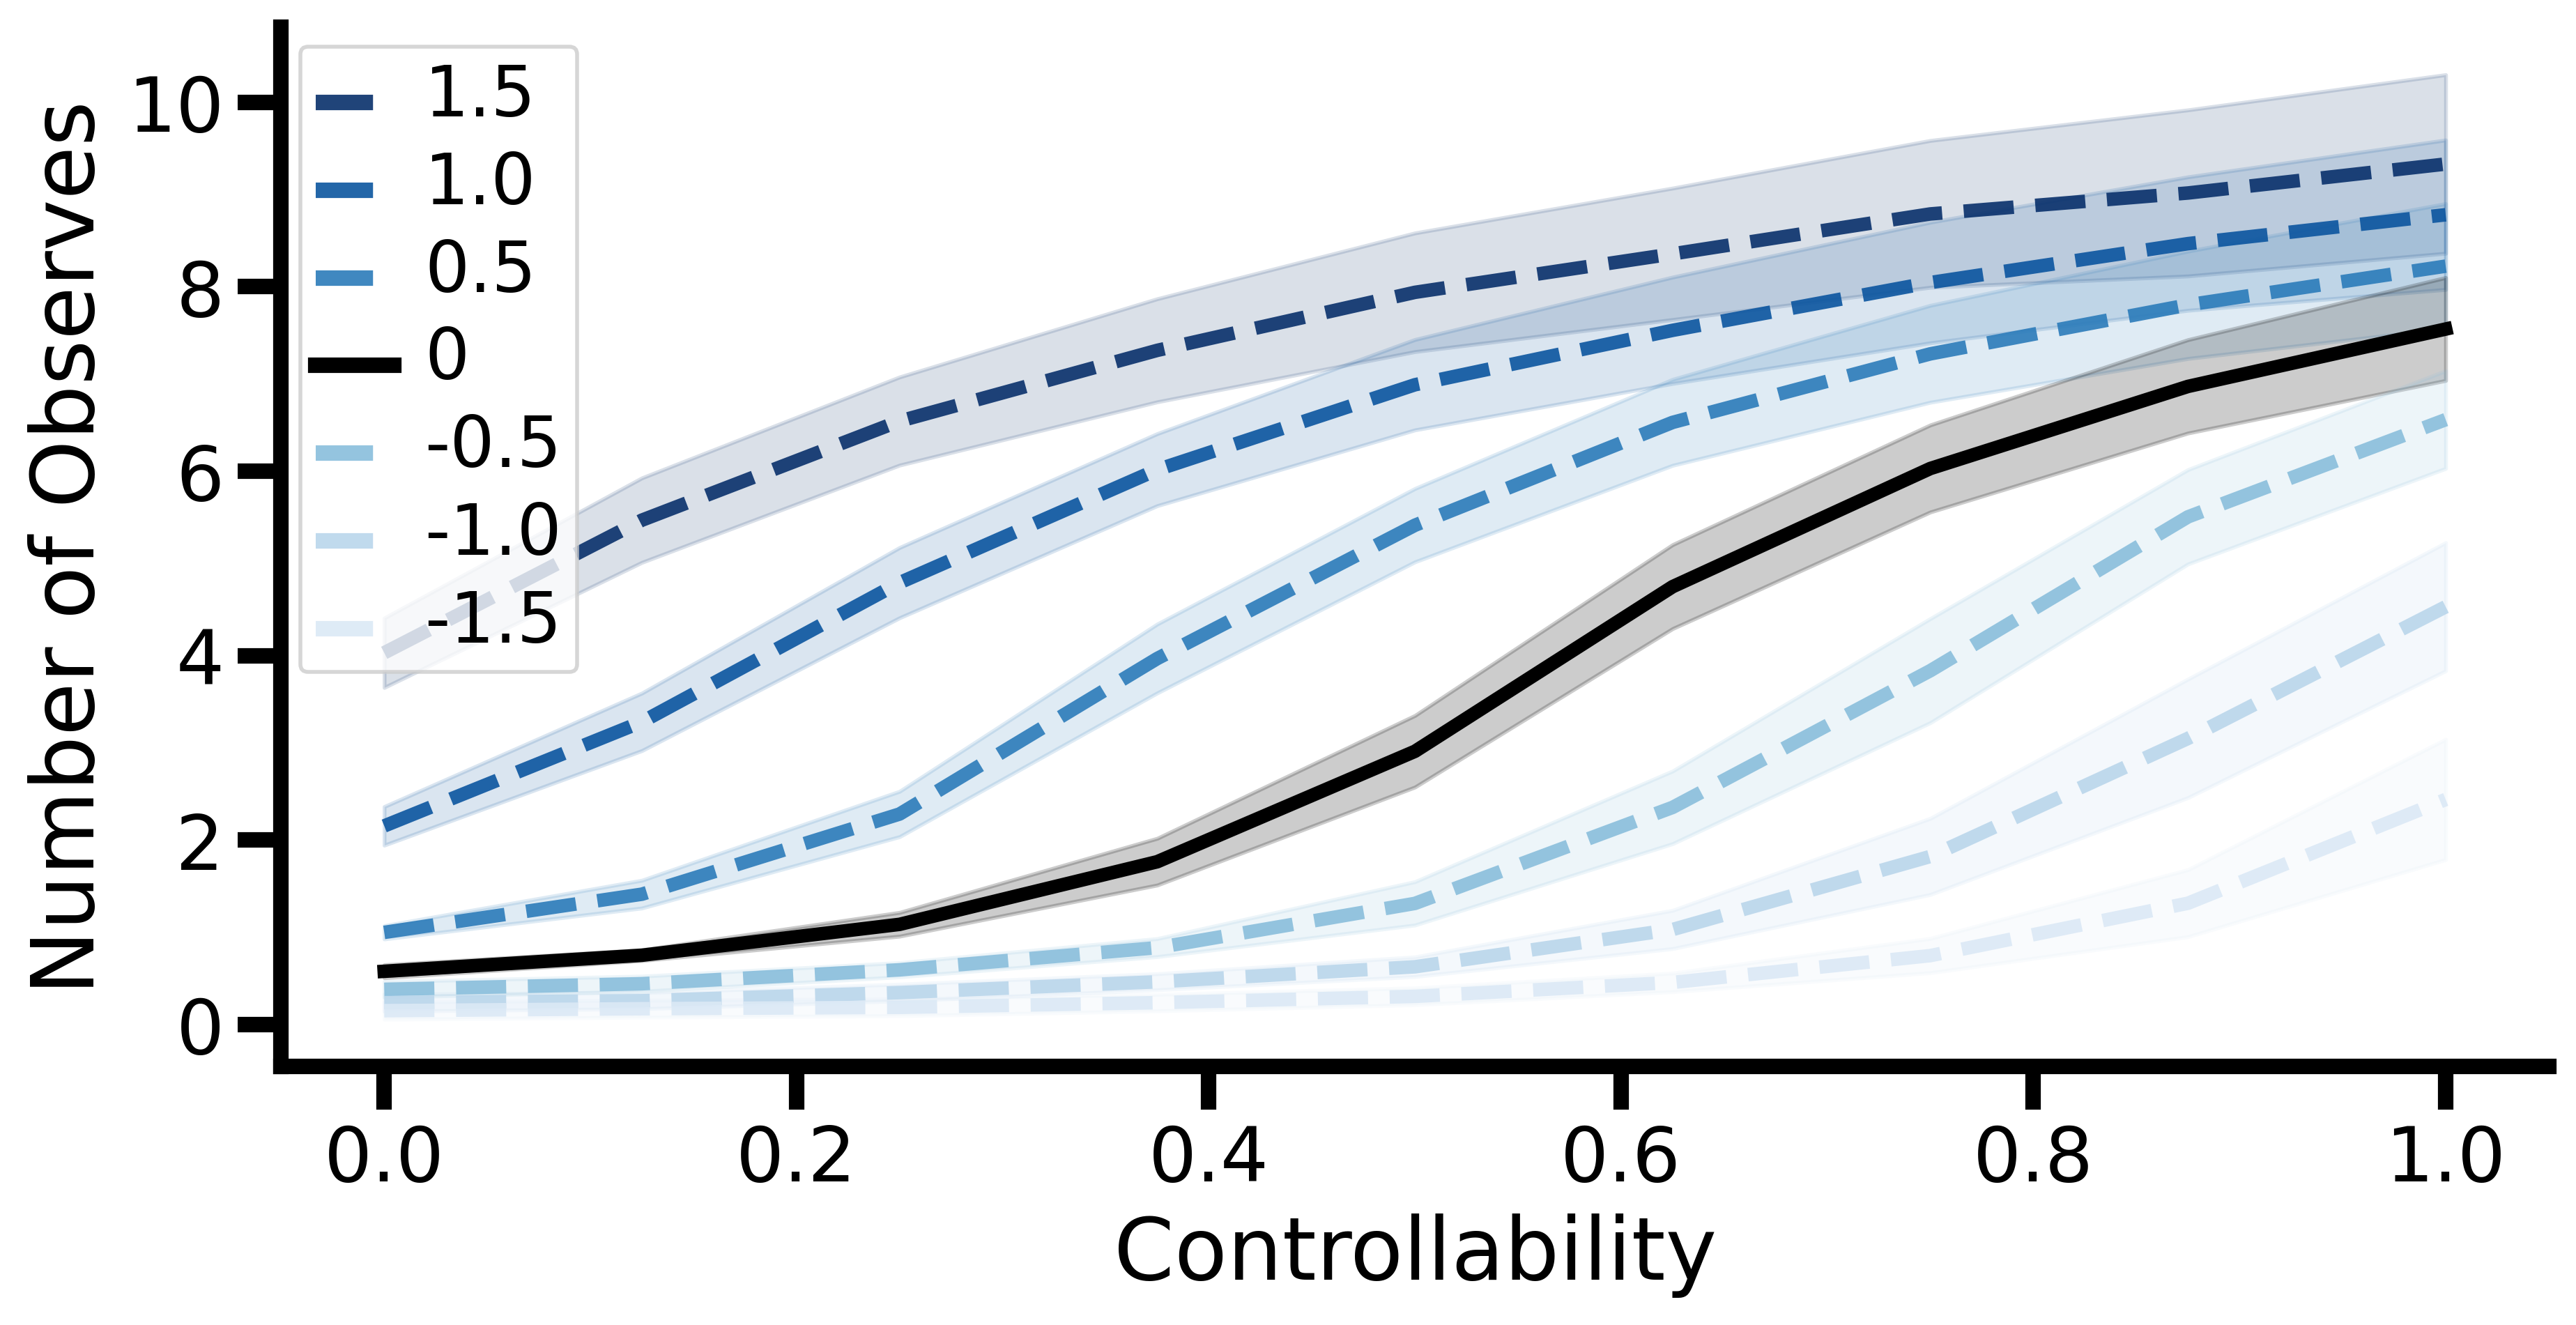

In [231]:
from test_analyses import plot_behavior_mistrained

#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_counters_peeks, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_counters_peeks, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Observes per Episode', target_taus = target_taus, cmap=mpl.cm.Blues, figsize=(8.5, 4.8))
#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_counters_peeks, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_counters_peeks, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Observes per Episode', cmap=mpl.cm.Blues, figsize=(8.5, 4.8), perturbation_taus=perturbation_taus)
fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_counters_peeks, axis=(0,2)), axis_xlabel='Controllability', axis_ylabel='Number of Observes', cmap=mpl.cm.Blues, figsize=(10.4952, 4.9359), font_size_multiplier=1.4, perturbation_taus=perturbation_taus)

In [232]:
fig.savefig(os.path.join(analysis_folder, 'perturbed_pepe.png'))
fig.savefig(os.path.join(analysis_folder, 'perturbed_pepe.svg'))

#### Stats

In [233]:
selected_n_observes = np.flip(models_mis_taus_counters_peeks, axis=(0,2))
selected_n_observes = selected_n_observes[:, [1,3,5]].sum(axis=-1).T
tested_levels = [1, 0, -1]

In [234]:
## MEANS AND SEMS
for level, obs in zip(tested_levels, selected_n_observes):
    print("Test Controllability ", level)
    print("Mean ", obs.mean())
    print("StdErr ", obs.std()/np.sqrt(obs.shape[0]))
    print("N", obs.shape[0])

Test Controllability  1
Mean  56.007999999999996
StdErr  4.173292417264814
N 10
Test Controllability  0
Mean  32.39200000000001
StdErr  2.633572402650058
N 10
Test Controllability  -1
Mean  12.431000000000001
StdErr  2.152446259491744
N 10


In [235]:
## TUKEY'S
groups = flatten([[level]*len(obs) for level, obs in zip(tested_levels, selected_n_observes)])

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=flatten(selected_n_observes), groups=groups, alpha=0.05)

# Print the results
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -1      0   19.961 0.0006  8.4723 31.4497   True
    -1      1   43.577    0.0 32.0883 55.0657   True
     0      1   23.616 0.0001 12.1273 35.1047   True
----------------------------------------------------


In [236]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

reshaped_data = selected_n_observes.T
pvals = []
pairs = [(0, 1), (0, 2), (1, 2)]  # Indices of settings pairs
for i, (idx1, idx2) in enumerate(pairs):
    t_stat, p_val = ttest_rel(reshaped_data[:, idx1], reshaped_data[:, idx2])
    pvals.append(p_val)
    print(f"Paired t-test {i+1}: p-value = {p_val}")

# Apply Holm-Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='holm')
print("\nCorrected p-values (Holm-Bonferroni):")
for i, (reject, p_val) in enumerate(zip(reject, pvals_corrected)):
    print(f"Comparison {i+1}: reject null hypothesis = {reject}, corrected p-value = {p_val}")

Paired t-test 1: p-value = 5.880834838731732e-06
Paired t-test 2: p-value = 9.106126333118589e-07
Paired t-test 3: p-value = 1.5822394721806108e-07

Corrected p-values (Holm-Bonferroni):
Comparison 1: reject null hypothesis = True, corrected p-value = 5.880834838731732e-06
Comparison 2: reject null hypothesis = True, corrected p-value = 1.8212252666237178e-06
Comparison 3: reject null hypothesis = True, corrected p-value = 4.7467184165418325e-07


### LEVC

In [237]:
from settings_anal import levc_human_ape_models as levc_models

#timestamp_traj = '20240403124415'
#timestamp_traj = '20240506202441'
timestamp_traj = '20240507022148'
timestamp_original_traj = '20240311133201'
#target_taus = np.arange(-3, 4.01, 0.5).astype(float)
perturbation_taus = np.arange(-3, 3.01, 0.25)
test_taus = np.arange(0, 1.01, 0.125)

### READING IN PERTURBED TRAJECTORIES
mistrained_traj_base_folder = os.path.join('data','perturbed','levc')

models_mis_taus_control_errs = []
models_mis_taus_counters_peeks = []
models_mis_taus_rewss = []
models_mis_taus_sleepss = []

for model in levc_models:

    mis_taus_control_errs = []
    mis_taus_counters_peeks = []
    mis_taus_rewss = []
    mis_taus_sleepss = []

    #for mistrained_tau in target_taus:
    for mistrained_tau in perturbation_taus:

        mistrained_traj_folder = os.path.join(mistrained_traj_base_folder, str(model), 'perturbed_tau_perturbation%d' %(mistrained_tau*100))

        control_errs_taus_ape = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_control_errs_taus_ape.pkl'), 'rb'))
        counters_peeks_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_counters_peeks_taus.pkl'), 'rb'))
        rewss_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_rewss_taus.pkl'), 'rb'))
        sleepss_taus = pickle.load(open(os.path.join(mistrained_traj_folder, timestamp_traj + '_perturbed_sleep_errs_taus_ape.pkl'), 'rb'))

        mis_taus_control_errs.append(control_errs_taus_ape)
        mis_taus_counters_peeks.append(counters_peeks_taus)
        mis_taus_rewss.append(rewss_taus)
        mis_taus_sleepss.append(sleepss_taus)

    models_mis_taus_control_errs.append(mis_taus_control_errs)
    models_mis_taus_counters_peeks.append(mis_taus_counters_peeks)
    models_mis_taus_rewss.append(mis_taus_rewss)
    models_mis_taus_sleepss.append(mis_taus_sleepss)

models_mis_taus_control_errs = np.array(models_mis_taus_control_errs)
models_mis_taus_counters_peeks = np.array(models_mis_taus_counters_peeks)
models_mis_taus_rewss = np.array(models_mis_taus_rewss)
models_mis_taus_sleepss = np.array(models_mis_taus_sleepss)


### SUBSAMPLE TO target_taus (-0.5, 1.51, 0.5)
#target_taus = target_taus[4:9]
# models_mis_taus_control_errs = models_mis_taus_control_errs[:,4:9]
# models_mis_taus_counters_peeks = models_mis_taus_counters_peeks[:,4:9]
# models_mis_taus_rewss = models_mis_taus_rewss[:,4:9]
# models_mis_taus_sleepss = models_mis_taus_sleepss[:,4:9]
#perturbation_taus = perturbation_taus[4:9]
#perturbation_values_to_keep = [-2, -1.5, -1, -0.5, 0, 0.5, 1]
perturbation_values_to_keep = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]
indices_to_keep = indices = np.where(np.isin(perturbation_taus, perturbation_values_to_keep))[0]
perturbation_taus = perturbation_taus[indices_to_keep]
models_mis_taus_control_errs = models_mis_taus_control_errs[:,indices_to_keep]
models_mis_taus_counters_peeks = models_mis_taus_counters_peeks[:,indices_to_keep]
models_mis_taus_rewss = models_mis_taus_rewss[:,indices_to_keep]
models_mis_taus_sleepss = models_mis_taus_sleepss[:,indices_to_keep]

### READING IN ORIGINAL TRAJECTORY

eval_base_folder = os.path.join('data','eval','levc')
models_orig_taus_control_errs = []
models_orig_taus_counters_peeks = []
models_orig_taus_rewss = []
models_orig_taus_sleepss = []

for model in levc_models:

    orig_traj_folder = os.path.join(eval_base_folder, str(model))

    control_errs_taus_ape = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_control_errs_taus_ape.pkl'), 'rb'))
    counters_peeks_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_counters_peeks_taus.pkl'), 'rb'))
    rewss_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_rewss_taus.pkl'), 'rb'))
    sleepss_taus = pickle.load(open(os.path.join(orig_traj_folder, timestamp_original_traj + '_sleep_errs_taus_ape.pkl'), 'rb'))

    models_orig_taus_control_errs.append(control_errs_taus_ape)
    models_orig_taus_counters_peeks.append(counters_peeks_taus)
    models_orig_taus_rewss.append(rewss_taus)
    models_orig_taus_sleepss.append(sleepss_taus)

models_orig_taus_control_errs = np.array(models_orig_taus_control_errs)
models_orig_taus_counters_peeks = np.array(models_orig_taus_counters_peeks)
models_orig_taus_rewss = np.array(models_orig_taus_rewss)
models_orig_taus_sleepss = np.array(models_orig_taus_sleepss)


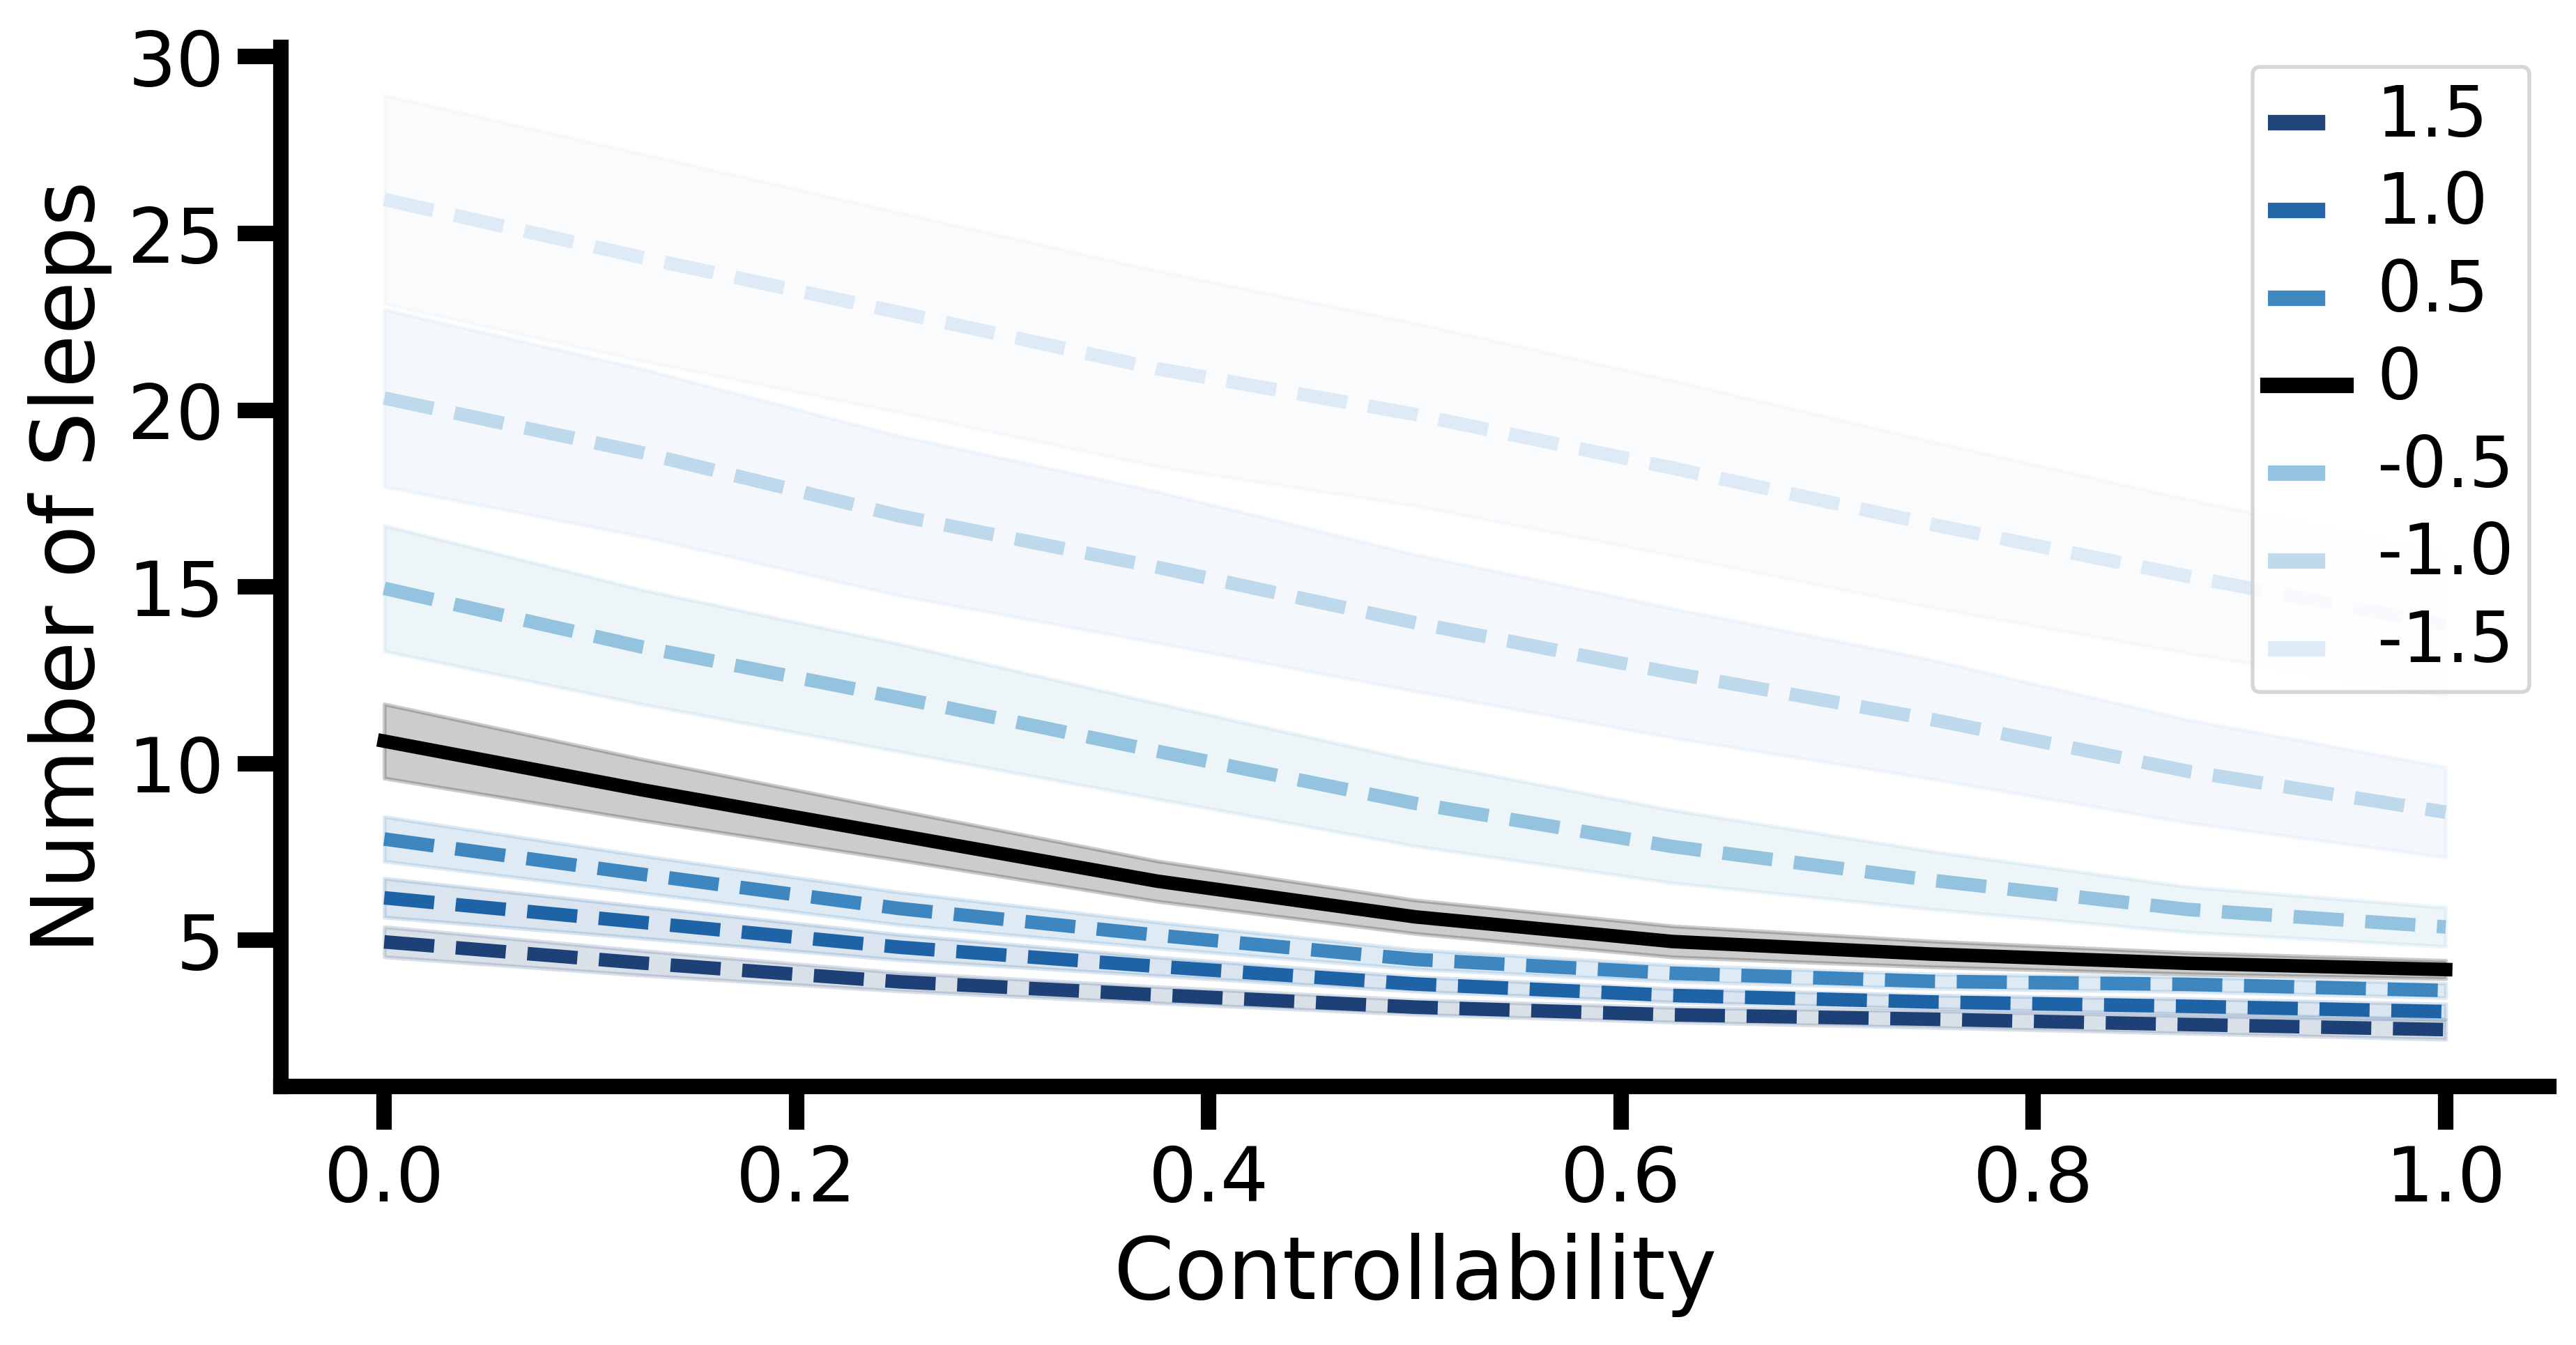

In [238]:
from test_analyses import plot_behavior_mistrained

#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_sleepss, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_sleepss, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Sleeps per Episode', target_taus = target_taus, cmap = mpl.cm.Blues, figsize=(8.5, 4.8))
#fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_sleepss, axis=(0,2)), np.arange(0,1.01,0.125), np.flip(models_orig_taus_sleepss, axis=(1)), axis_xlabel='Efficacy', axis_ylabel='Number of Sleeps per Episode', perturbation_taus = perturbation_taus, cmap = mpl.cm.Blues, figsize=(8.5, 4.8))
fig = plot_behavior_mistrained(test_taus, np.flip(models_mis_taus_sleepss, axis=(0,2)), axis_xlabel='Controllability', axis_ylabel='Number of Sleeps', perturbation_taus = perturbation_taus, cmap = mpl.cm.Blues, figsize=(10.4952, 4.9359), font_size_multiplier=1.4)

In [239]:
fig.savefig(os.path.join(analysis_folder, 'perturbed_levc.png'))
fig.savefig(os.path.join(analysis_folder, 'perturbed_levc.svg'))

#### Stats

In [240]:
selected_n_sleeps = np.flip(models_mis_taus_sleepss, axis=(0,2))
selected_n_sleeps = selected_n_sleeps[:, [1,3,5]].sum(axis=-1).T
tested_levels = [1, 0, -1]

In [241]:
## MEANS AND SEMS
for level, selected_sleep in zip(tested_levels, selected_n_sleeps):
    print("Test Controllability ", level)
    print("Mean ", selected_sleep.mean())
    print("StdErr ", selected_sleep.std()/np.sqrt(selected_sleep.shape[0]))
    print("N", selected_sleep.shape[0])

Test Controllability  1
Mean  37.31699999999999
StdErr  2.3444197789645096
N 10
Test Controllability  0
Mean  58.27
StdErr  4.6951596351987845
N 10
Test Controllability  -1
Mean  127.897
StdErr  17.29780125044799
N 10


In [242]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

reshaped_data = selected_n_sleeps.T
pvals = []
pairs = [(0, 1), (0, 2), (1, 2)]  # Indices of settings pairs
for i, (idx1, idx2) in enumerate(pairs):
    t_stat, p_val = ttest_rel(reshaped_data[:, idx1], reshaped_data[:, idx2])
    pvals.append(p_val)
    print(f"Paired t-test {i+1}: p-value = {p_val}")

# Apply Holm-Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='holm')
print("\nCorrected p-values (Holm-Bonferroni):")
for i, (reject, p_val) in enumerate(zip(reject, pvals_corrected)):
    print(f"Comparison {i+1}: reject null hypothesis = {reject}, corrected p-value = {p_val}")

Paired t-test 1: p-value = 8.74203763098903e-05
Paired t-test 2: p-value = 0.0004589450954089117
Paired t-test 3: p-value = 0.0007386780003249872

Corrected p-values (Holm-Bonferroni):
Comparison 1: reject null hypothesis = True, corrected p-value = 0.0002622611289296709
Comparison 2: reject null hypothesis = True, corrected p-value = 0.0009178901908178234
Comparison 3: reject null hypothesis = True, corrected p-value = 0.0009178901908178234


## Panel A: Task 1 Observes

### Humans

In [243]:
from human_utils_project import get_clean_data

day = 'day2'

group = None

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

n_steps = 50

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False


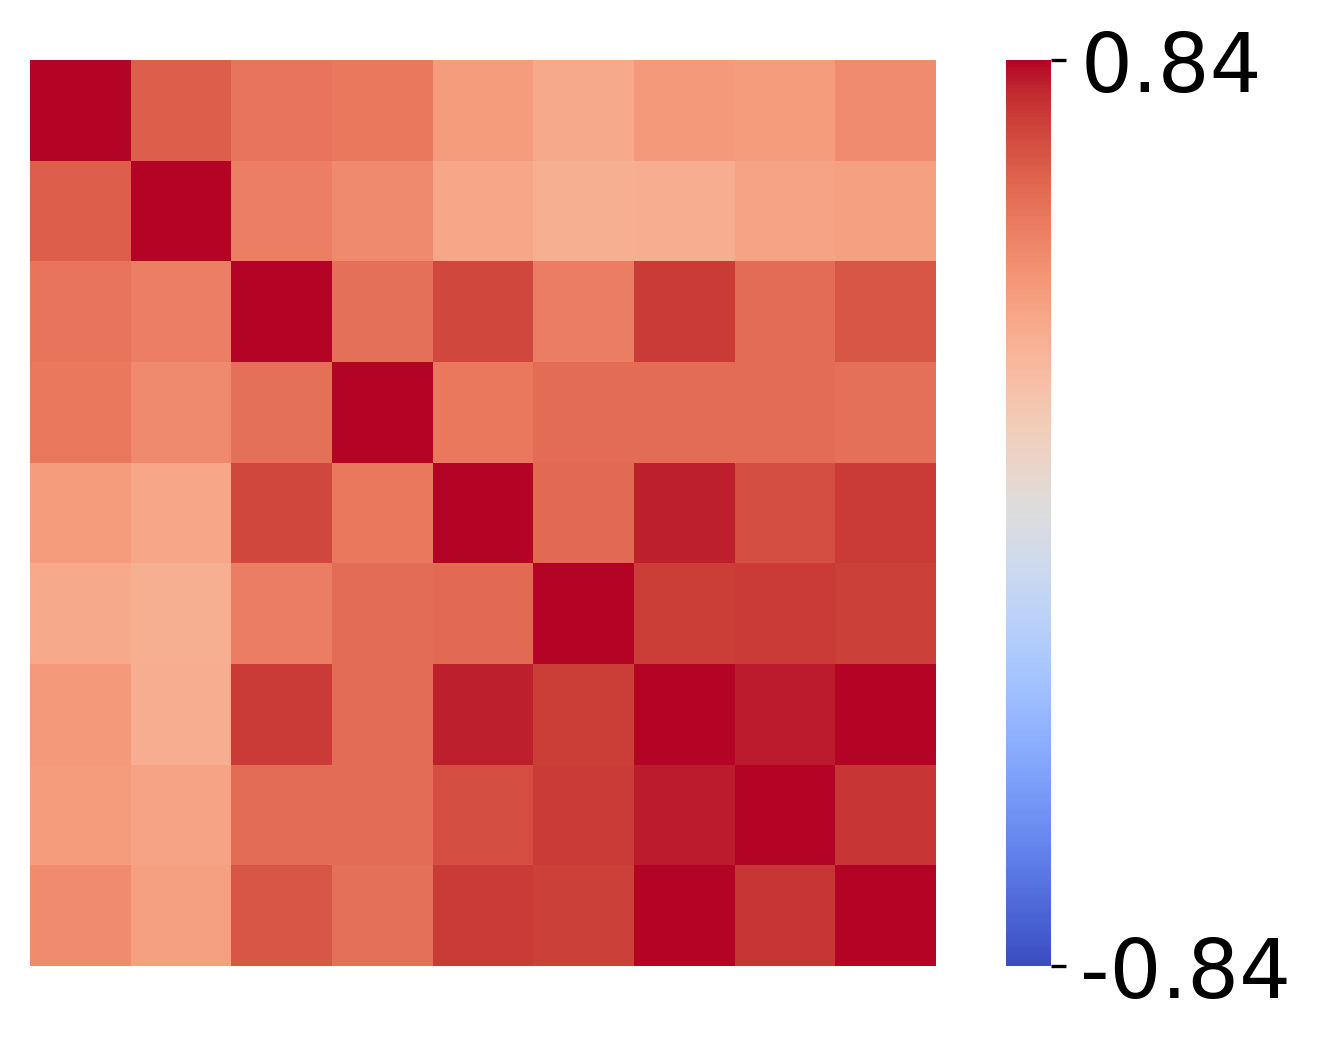

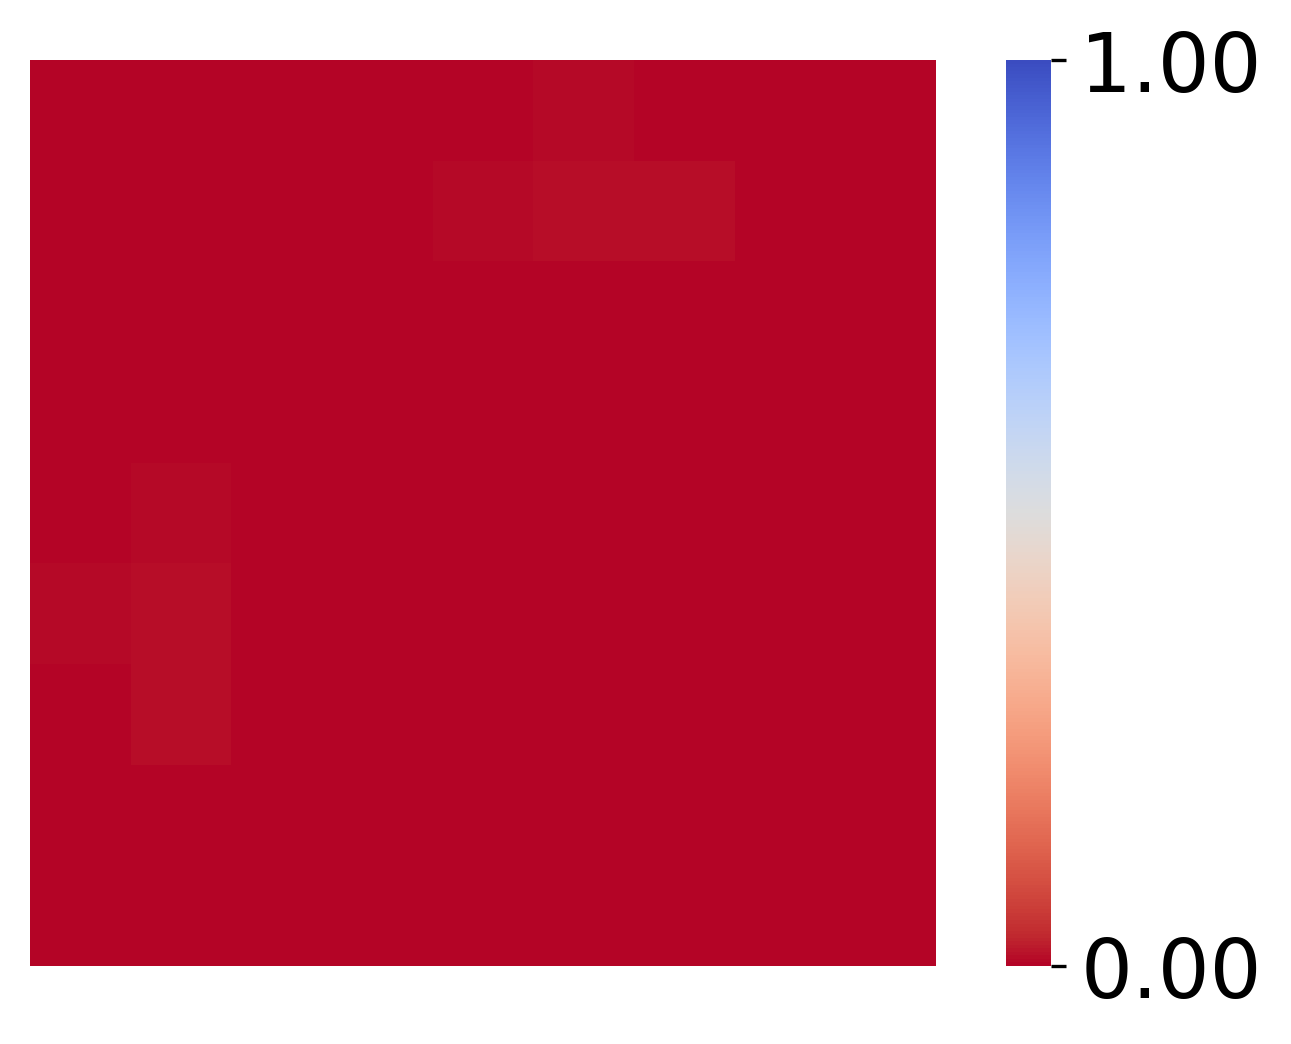

In [244]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes'], df['n_observes'], df['effs'], df['effs'], col1name = 'Observes', col2name='Observes', annot=False, resize_colorbar = True, square=square, axes_off=True, font_size_multiplier=1.4)

In [245]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_humans.svg'))

pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_humans.svg'))

#### Stats

In [246]:
## NUMBER OF HUMANS
print(len(df))

print(sum(~df['group']))
print(sum(df['group']))

60
60
0


### Trait-level simulations

In [247]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


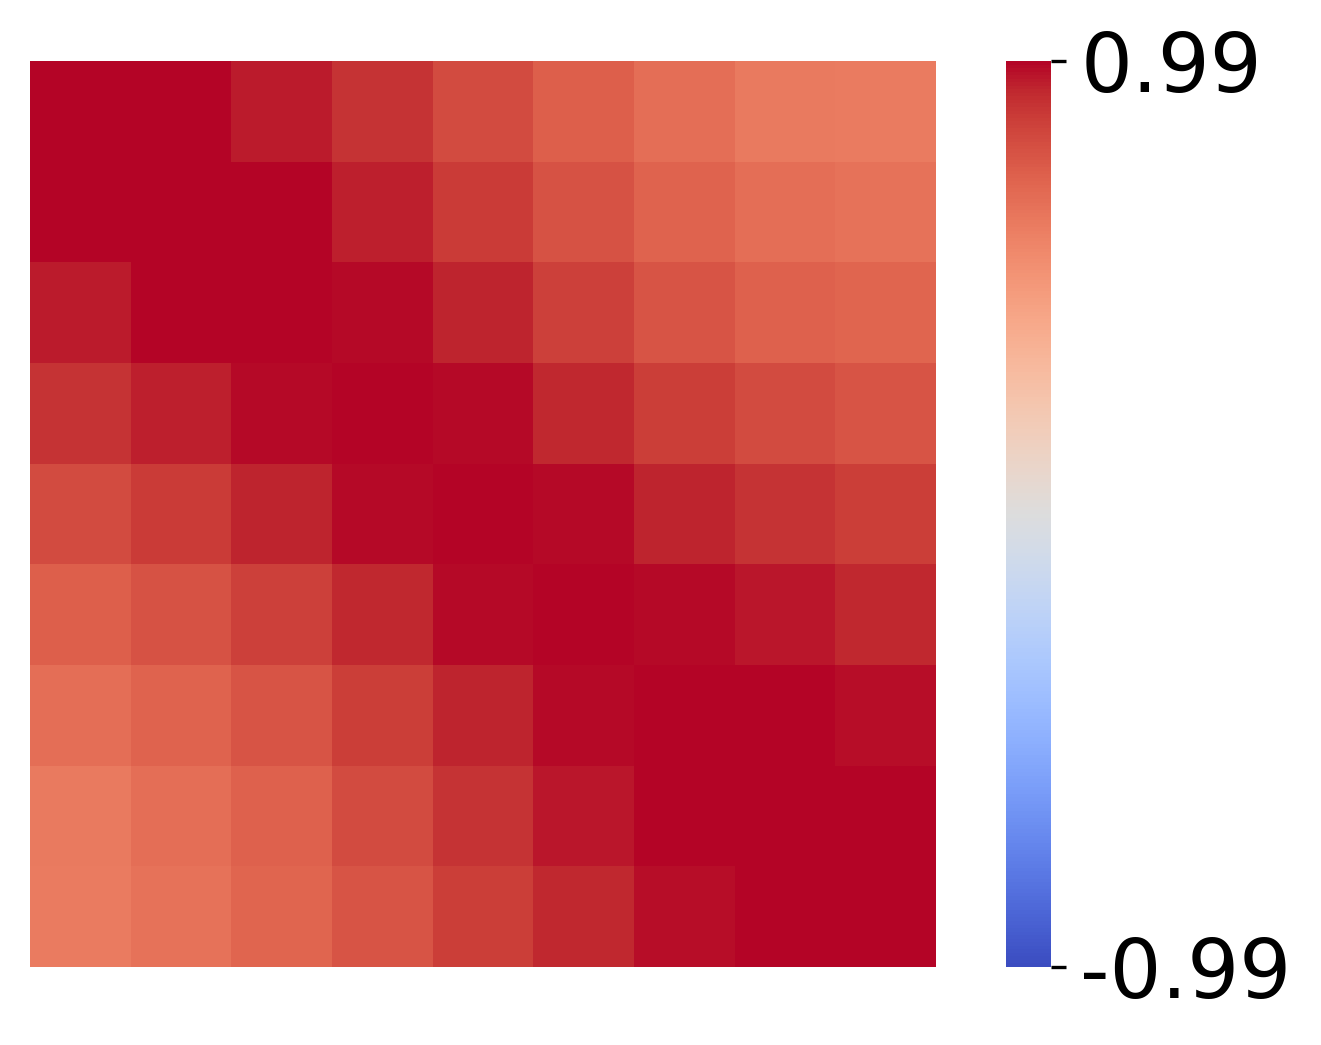

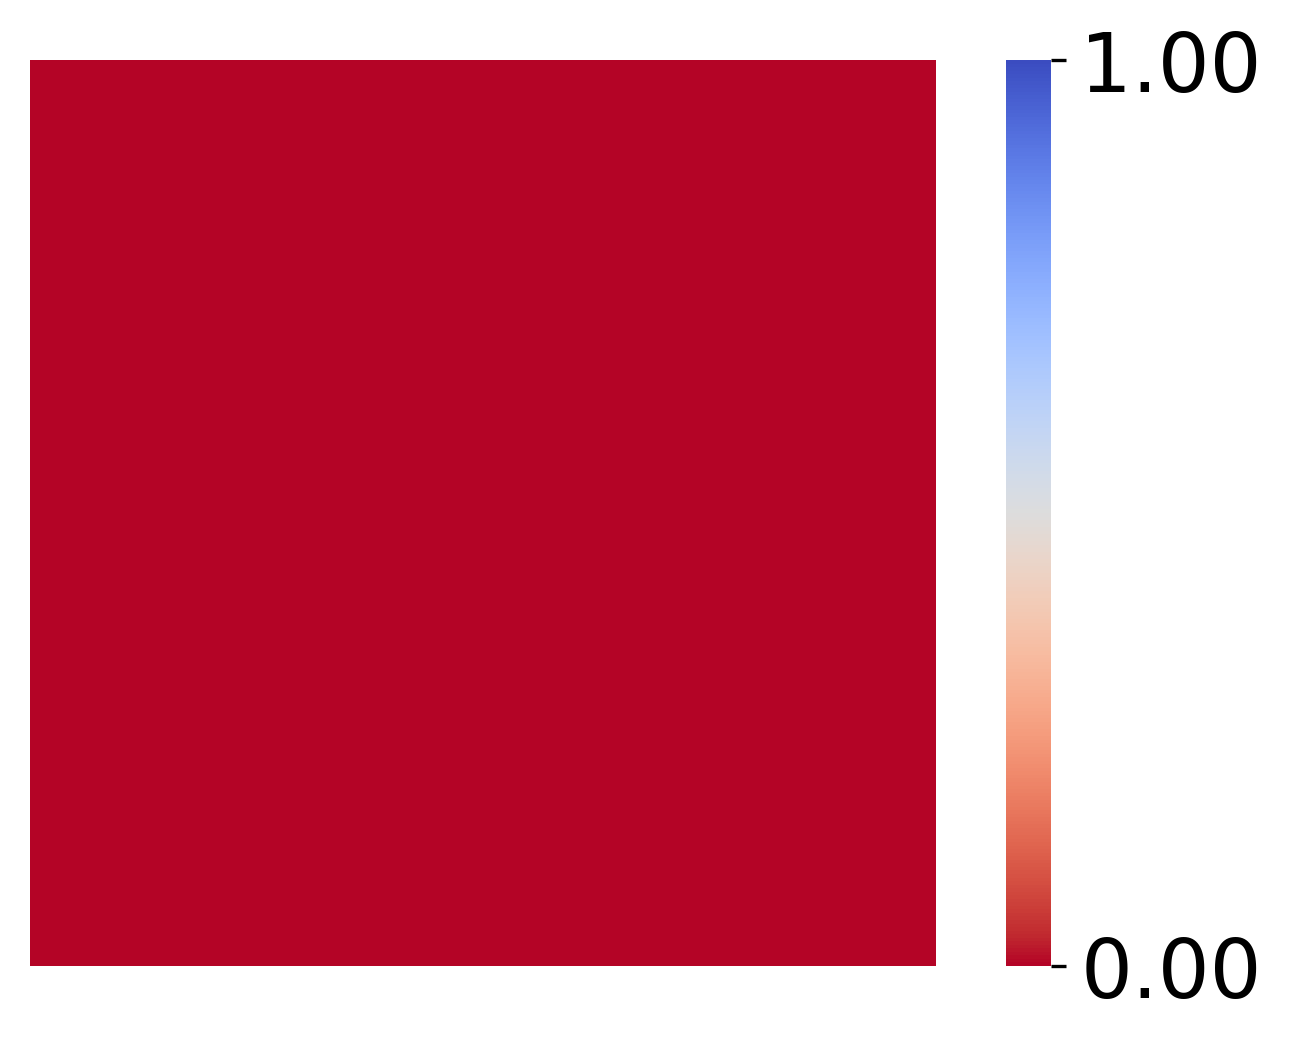

In [248]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss, sim_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=True, font_size_multiplier=1.4)

In [249]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_trait.svg'))

### Random Perturbations

In [250]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss, random_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)

(150, 9)


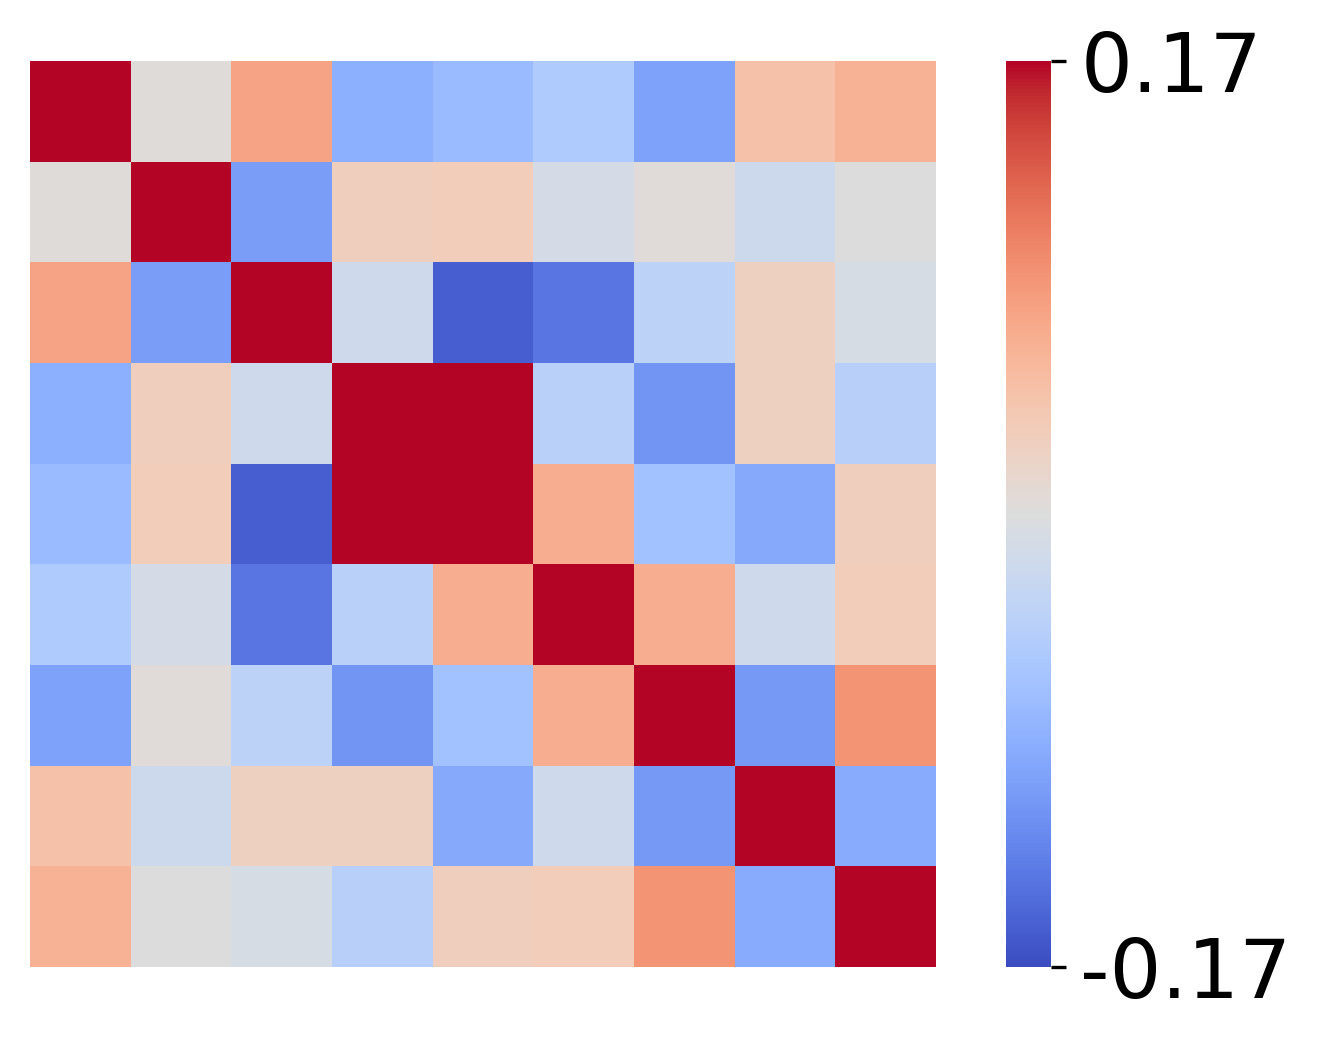

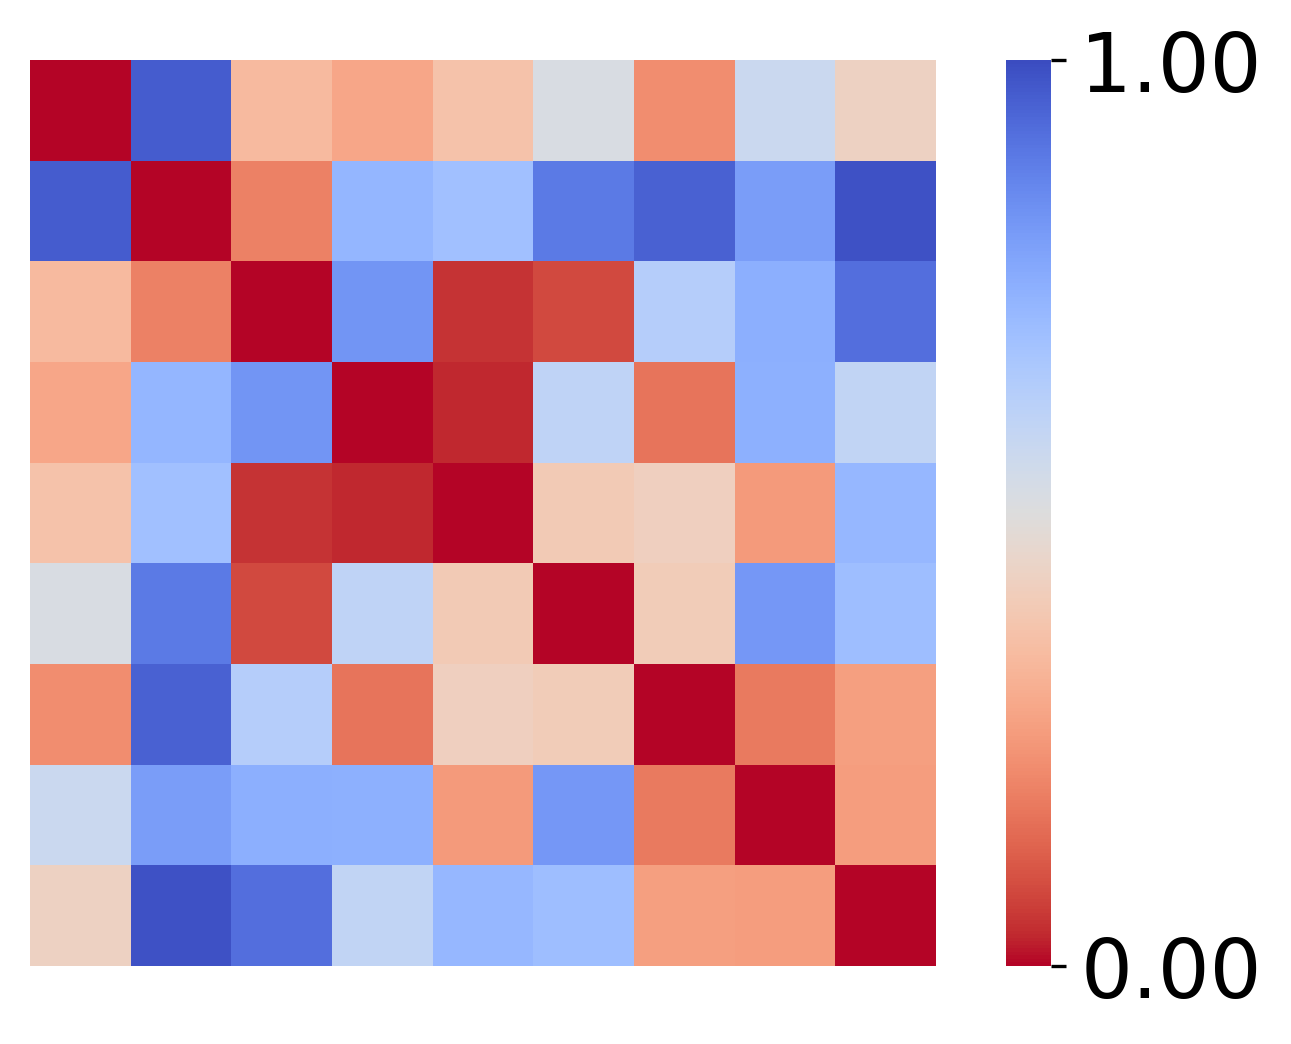

In [251]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss, random_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [252]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_random.svg'))

### Zeros Perturbation

In [253]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss, zeros_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


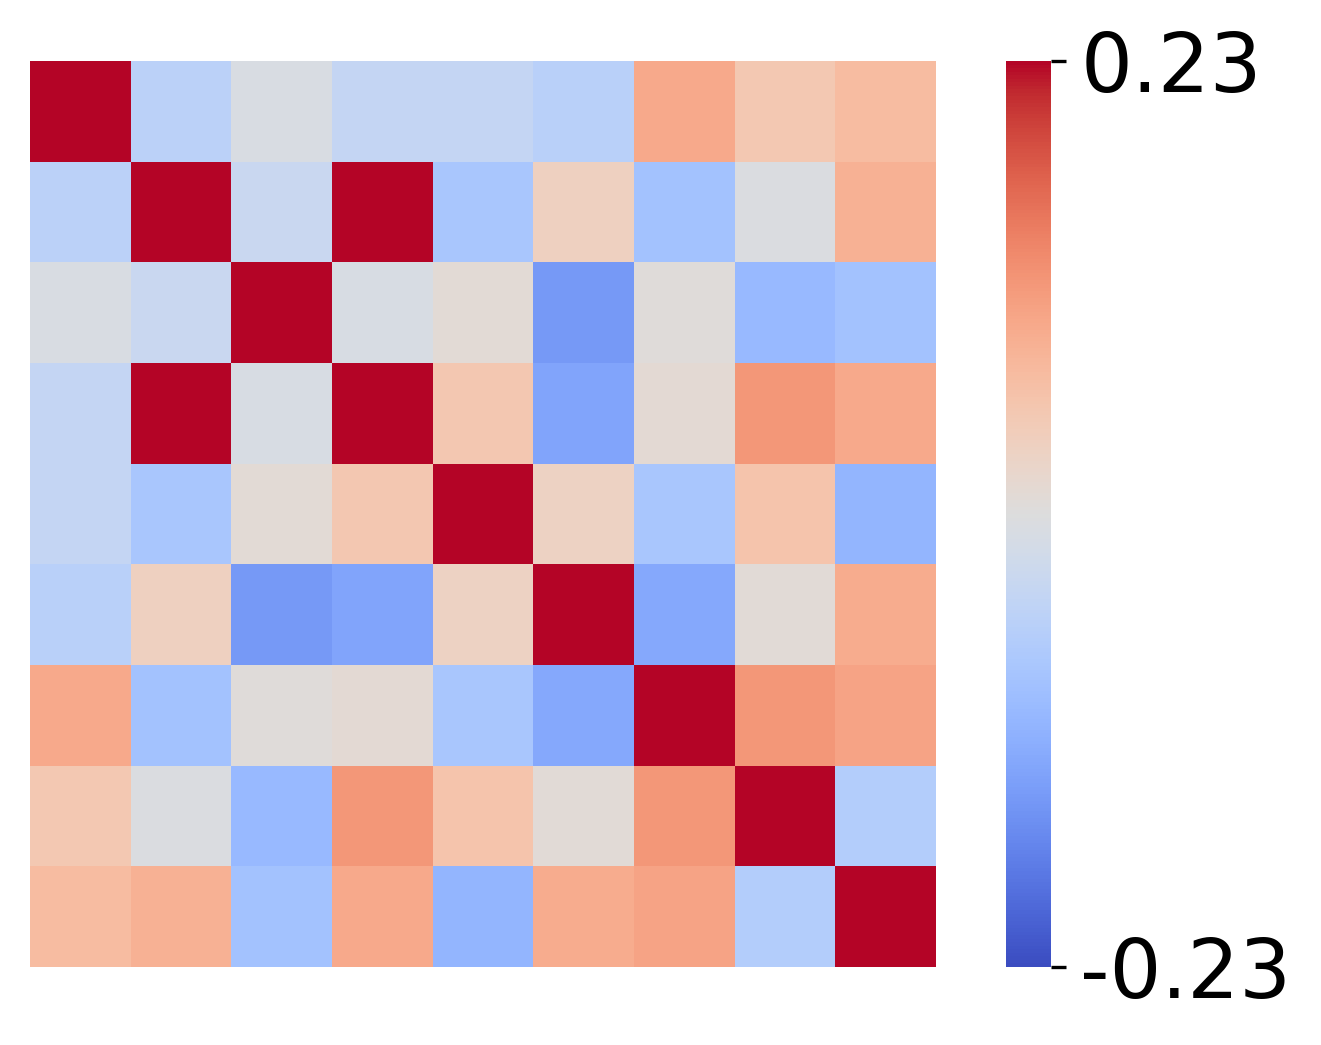

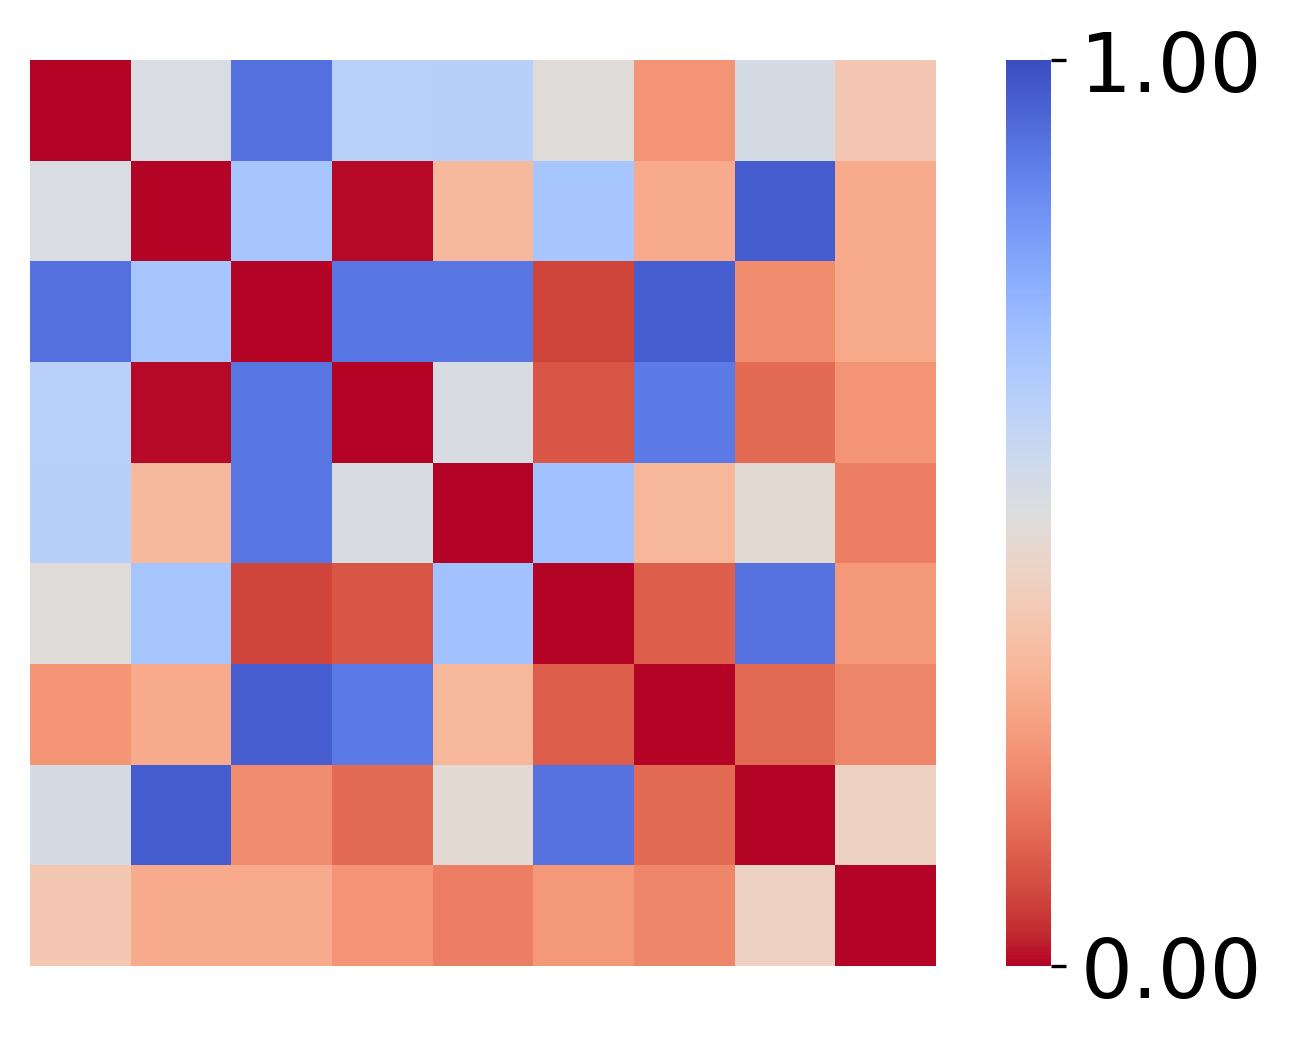

In [254]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss, zeros_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off , font_size_multiplier=1.4)

In [255]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_observes_zeros.svg'))

### Stats
#### Competitive Linear Regression

In [256]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_obs_corr =data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr = data_rews_corr_g1
data_rews_pvs = data_rews_pvs_g1
sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)

(60, 9)
(60, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [257]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_obs_corr), [upper_tri_masking(sim_obs_corr), upper_tri_masking(random_obs_corr)], do_fisher_transform=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     7.292
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00238
Time:                        14:04:36   Log-Likelihood:                 7.6911
No. Observations:                  36   AIC:                            -9.382
Df Residuals:                      33   BIC:                            -4.632
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3525      0.094      3.767      0.0

#### Cosine Similarity

In [258]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(sim_obs_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(random_obs_corr).reshape((1,-1)))[0][0])

0.9803258426654795
-0.23673060496710746


## Panel B: Task 1 Rewards
### Humans

In [259]:
from human_utils_project import get_clean_data

day = 'day2'

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.125, 0.125)
n_steps = 50

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False


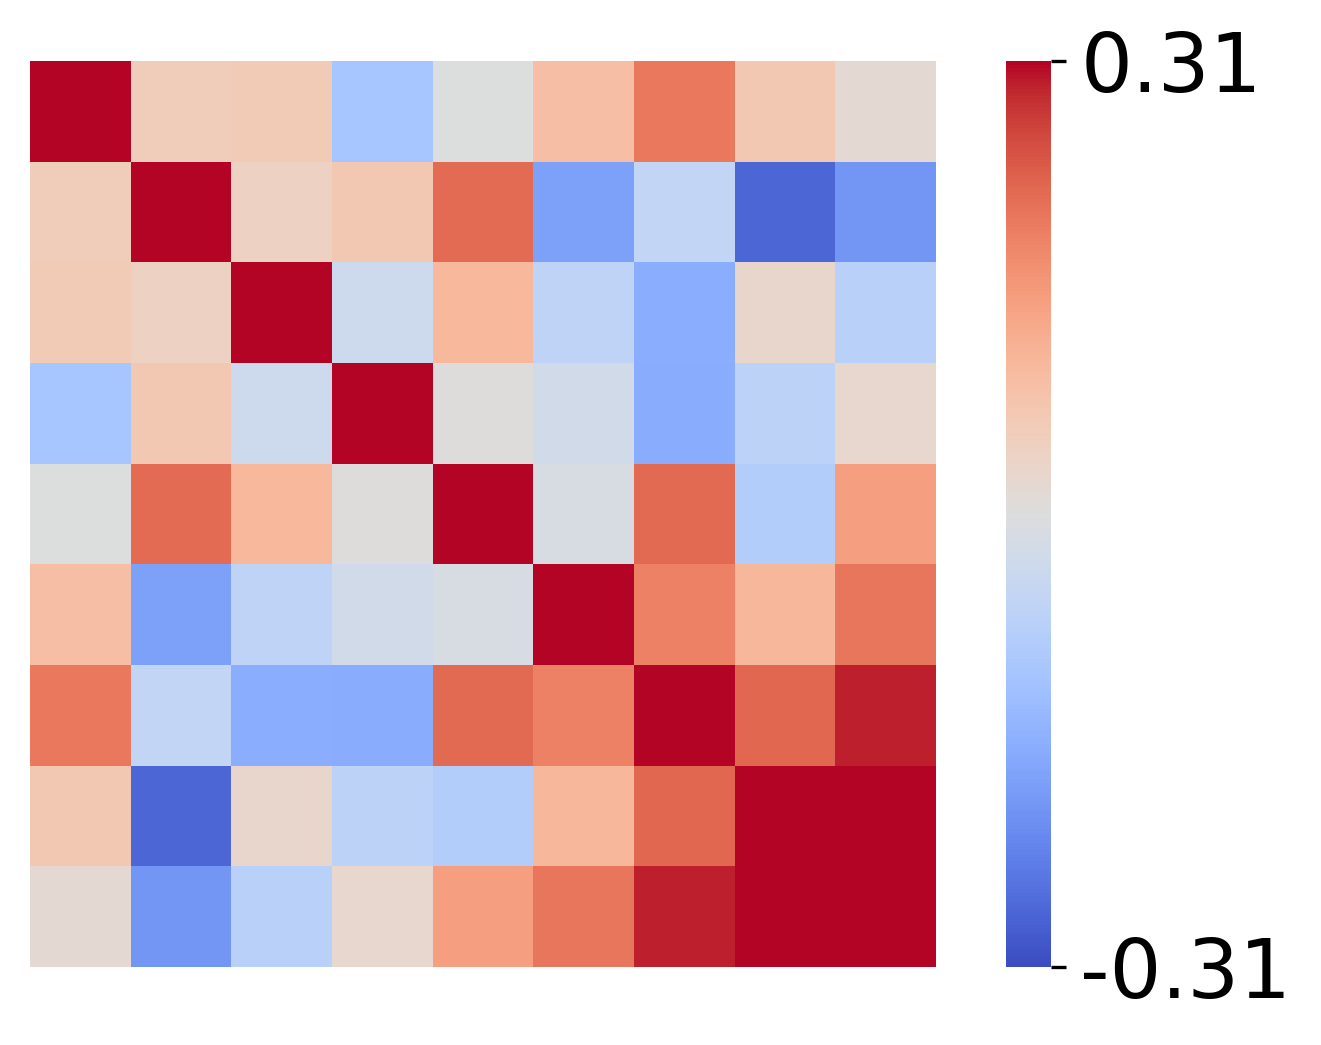

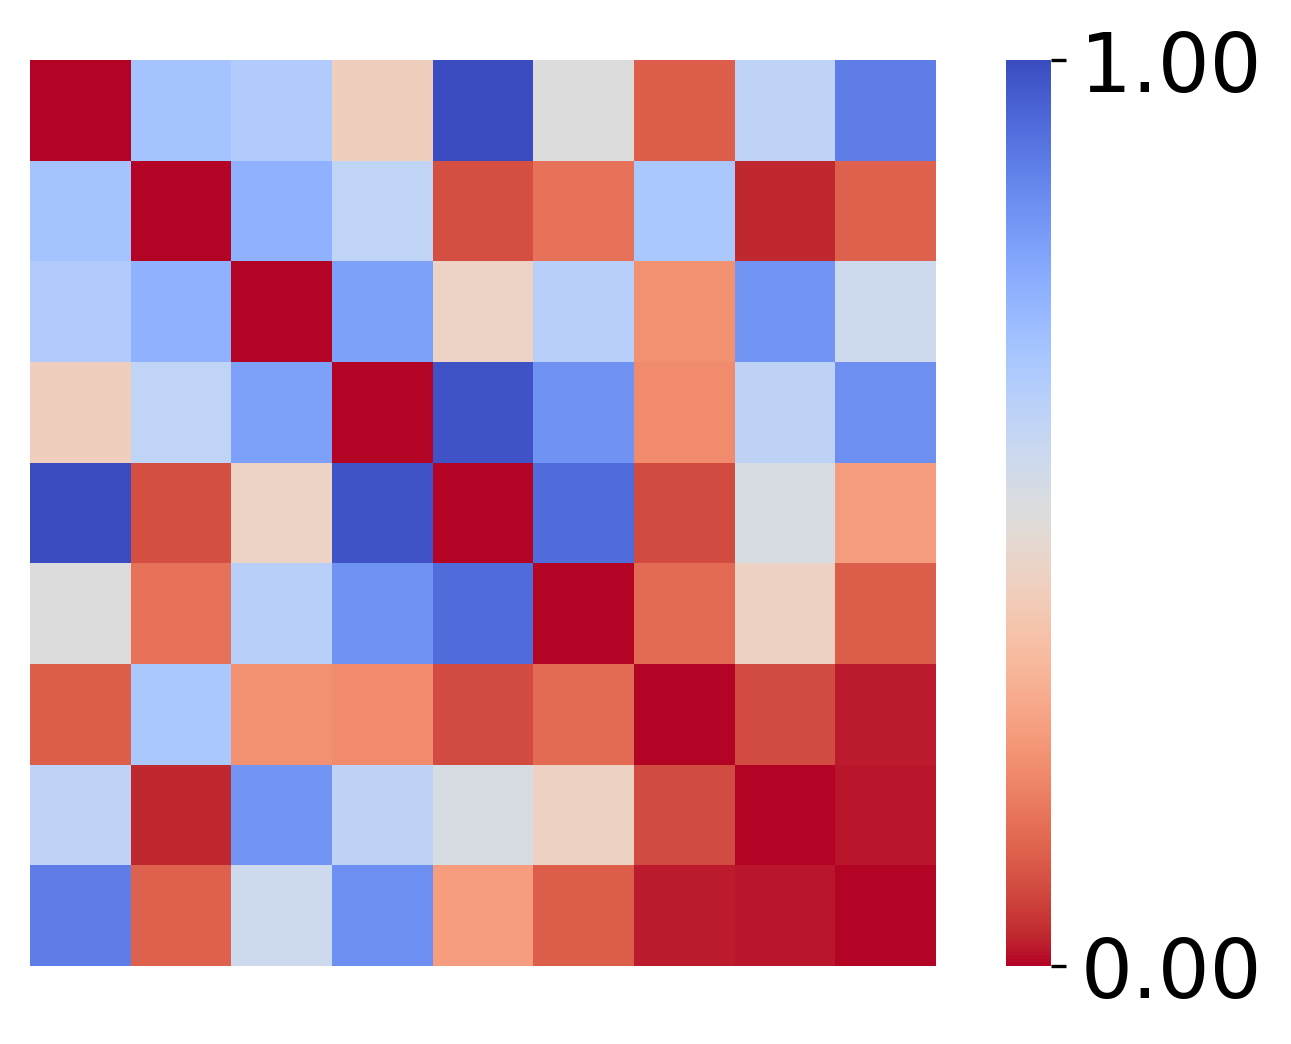

In [260]:
corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies'], df['rewards_tallies'], df['effs'], df['effs'], col1name = 'Rewards', col2name='Rewards', annot=False, resize_colorbar = True, square=square, axes_off=True, font_size_multiplier=1.4)

In [261]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_humans.svg'))

### Trait-level Simulations

In [262]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)

(150, 9)


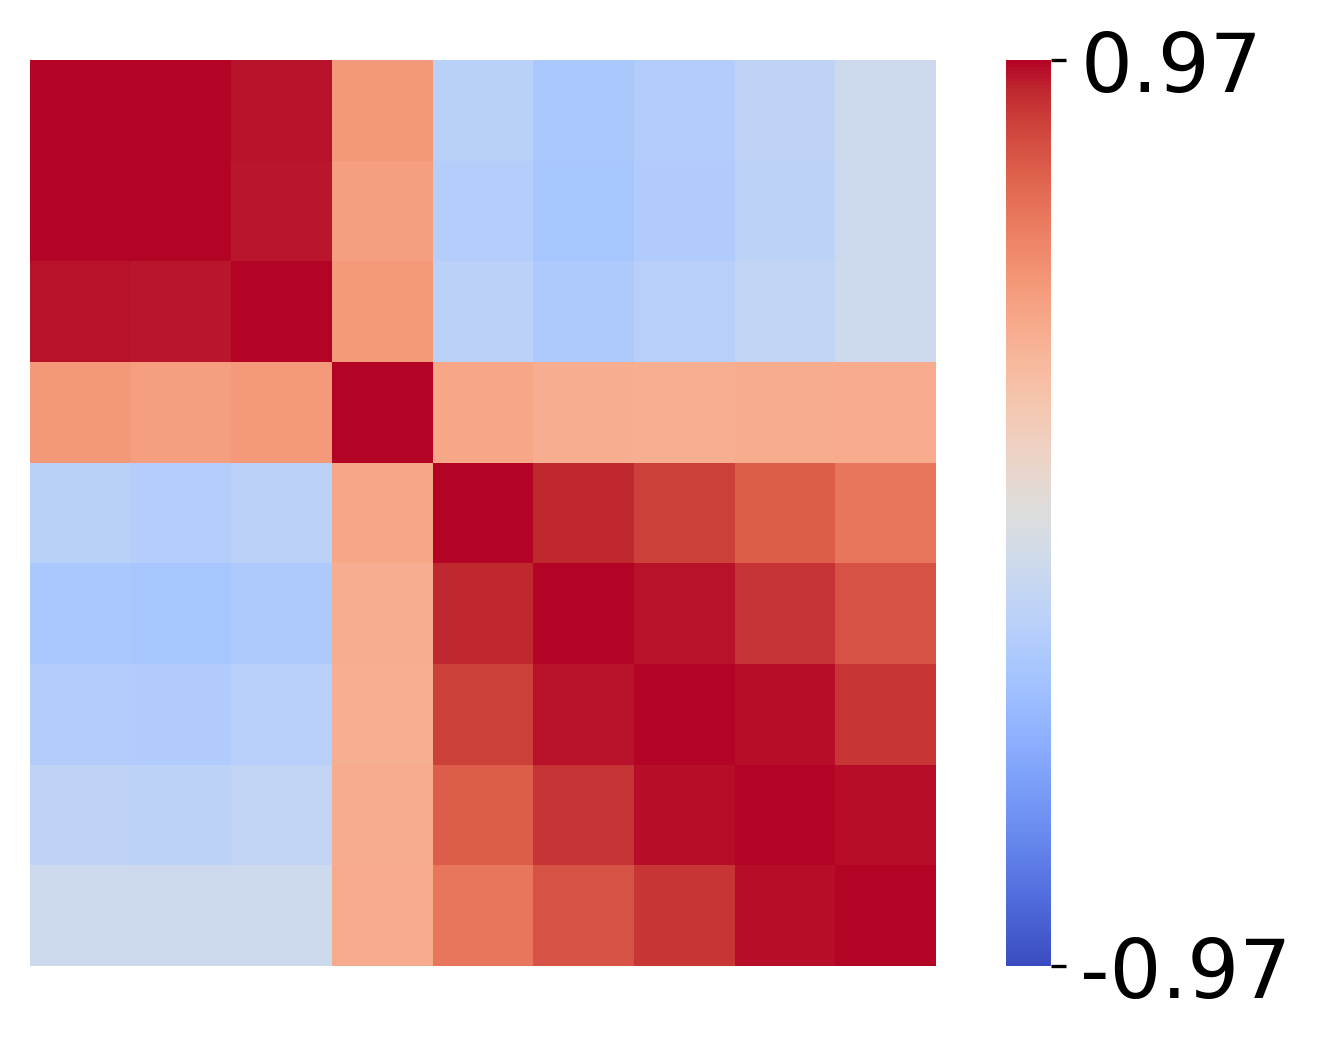

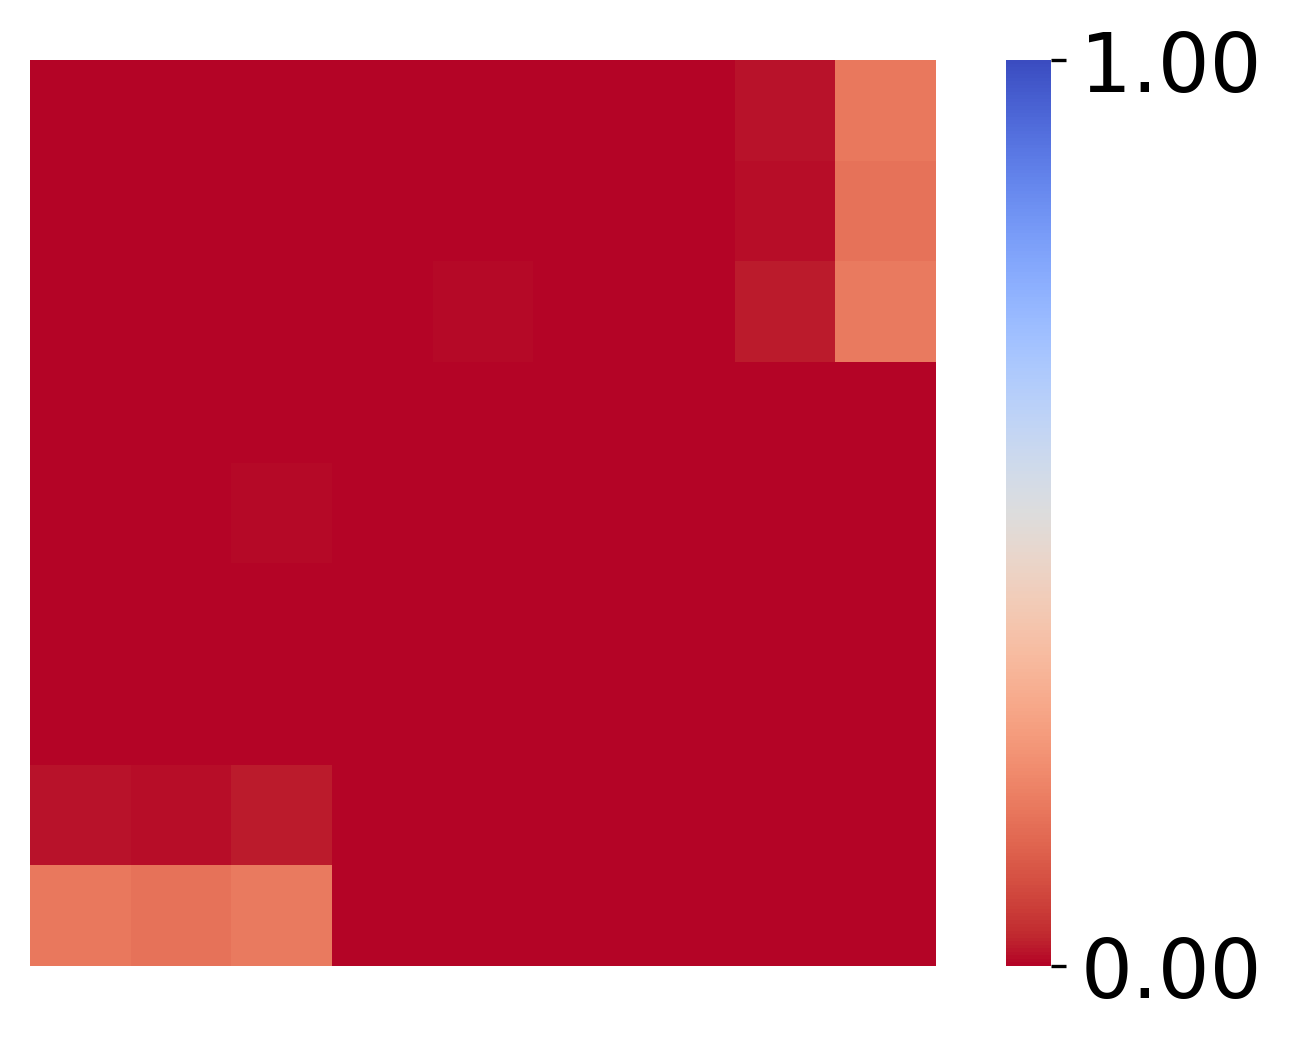

In [263]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(sim_rewss, sim_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [264]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_trait.svg'))

### Random Perturbations

In [265]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss, random_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)

(150, 9)


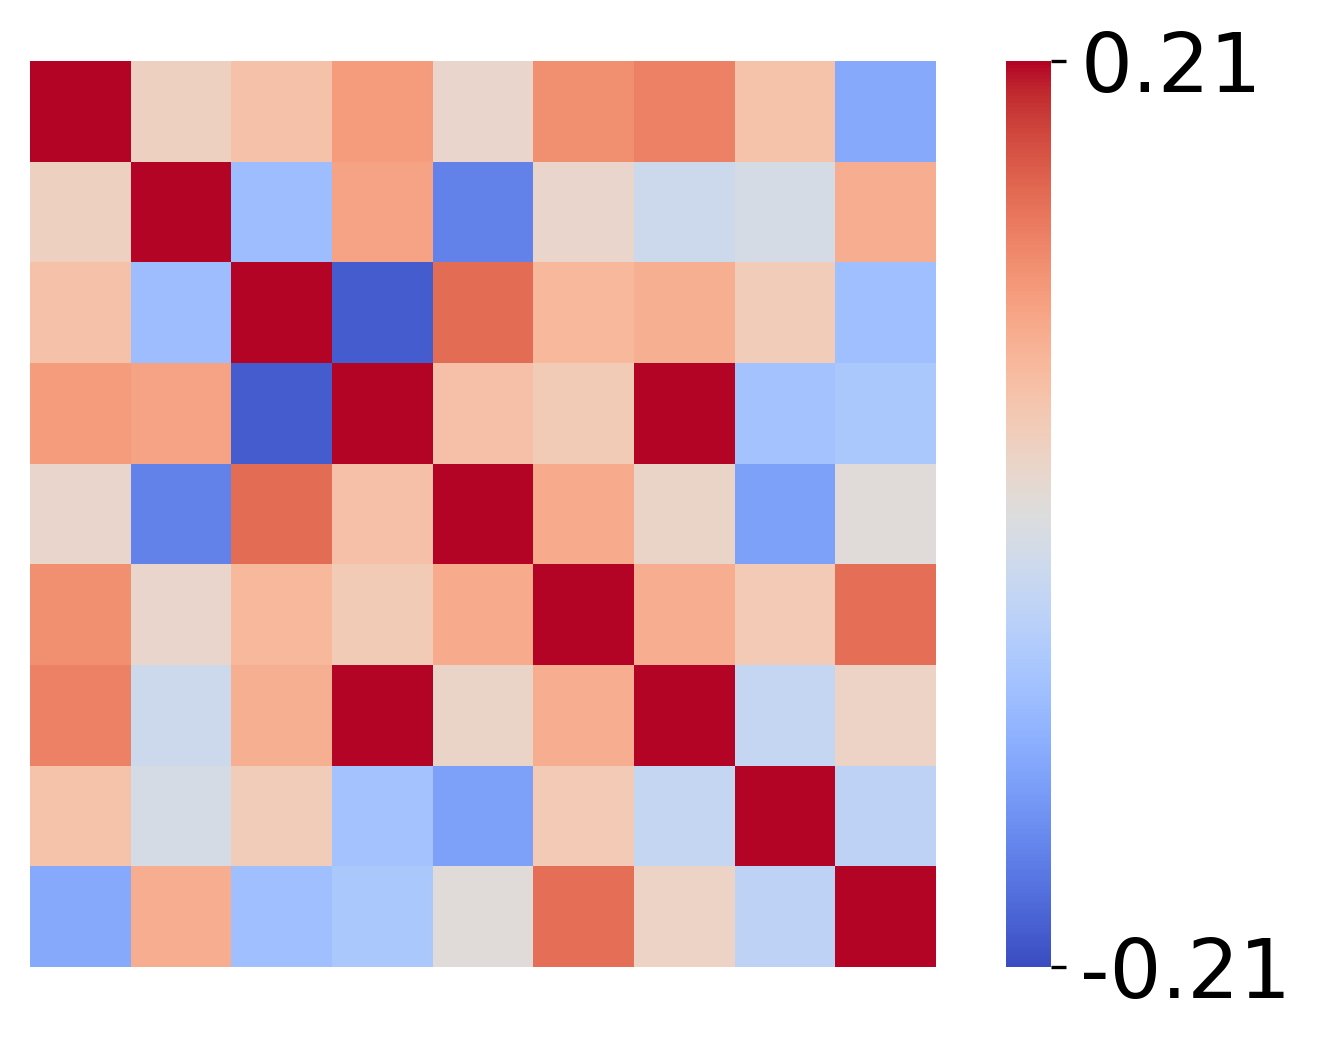

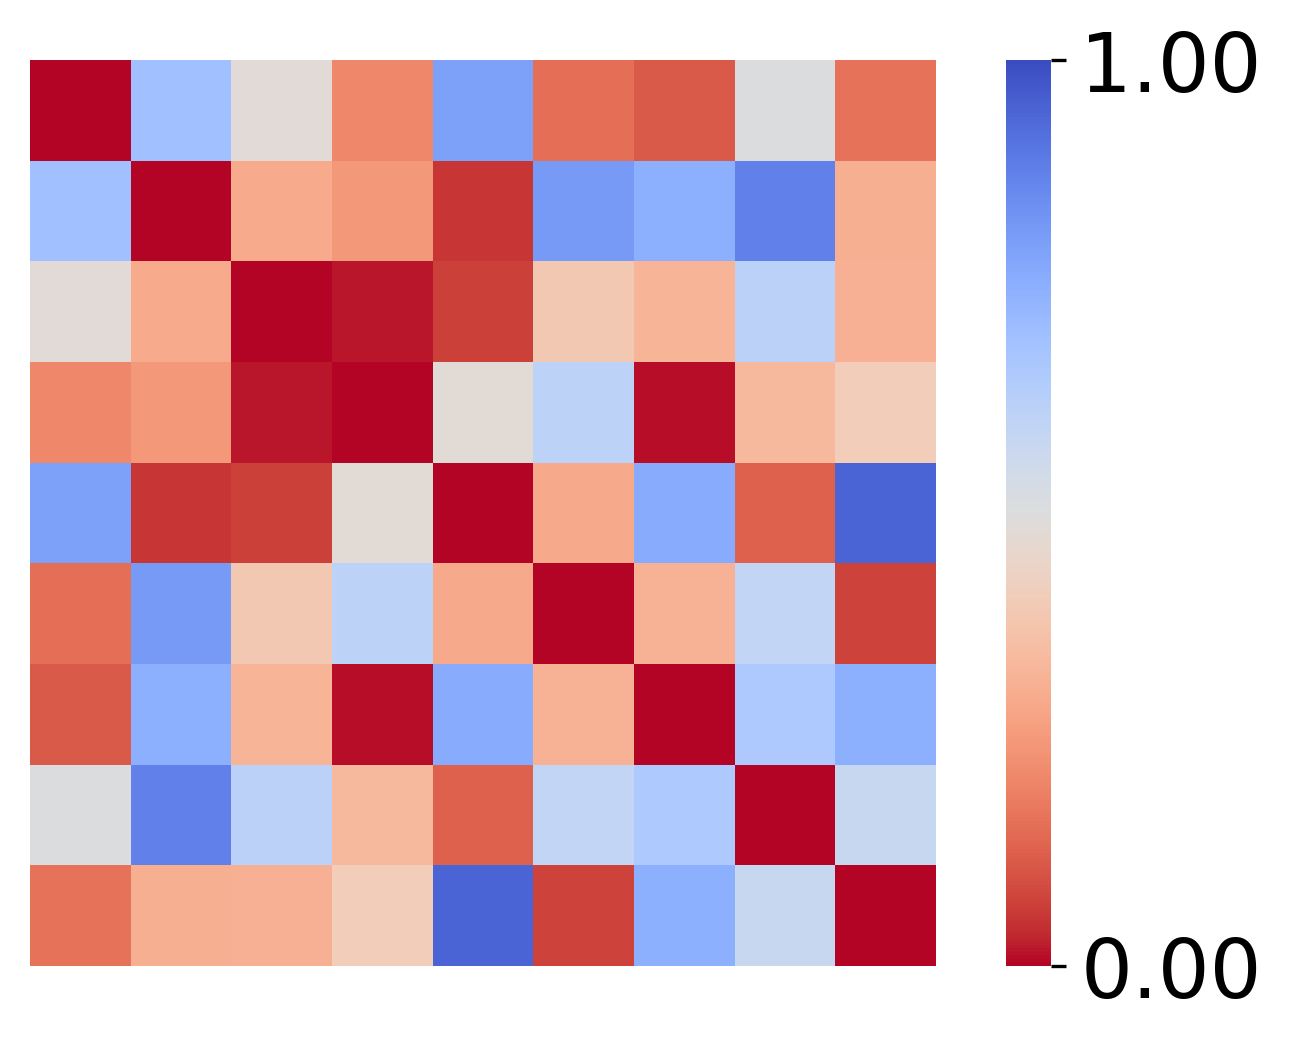

In [266]:
corr_fig, pvs_fig = compute_2D_correlation(random_rewss, random_rewss, effs, effs, "simulated rewards", "simulated rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [267]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_random.svg'))

### Zeros Perturbation

In [268]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss, zeros_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


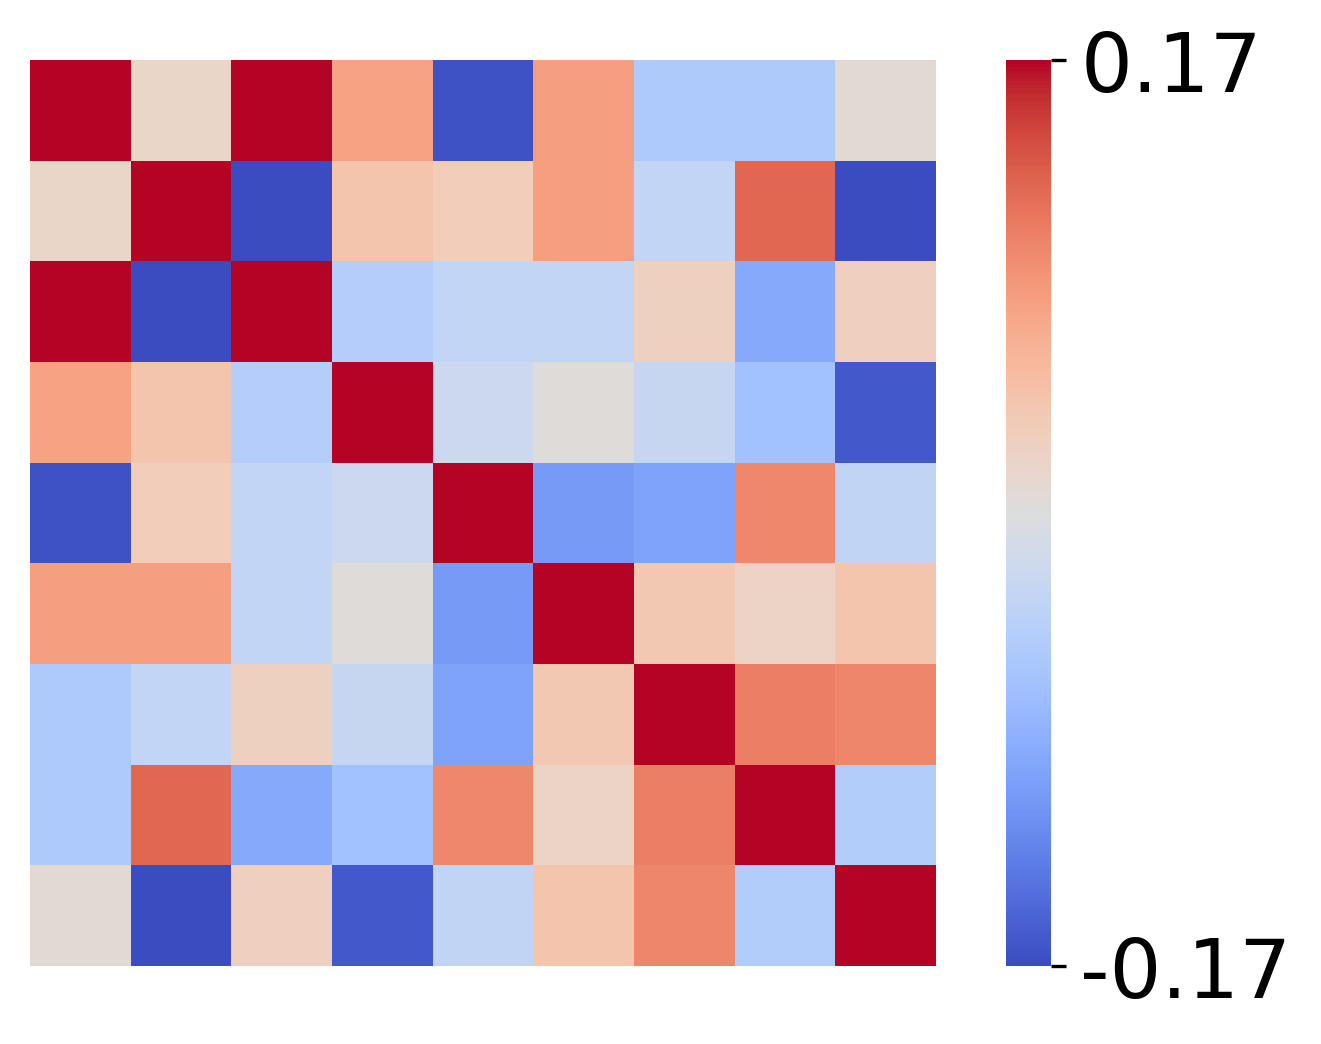

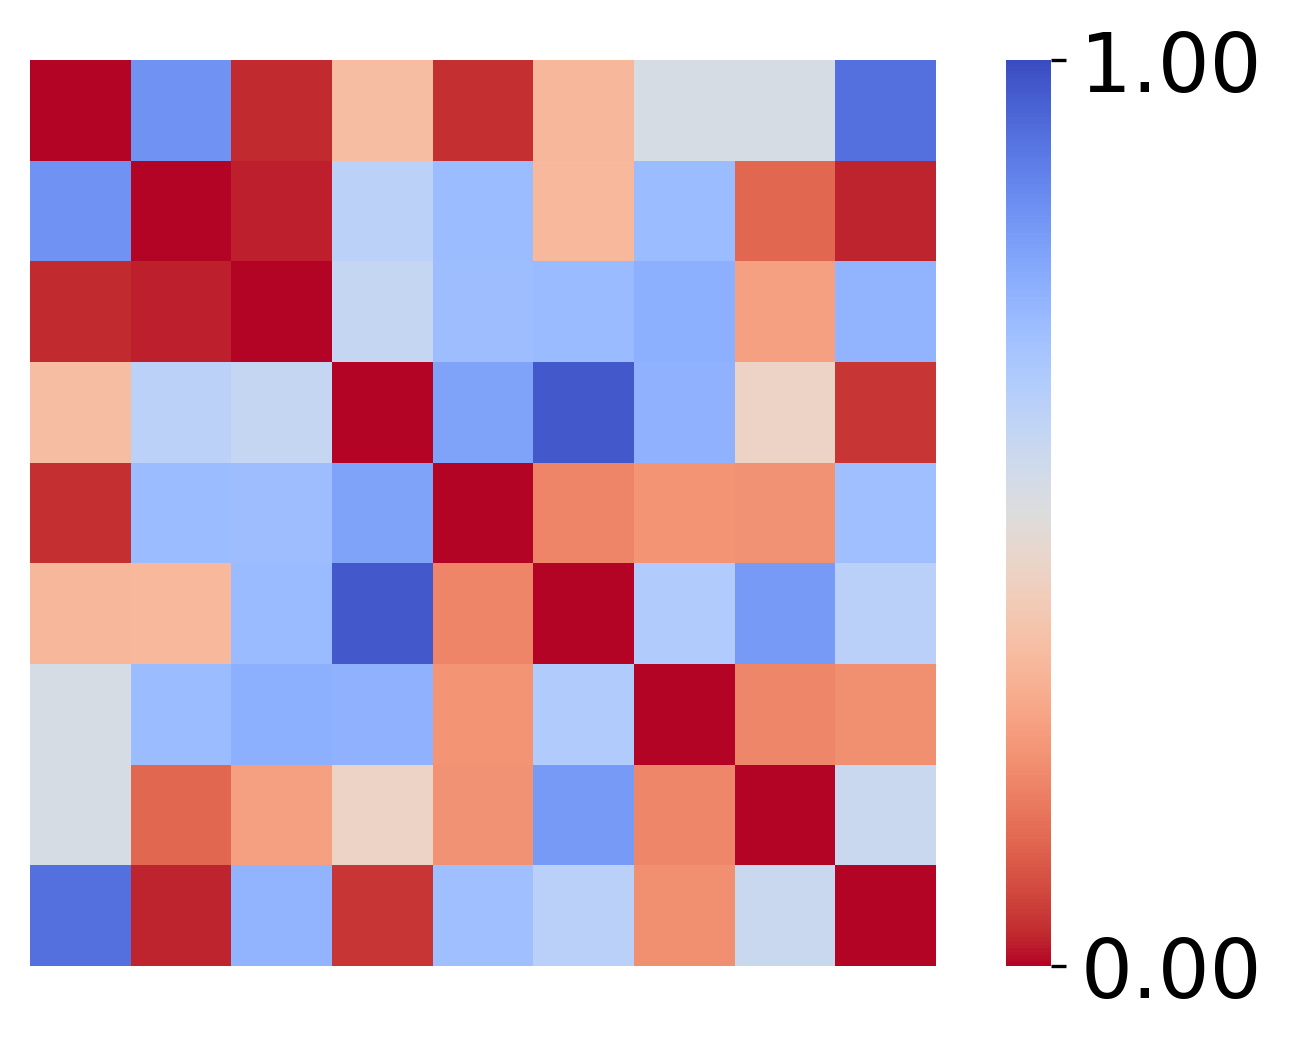

In [269]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_rewss, zeros_rewss, effs, effs, "simulated rewards", "simulated rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [270]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task1_rewards_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task1_rewards_zeros.svg'))

### Stats
#### Competitive linear regression

In [271]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['rewards_tallies'].values), np.stack(df[df['group']]['effs'].values), np.stack(df[df['group']]['effs'].values),)

data_obs_corr = data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr =data_rews_corr_g1
data_rews_pvs = data_rews_pvs_g1
sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)

(60, 9)
(60, 9)


ValueError: need at least one array to stack

In [ ]:
competitive_corr_regression(upper_tri_masking(data_rews_corr), [upper_tri_masking(sim_rews_corr), upper_tri_masking(random_rews_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     10.32
Date:                Fri, 31 May 2024   Prob (F-statistic):           0.000331
Time:                        14:26:10   Log-Likelihood:                 42.189
No. Observations:                  36   AIC:                            -78.38
Df Residuals:                      33   BIC:                            -73.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0430      0.016      2.659      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(sim_rews_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(random_rews_corr).reshape((1,-1)))[0][0])

0.7248476281365321
0.27114641544853685


## Panel C: Task 2 Sleeps
### Humans

In [272]:
from human_utils_project import get_clean_data

day = 'day3'
group = None

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False


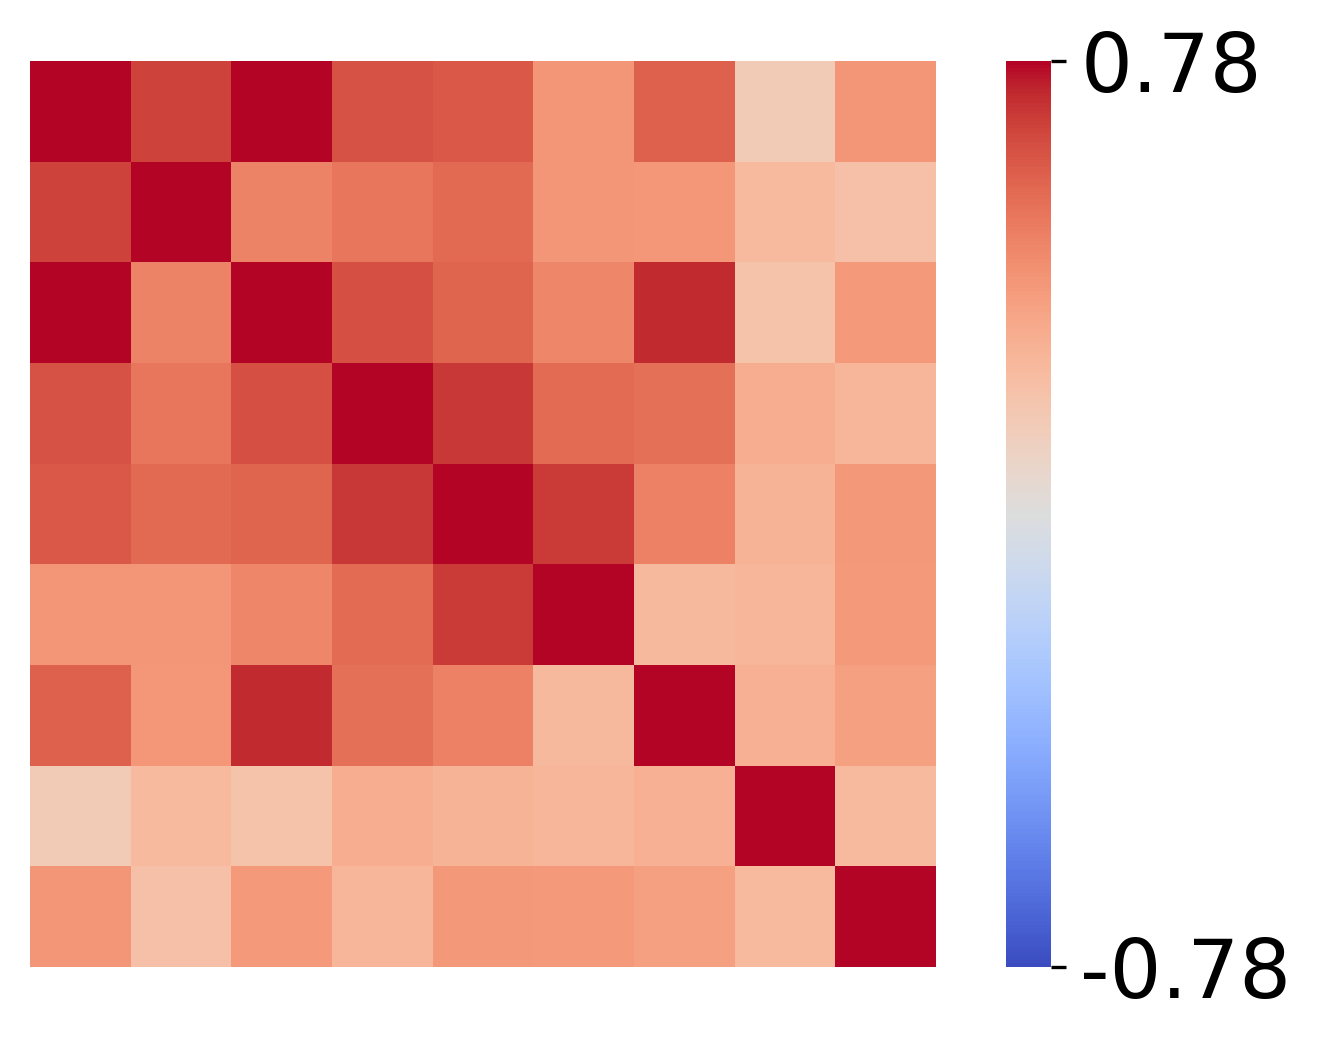

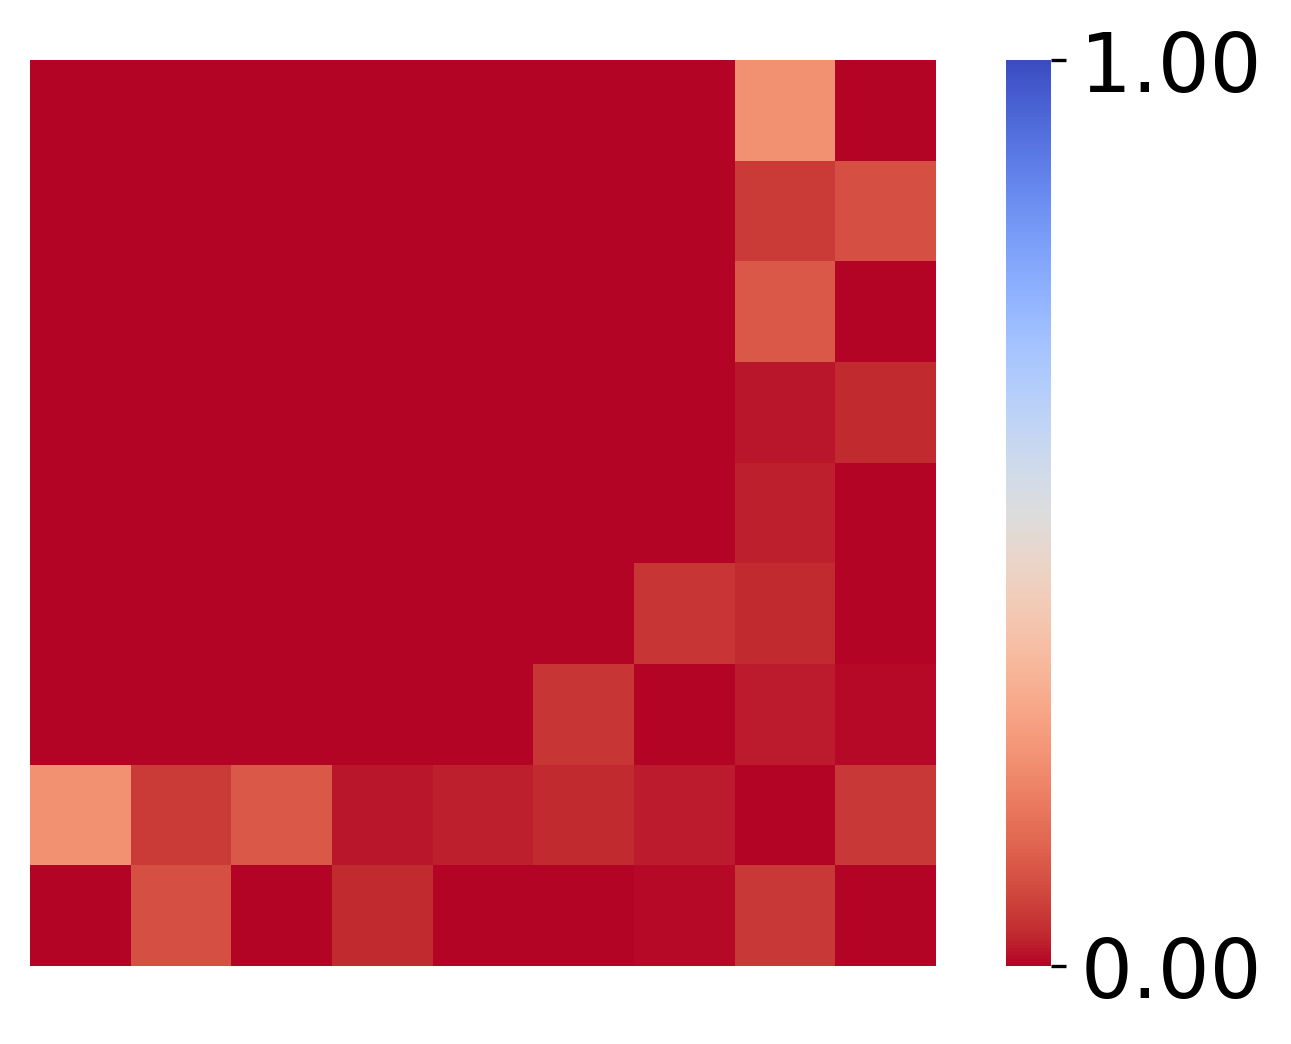

In [273]:
from human_utils_behavioral_analysis import compute_2D_correlation
corr_fig, pvs_fig = compute_2D_correlation(df['n_sleeps'], df['n_sleeps'], df['effs'], df['effs'], col1name = 'Sleeps', col2name='Sleeps', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [274]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_humans.svg'))

### Trait-level Perturbations

In [275]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models, compute_2D_correlation
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss, axis=1)

(9, 9)


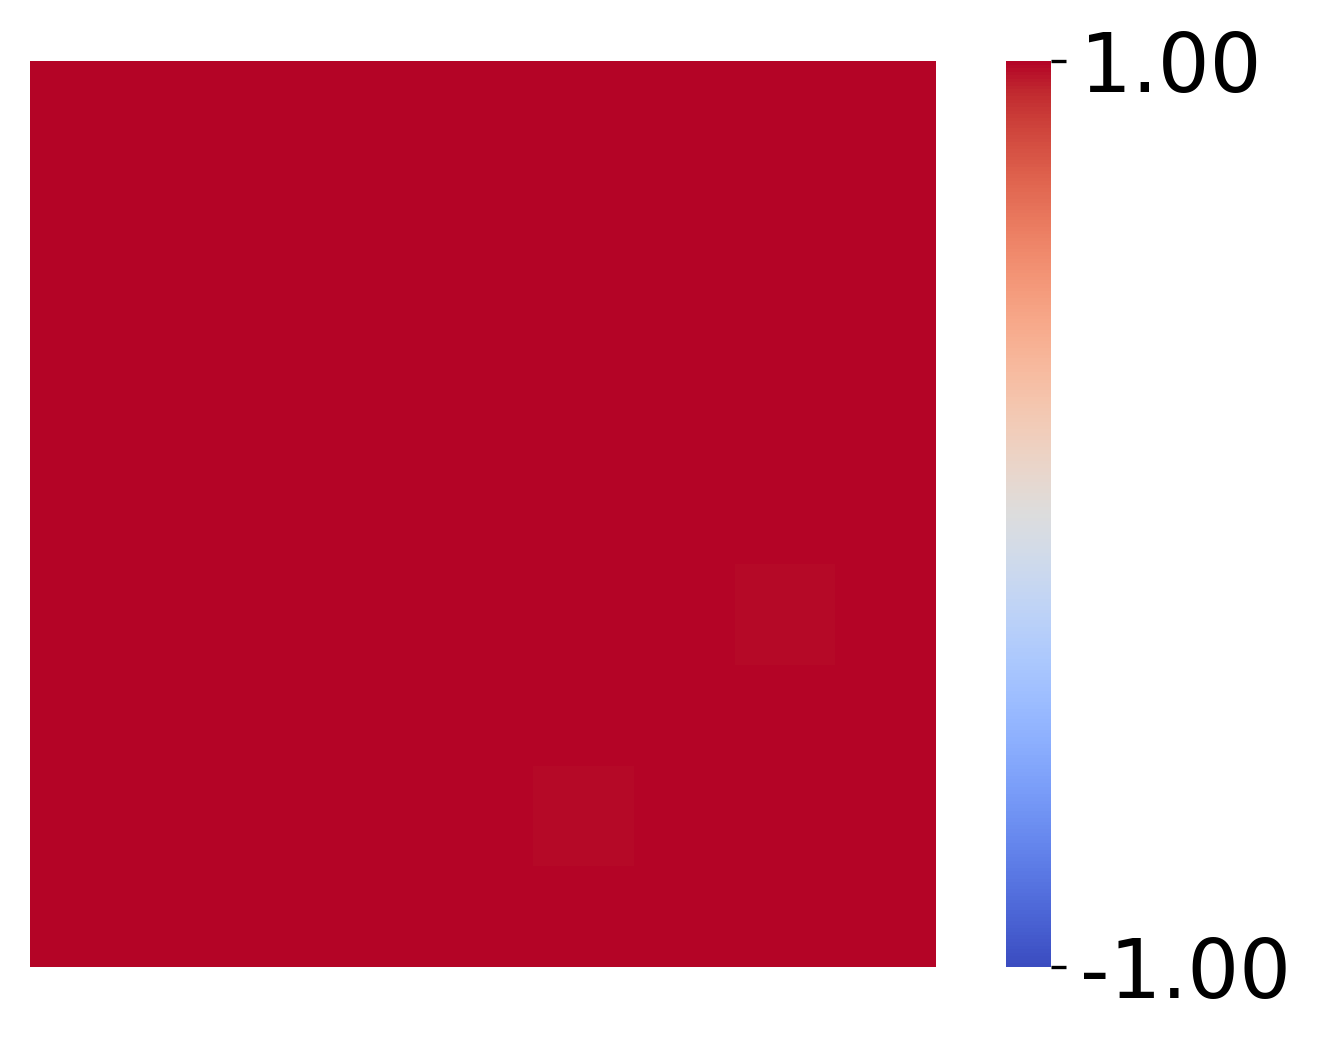

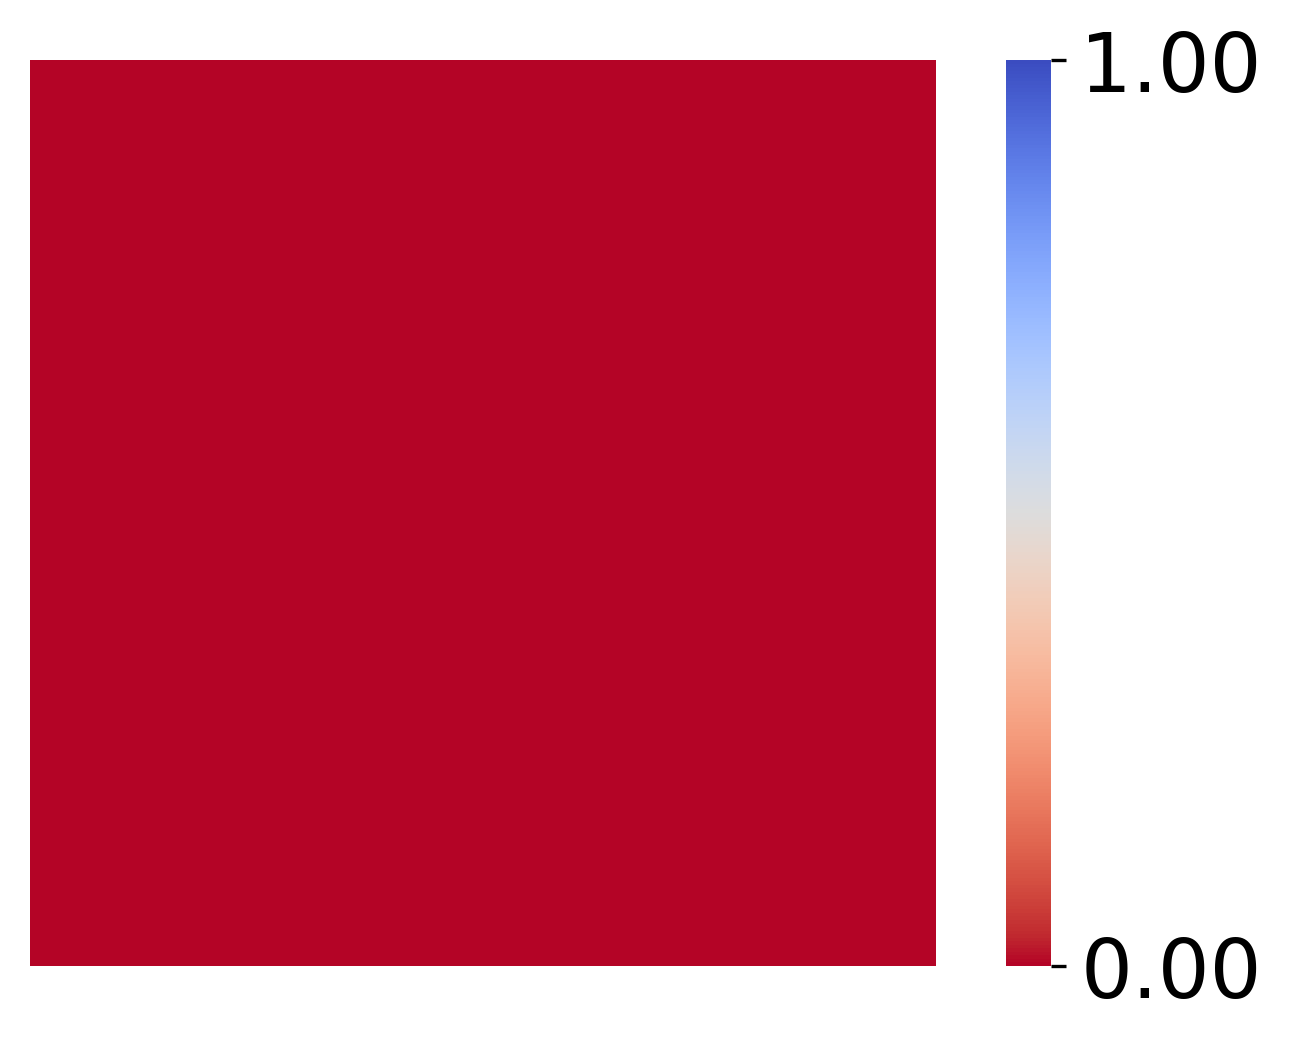

In [276]:
corr_fig, pvs_fig = compute_2D_correlation(sim_sleepss, sim_sleepss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [277]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_trait.svg'))

### Random Perturbations

In [278]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


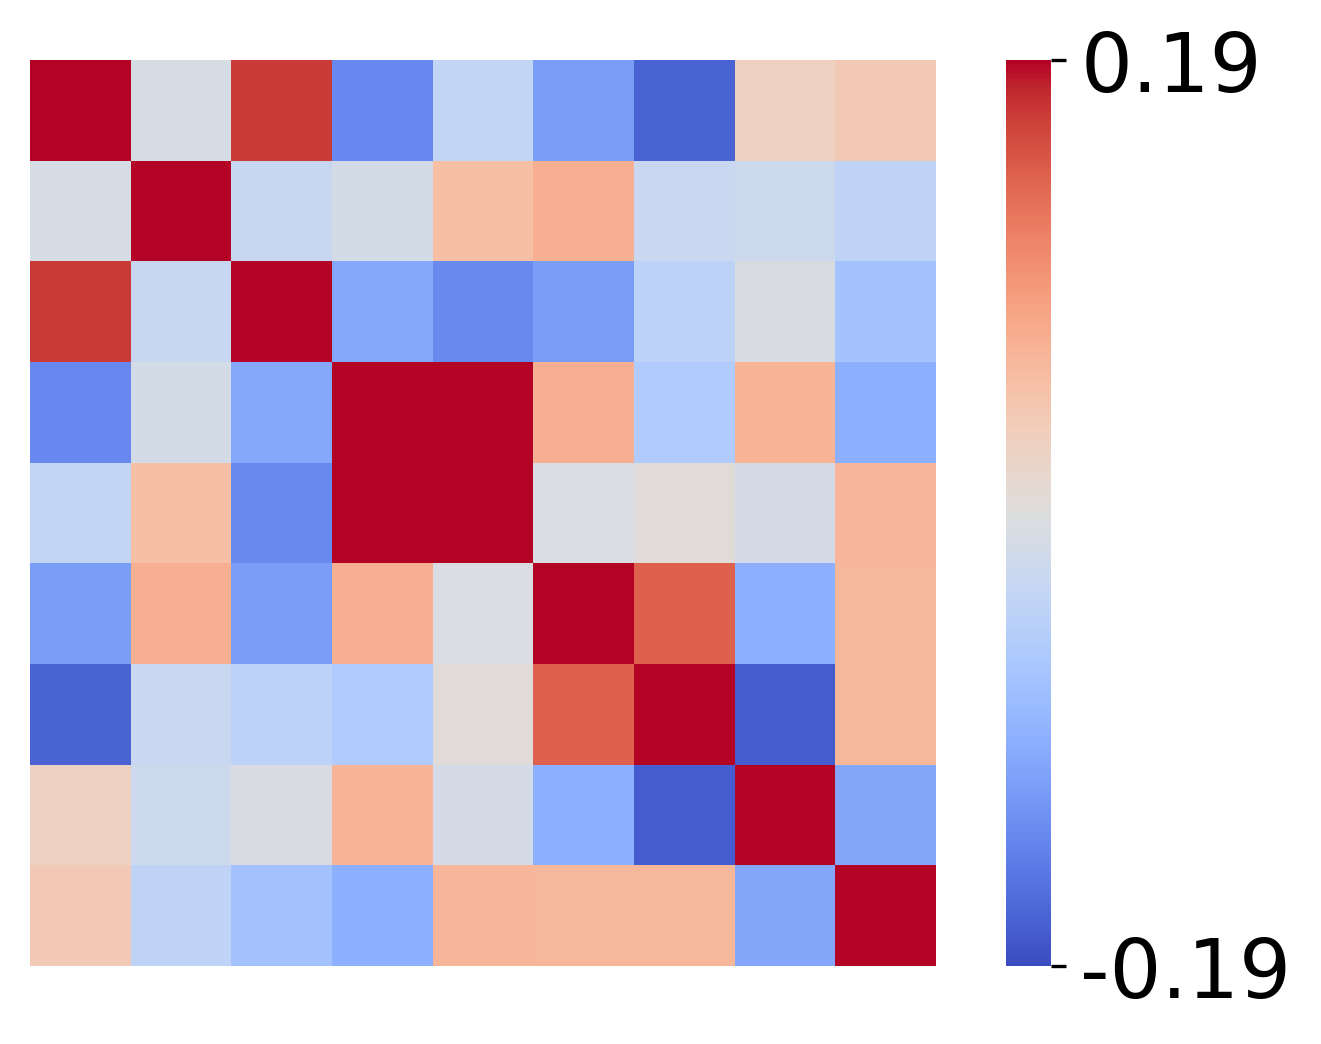

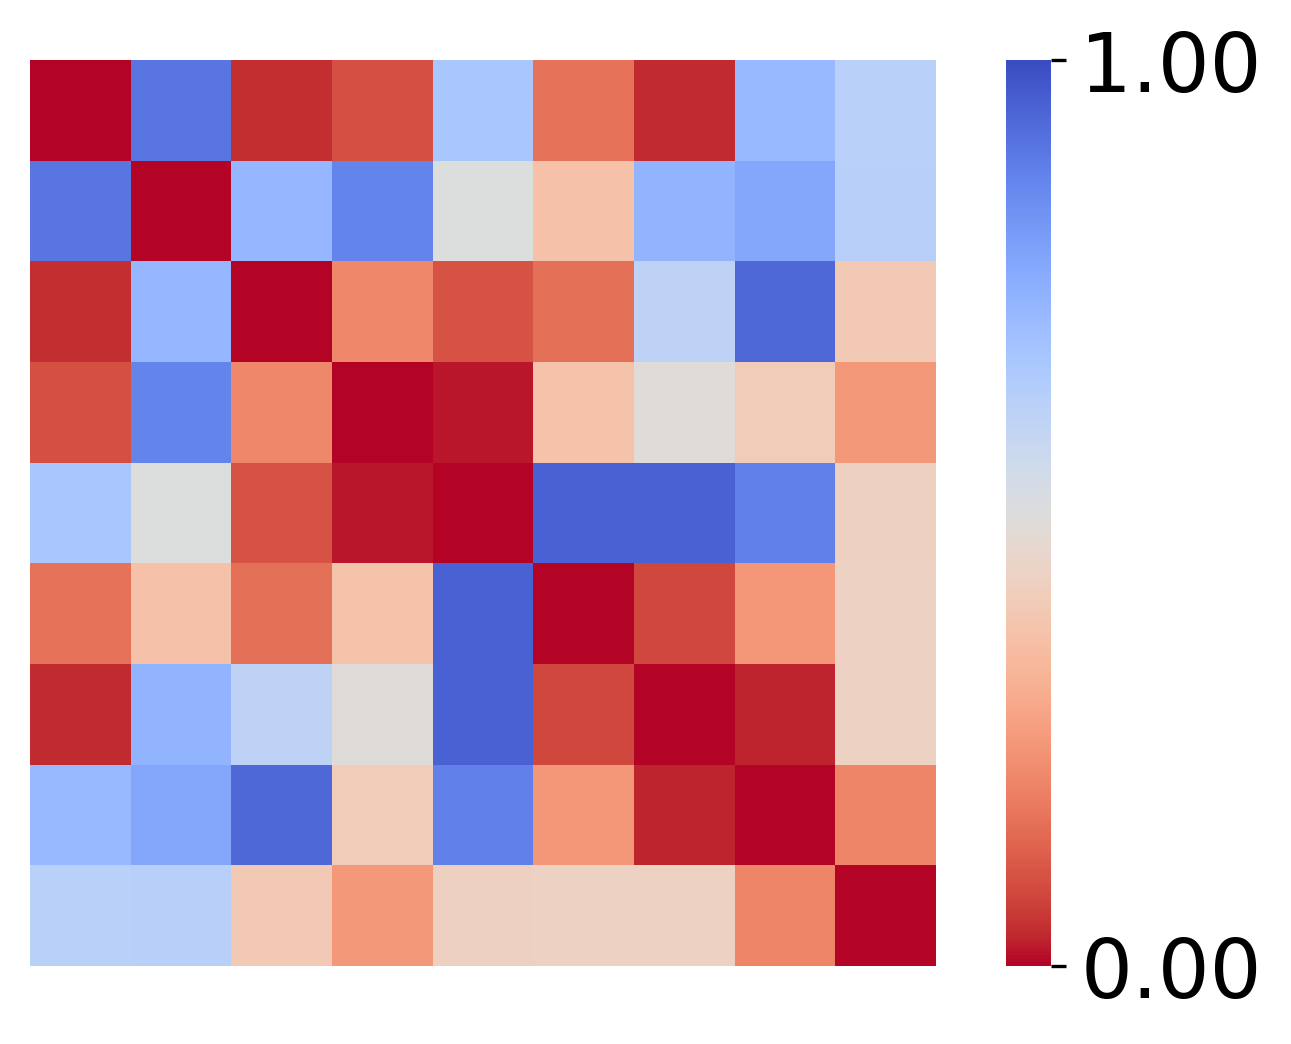

In [279]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_sleepss, random_sleepss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [280]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_random.svg'))

### Zeros Perturbation

In [281]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


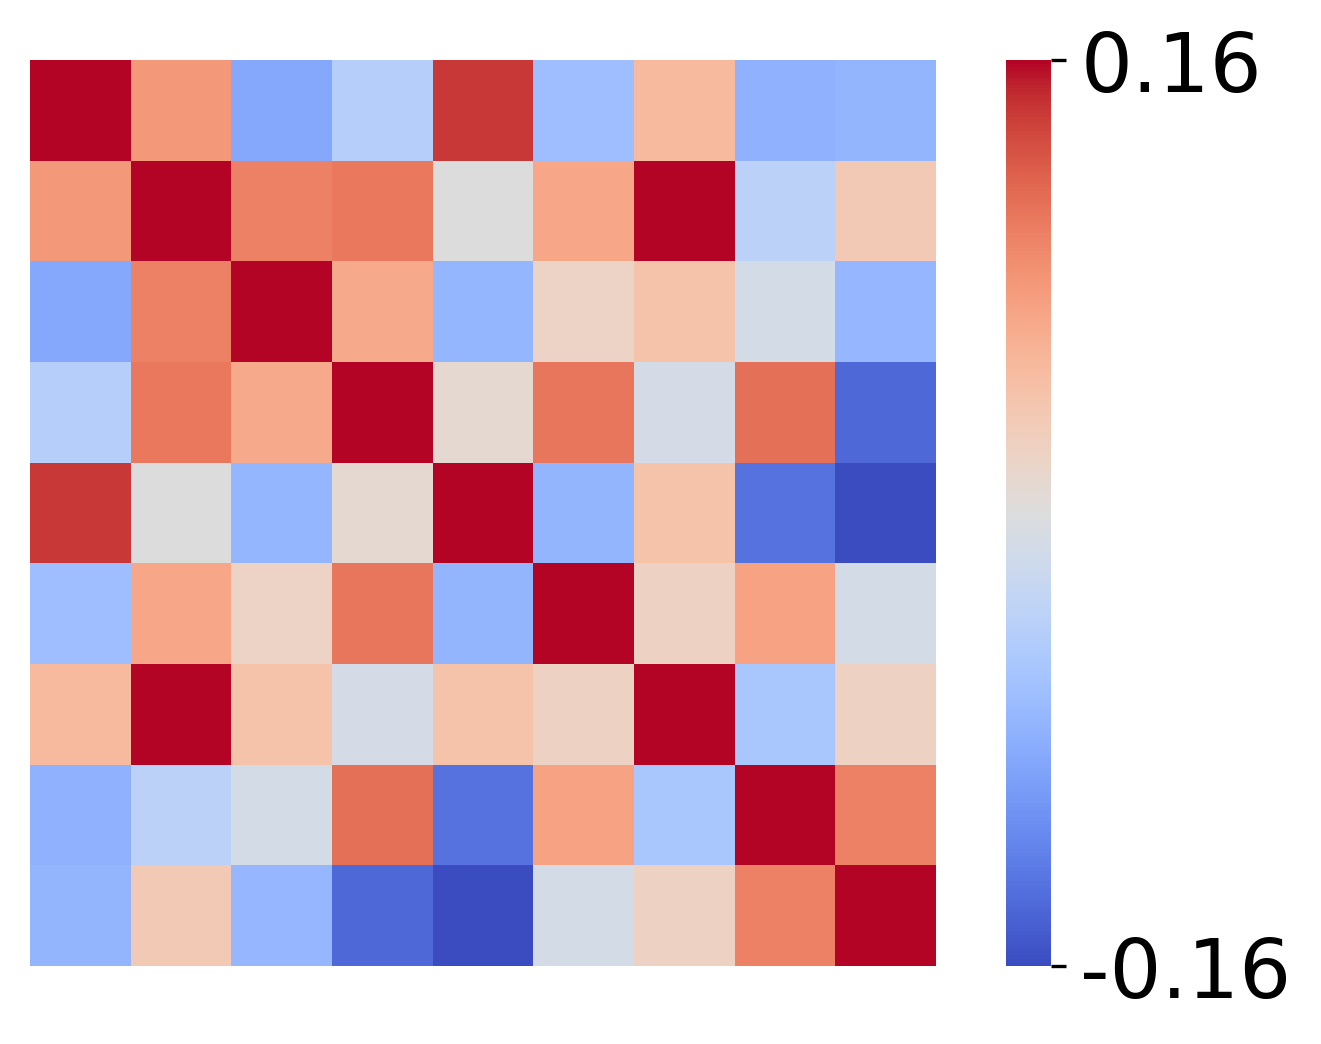

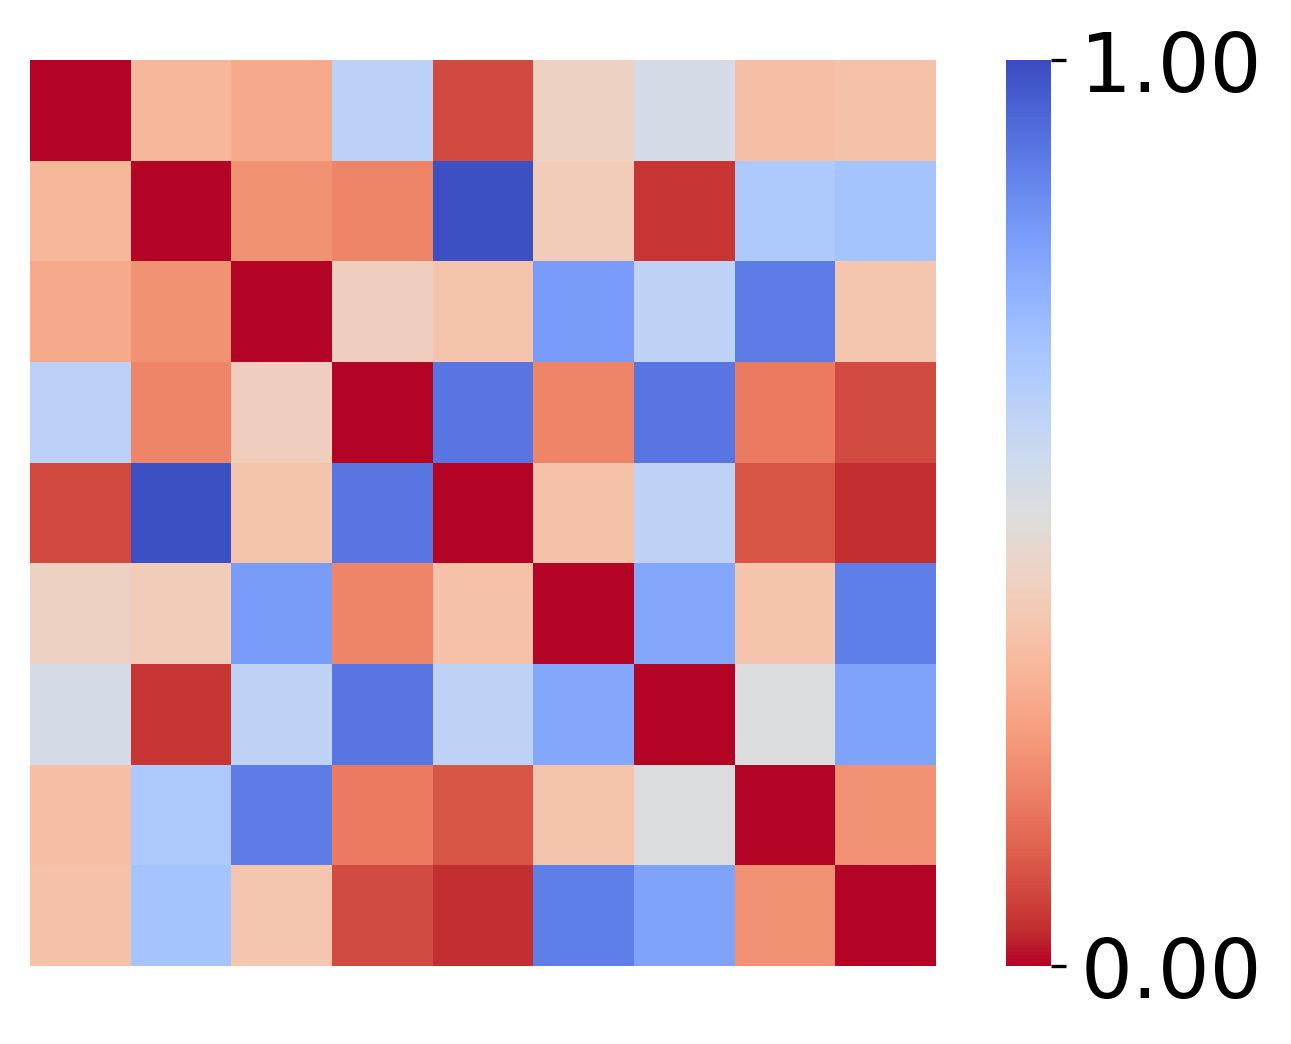

In [282]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_sleepss, zeros_sleepss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [283]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_zeros.svg'))

### Stats

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_obs_corr = data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr =data_rews_corr_g1
data_rews_pvs =data_rews_pvs_g1

data_sleeps_corr =data_sleeps_corr_g1
data_sleeps_pvs = data_sleeps_pvs_g1


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)


(86, 9)
(96, 9)
(86, 9)
(96, 9)
(86, 9)
(96, 9)
(150, 9)
(150, 9)
(9, 9)
(150, 9)
(150, 9)
(150, 9)


In [ ]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_sleeps_corr), [upper_tri_masking(sim_sleeps_corr), upper_tri_masking(random_sleeps_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.4705
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.629
Time:                        14:26:14   Log-Likelihood:                 2.9748
No. Observations:                  36   AIC:                           0.05036
Df Residuals:                      33   BIC:                             4.801
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5474      0.294      1.859      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_sleeps_corr).reshape((1,-1)), upper_tri_masking(sim_sleeps_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_sleeps_corr).reshape((1,-1)), upper_tri_masking(random_sleeps_corr).reshape((1,-1)))[0][0])

0.9147007747876773
-0.13484559034870686


## Panel C2: Task 2 Sleeps/Observes

### Humans

In [284]:
from human_utils_project import get_clean_data

day = 'day3'
group = None

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

df = df[df['n_observes'].apply(sum) > 10]
df = df[df['n_sleeps'].apply(sum) > 5]

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False


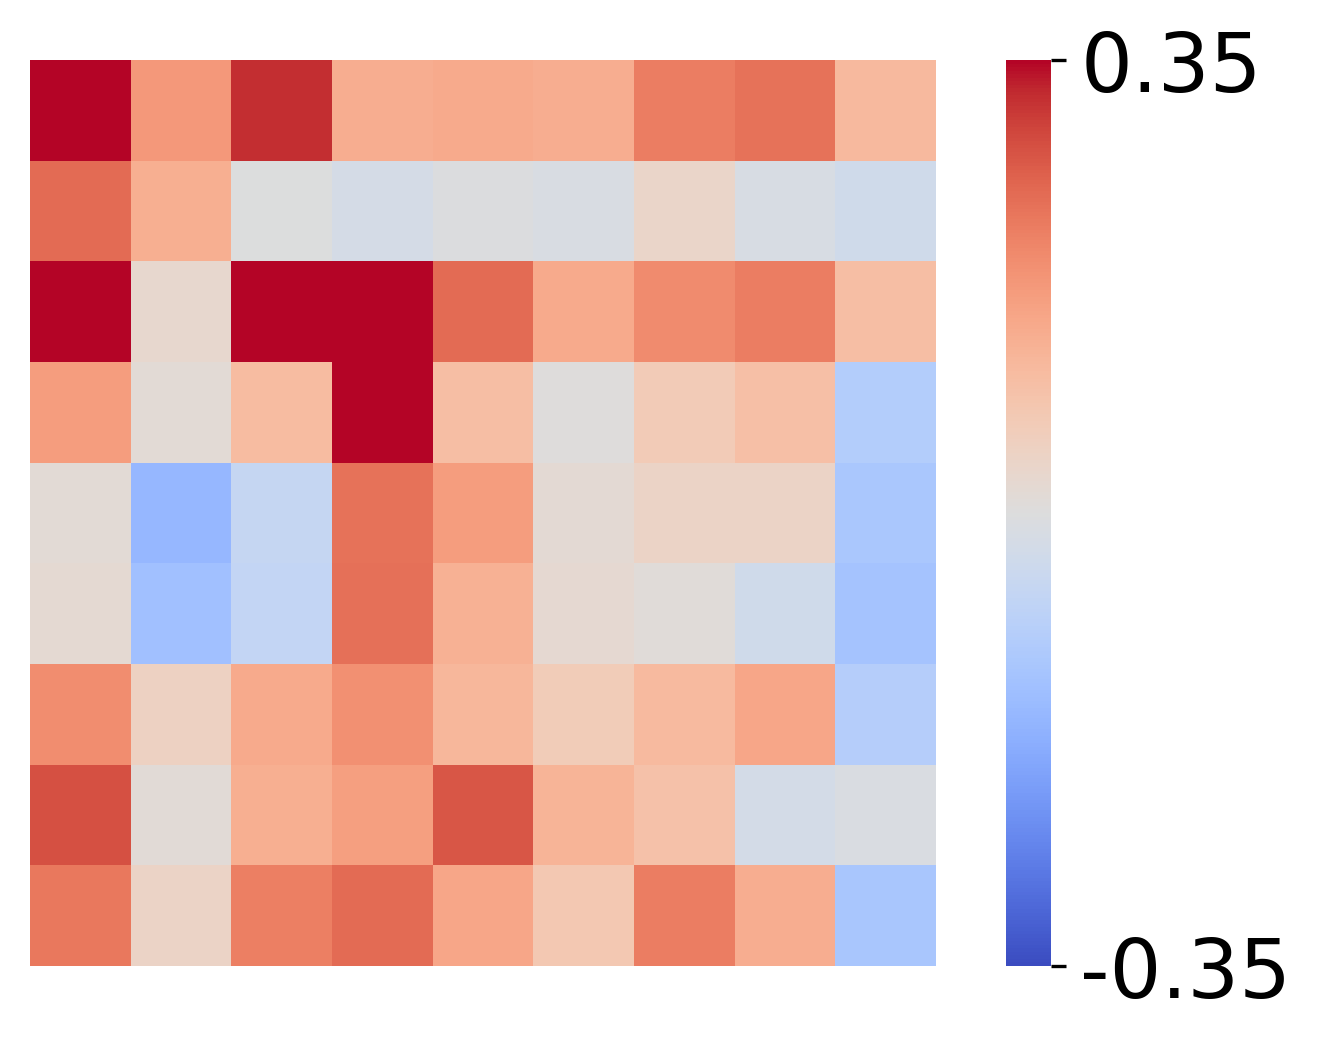

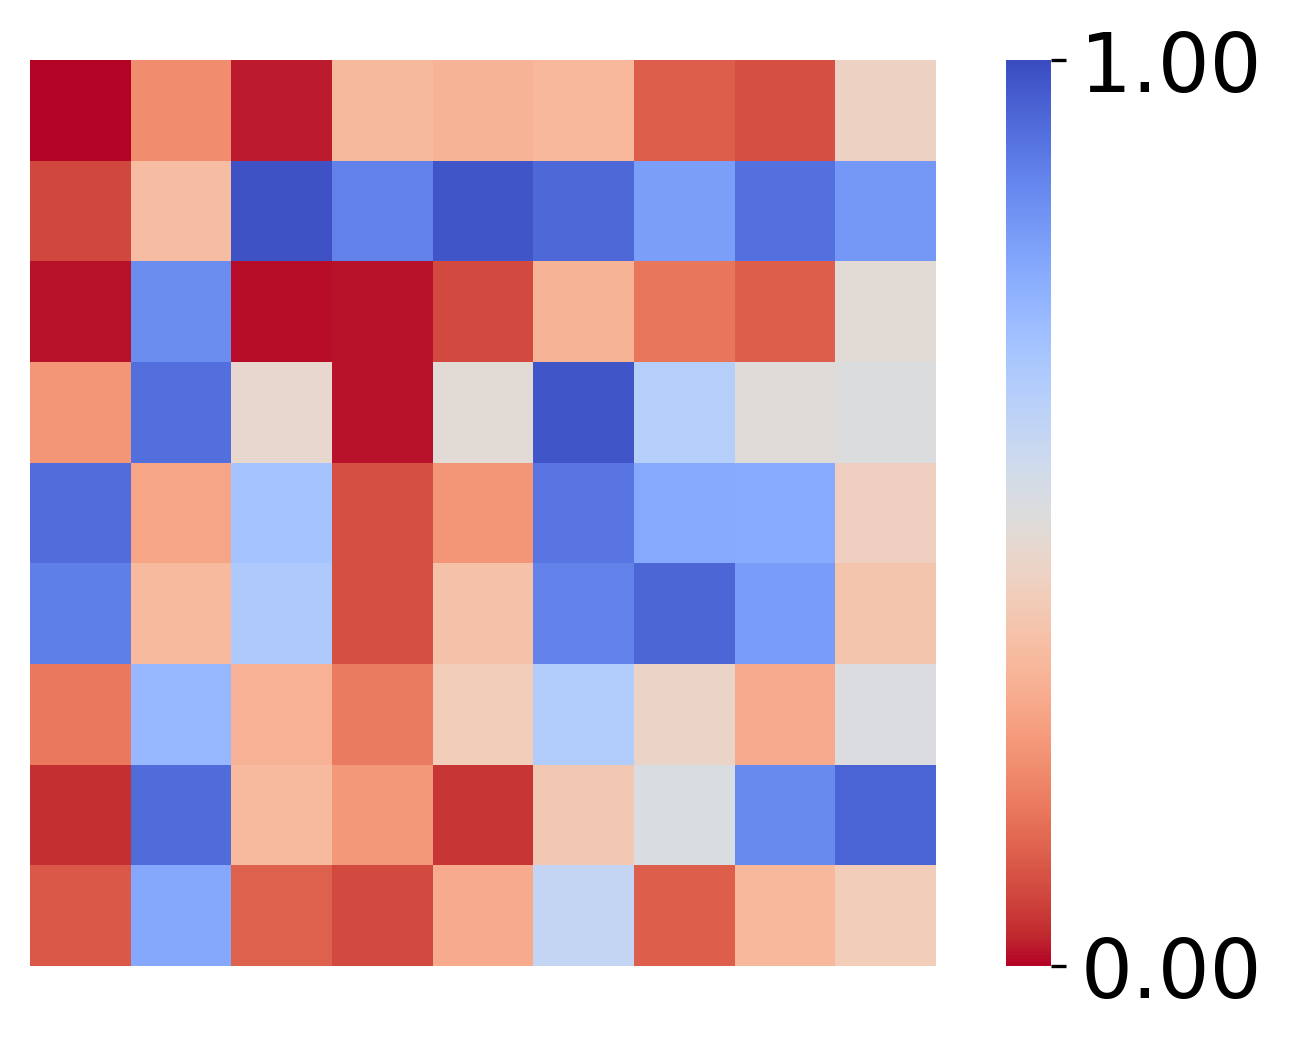

In [285]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_sleeps'], df['n_observes'], df['effs'], df['effs'], col1name = 'Sleeps', col2name='Observes', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [286]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_humans.svg'))

### Trait-level Perturbations

In [287]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)

(150, 9)


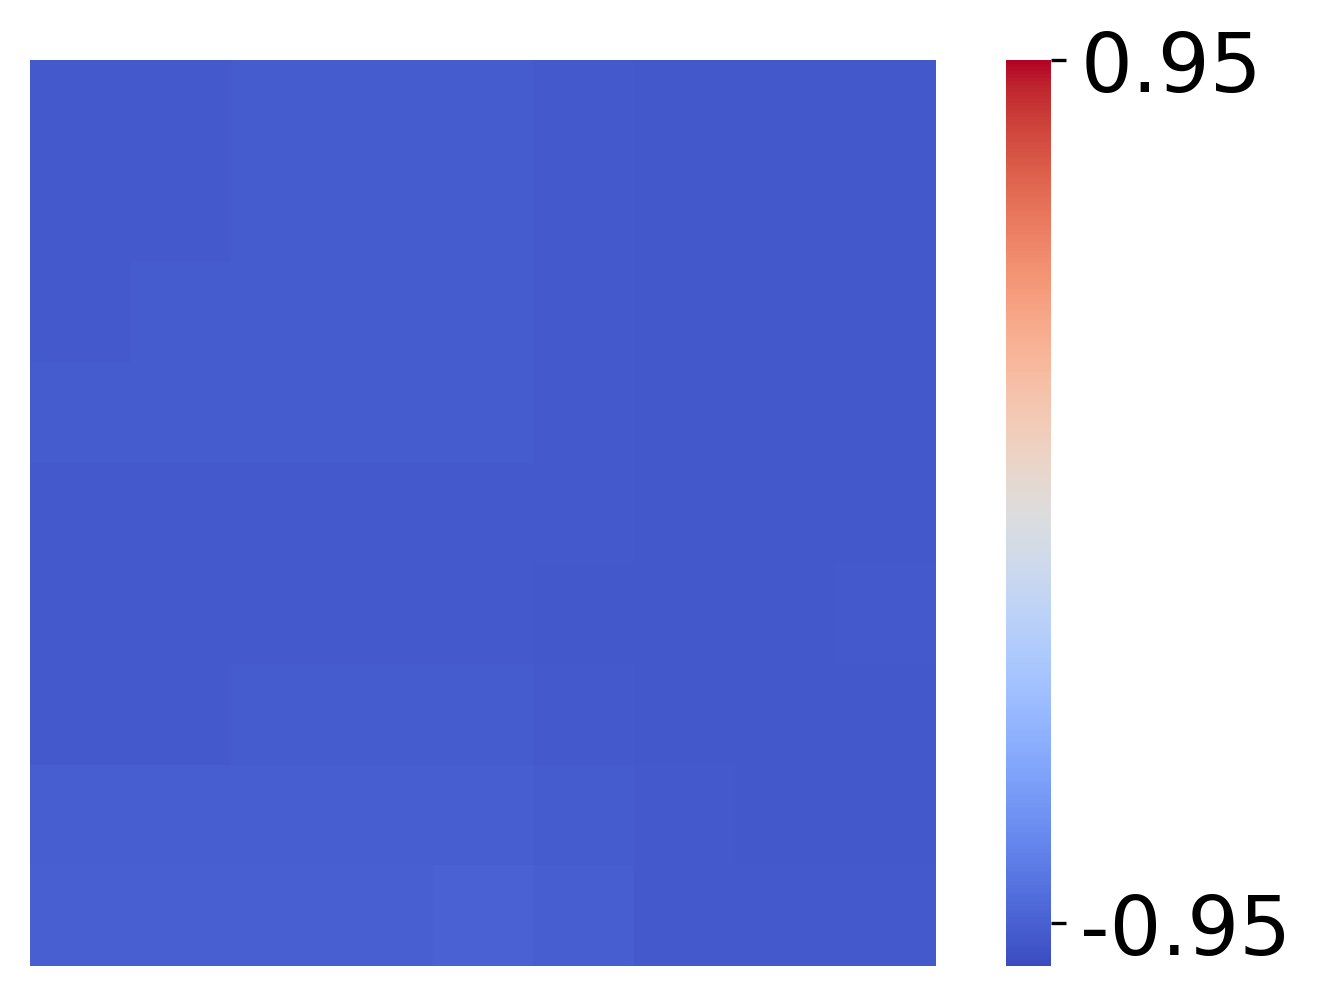

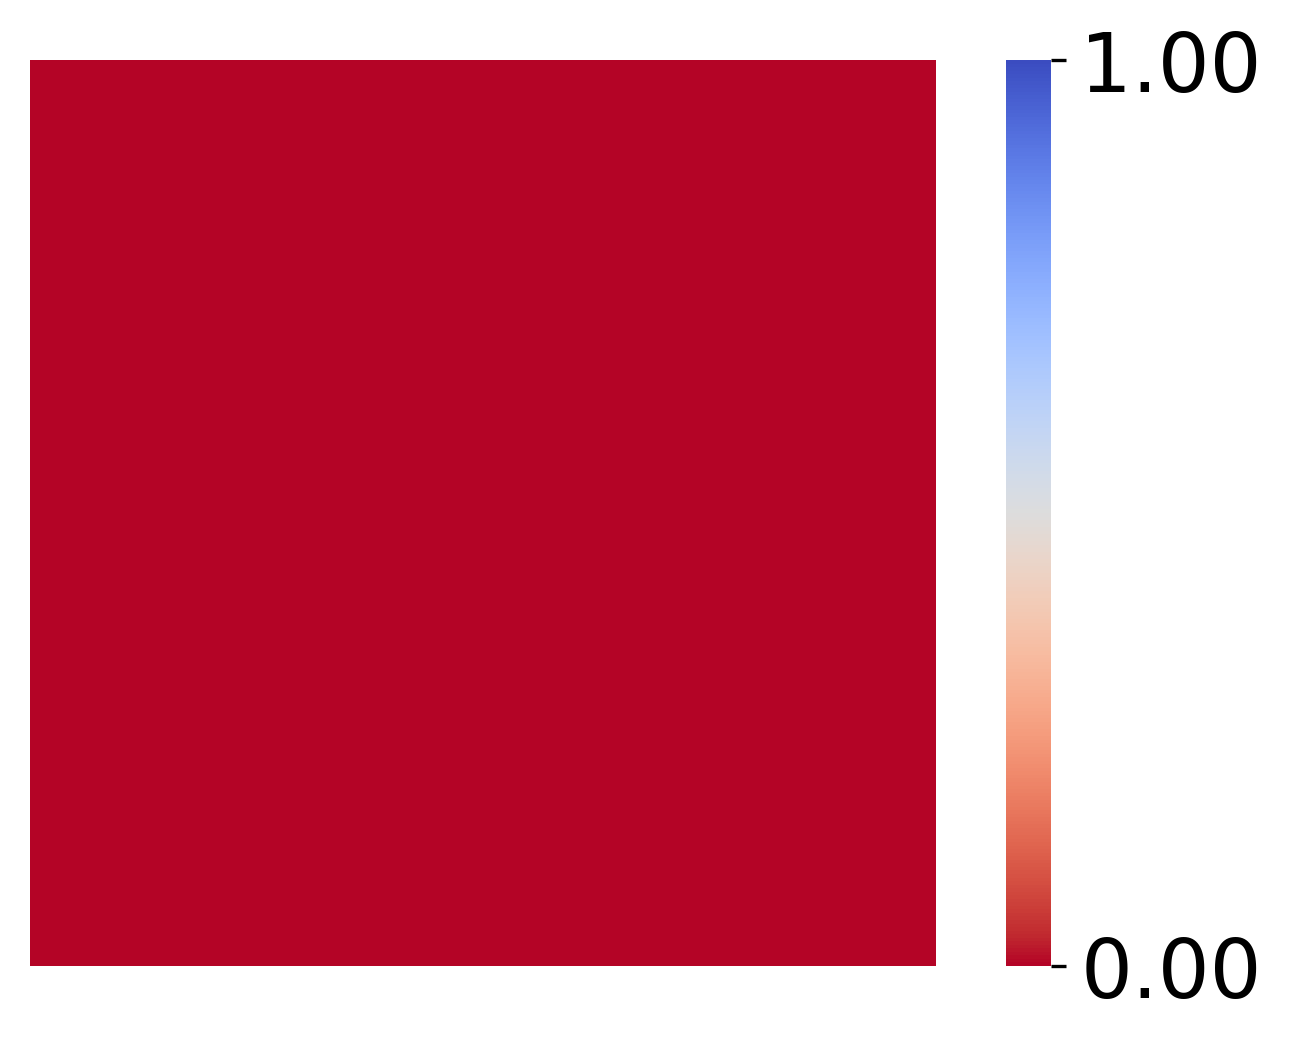

In [288]:
corr_fig, pvs_fig = compute_2D_correlation(sim_sleepss, sim_obss, effs, effs, "Sleeps", "Observes", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [289]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_trait.svg'))

### Random Perturbation

In [290]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)


## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


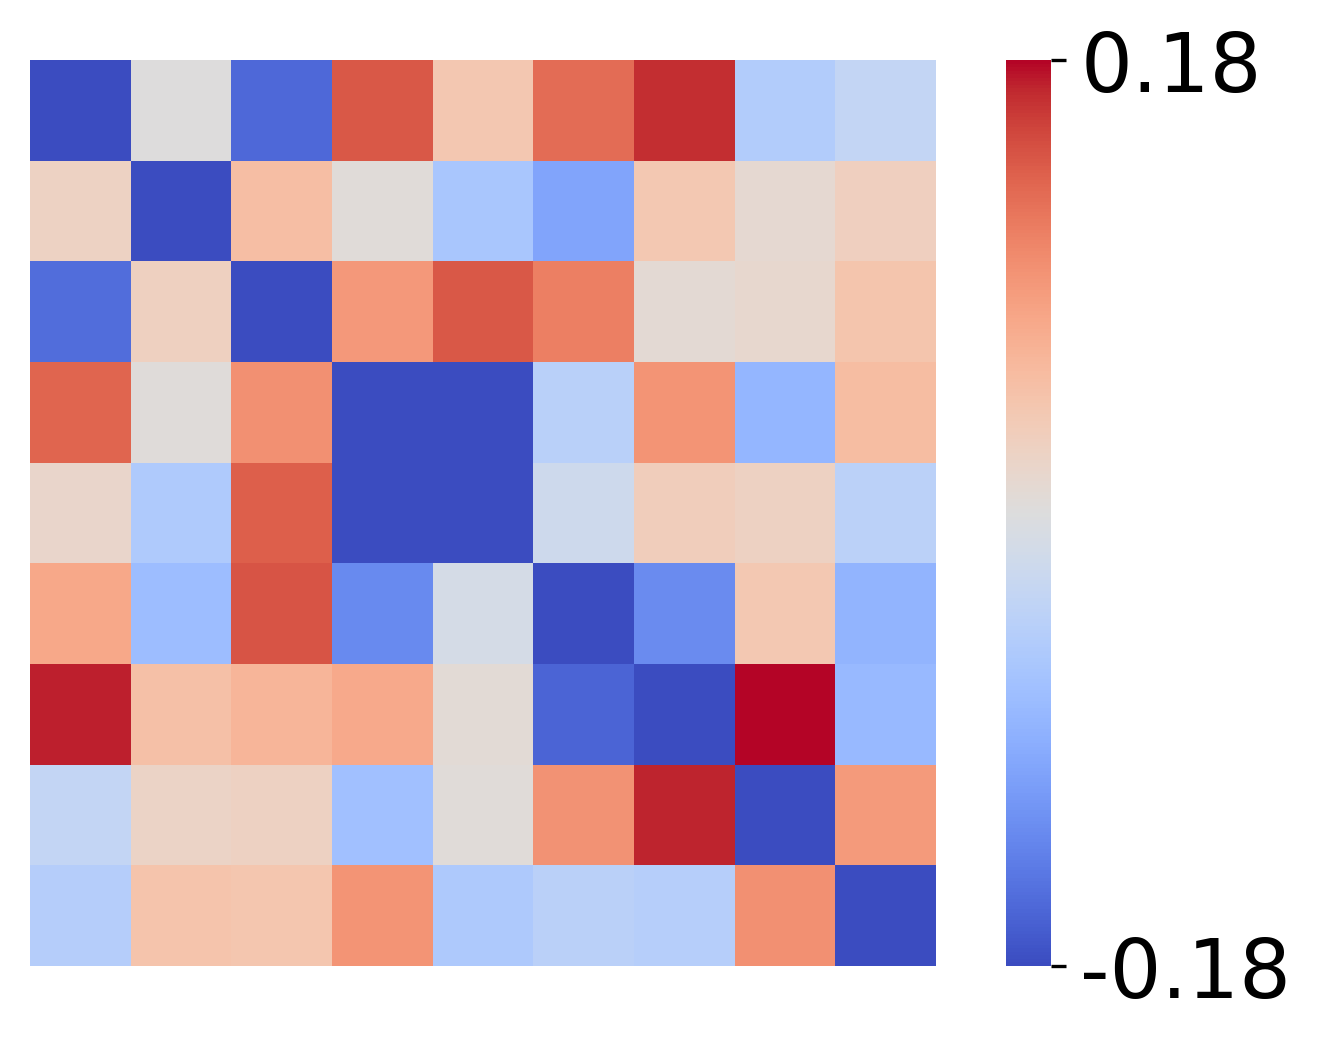

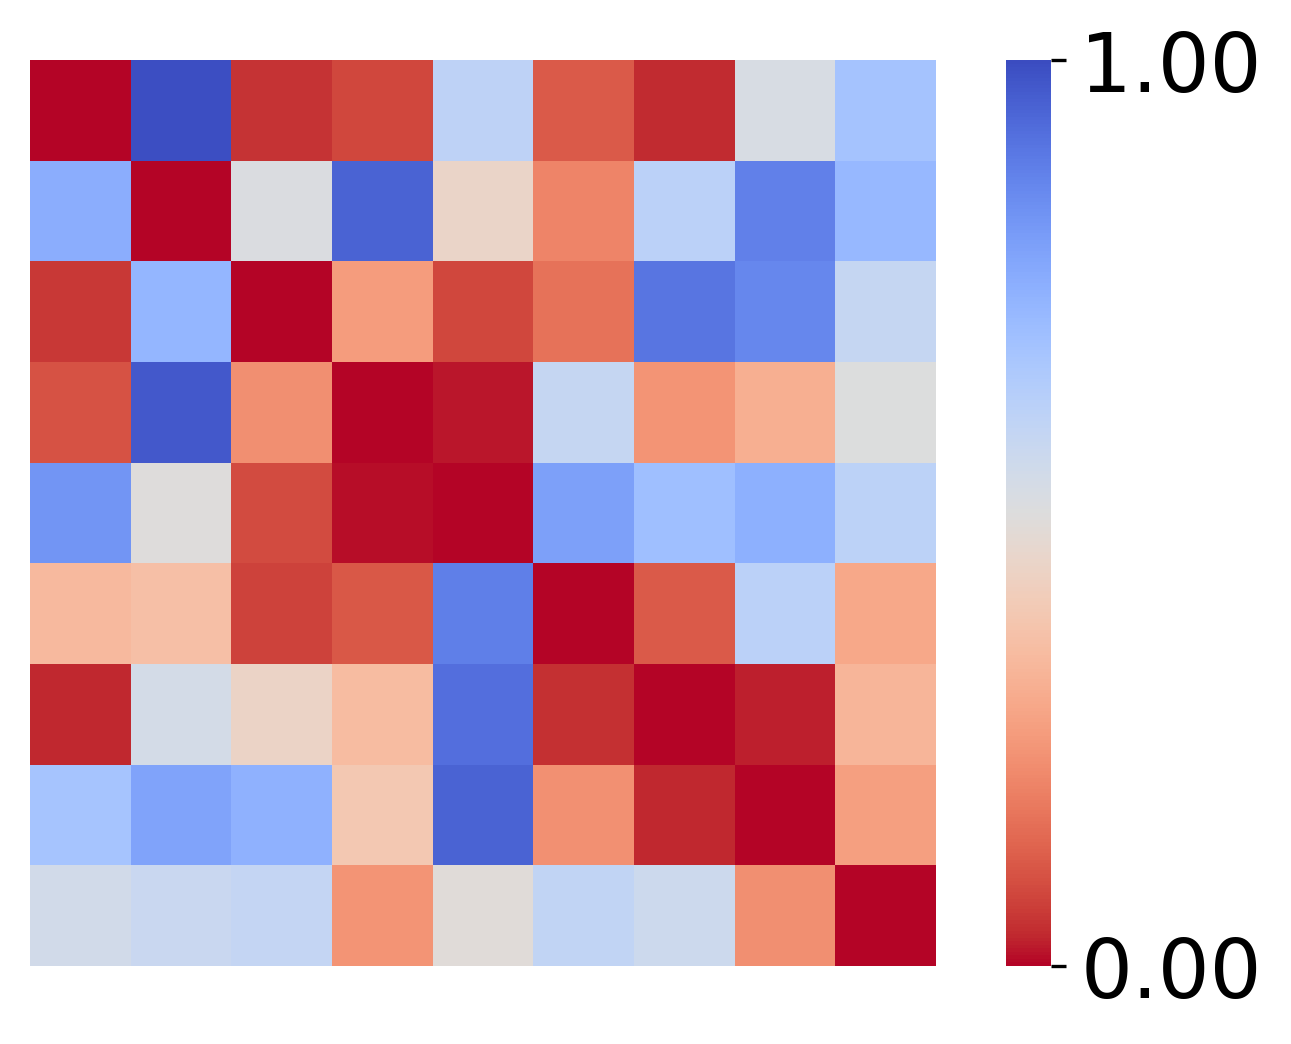

In [291]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_sleepss, random_obss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [292]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_random.svg'))

### Zeros Perturbation

In [293]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


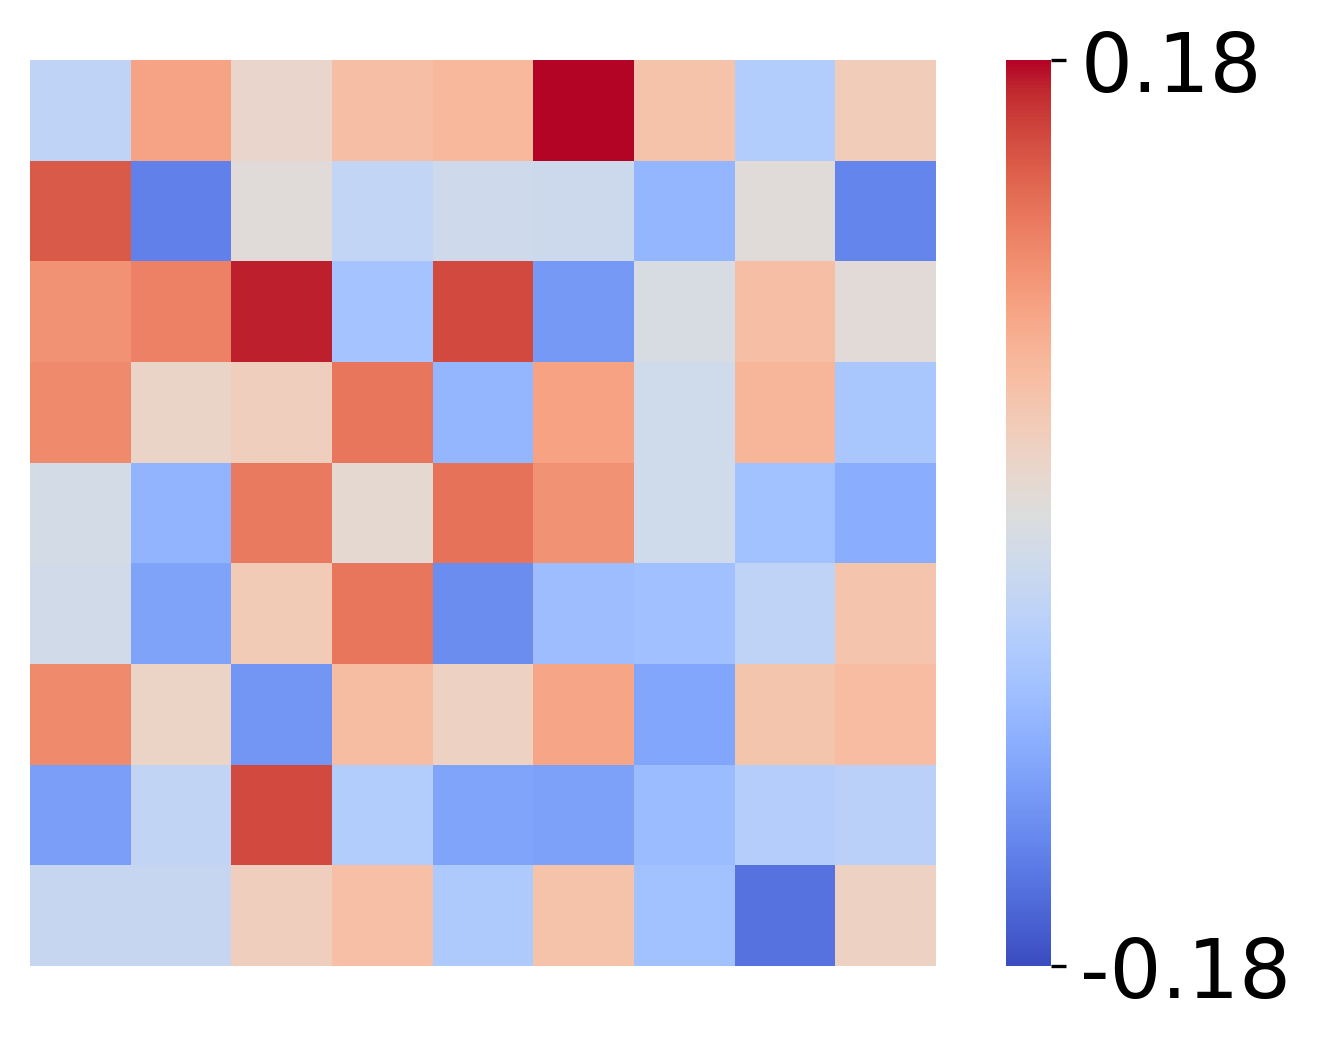

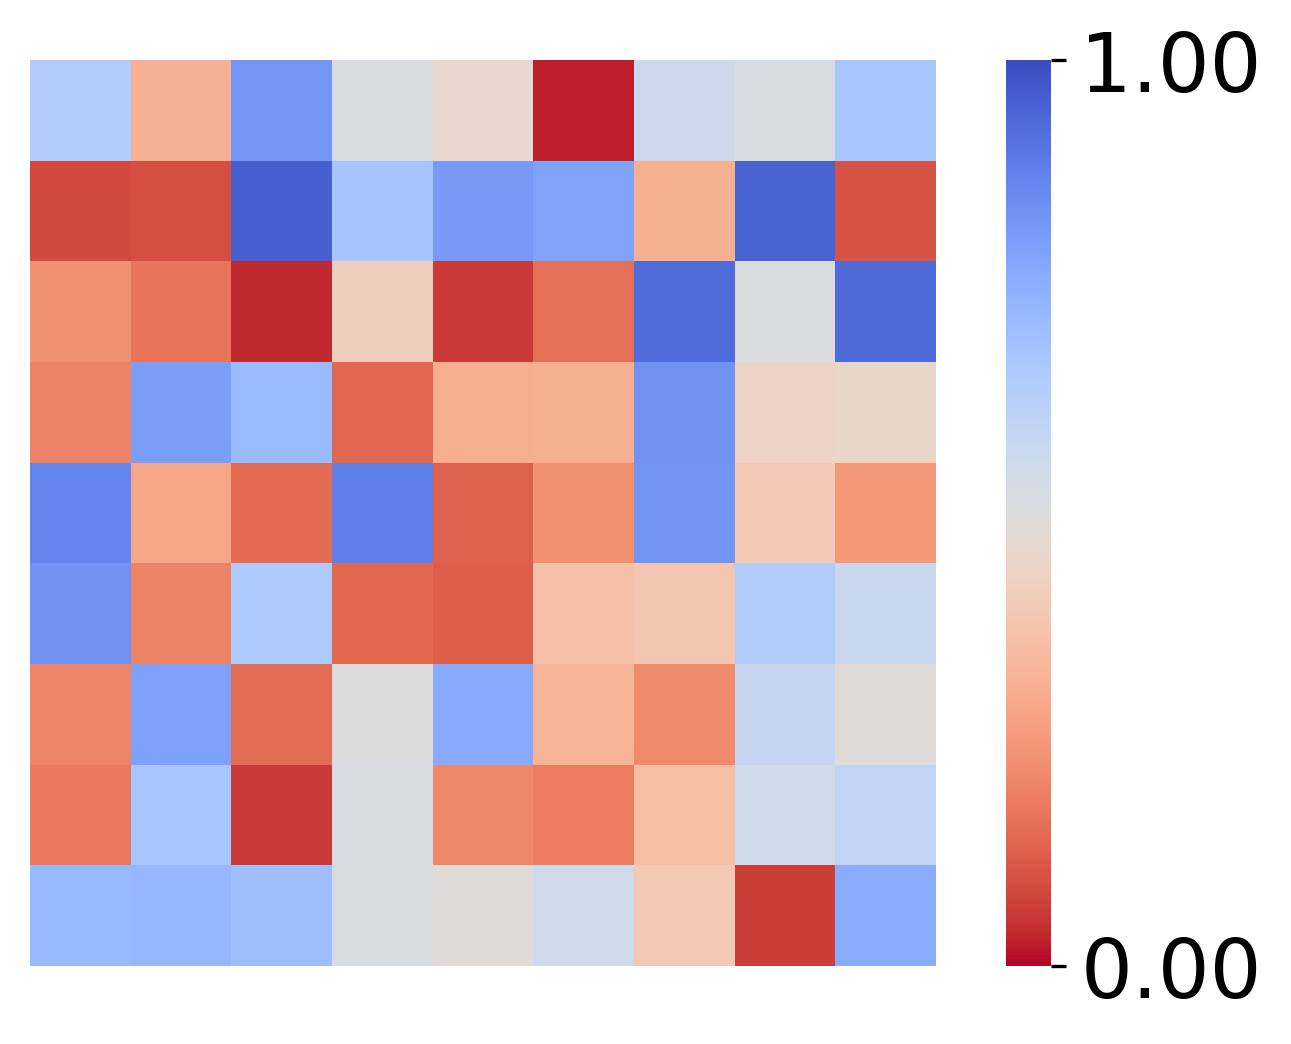

In [294]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_sleepss, zeros_obss, effs, effs, "Sleeps", "Sleeps", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [295]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_sleeps_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_sleeps_observes_zeros.svg'))

## Panel D: Task 2 Number of Observations
### Humans

In [296]:
from human_utils_project import get_clean_data

day = 'day3'

group = None

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False


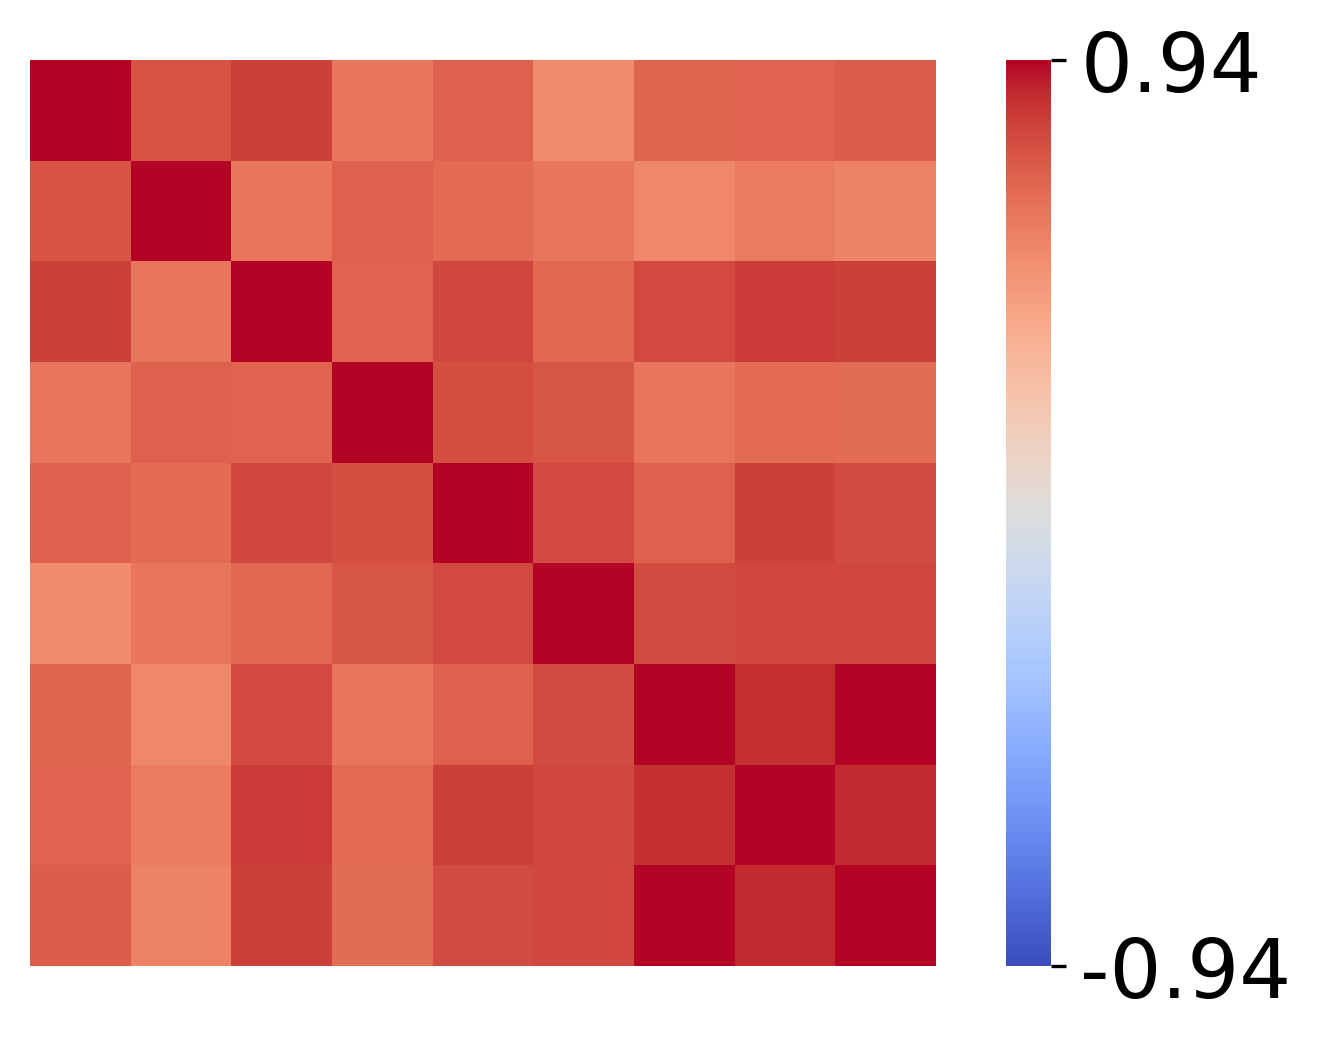

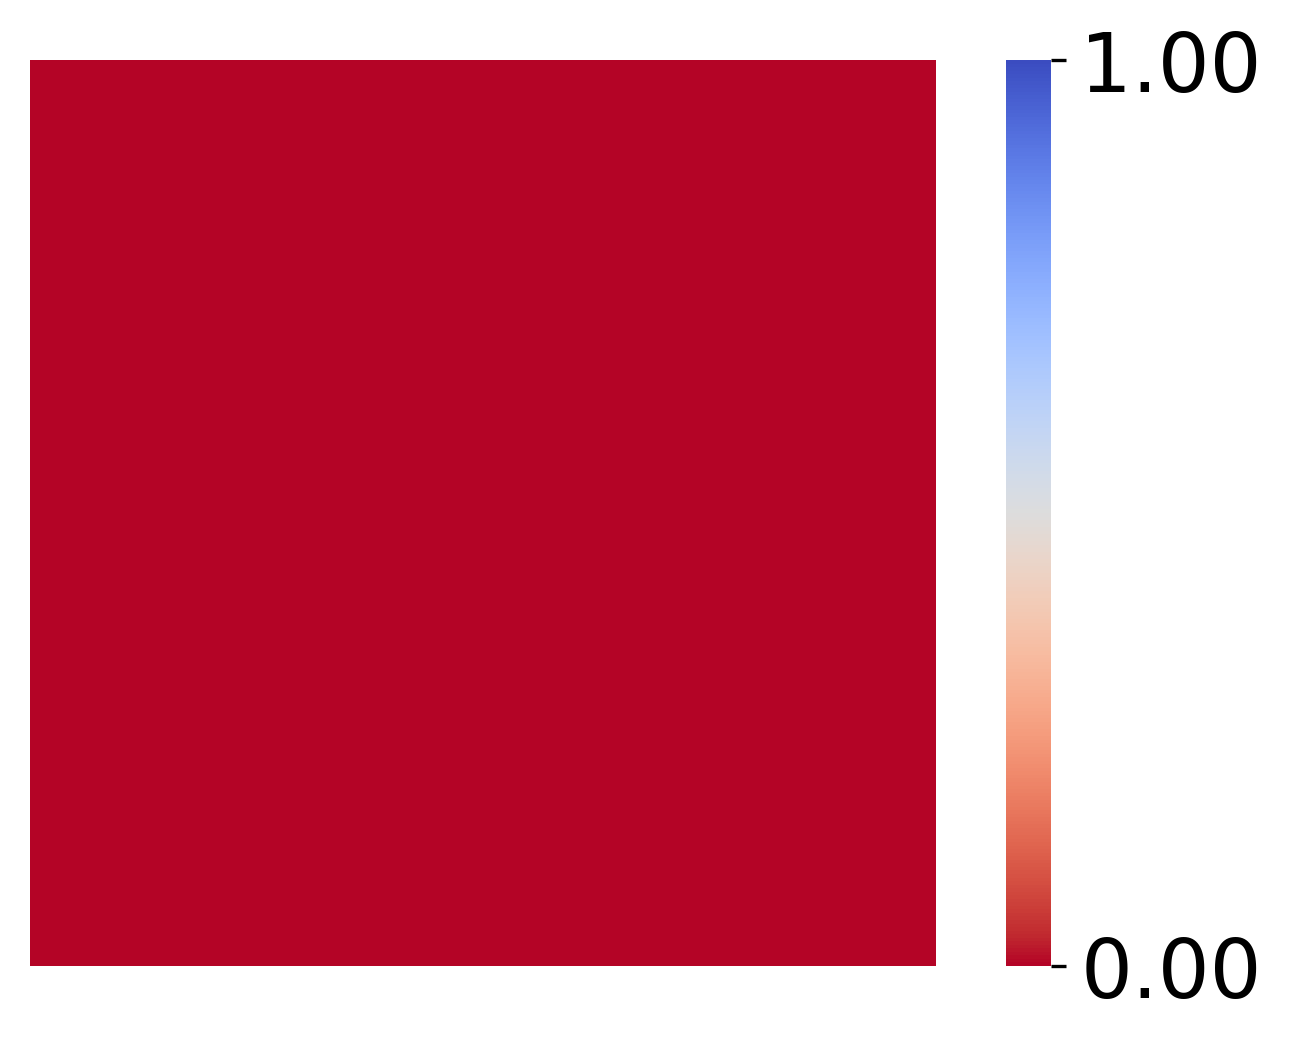

In [297]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes'], df['n_observes'], df['effs'], df['effs'], col1name = 'Observes', col2name='Observes', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [298]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_humans.svg'))

### Trait-level Simulations

In [299]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)

(150, 9)


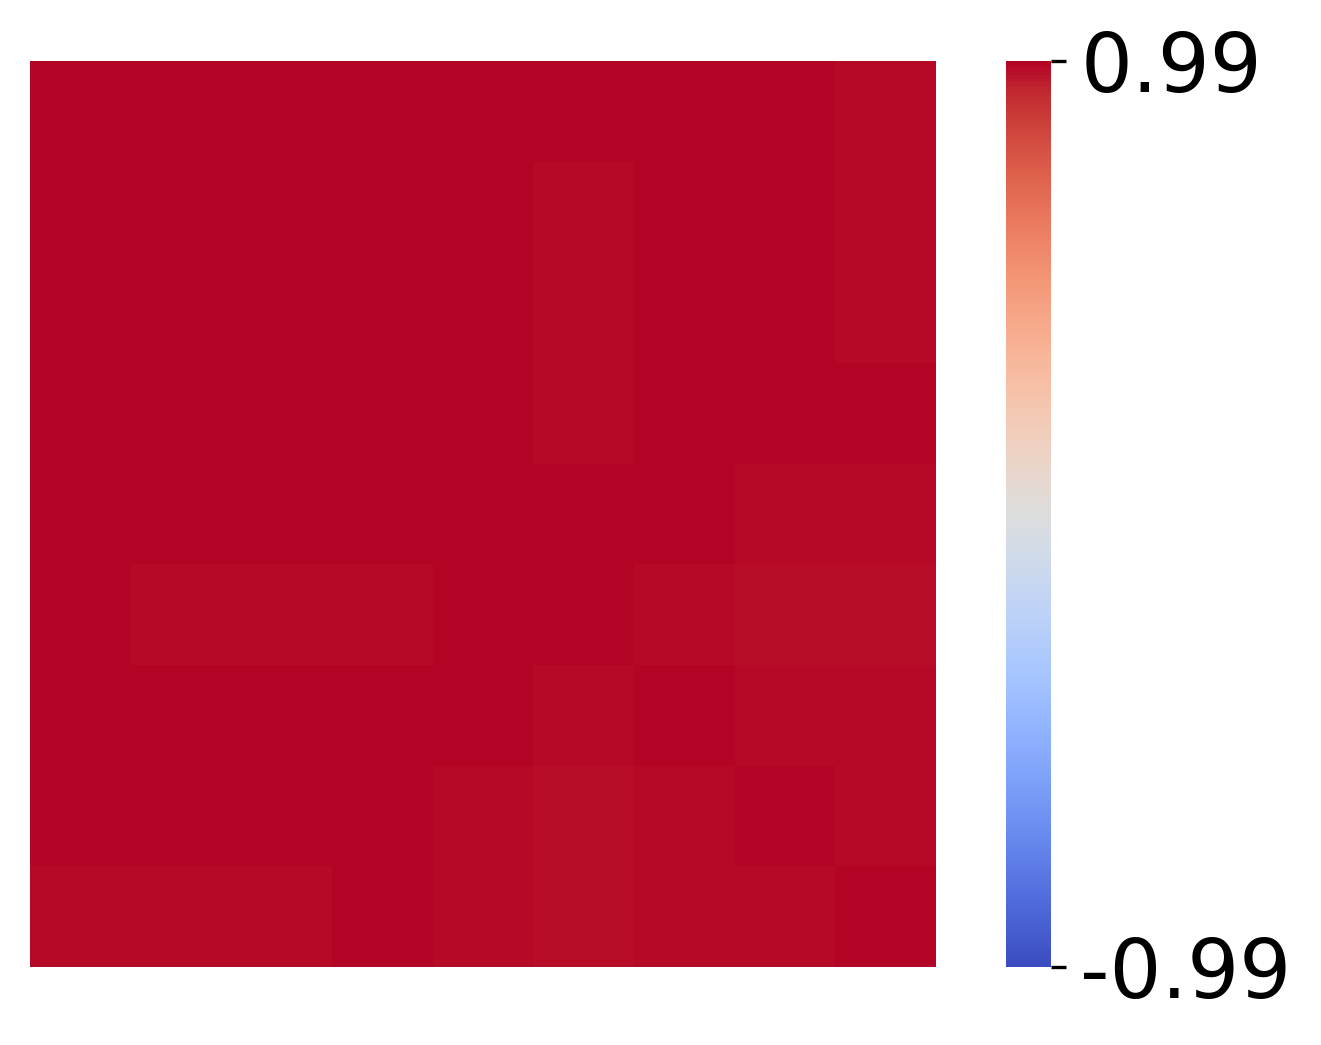

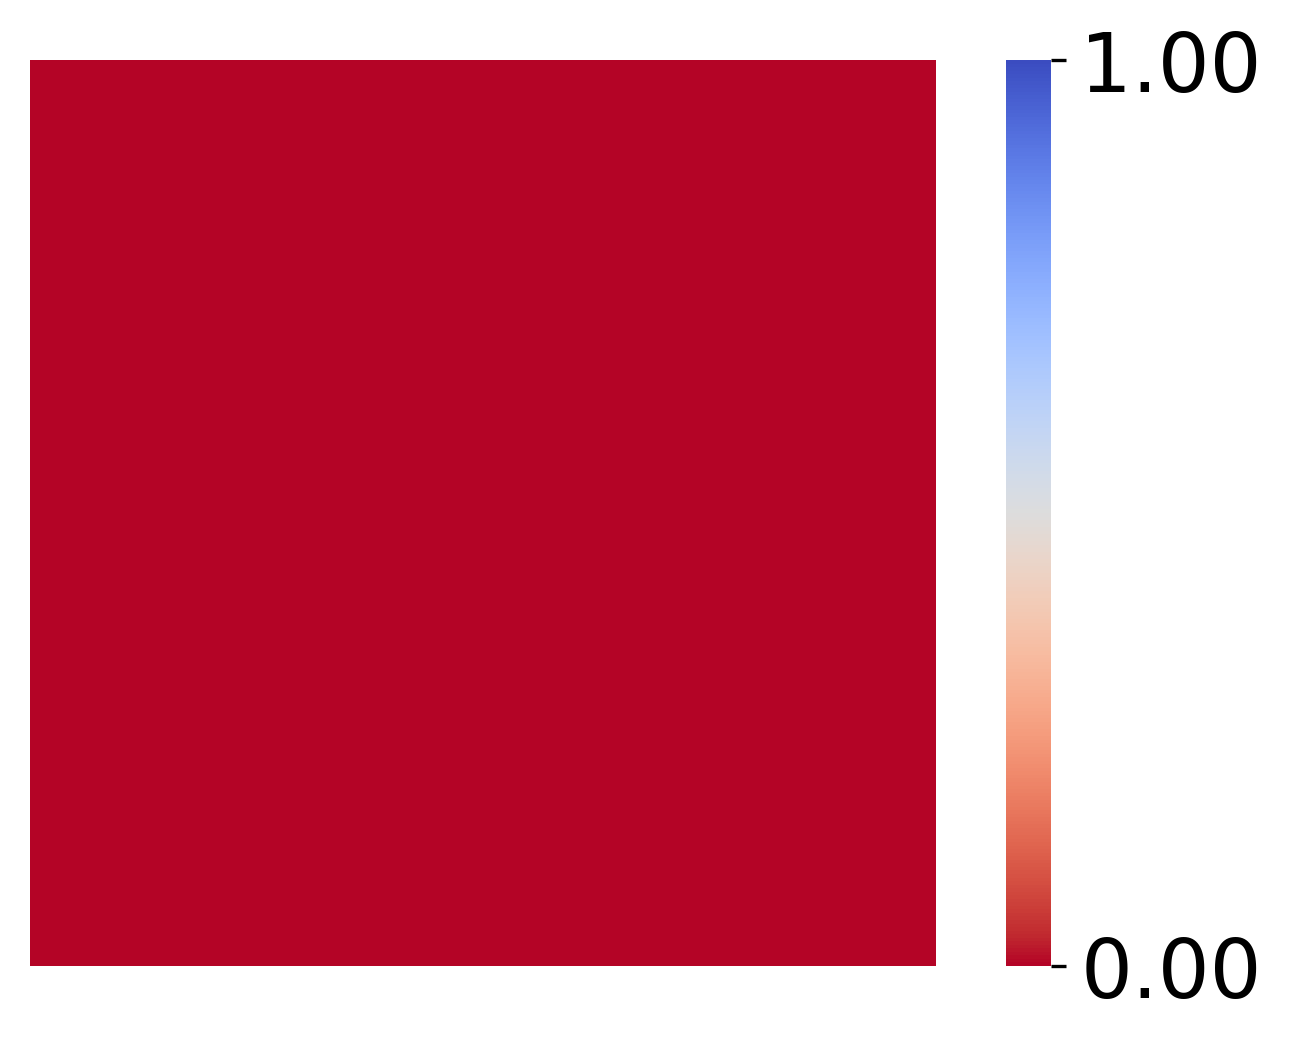

In [300]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(sim_obss, sim_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [301]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_trait.svg'))

### Random Perturbations

In [302]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


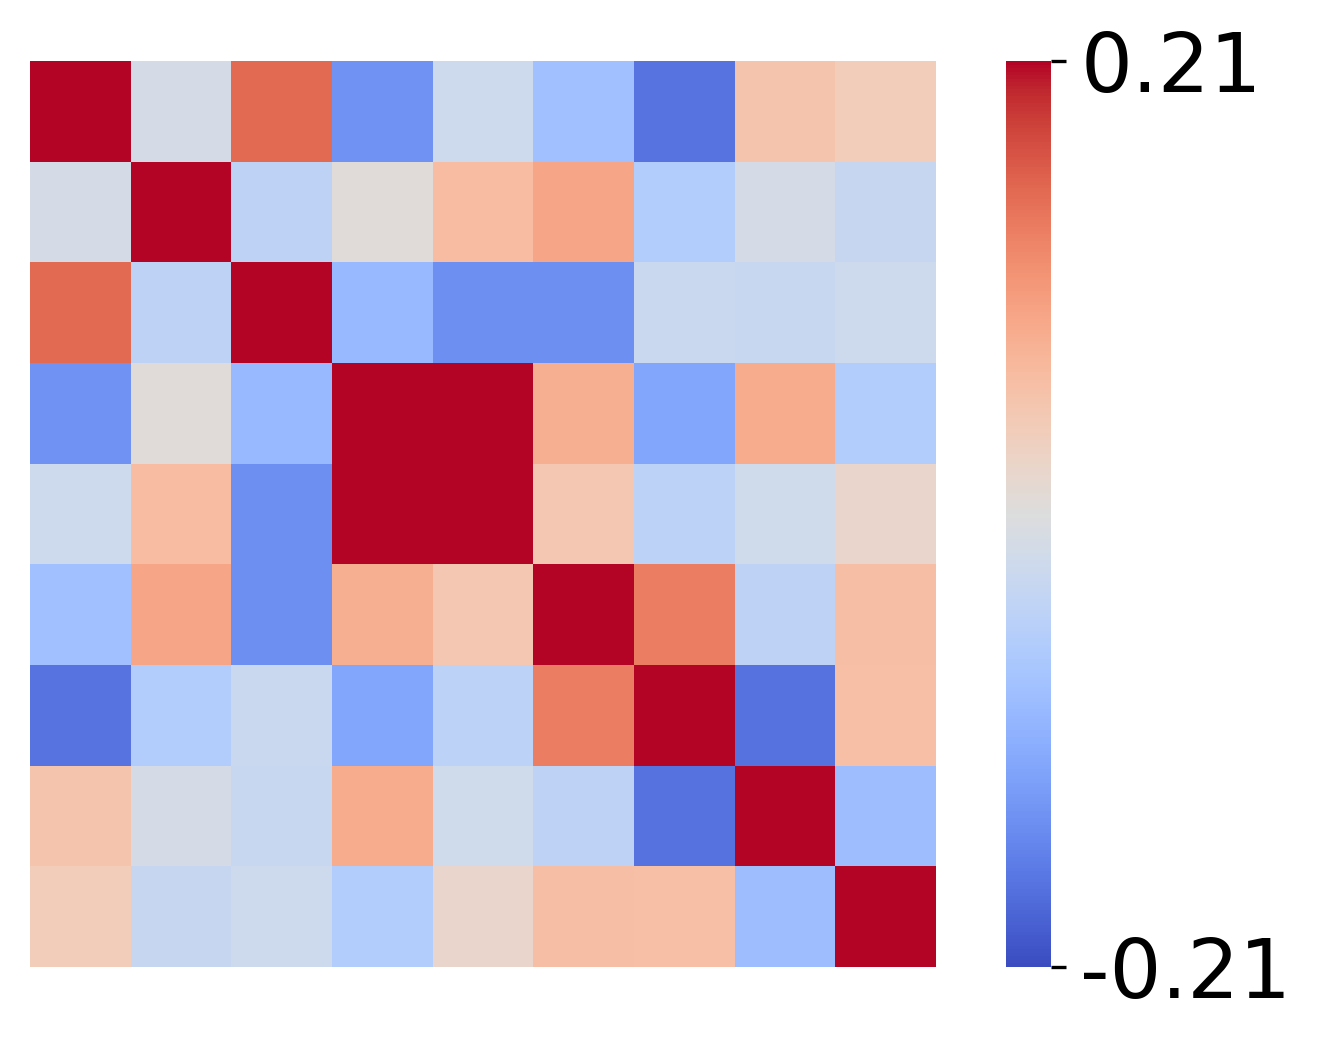

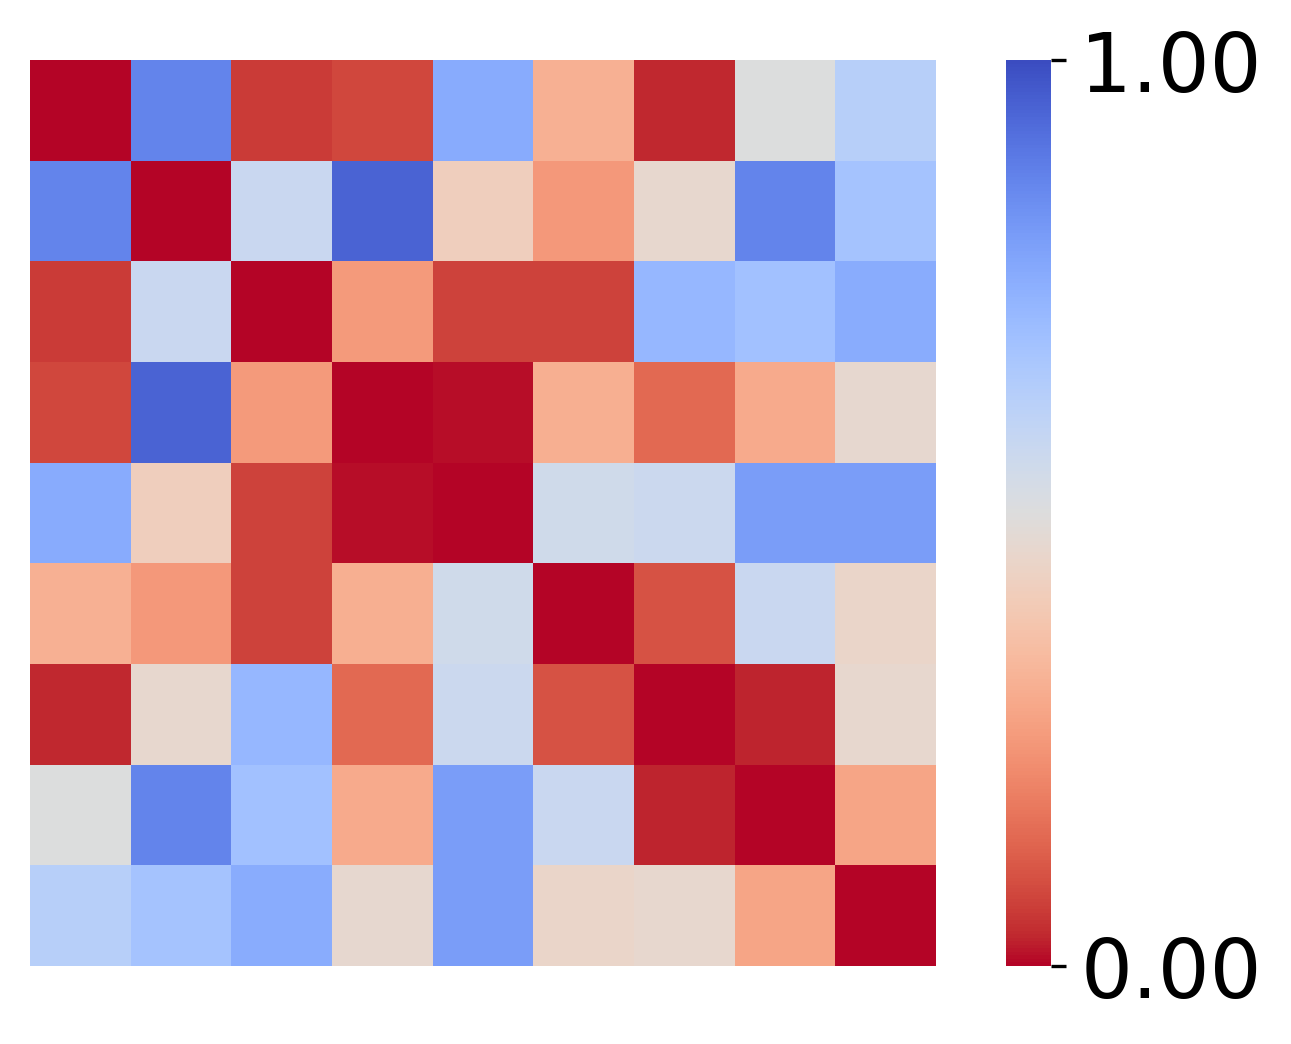

In [303]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_obss, random_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [304]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_random.svg'))

### Zeros Perturbations

In [305]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


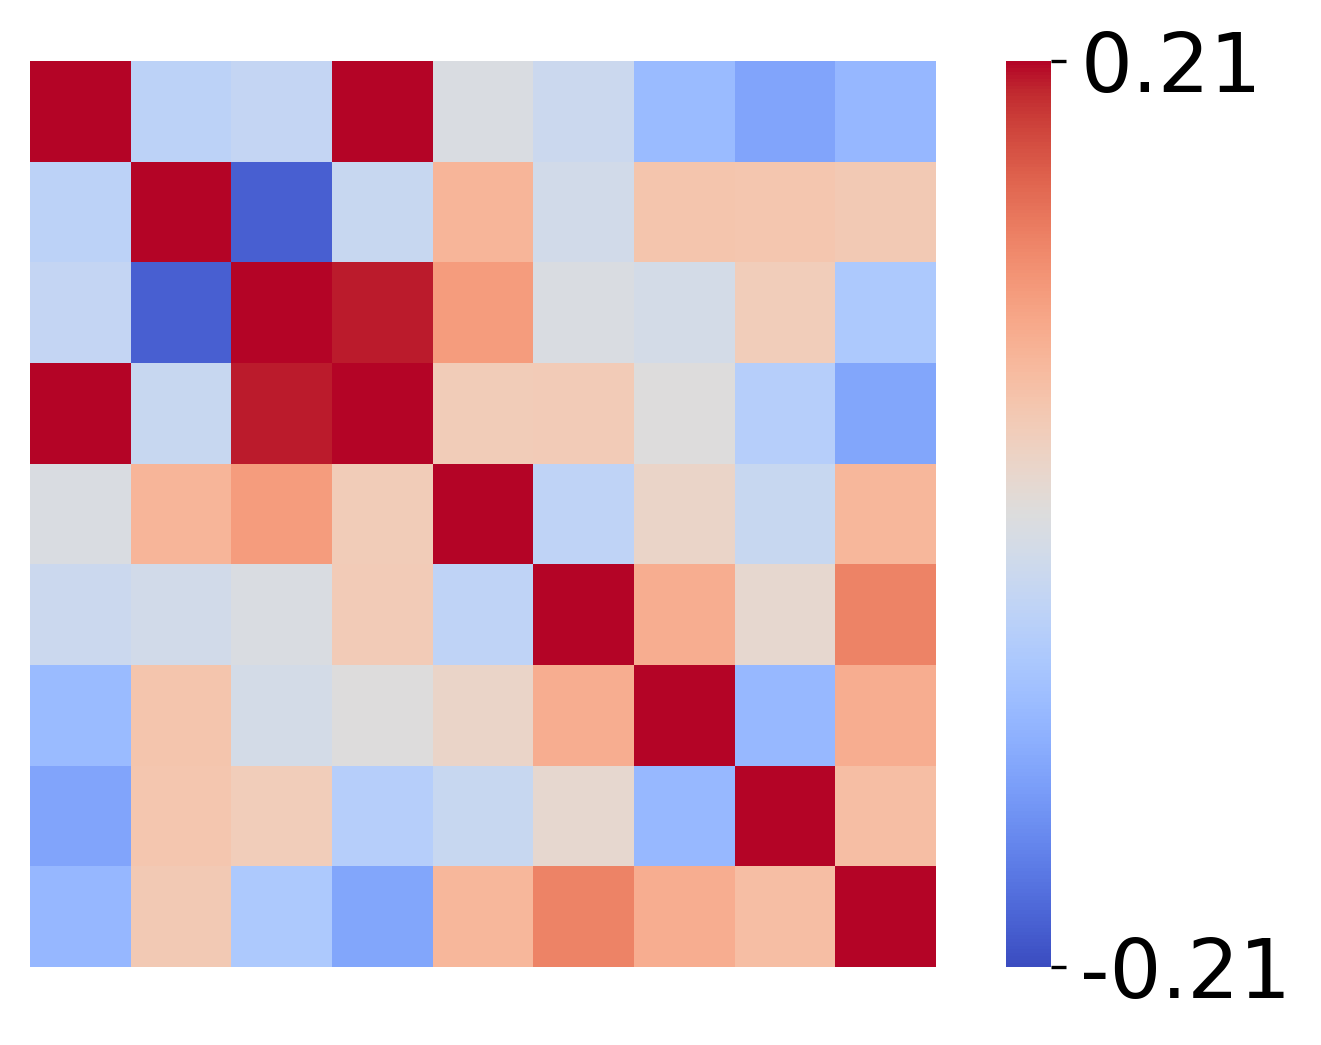

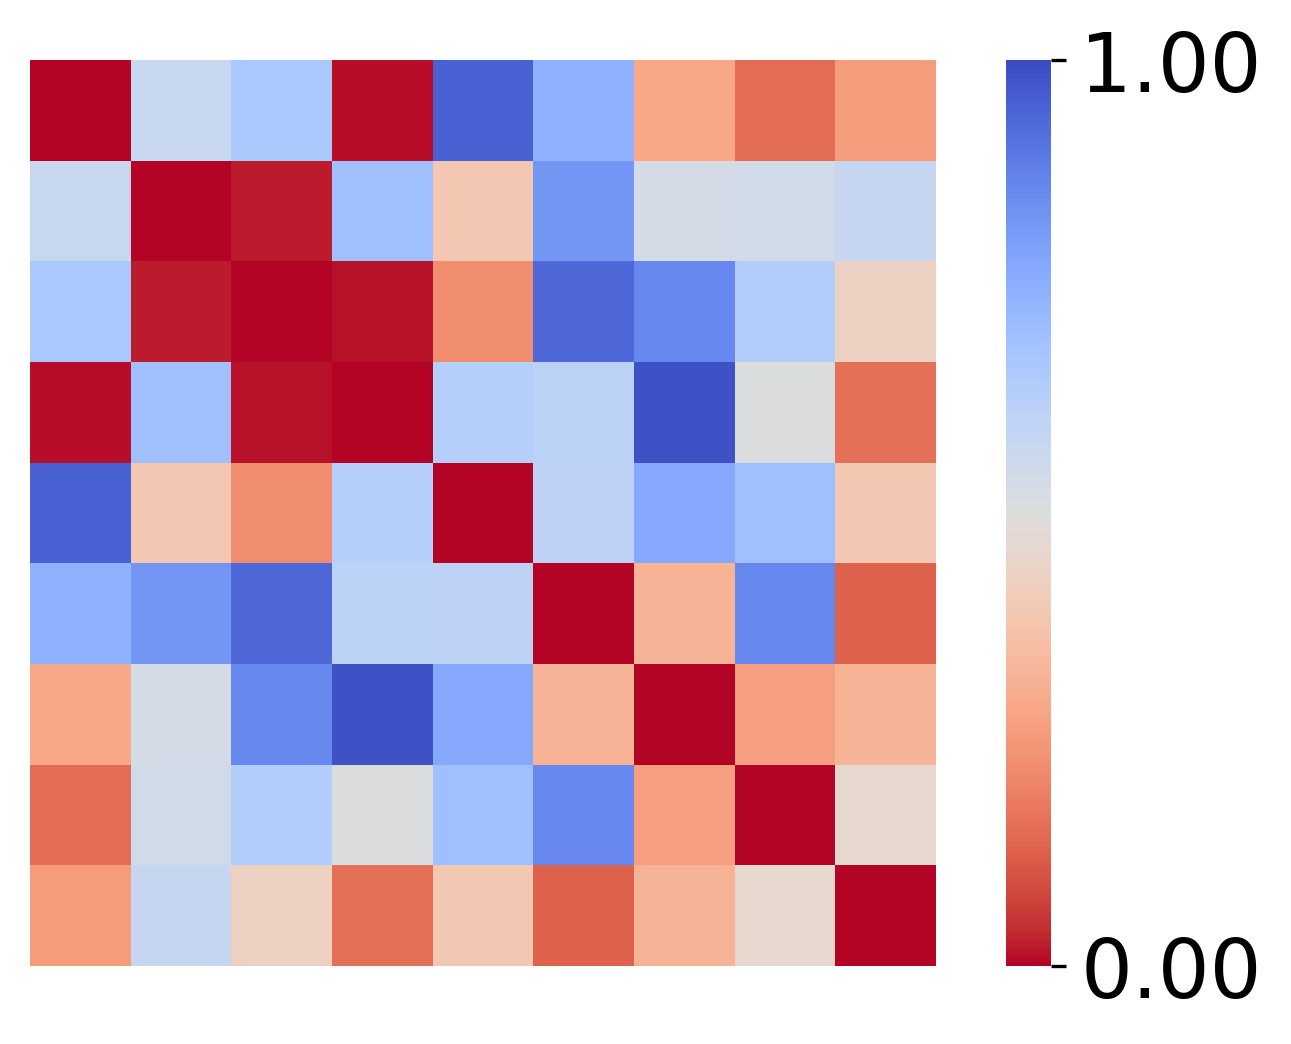

In [306]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_obss, zeros_obss, effs, effs, "Observations", "Observations", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [307]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_observes_zeros.svg'))

### Stats

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_obs_corr = data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr =data_rews_corr_g1
data_rews_pvs =data_rews_pvs_g1

data_sleeps_corr =data_sleeps_corr_g1
data_sleeps_pvs = data_sleeps_pvs_g1


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)


(86, 9)
(96, 9)
(86, 9)
(96, 9)
(86, 9)
(96, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [ ]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_obs_corr), [upper_tri_masking(sim_obs_corr), upper_tri_masking(random_obs_corr)], do_fisher_transform=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.543
Date:                Fri, 31 May 2024   Prob (F-statistic):             0.0940
Time:                        14:26:21   Log-Likelihood:                 14.696
No. Observations:                  36   AIC:                            -23.39
Df Residuals:                      33   BIC:                            -18.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3234      0.561      4.141      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(sim_obs_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_obs_corr).reshape((1,-1)), upper_tri_masking(random_obs_corr).reshape((1,-1)))[0][0])

0.9989915881153458
-0.14308611255384227


## Panel E: Task 2 Rewards
### Humans

In [308]:
from human_utils_project import get_clean_data

day = 'day3'

group = None

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

effs = np.arange(0, 1.01, 0.125)
n_steps = 50

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False


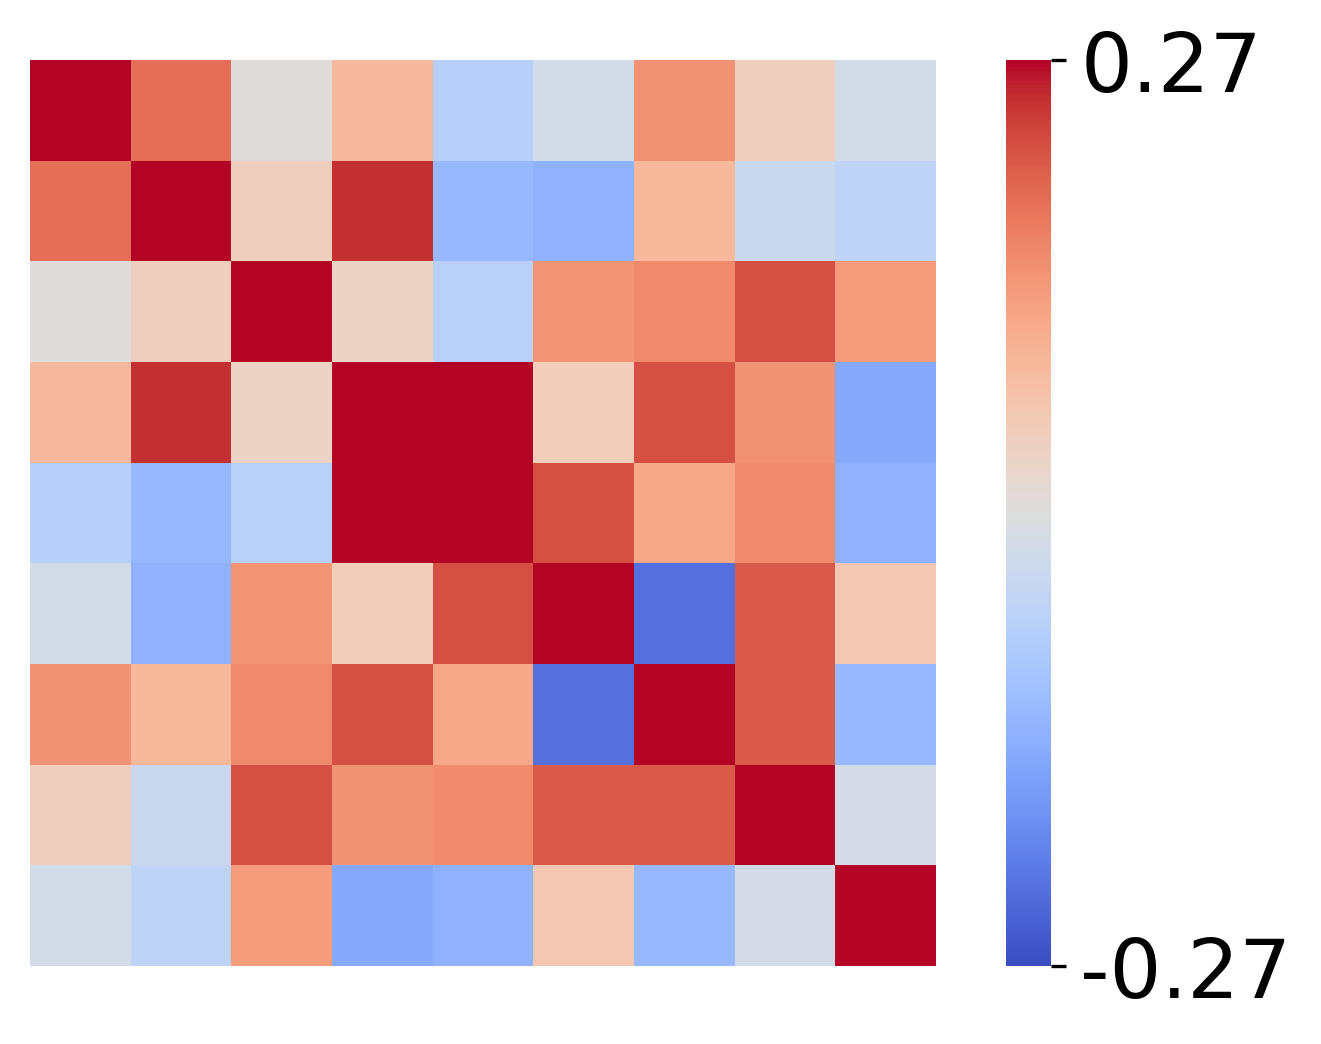

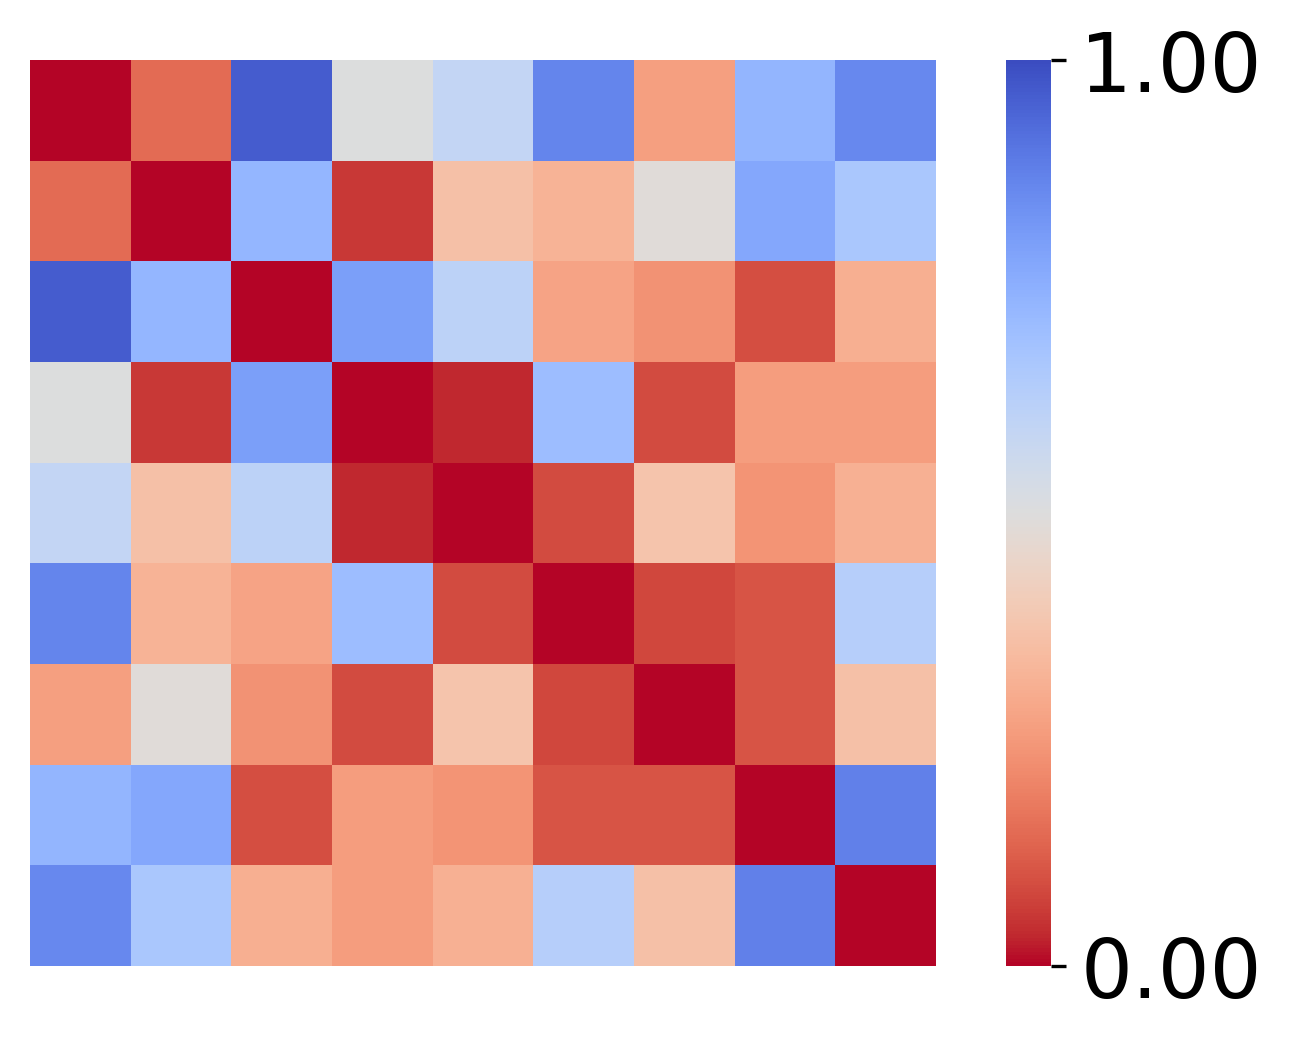

In [309]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies'], df['rewards_tallies'], df['effs'], df['effs'], col1name = 'Rewards', col2name='Rewards', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [310]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_humans.svg'))

### Trait-Level Perturbations

In [311]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss = np.flip(sim_rewss.T, axis=1)
sim_obss = np.flip(sim_obss.T, axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)

(150, 9)


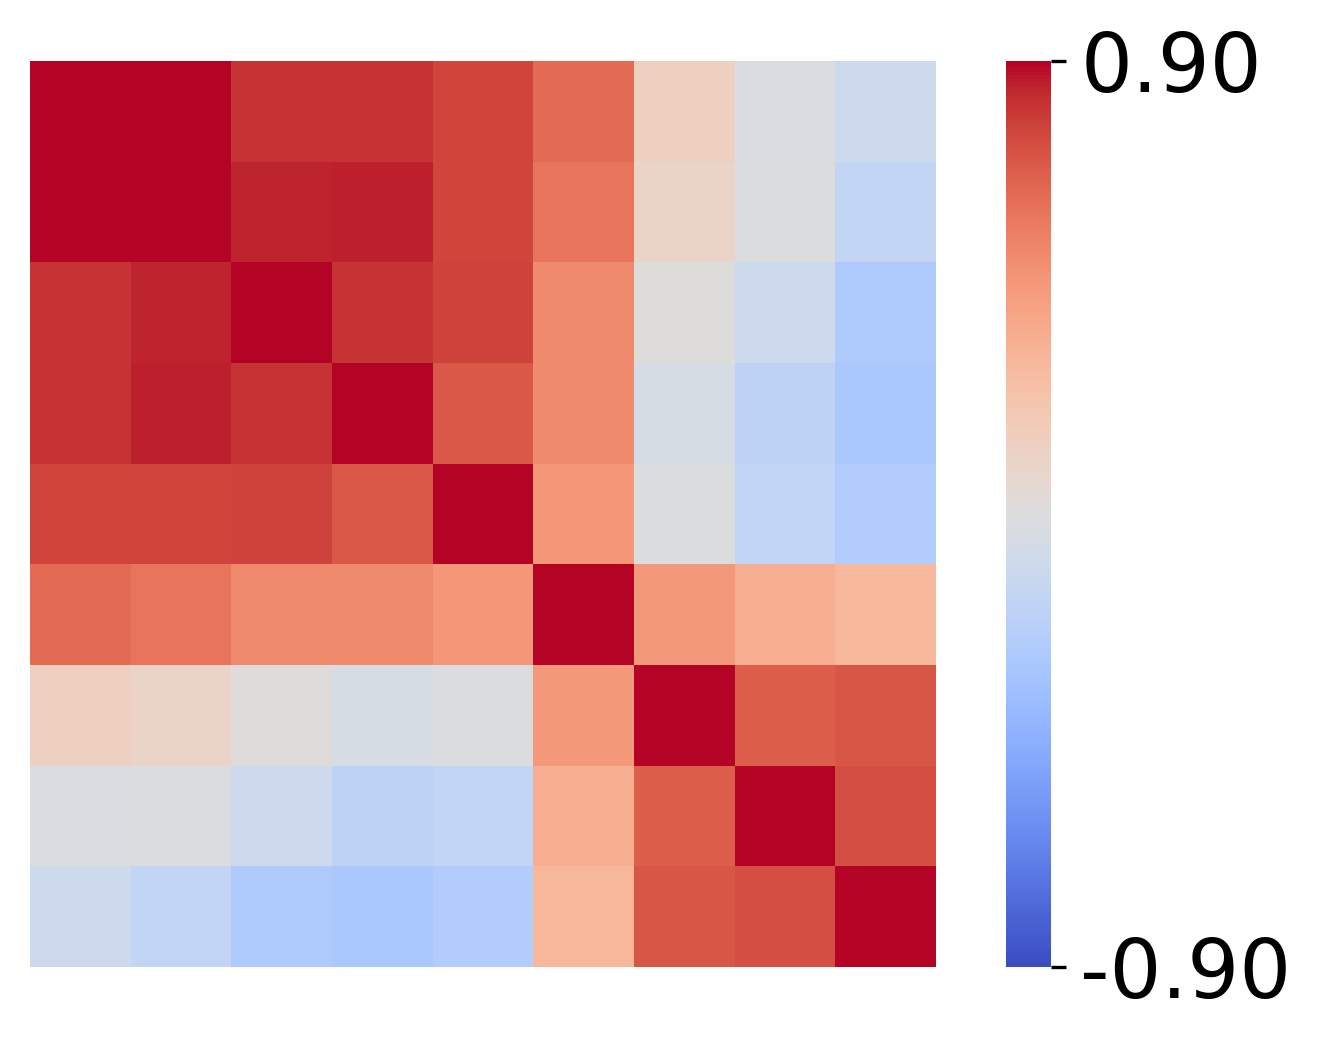

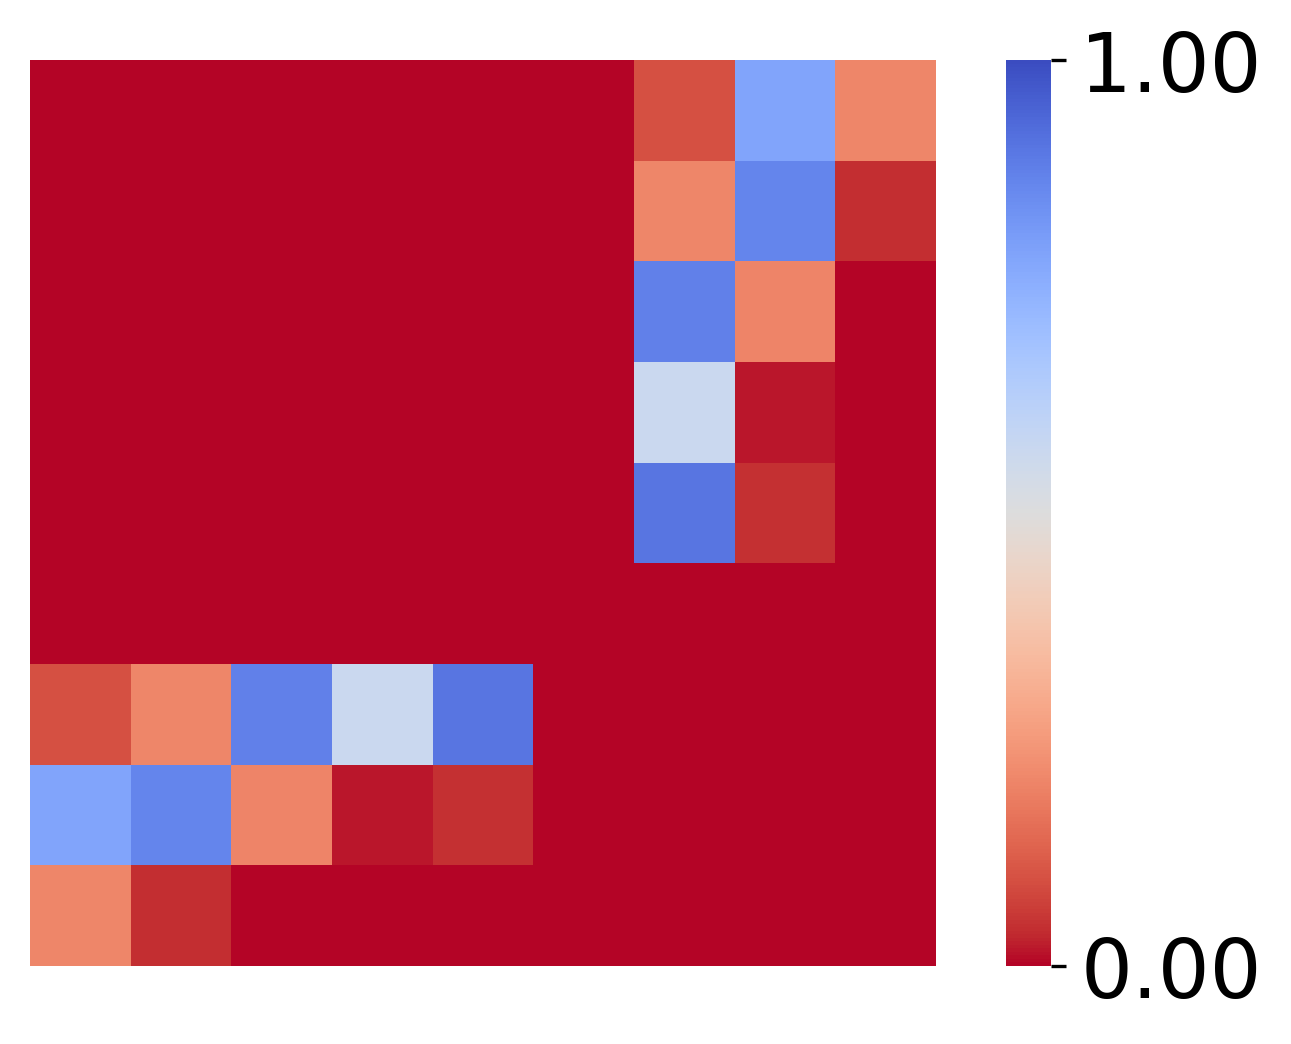

In [312]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(sim_rewss, sim_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [313]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_trait.svg'))

### Random Perturbations

In [314]:
from settings_anal import levc_human_ape_models as ape_models
from human_utils_behavioral_analysis import load_simulated_participants_across_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss, random_obss, random_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

random_rewss = random_rewss.mean(axis=0)
random_obss = random_obss.mean(axis=0)
random_sleepss = random_sleepss.mean(axis=0)


## correcting for switching from tau to efficacy
random_rewss = np.flip(random_rewss.T, axis=1)
random_obss = np.flip(random_obss.T, axis=1)
random_sleepss = np.flip(random_sleepss.T, axis=1)

(150, 9)


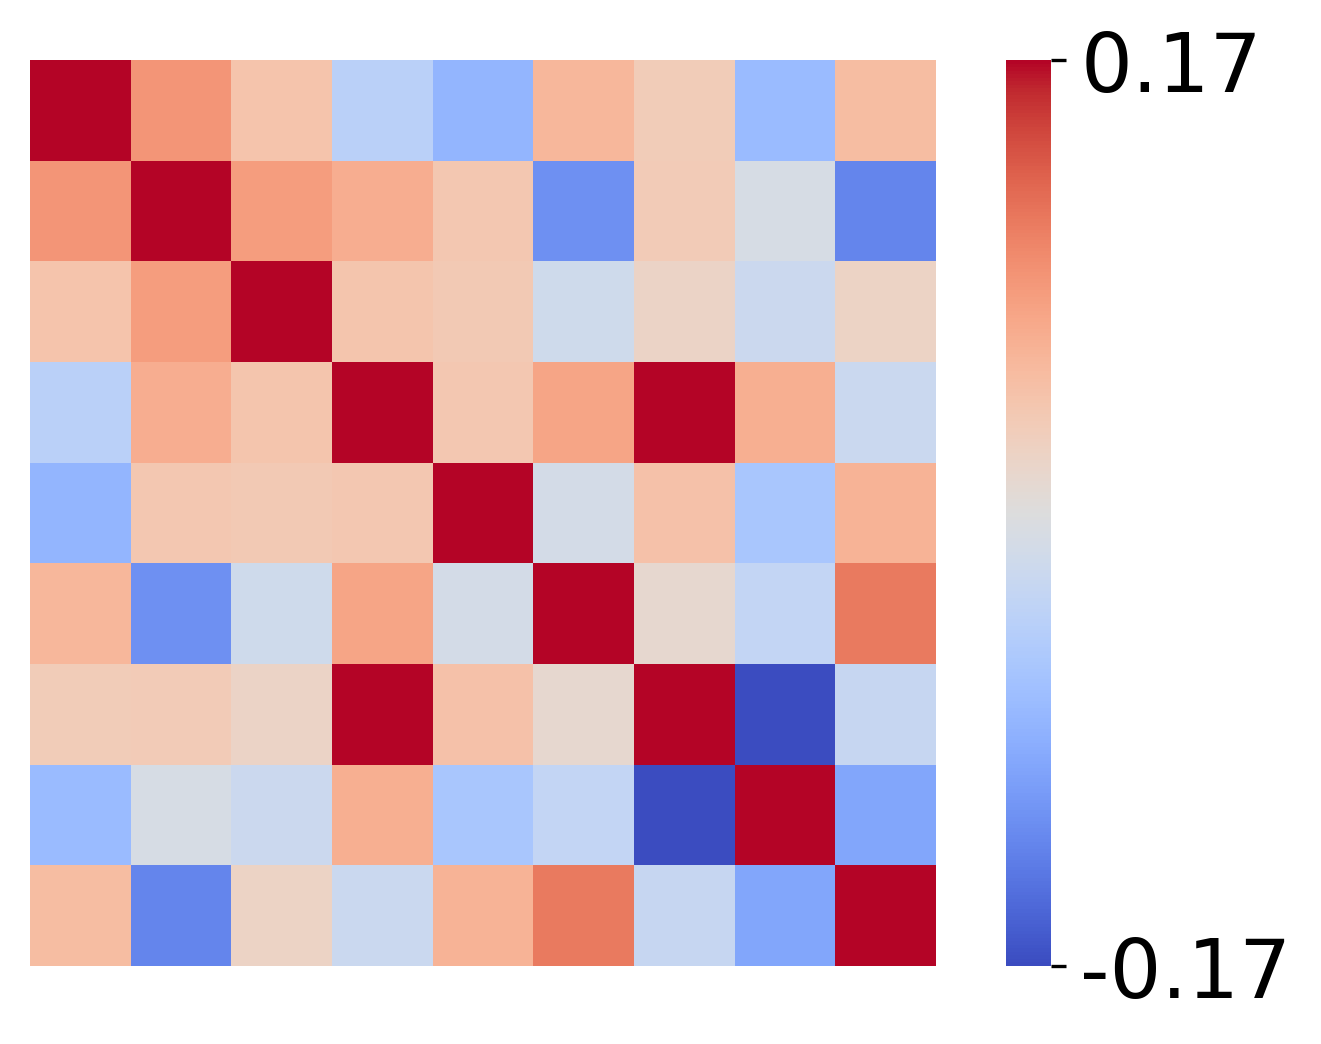

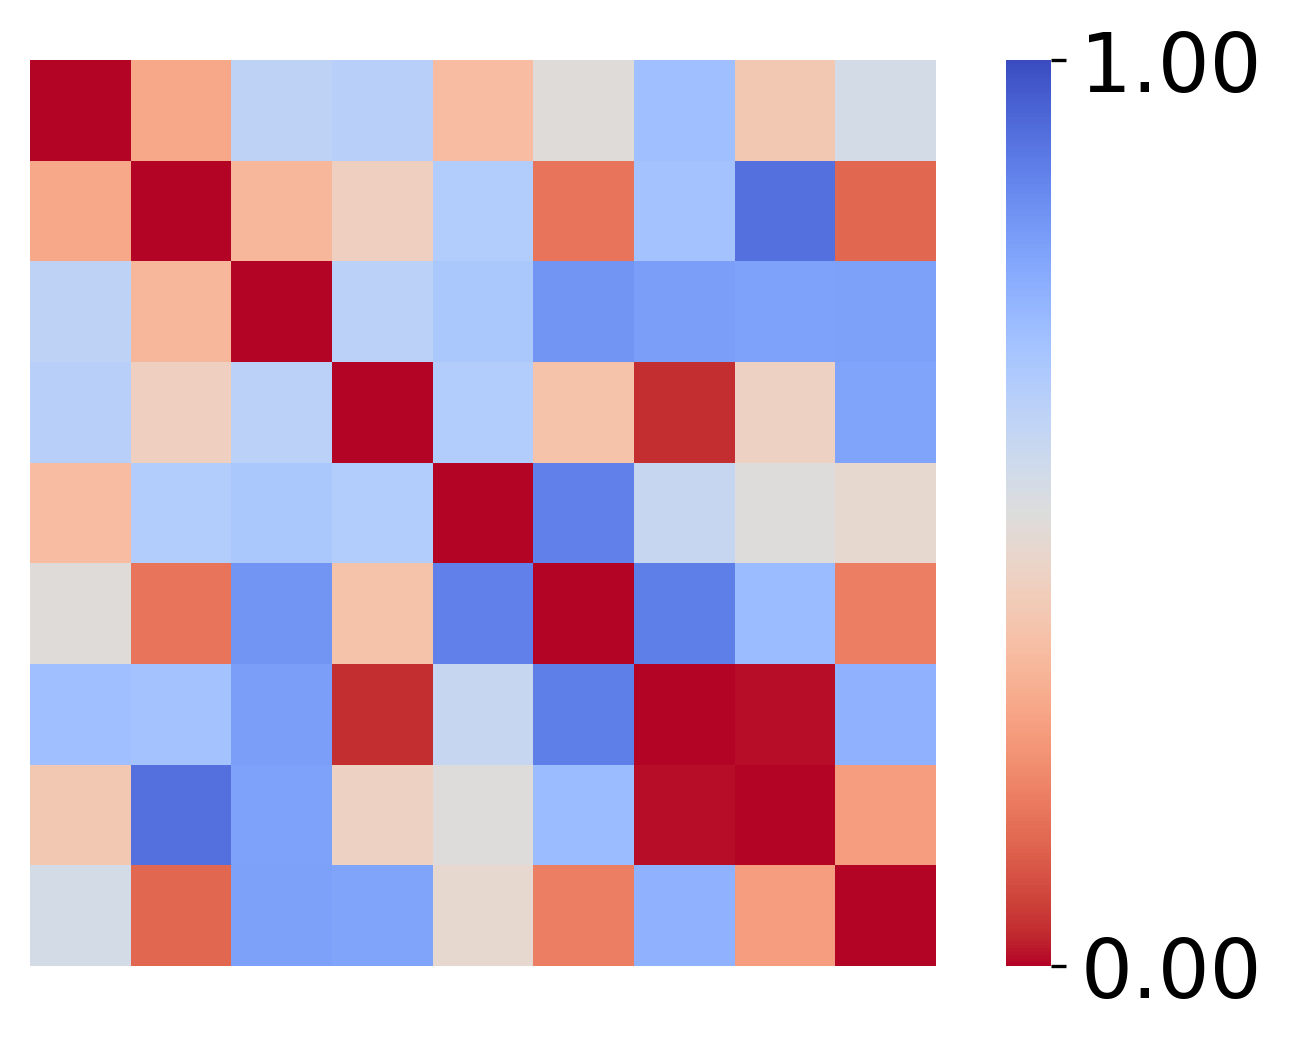

In [315]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(random_rewss, random_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)


In [316]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_random.svg'))

### Zeros Perturbations

In [317]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

zeros_rewss, zeros_obss, zeros_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

zeros_rewss = zeros_rewss.mean(axis=0)
zeros_obss = zeros_obss.mean(axis=0)
zeros_sleepss = zeros_sleepss.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss = np.flip(zeros_rewss.T, axis=1)
zeros_obss = np.flip(zeros_obss.T, axis=1)
zeros_sleepss = np.flip(zeros_sleepss.T, axis=1)

effs = np.arange(0, 1.125, 0.125)

(150, 9)


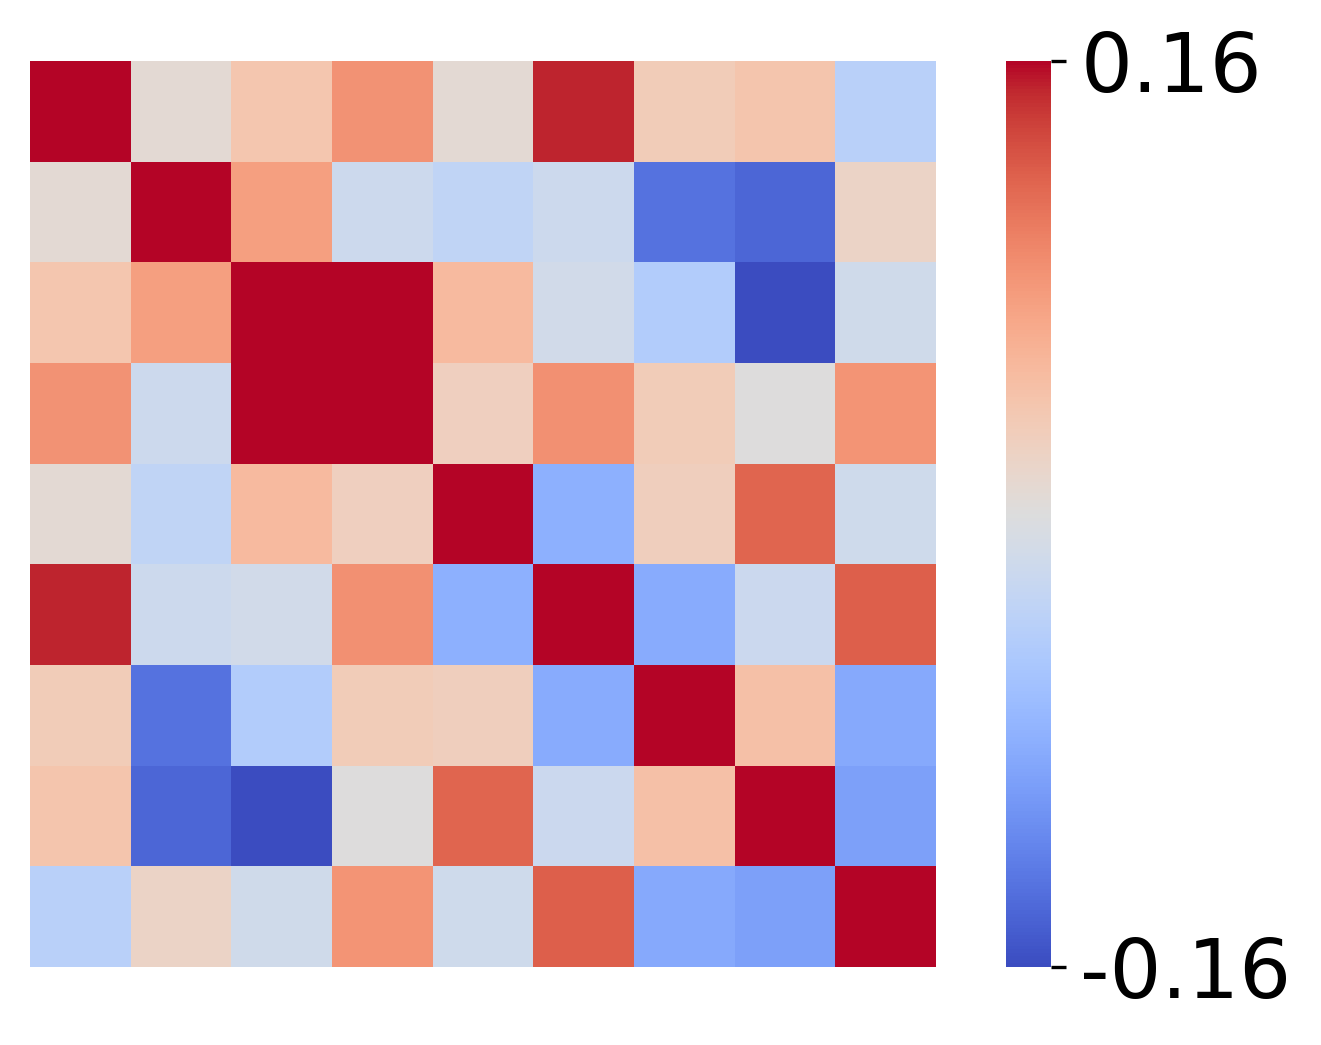

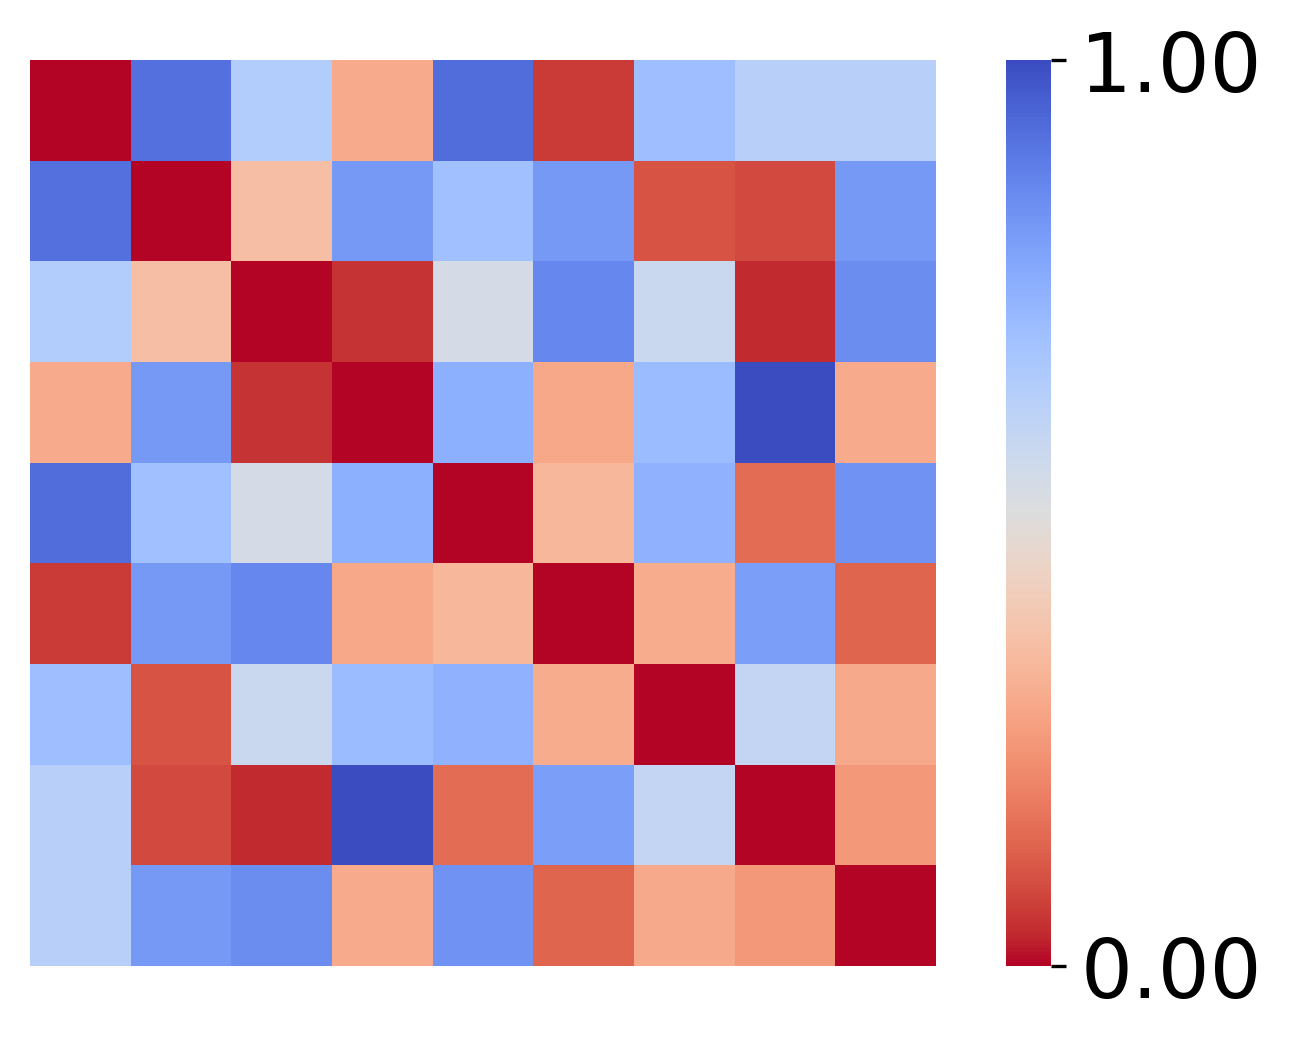

In [318]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(zeros_rewss, zeros_rewss, effs, effs, "Rewards", "Rewards", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)


In [319]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_task2_rewards_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_task2_rewards_zeros.svg'))

### Stats

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_obs_corr = data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr =data_rews_corr_g1
data_rews_pvs =data_rews_pvs_g1

data_sleeps_corr =data_sleeps_corr_g1
data_sleeps_pvs = data_sleeps_pvs_g1


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)


(86, 9)
(96, 9)
(86, 9)
(96, 9)
(86, 9)
(96, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)
(150, 9)


In [ ]:
from human_utils_behavioral_analysis import competitive_corr_regression, upper_tri_masking

competitive_corr_regression(upper_tri_masking(data_rews_corr), [upper_tri_masking(sim_rews_corr), upper_tri_masking(random_rews_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.2226
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.802
Time:                        14:26:26   Log-Likelihood:                 29.741
No. Observations:                  36   AIC:                            -53.48
Df Residuals:                      33   BIC:                            -48.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1636      0.024      6.690      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(sim_rews_corr).reshape((1,-1)))[0][0])
print(cosine_similarity(upper_tri_masking(data_rews_corr).reshape((1,-1)), upper_tri_masking(random_rews_corr).reshape((1,-1)))[0][0])

0.5766616289236637
0.19588577610388208


## Panel F: Across-Tasks Behavior Sleep / Observes
### Humans

In [320]:
from human_utils_project import get_clean_data
day = 'day3'

group = "groupA"

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='inner', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  60 -0.146368  [-0.39, 0.11]  0.268644
          n         r          CI95%     p-val
pearson  60 -0.038863  [-0.29, 0.22]  0.770109
          n         r          CI95%     p-val
pearson  60 -0.143395  [-0.39, 0.12]  0.278593
          n         r          CI95%     p-val
pearson  60 -0.170398  [-0.41, 0.09]  0.196945
          n         r          CI95%     p-val
pearson  60 -0.212098  [-0.44, 0.05]  0.106809
          n         r         CI95%     p-val
pearson  60 -0.044667  [-0.3, 0.21]  0.736933
          n         r           CI95%     p-val
pearson  60 -0.319676  [-0.53, -0.07]  0.013584
          n         r          CI95%     p-val
pearson  60 -0.150538  [-0.39, 0.11]  0.255094
          n         r          CI95%     p-val
pearson  60 -0.137538  [-0.38, 0.12]  0.298903
          n        r          CI95%     p-val
pearson  60 -0.22169  [-0.45, 0.04]  0.091513
          n         r         CI95%     p-val
pearson  60 -0.1

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  60 -0.194568  [-0.43, 0.06]  0.139761
          n         r          CI95%     p-val
pearson  60  0.081624  [-0.18, 0.33]  0.538833
          n         r           CI95%     p-val
pearson  60 -0.265379  [-0.49, -0.01]  0.042216
          n         r          CI95%     p-val
pearson  60 -0.092735  [-0.34, 0.17]  0.484815
          n         r          CI95%    p-val
pearson  60  0.099492  [-0.16, 0.35]  0.45342
          n        r          CI95%     p-val
pearson  60 -0.00522  [-0.26, 0.25]  0.968699
          n         r          CI95%     p-val
pearson  60  0.017809  [-0.24, 0.27]  0.893498
          n         r          CI95%    p-val
pearson  60 -0.001424  [-0.26, 0.25]  0.99146
          n         r          CI95%     p-val
pearson  60 -0.082664  [-0.33, 0.18]  0.533653
          n         r          CI95%     p-val
pearson  60  0.108317  [-0.15, 0.35]  0.414153
          n         r          CI95%    p-val
pearson  60  0.067

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

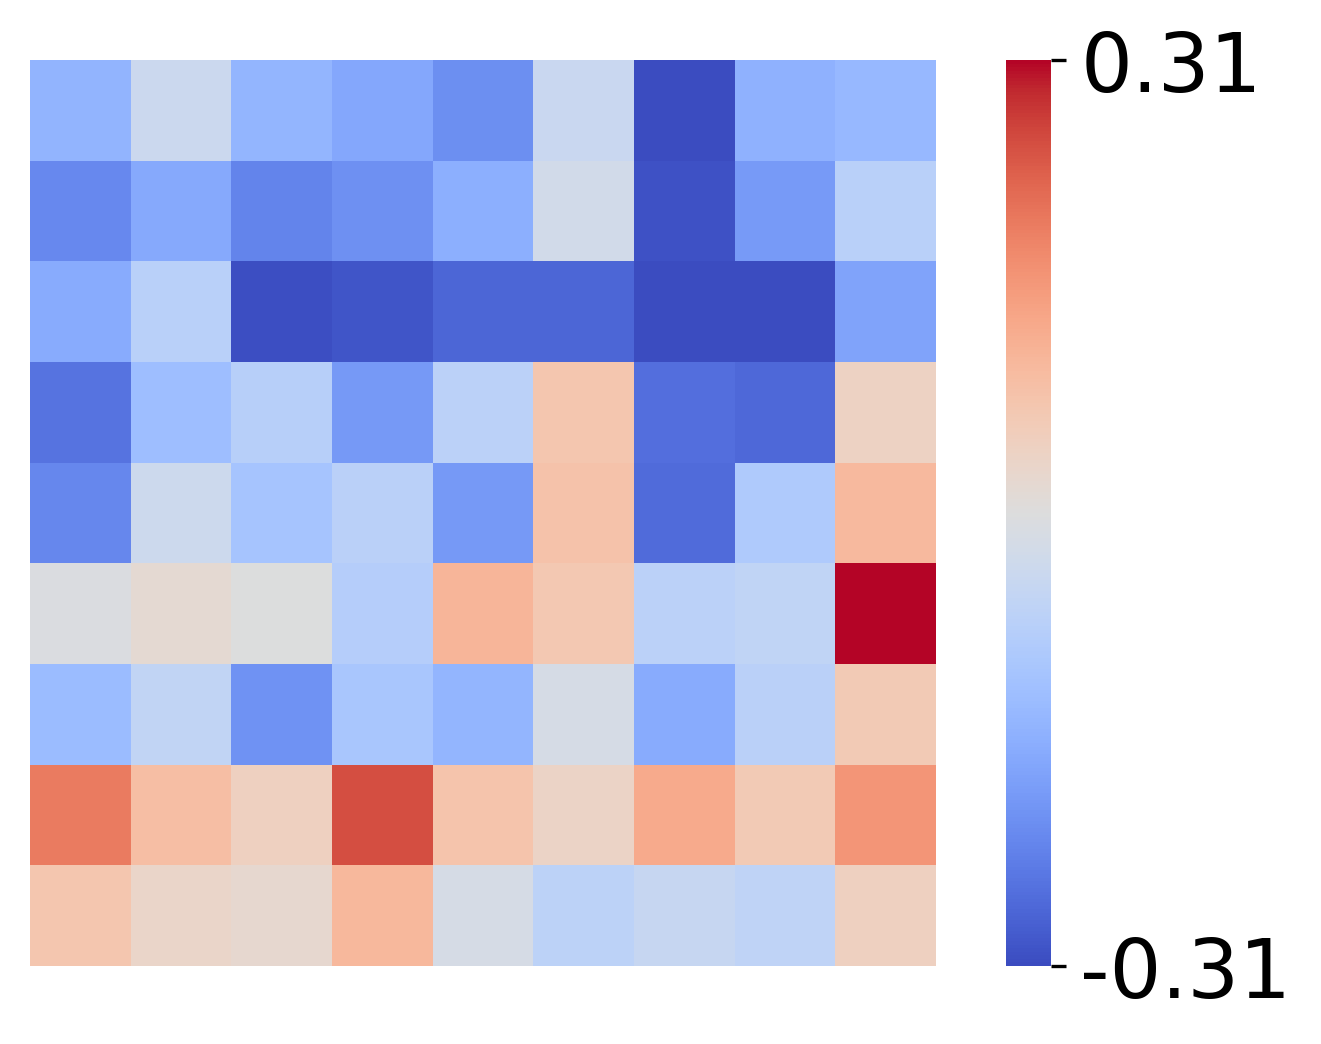

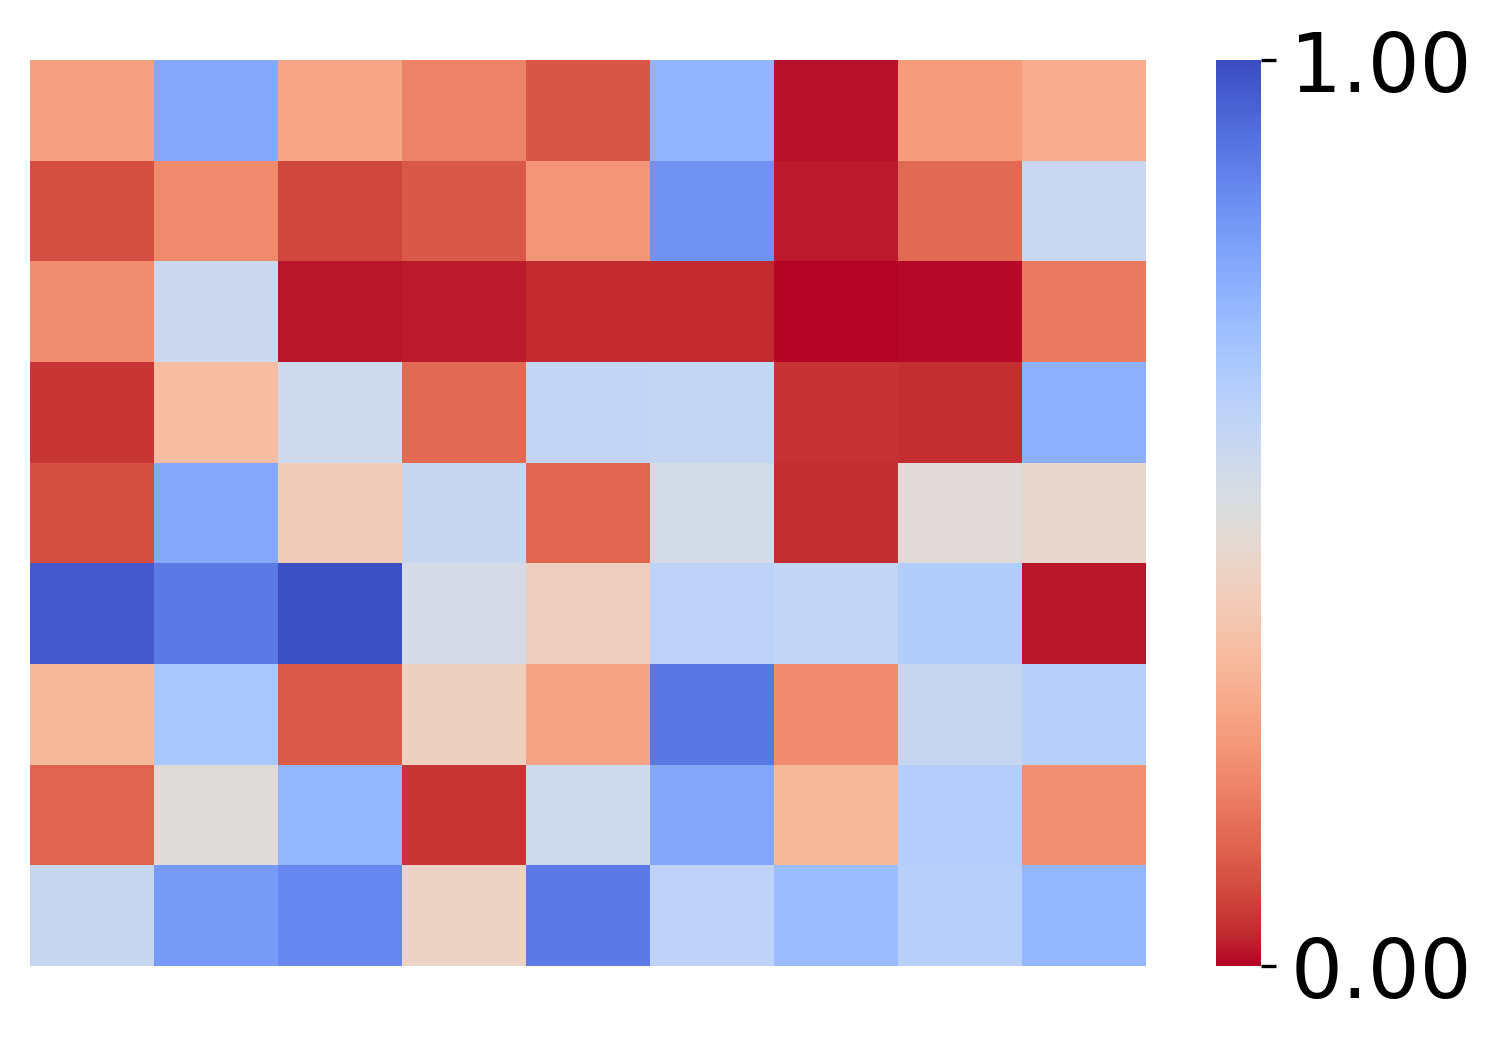

In [321]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation, compute_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(df['n_observes_day2'], df['n_sleeps_day3'], df['n_observes_day3'], df['effs_day2'], df['effs_day3'], df['effs_day3'], semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(df['n_observes_day2'], df['n_sleeps_day3'], df['effs_day2'], df['effs_day3'], col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, groups=df['group_day1'])


In [322]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.svg'))

### Trait-Level Perturbations

In [323]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs_sorted = effs = np.arange(0, 1.01, 0.125)

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r       CI95%         p-val
pearson  150  0.609794  [0.5, 0.7]  1.532026e-16
           n         r         CI95%         p-val
pearson  150  0.621243  [0.51, 0.71]  2.838481e-17
           n         r         CI95%         p-val
pearson  150  0.601038  [0.49, 0.69]  5.316430e-16
           n         r         CI95%         p-val
pearson  150  0.450248  [0.31, 0.57]  8.347274e-09
           n         r          CI95%     p-val
pearson  150  0.051702  [-0.11, 0.21]  0.531175
           n       r           CI95%         p-val
pearson  150 -0.4051  [-0.53, -0.26]  2.980774e-07
           n         r           CI95%         p-val
pearson  150 -0.712272  [-0.78, -0.62]  2.316684e-24
           n         r           CI95%         p-val
pearson  150 -0.881342  [-0.91, -0.84]  1.013275e-49
           n         r         CI95%         p-val
pearson  150  0.497916  

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r           CI95%         p-val
pearson  150 -0.415791  [-0.54, -0.27]  1.339291e-07
           n         r           CI95%         p-val
pearson  150 -0.540412  [-0.65, -0.42]  1.130874e-12
           n         r         CI95%     p-val
pearson  150  0.217689  [0.06, 0.37]  0.007655
           n         r         CI95%     p-val
pearson  150  0.191498  [0.03, 0.34]  0.019307
           n         r          CI95%    p-val
pearson  150  0.125162  [-0.04, 0.28]  0.12828
           n         r          CI95%     p-val
pearson  150 -0.001271  [-0.16, 0.16]  0.987722
           n         r           CI95%     p-val
pearson  150 -0.192891  [-0.34, -0.03]  0.018429
           n         r           CI95%     p-val
pearson  150 -0.388091  [-0.52, -0.24]  0.000001
           n         r          CI95%         p-val
pearson  150 -0.480599  [-0.6, -0.35]  5.535389e-10
           n         r          CI95%         p-val
pearson  150 -0.522772  [-0.63, -0.4]  7.976333e-12
      

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

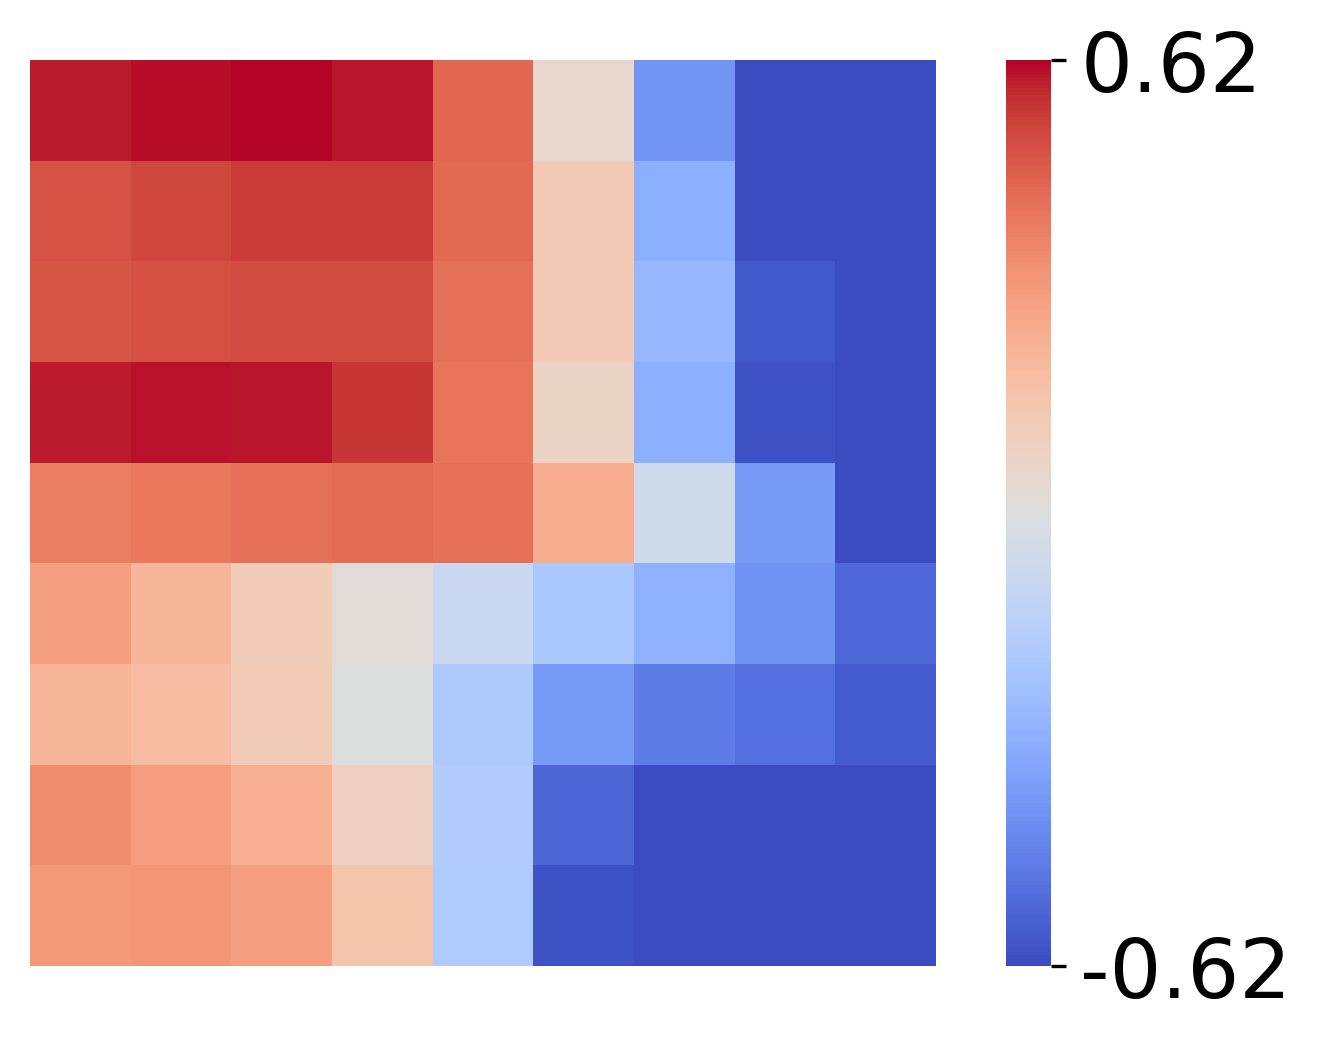

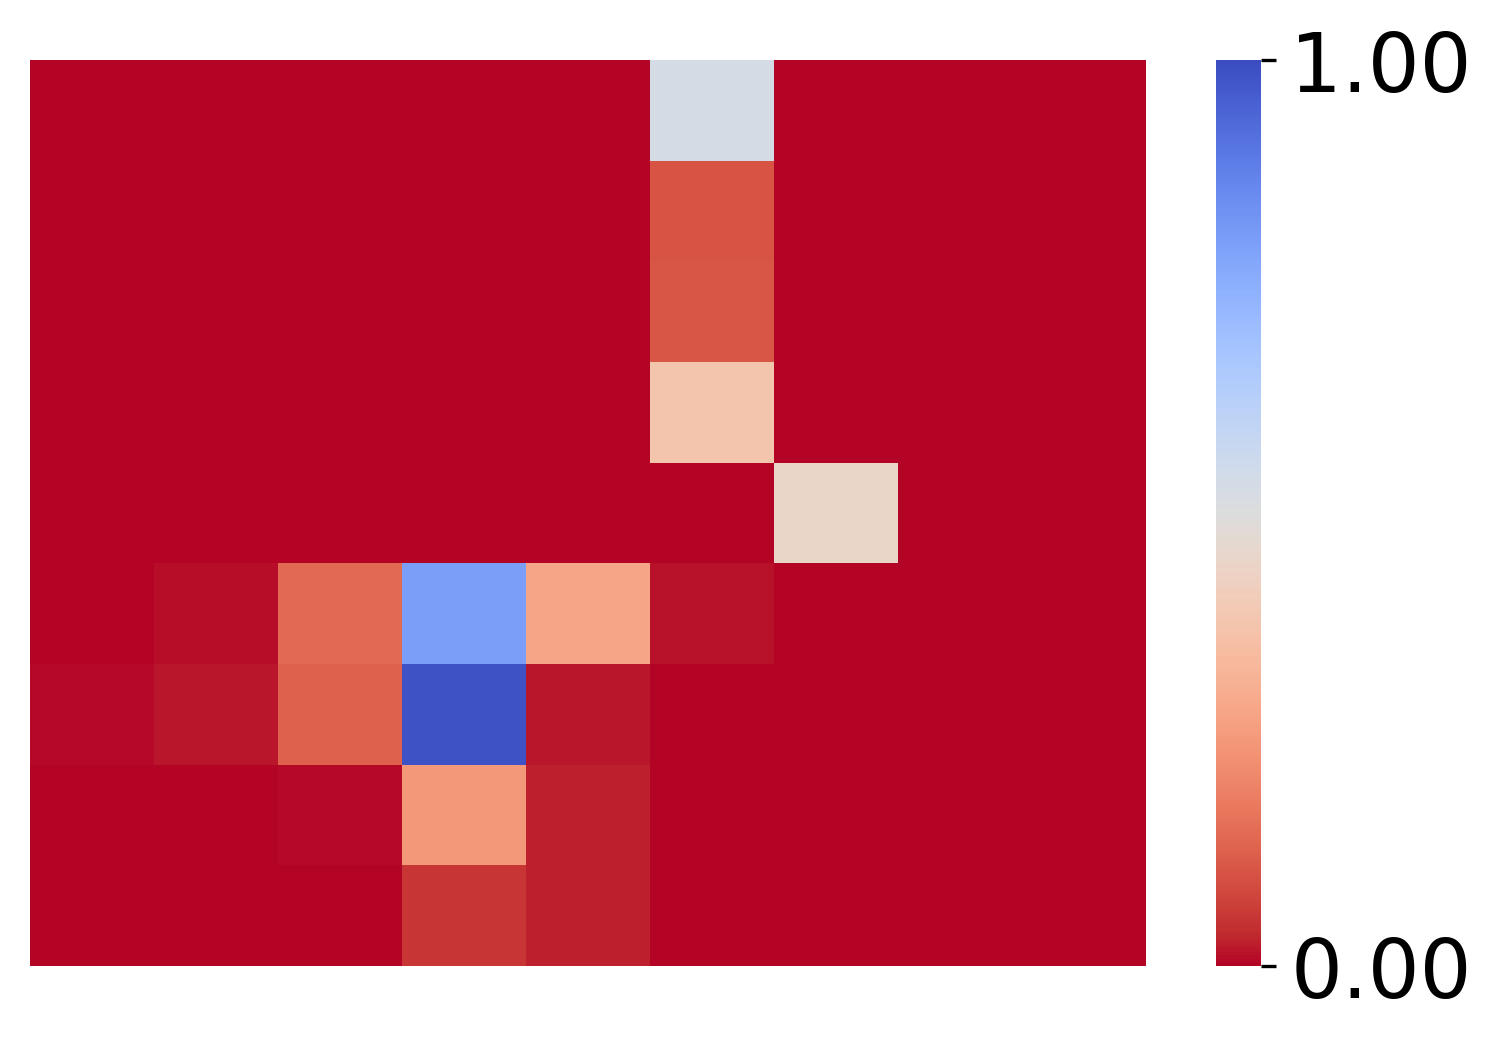

In [324]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(sim_obss_t1, sim_sleepss_t2, sim_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(sim_obss_t1.T, sim_sleepss_t2.T, effs_sorted, effs_sorted, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False)

In [325]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.svg'))

### Random Perturbation

In [326]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)
           n         r         CI95%     p-val
pearson  150  0.037374  [-0.12, 0.2]  0.650893
           n       r          CI95%     p-val
pearson  150  0.0982  [-0.06, 0.25]  0.233471
           n         r         CI95%     p-val
pearson  150  0.044838  [-0.12, 0.2]  0.587144
           n        r         CI95%     p-val
pearson  150 -0.06594  [-0.22, 0.1]  0.424297
           n         r          CI95%     p-val
pearson  150  0.018219  [-0.14, 0.18]  0.825452
           n         r          CI95%     p-val
pearson  150 -0.090605  [-0.25, 0.07]  0.271804
           n         r          CI95%     p-val
pearson  150  0.004353  [-0.16, 0.17]  0.957981
           n         r          CI95%    p-val
pearson  150  0.052309  [-0.11, 0.21]  0.52636
           n         r         CI95%     p-val
pearson  150 -0.058442  [-0.22, 0.1]  0.478963
           n         r         CI95%     p-val
pearson  150  0.166829  [0.01, 0.32]  0.041999
           n         r         CI95%     p-val
pe

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150 -0.023484  [-0.18, 0.14]  0.776194
           n         r          CI95%     p-val
pearson  150  0.016973  [-0.14, 0.18]  0.837214
           n         r          CI95%     p-val
pearson  150  0.071493  [-0.09, 0.23]  0.386245
           n         r          CI95%     p-val
pearson  150 -0.077093  [-0.23, 0.08]  0.350042
           n         r          CI95%     p-val
pearson  150  0.096443  [-0.07, 0.25]  0.241981
           n         r          CI95%     p-val
pearson  150  0.011524  [-0.15, 0.17]  0.889068
           n         r          CI95%     p-val
pearson  150  0.024538  [-0.14, 0.18]  0.766427
           n         r          CI95%     p-val
pearson  150  0.118874  [-0.04, 0.27]  0.148756
           n         r          CI95%    p-val
pearson  150  0.082815  [-0.08, 0.24]  0.31533
           n         r          CI95%     p-val
pearson  150  0.017191  [-0.14, 0.18]  0.835159
           n        r          CI95%     p

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

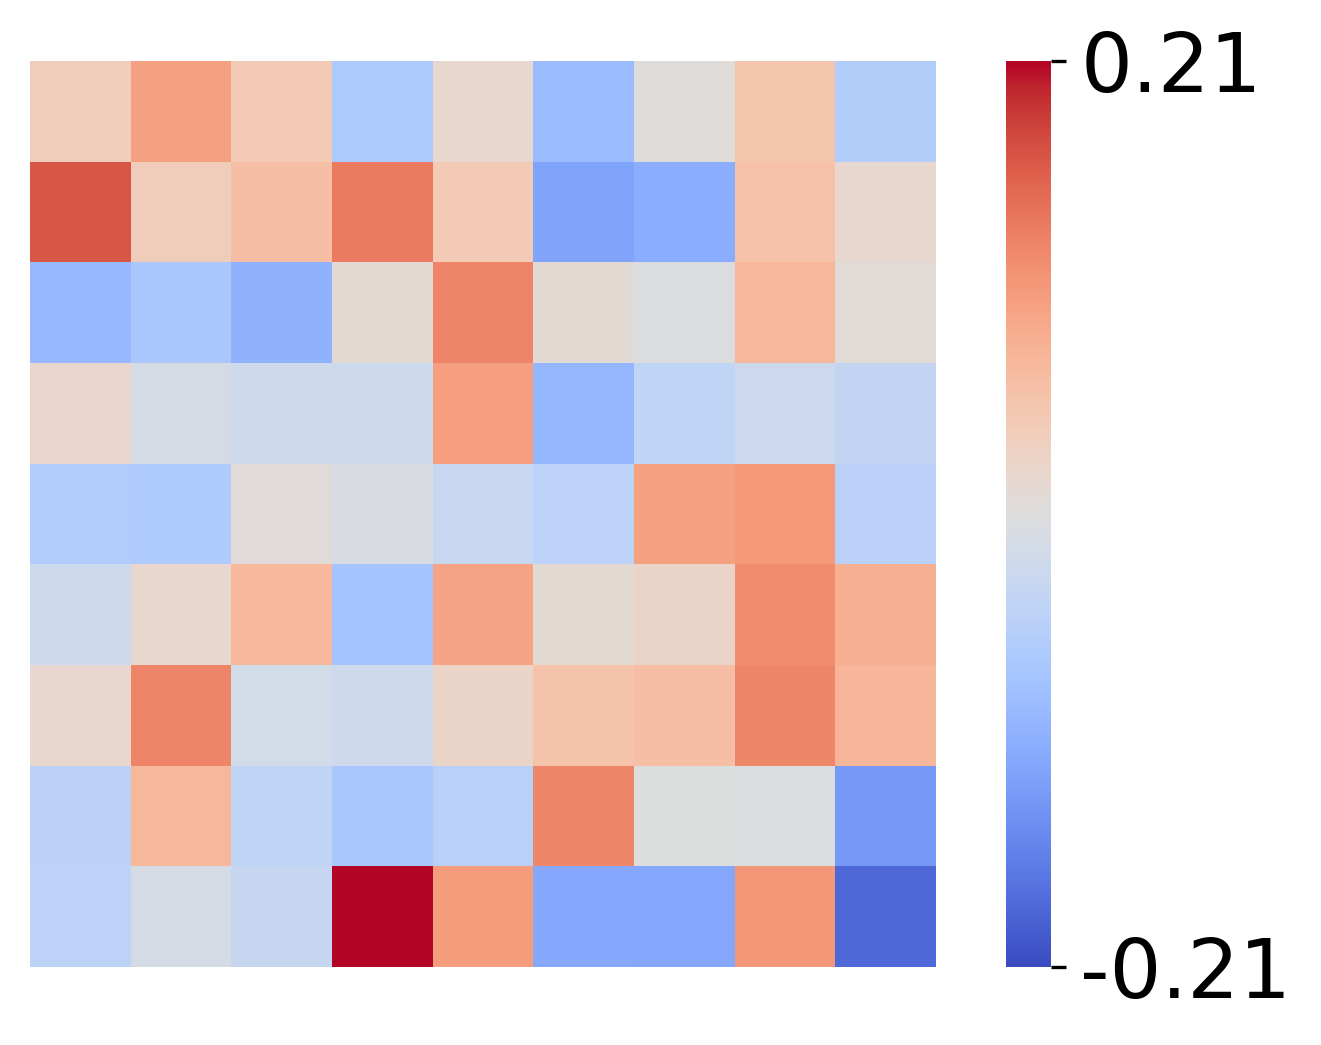

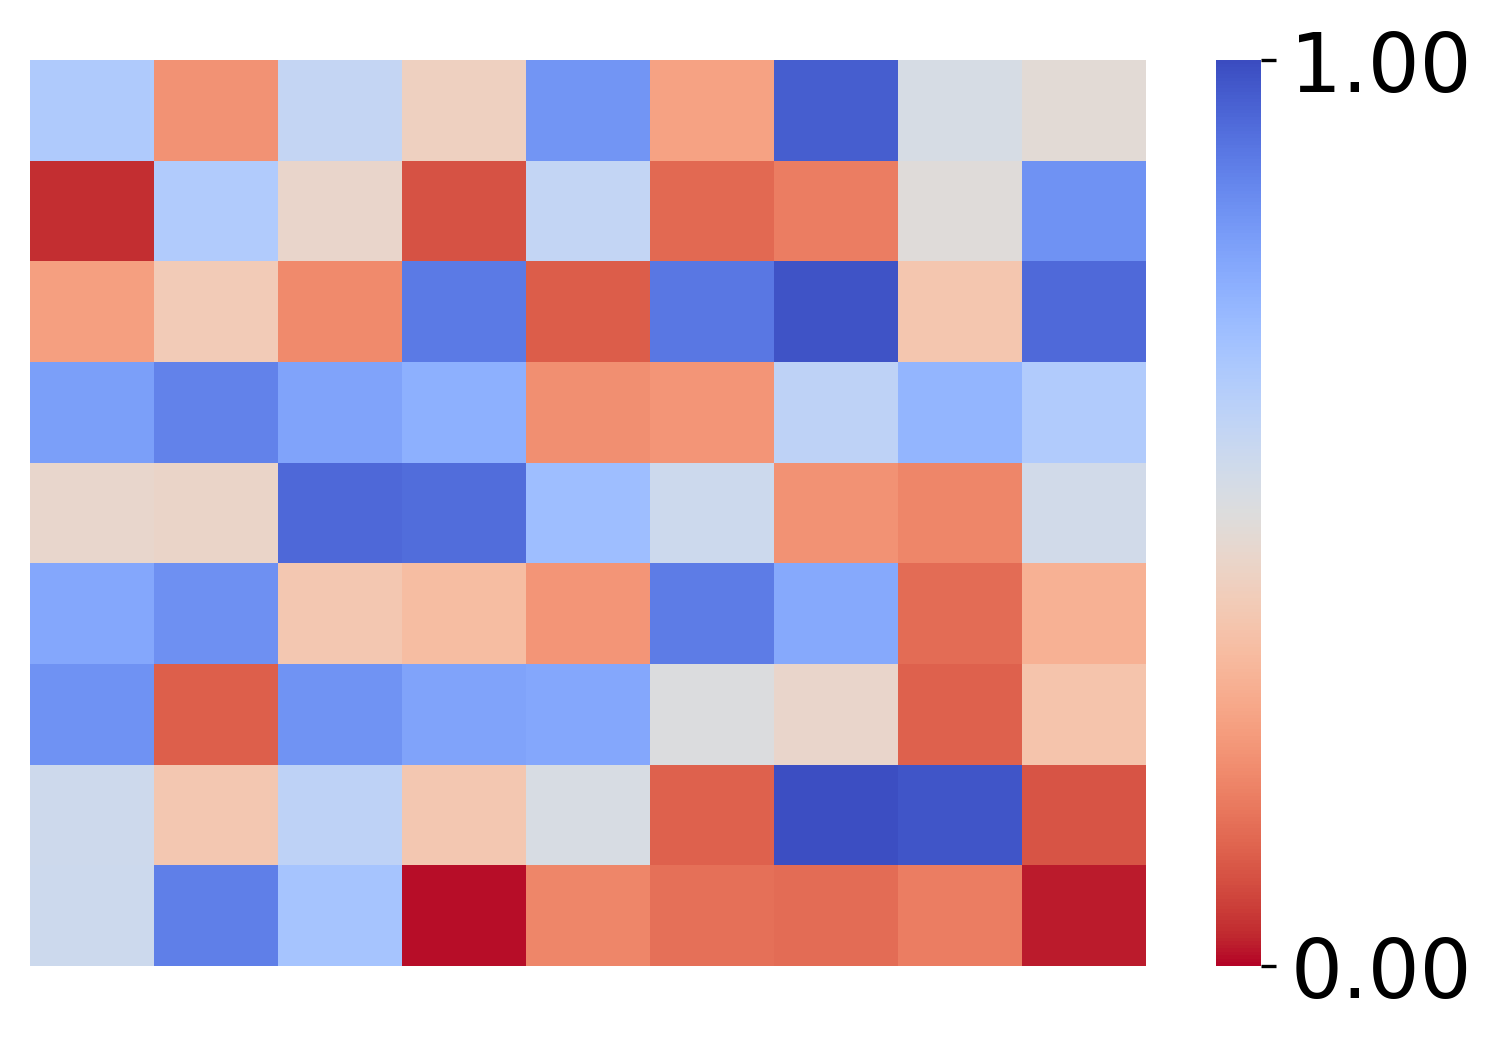

In [327]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation, compute_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(random_obss_t1, random_sleepss_t2, random_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1.T, random_sleepss_t2.T, effs_sorted, effs_sorted, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False)

In [328]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.svg'))

### Zeros Perturbations

In [329]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)
           n         r         CI95%     p-val
pearson  150 -0.037667  [-0.2, 0.12]  0.648334
           n        r          CI95%     p-val
pearson  150  0.12411  [-0.04, 0.28]  0.131547
           n         r         CI95%     p-val
pearson  150  0.063882  [-0.1, 0.22]  0.438932
           n        r          CI95%     p-val
pearson  150  0.13766  [-0.02, 0.29]  0.094095
           n         r         CI95%     p-val
pearson  150  0.179741  [0.02, 0.33]  0.028276
           n         r          CI95%     p-val
pearson  150  0.108323  [-0.05, 0.26]  0.188514
           n         r          CI95%     p-val
pearson  150  0.000973  [-0.16, 0.16]  0.990601
           n         r          CI95%     p-val
pearson  150 -0.015187  [-0.18, 0.15]  0.854145
           n         r          CI95%     p-val
pearson  150  0.089513  [-0.07, 0.25]  0.277643
           n         r          CI95%     p-val
pearson  150  0.086069  [-0.08, 0.24]  0.296624
           n         r           CI95%   

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.090953  [-0.07, 0.25]  0.269955
           n         r          CI95%     p-val
pearson  150  0.017824  [-0.14, 0.18]  0.829175
           n        r          CI95%     p-val
pearson  150  0.03014  [-0.13, 0.19]  0.715196
           n         r         CI95%    p-val
pearson  150  0.066235  [-0.1, 0.22]  0.42222
           n         r          CI95%    p-val
pearson  150 -0.027593  [-0.19, 0.13]  0.73835
           n         r          CI95%     p-val
pearson  150 -0.021671  [-0.18, 0.14]  0.793066
           n         r          CI95%    p-val
pearson  150 -0.032216  [-0.19, 0.13]  0.69651
           n         r          CI95%     p-val
pearson  150 -0.091249  [-0.25, 0.07]  0.268397
           n         r          CI95%     p-val
pearson  150 -0.031768  [-0.19, 0.13]  0.700525
           n         r         CI95%     p-val
pearson  150 -0.037021  [-0.2, 0.12]  0.653971
           n         r          CI95%     p-val
pear

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:541: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:542: FutureWarning: Calling float on a single element Series is deprec

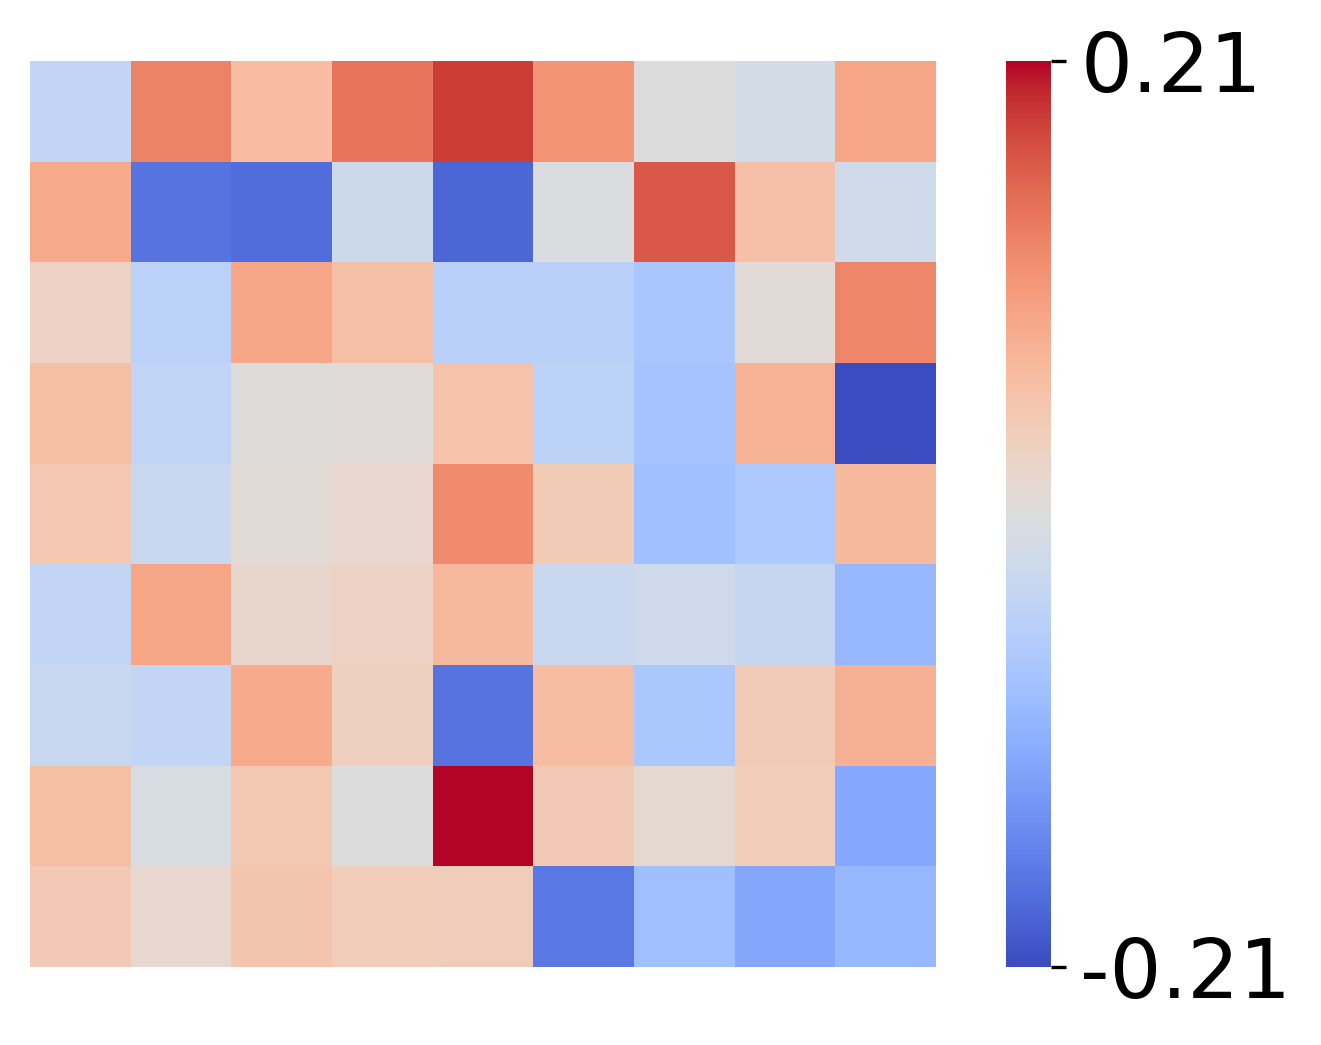

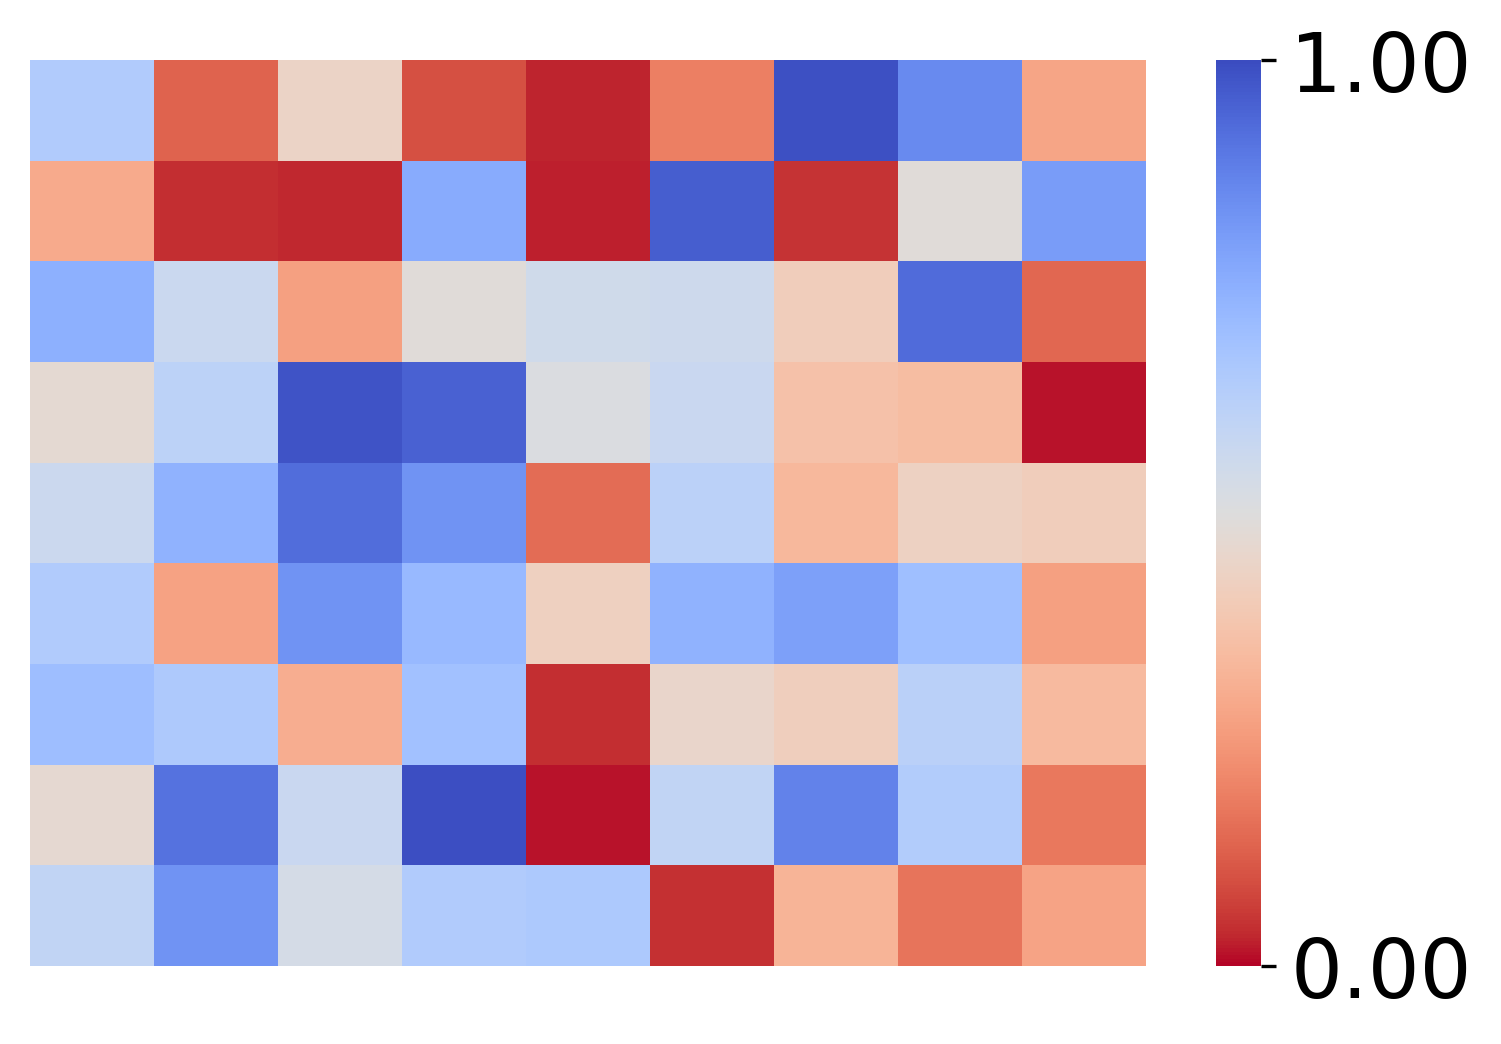

In [330]:
from human_utils_behavioral_analysis import compute_partial_2D_correlation, compute_2D_correlation

corr_fig, pvs_fig = compute_partial_2D_correlation(zeros_obss_t1, zeros_sleepss_t2, zeros_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

#corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1.T, random_sleepss_t2.T, effs_sorted, effs_sorted, col1name = 'Observes Task 1', col2name = 'Sleeps Task 2', annot=False)

In [331]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.svg'))

# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.svg'))

### Stats

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['n_observes'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['rewards_tallies'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['n_sleeps'].values), np.stack(df[~df['group']]['effs'].values), np.stack(df[~df['group']]['effs'].values),)

data_obs_corr = data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr =data_rews_corr_g1
data_rews_pvs =data_rews_pvs_g1

data_sleeps_corr =data_sleeps_corr_g1
data_sleeps_pvs = data_sleeps_pvs_g1


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)


(86, 9)
(96, 9)
(86, 9)
(96, 9)
(86, 9)
          n         r          CI95%     p-val
pearson  86  0.032734  [-0.18, 0.24]  0.766157
          n         r          CI95%     p-val
pearson  86  0.052834  [-0.16, 0.26]  0.631064
          n         r         CI95%     p-val
pearson  86 -0.009397  [-0.22, 0.2]  0.931977
          n         r          CI95%     p-val
pearson  86 -0.099528  [-0.31, 0.12]  0.364796
          n         r          CI95%    p-val
pearson  86  0.066204  [-0.15, 0.28]  0.54718
          n         r          CI95%     p-val
pearson  86  0.059924  [-0.16, 0.27]  0.585906
          n        r          CI95%     p-val
pearson  86 -0.07809  [-0.29, 0.14]  0.477468
          n         r          CI95%     p-val
pearson  86  0.026437  [-0.19, 0.24]  0.810197
          n        r          CI95%     p-val
pearson  86 -0.11044  [-0.32, 0.11]  0.314313
          n        r          CI95%    p-val
pearson  86  0.04534  [-0.17, 0.26]  0.68031
          n         r          C

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

          n         r        CI95%     p-val
pearson  86  0.306725  [0.1, 0.49]  0.004301
          n         r          CI95%     p-val
pearson  86  0.083959  [-0.13, 0.29]  0.444898
          n         r         CI95%     p-val
pearson  86  0.090658  [-0.12, 0.3]  0.409284
          n         r         CI95%     p-val
pearson  86  0.226826  [0.01, 0.42]  0.036837
          n         r          CI95%     p-val
pearson  86  0.006776  [-0.21, 0.22]  0.950924
          n         r          CI95%     p-val
pearson  86  0.130755  [-0.08, 0.33]  0.232956
          n         r          CI95%     p-val
pearson  86  0.042519  [-0.17, 0.25]  0.699216
          n         r         CI95%     p-val
pearson  86  0.256328  [0.05, 0.45]  0.017887
          n         r          CI95%     p-val
pearson  86 -0.072264  [-0.28, 0.14]  0.511028
          n        r          CI95%     p-val
pearson  86  0.10495  [-0.11, 0.31]  0.339117
          n         r         CI95%     p-val
pearson  86  0.093472  [-0

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

          n         r        CI95%    p-val
pearson  96 -0.107857  [-0.3, 0.1]  0.29816
          n         r          CI95%     p-val
pearson  96  0.066626  [-0.14, 0.26]  0.521195
          n         r          CI95%     p-val
pearson  96  0.077465  [-0.13, 0.27]  0.455567
          n         r          CI95%     p-val
pearson  96  0.196624  [-0.01, 0.38]  0.056162
          n         r          CI95%     p-val
pearson  96 -0.059595  [-0.26, 0.14]  0.566182
          n        r          CI95%     p-val
pearson  96  0.14444  [-0.06, 0.34]  0.162557
          n         r          CI95%     p-val
pearson  96 -0.054513  [-0.25, 0.15]  0.599802
          n         r          CI95%     p-val
pearson  96  0.012268  [-0.19, 0.21]  0.906068
          n         r          CI95%     p-val
pearson  96  0.075826  [-0.13, 0.27]  0.465189
          n         r          CI95%     p-val
pearson  96  0.035661  [-0.17, 0.24]  0.731535
          n         r        CI95%     p-val
pearson  96 -0.001934  

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

(150, 9)
(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r         CI95%         p-val
pearson  150  0.590884  [0.48, 0.69]  2.147276e-15
           n         r         CI95%         p-val
pearson  150  0.541338  [0.42, 0.65]  1.017421e-12
           n         r        CI95%         p-val
pearson  150  0.488879  [0.36, 0.6]  2.518721e-10
           n         r         CI95%         p-val
pearson  150  0.432578  [0.29, 0.55]  3.600805e-08
           n         r         CI95%         p-val
pearson  150  0.391939  [0.25, 0.52]  7.686430e-07
           n         r         CI95%     p-val
pearson  150  0.304811  [0.15, 0.44]  0.000157
           n        r         CI95%     p-val
pearson  150  0.22419  [0.07, 0.37]  0.005985
           n         r         CI95%     p-val
pearson  150  0.202619  [0.04, 0.35]  0.013204
           n         r         CI95%         p-val
pearson  150  0.518175  [0.39, 0.63]  1.3

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

           n         r         CI95%         p-val
pearson  150  0.416798  [0.27, 0.54]  1.240348e-07
           n         r         CI95%     p-val
pearson  150  0.189991  [0.03, 0.34]  0.020299
           n         r         CI95%     p-val
pearson  150  0.064897  [-0.1, 0.22]  0.431678
           n         r          CI95%     p-val
pearson  150  0.011272  [-0.15, 0.17]  0.891473
           n         r         CI95%     p-val
pearson  150  0.335546  [0.18, 0.47]  0.000029
           n         r         CI95%     p-val
pearson  150  0.383985  [0.24, 0.51]  0.000001
           n         r         CI95%         p-val
pearson  150  0.409934  [0.27, 0.54]  2.083116e-07
           n         r         CI95%         p-val
pearson  150  0.420607  [0.28, 0.54]  9.255250e-08
           n         r         CI95%         p-val
pearson  150  0.424525  [0.28, 0.55]  6.822467e-08
           n         r         CI95%     p-val
pearson  150  0.240119  [0.08, 0.39]  0.003182
           n         r    

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

(150, 9)
(150, 9)
           n         r          CI95%     p-val
pearson  150  0.055008  [-0.11, 0.21]  0.505213
           n         r          CI95%    p-val
pearson  150 -0.047474  [-0.21, 0.11]  0.56533
           n         r          CI95%     p-val
pearson  150  0.120422  [-0.04, 0.28]  0.143498
           n         r          CI95%     p-val
pearson  150  0.102294  [-0.06, 0.26]  0.214458
           n         r          CI95%     p-val
pearson  150 -0.023352  [-0.18, 0.14]  0.777421
           n         r          CI95%     p-val
pearson  150 -0.049147  [-0.21, 0.11]  0.551694
           n         r          CI95%     p-val
pearson  150 -0.132447  [-0.29, 0.03]  0.107352
           n         r          CI95%     p-val
pearson  150 -0.113417  [-0.27, 0.05]  0.168443
           n         r          CI95%     p-val
pearson  150  0.004943  [-0.16, 0.17]  0.952288
           n         r          CI95%     p-val
pearson  150 -0.073155  [-0.23, 0.09]  0.375271
           n        r   

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150  0.086524  [-0.08, 0.24]  0.294073
           n         r          CI95%     p-val
pearson  150  0.029524  [-0.13, 0.19]  0.720767
           n         r          CI95%     p-val
pearson  150  0.023944  [-0.14, 0.18]  0.771924
           n         r          CI95%     p-val
pearson  150 -0.073623  [-0.23, 0.09]  0.372219
           n         r          CI95%    p-val
pearson  150  0.021827  [-0.14, 0.18]  0.79161
           n        r          CI95%     p-val
pearson  150  0.01904  [-0.14, 0.18]  0.817723
           n         r          CI95%     p-val
pearson  150 -0.019141  [-0.18, 0.14]  0.816769
           n         r          CI95%     p-val
pearson  150  0.011999  [-0.15, 0.17]  0.884522
           n         r          CI95%     p-val
pearson  150 -0.054919  [-0.21, 0.11]  0.505906
           n         r          CI95%   p-val
pearson  150 -0.011175  [-0.17, 0.15]  0.8924
           n         r         CI95%     p-val
p

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

In [ ]:
from human_utils_behavioral_analysis import competitive_corr_regression

competitive_corr_regression((data_sleeps_corr), [(sim_sleeps_corr), (random_sleeps_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1058
Date:                Sat, 01 Jun 2024   Prob (F-statistic):              0.900
Time:                        13:05:00   Log-Likelihood:                 95.061
No. Observations:                  81   AIC:                            -184.1
Df Residuals:                      78   BIC:                            -176.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0663      0.009      7.416      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data_sleeps_corr.reshape((1,-1)), sim_sleeps_corr.reshape((1,-1)))[0][0])
print(cosine_similarity(data_sleeps_corr.reshape((1,-1)), random_sleeps_corr.reshape((1,-1)))[0][0])

-0.11392069484986803
-0.1081419752786654


#### Check if sum of partialed correlation is significantly different from zero

In [ ]:
from scipy.stats import ttest_1samp

data_sleeps_corr_flattened = data_sleeps_corr.flatten()

print("Mean", np.mean(data_sleeps_corr_flattened))
print("StdErr", np.mean(data_sleeps_corr_flattened)/np.sqrt(len(data_sleeps_corr_flattened)))

t_stat, p_value = ttest_1samp(data_sleeps_corr_flattened, 0)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The mean of data_sleeps_corr is statistically different from 0.")
else:
    print("There is no statistical difference between the mean of data_sleeps_corr and 0.")

Mean 0.06524392729361297
StdErr 0.007249325254845886
T-statistic: 7.8618182488982
P-value: 1.5076587005883e-11
The mean of data_sleeps_corr is statistically different from 0.


## Panel F v2: Across-Tasks Behavior Sleep / Observes Unpartialed
### Humans

In [364]:
from human_utils_project import get_clean_data

day = 'day3'

group = "groupA"

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='inner', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

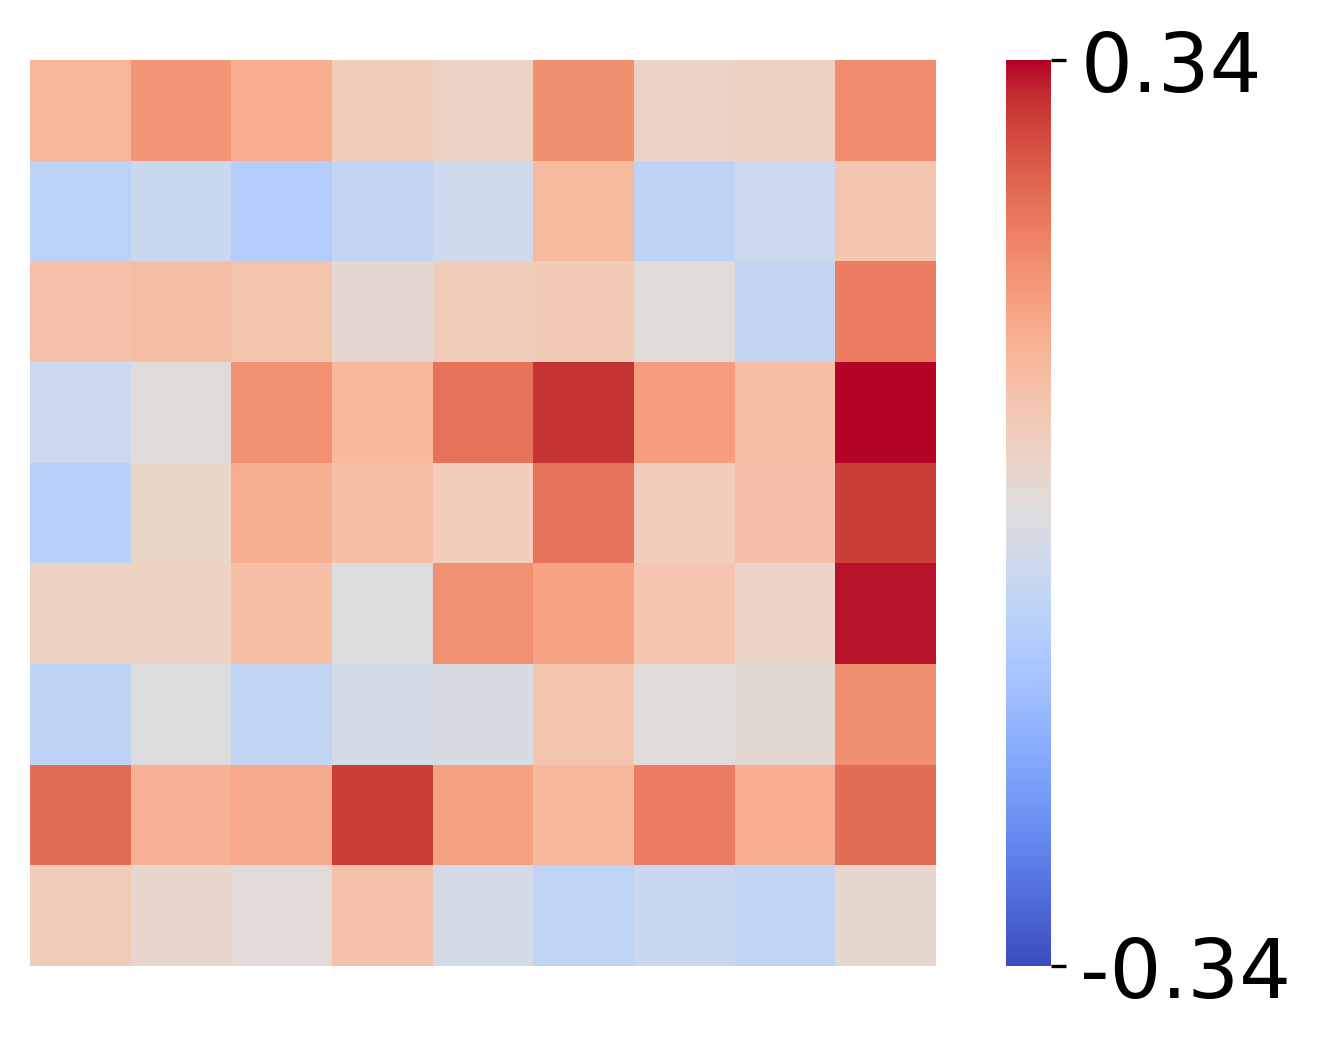

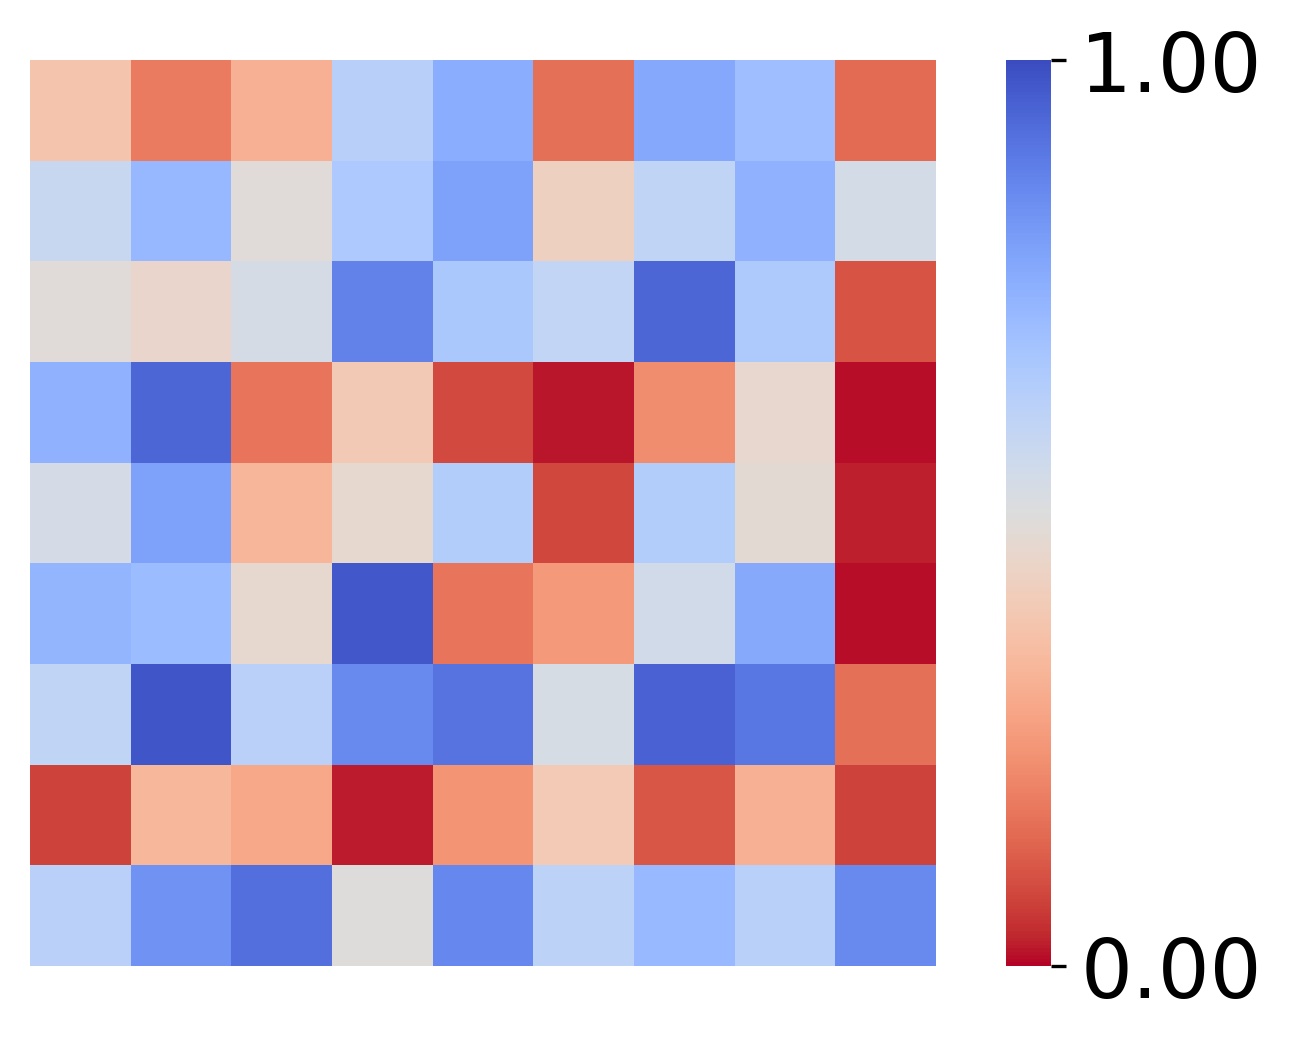

In [365]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes_day2'], df['n_sleeps_day3'], df['effs_day2'], df['effs_day3'], "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [366]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_humans.svg'))

### Trait-Level Perturbations

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs_sorted = effs = np.arange(0, 1.01, 0.125)

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

(150, 9)


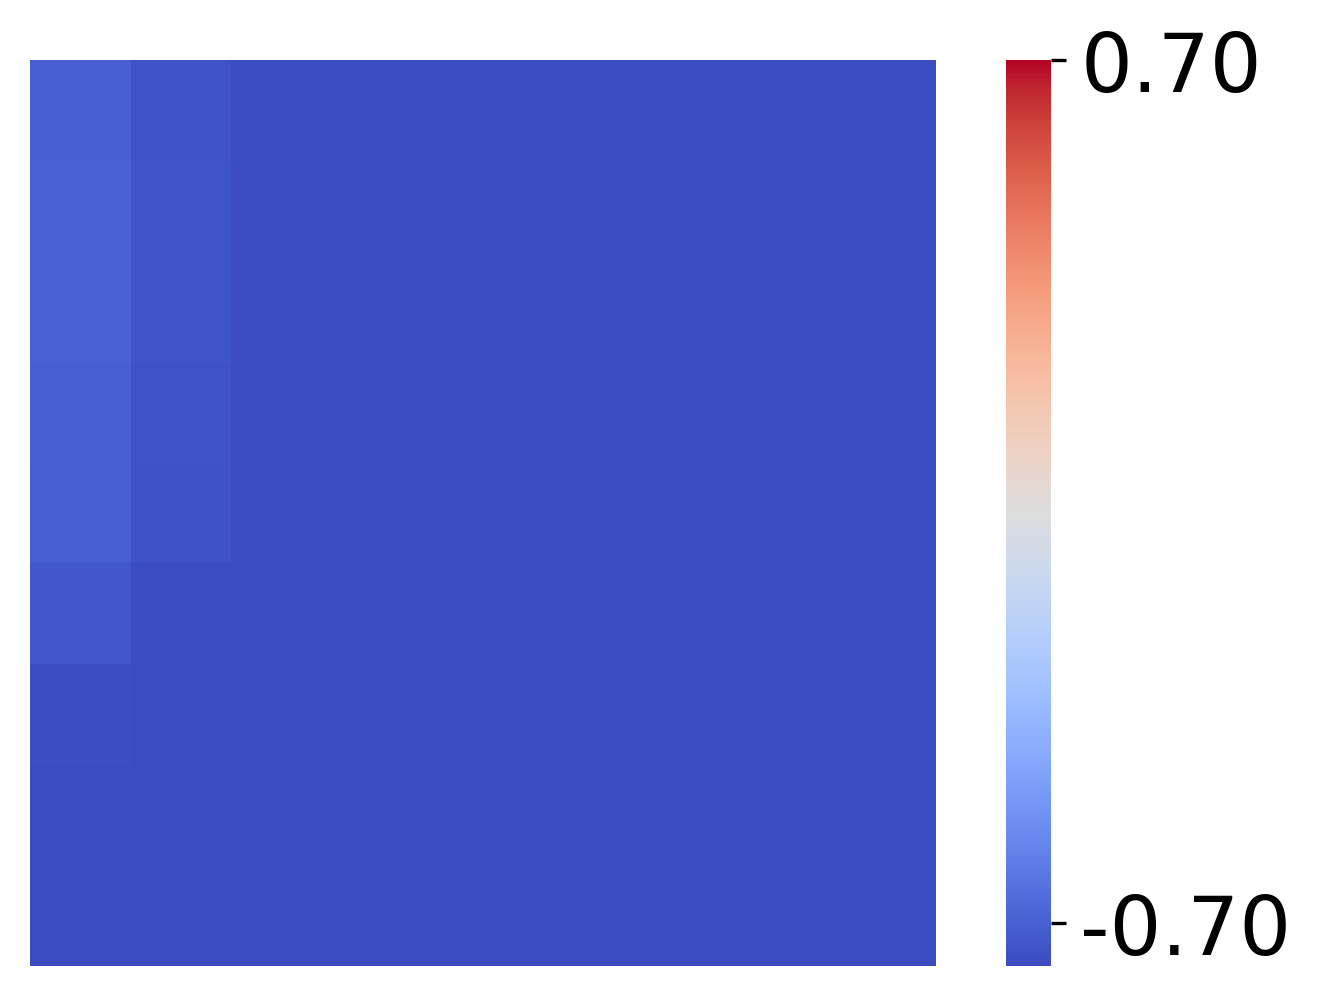

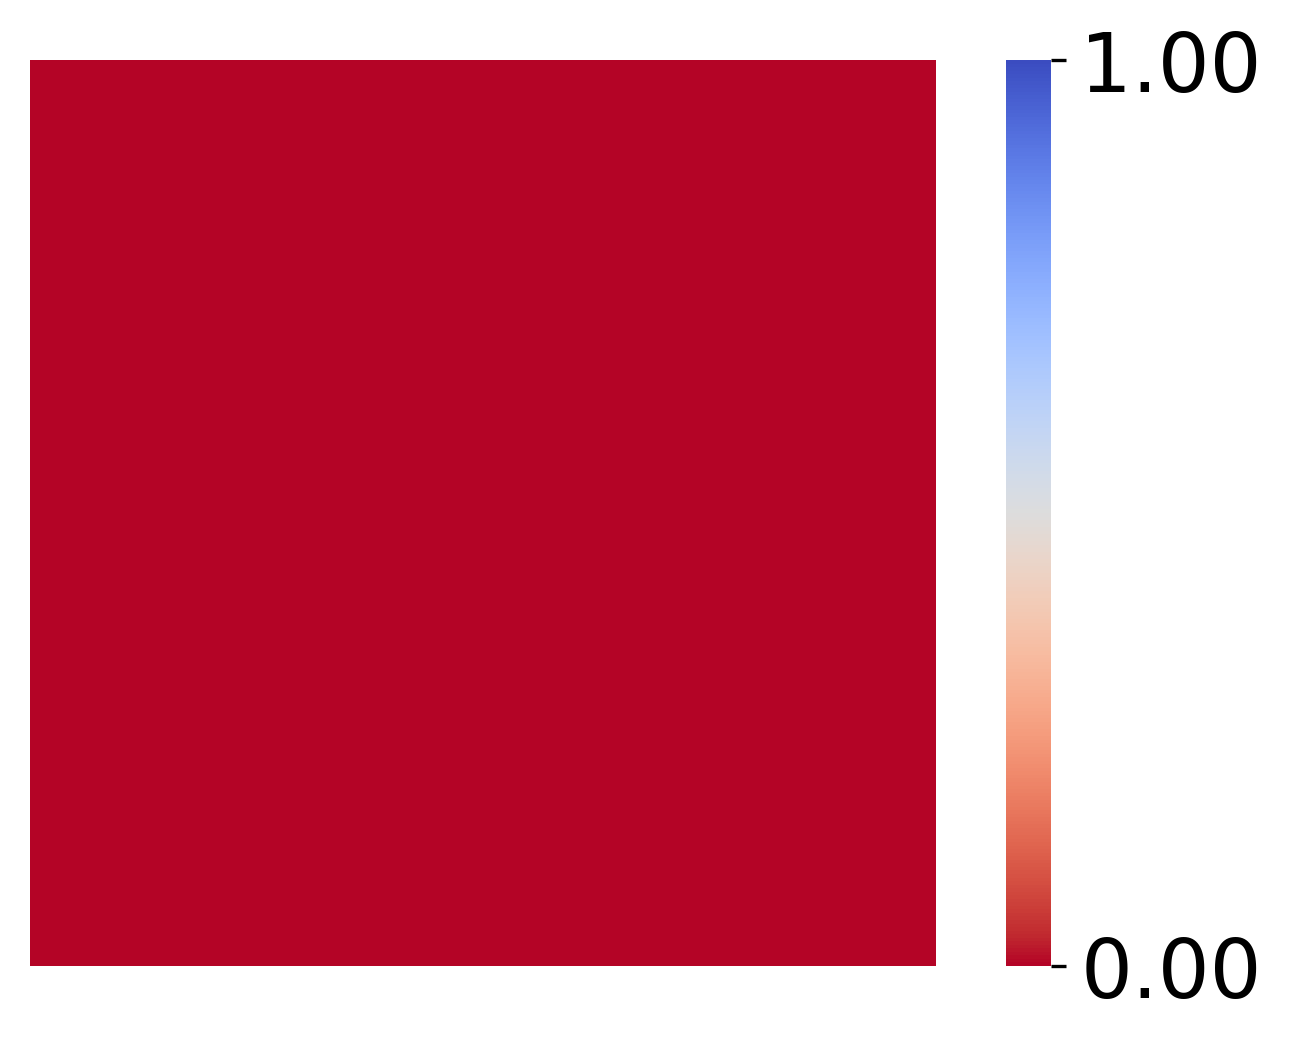

In [ ]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss_t1, sim_sleepss_t2, effs_sorted, effs_sorted, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [ ]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_trait.svg'))

### Random Perturbation

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)


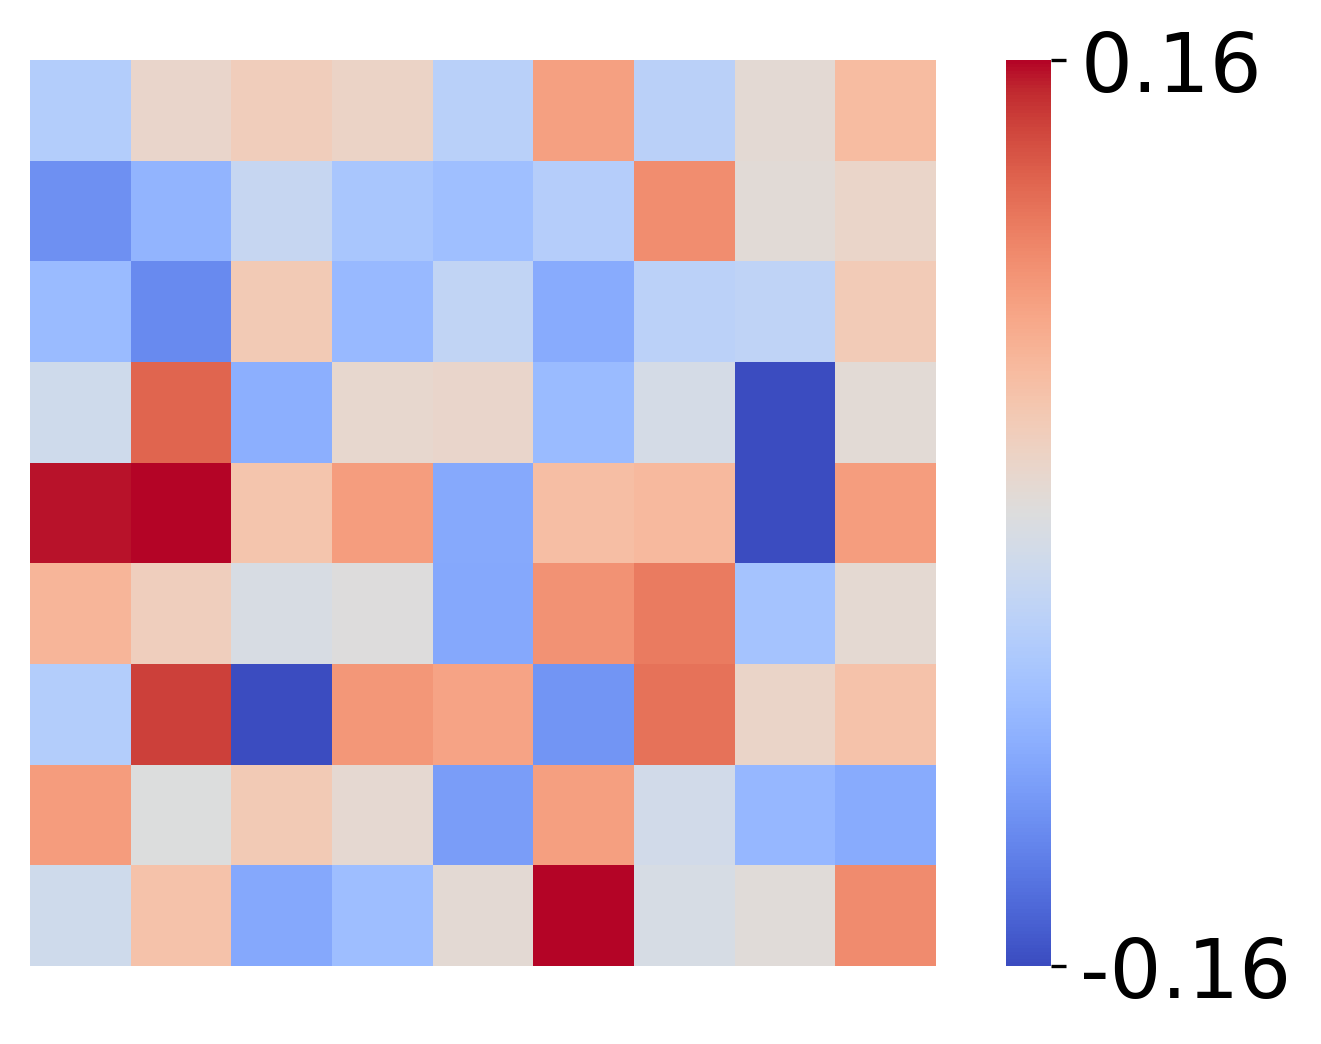

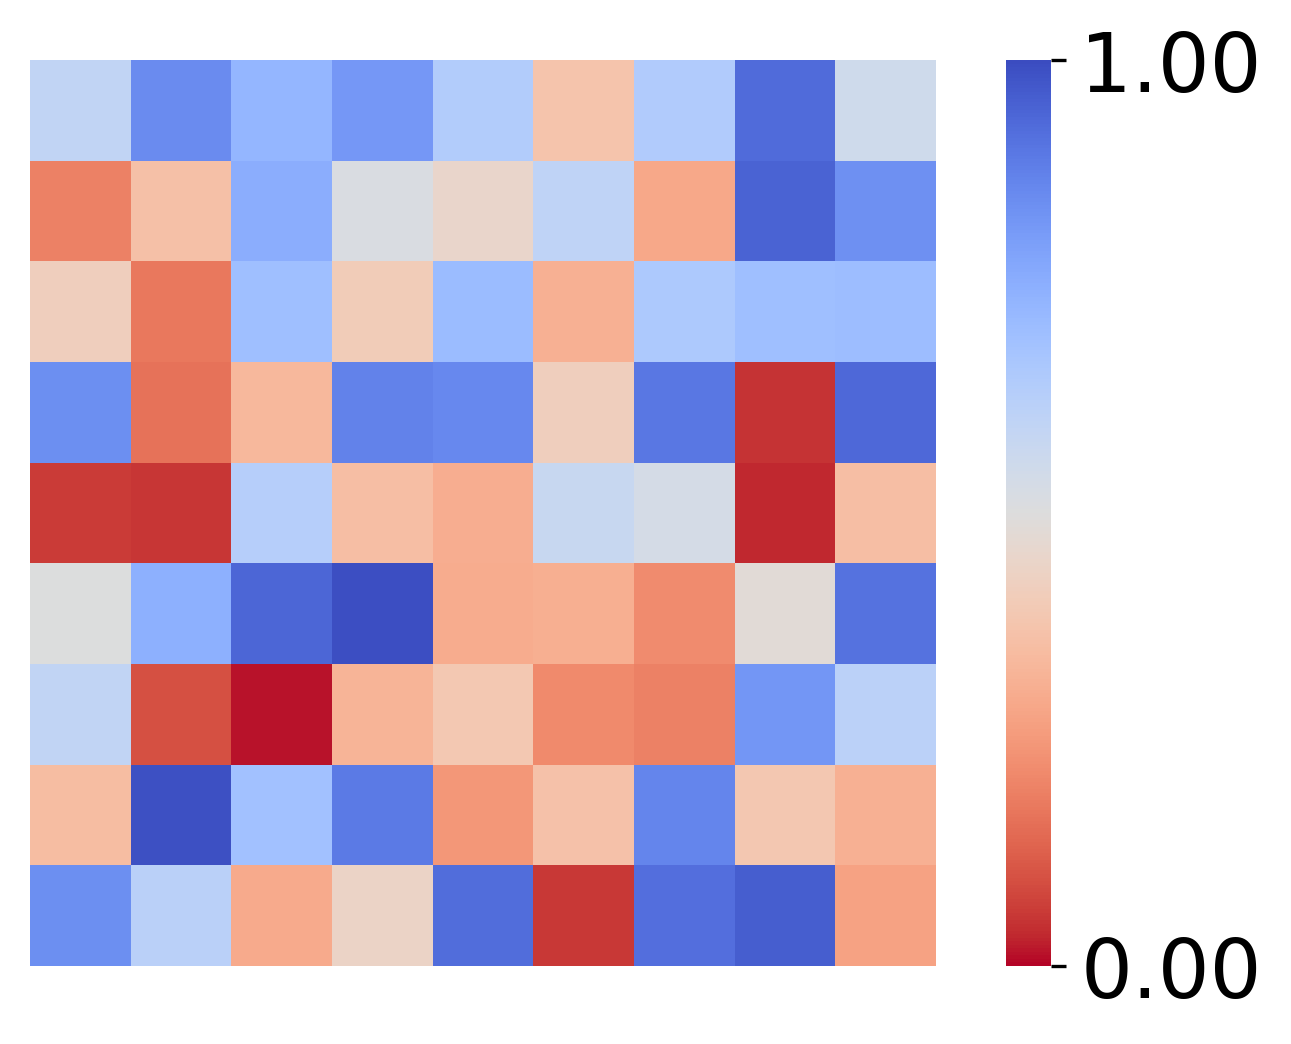

In [ ]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1, random_sleepss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [ ]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_random.svg'))

### Zeros Perturbations

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

SyntaxError: invalid syntax (1777551921.py, line 38)

(150, 9)


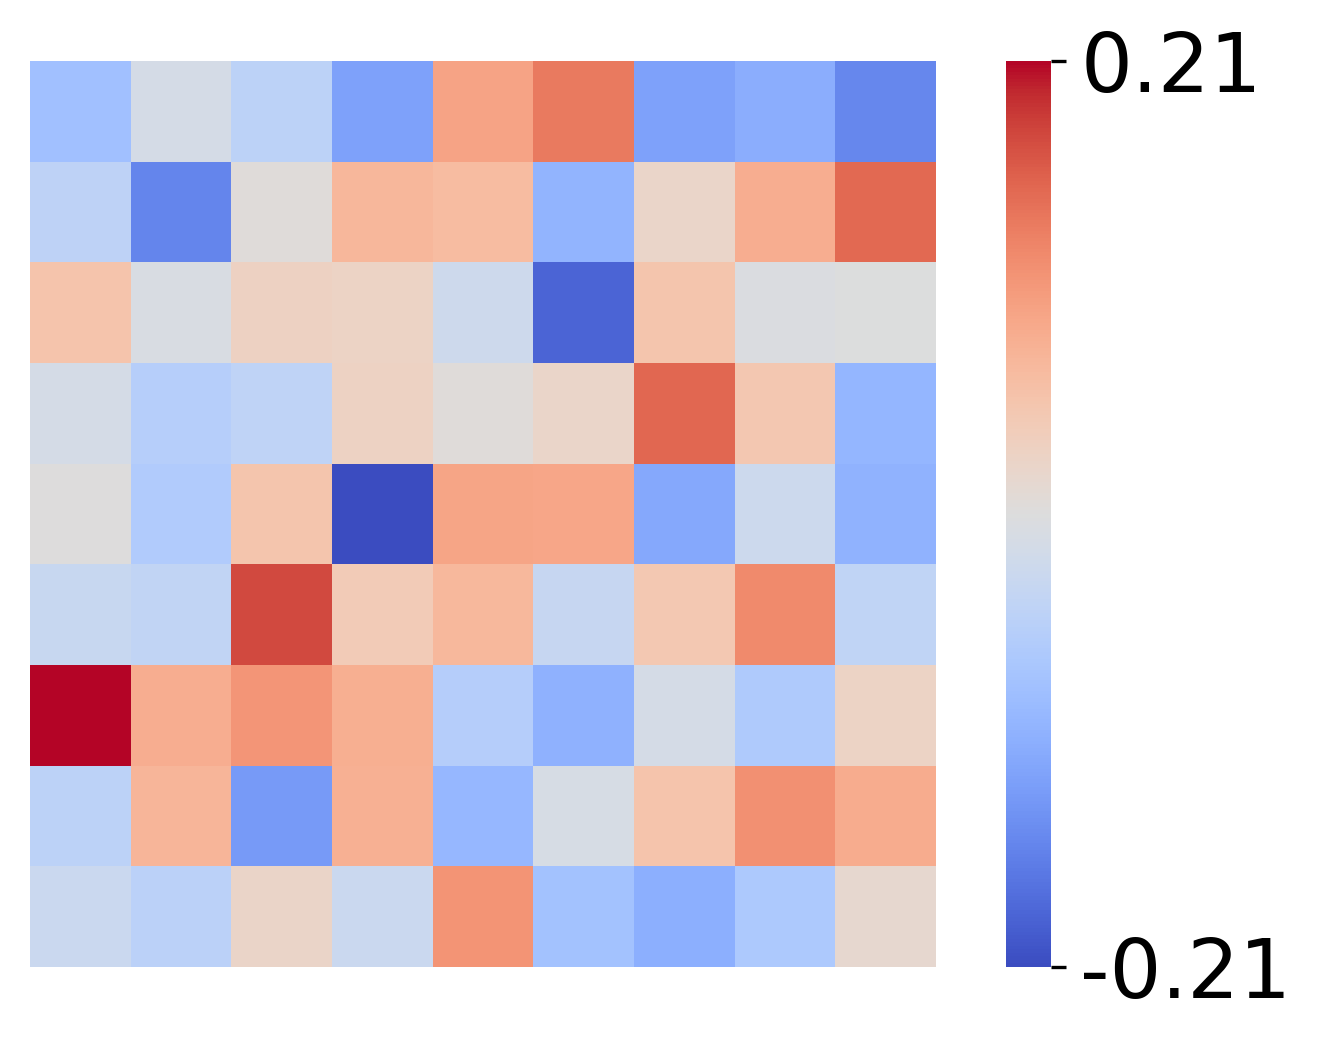

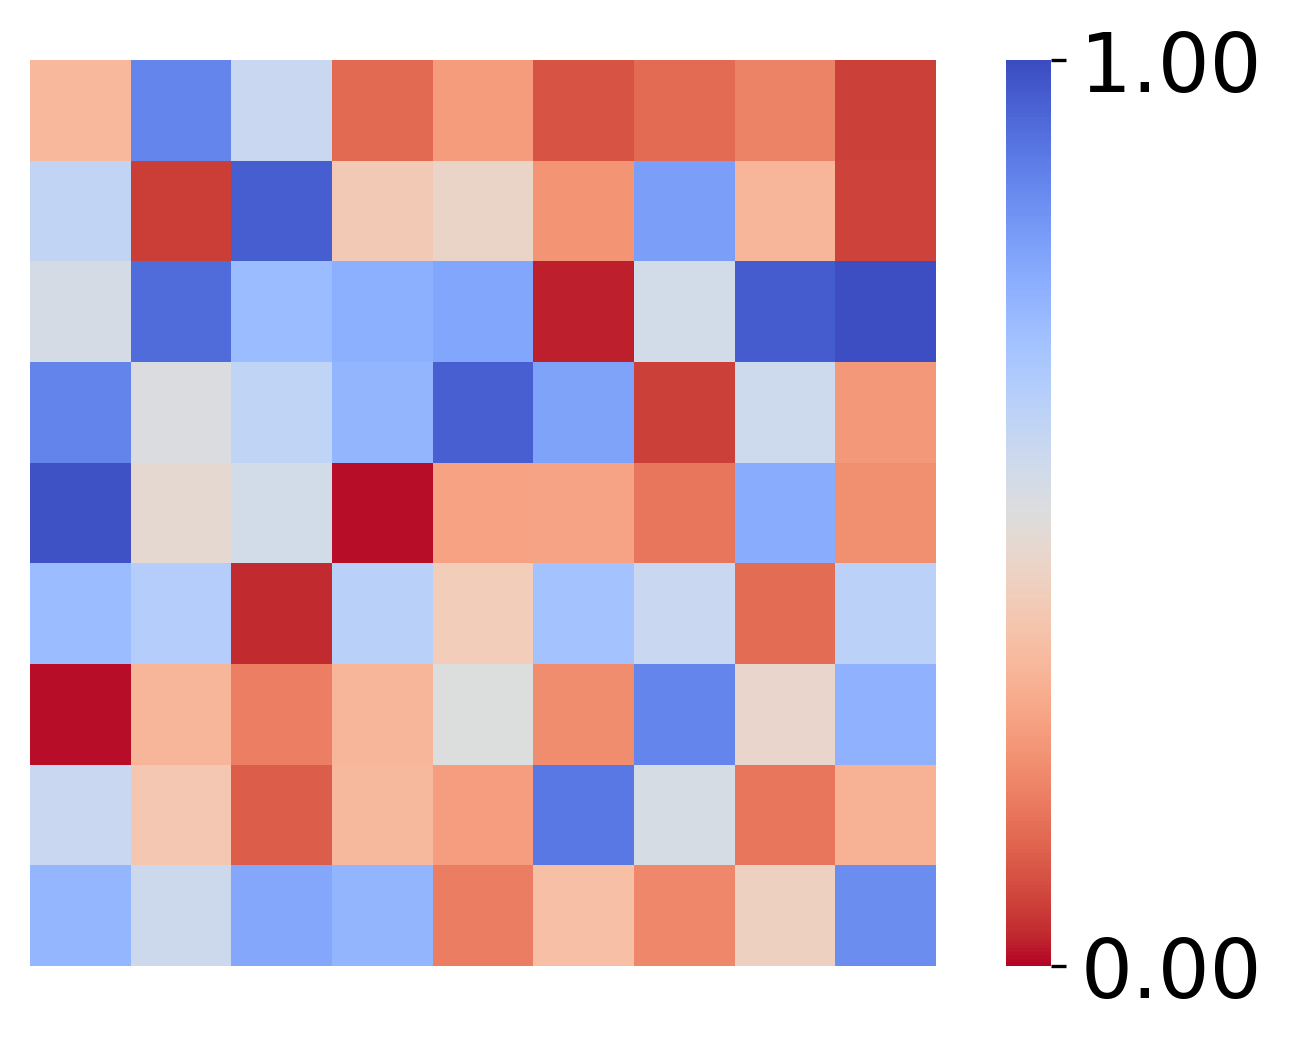

In [ ]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss_t1, zeros_sleepss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [ ]:
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.png'))
# corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros_partialed.svg'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.png'))
# pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros_partialed.svg'))

corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_sleeps_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_sleeps_zeros.svg'))

### Stats

## Panel F: Across Tasks Observations
### Humans

In [332]:
from human_utils_project import get_clean_data

day = 'day3'

group = "groupA"

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='outer', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

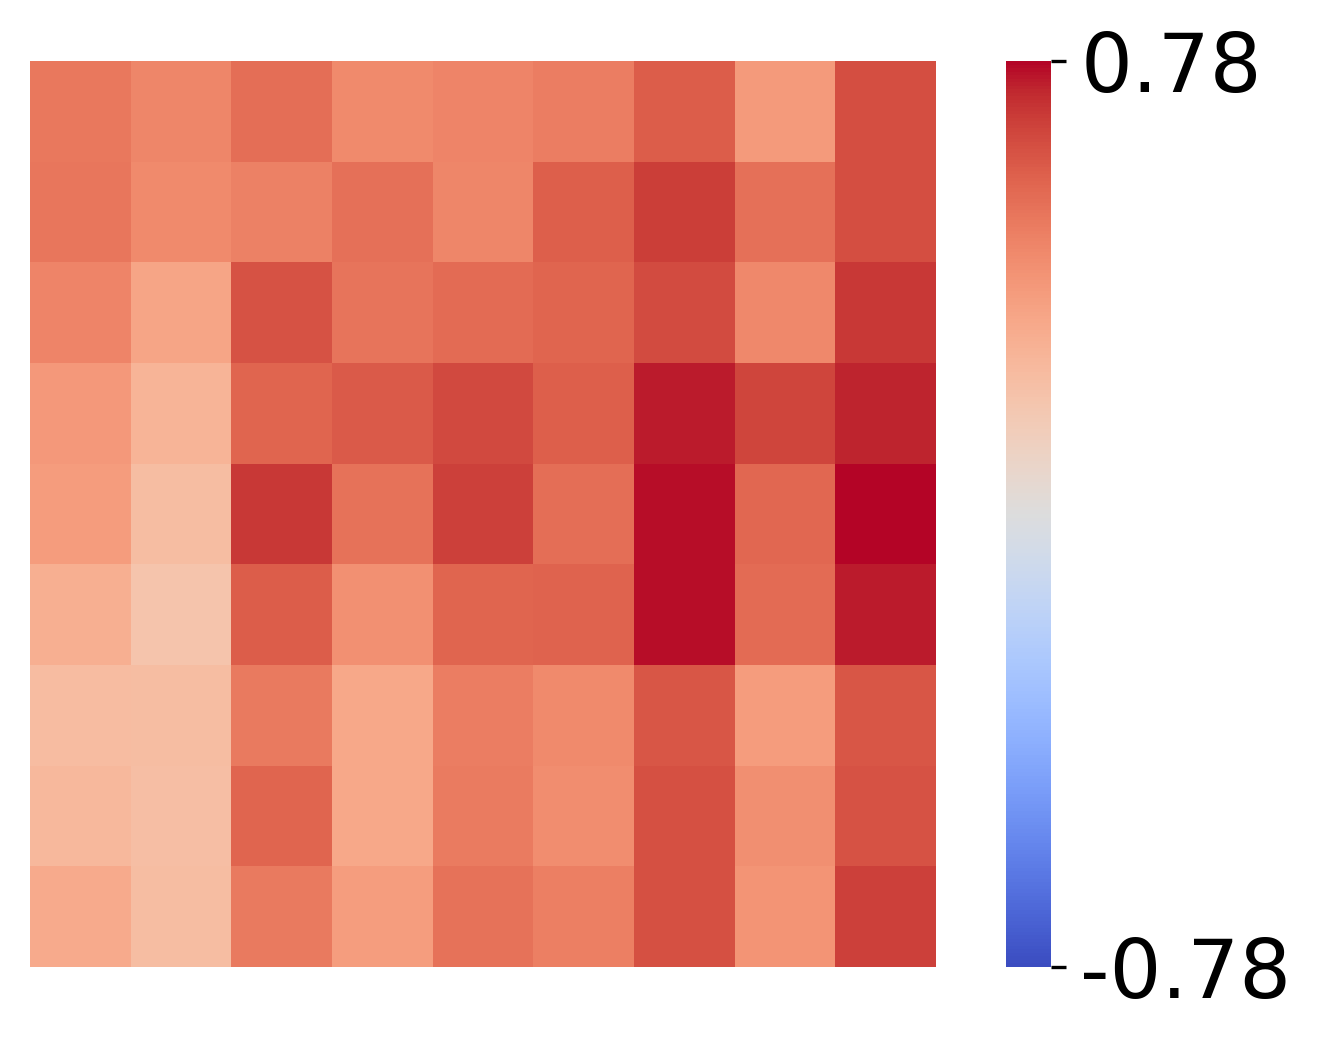

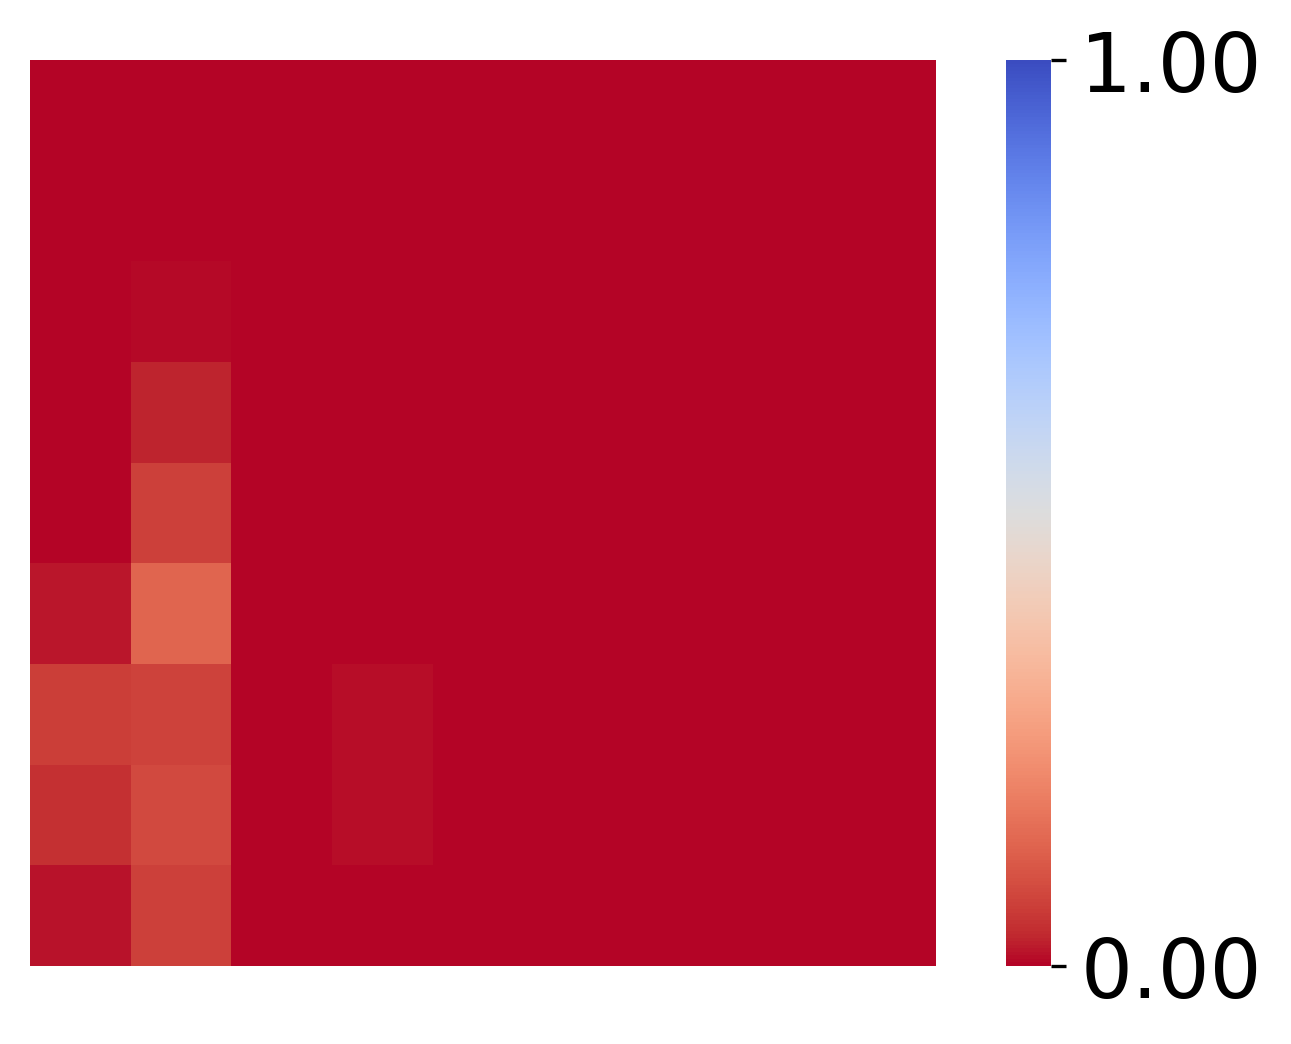

In [333]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['n_observes_day2'], df['n_observes_day3'], df['effs_day2'], df['effs_day3'], "Observes Task 1", "Observes Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [334]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_humans.svg'))

### Trait-level Perturbations

In [335]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models

from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

effs_sorted = np.arange(0, 1.01, 0.125)

(150, 9)


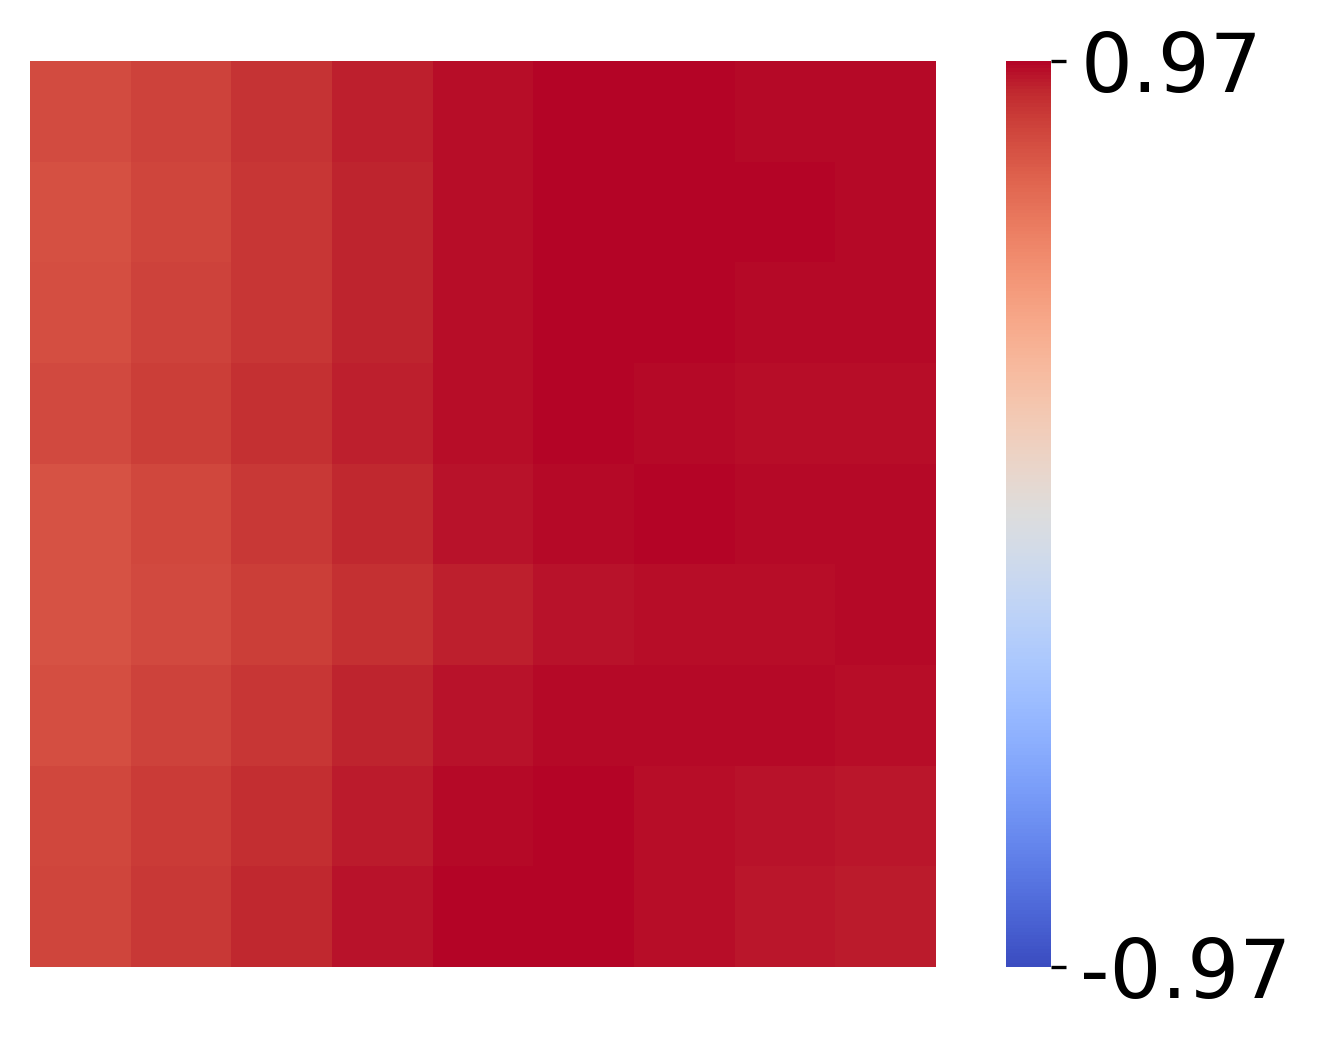

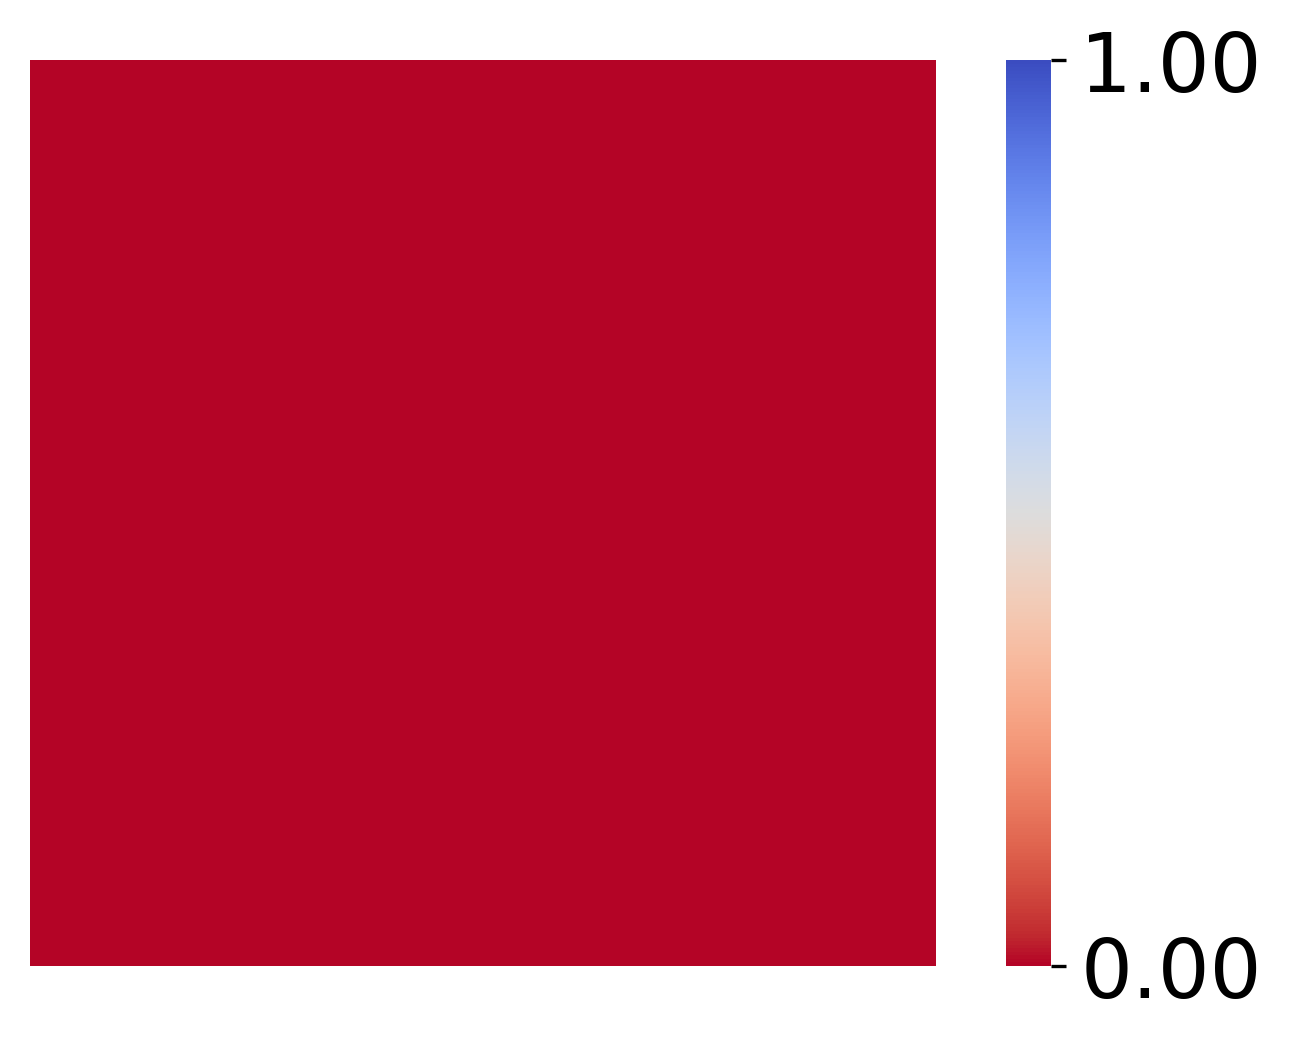

In [336]:
corr_fig, pvs_fig = compute_2D_correlation(sim_obss_t1, sim_obss_t2, effs_sorted, effs_sorted, "Observations Task 1", "Observations Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [337]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_trait.svg'))

### Random Perturbations

In [338]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)


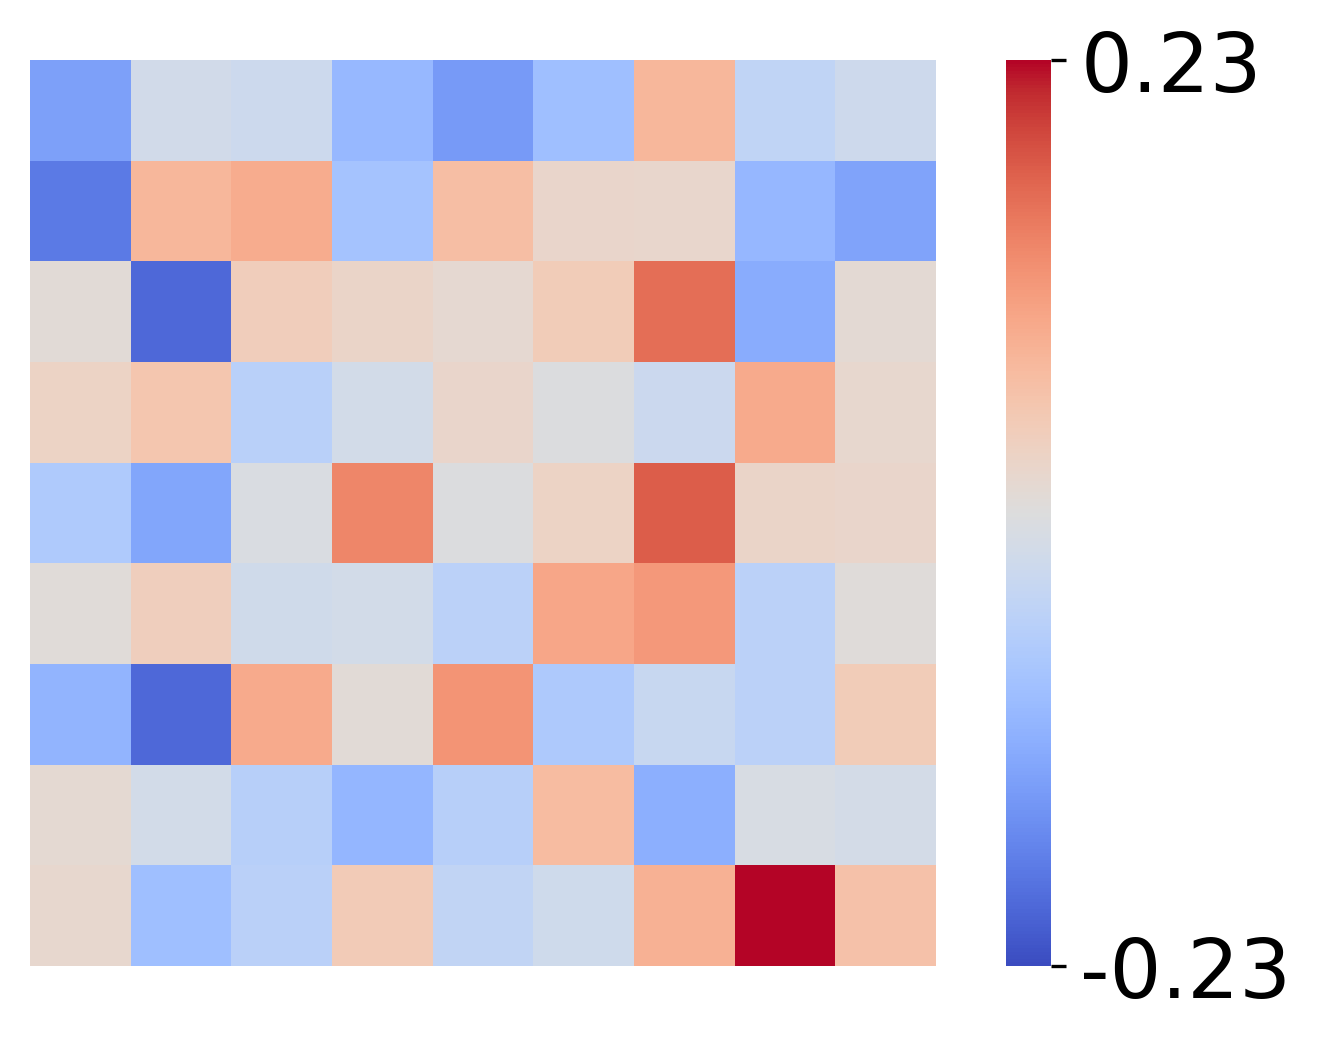

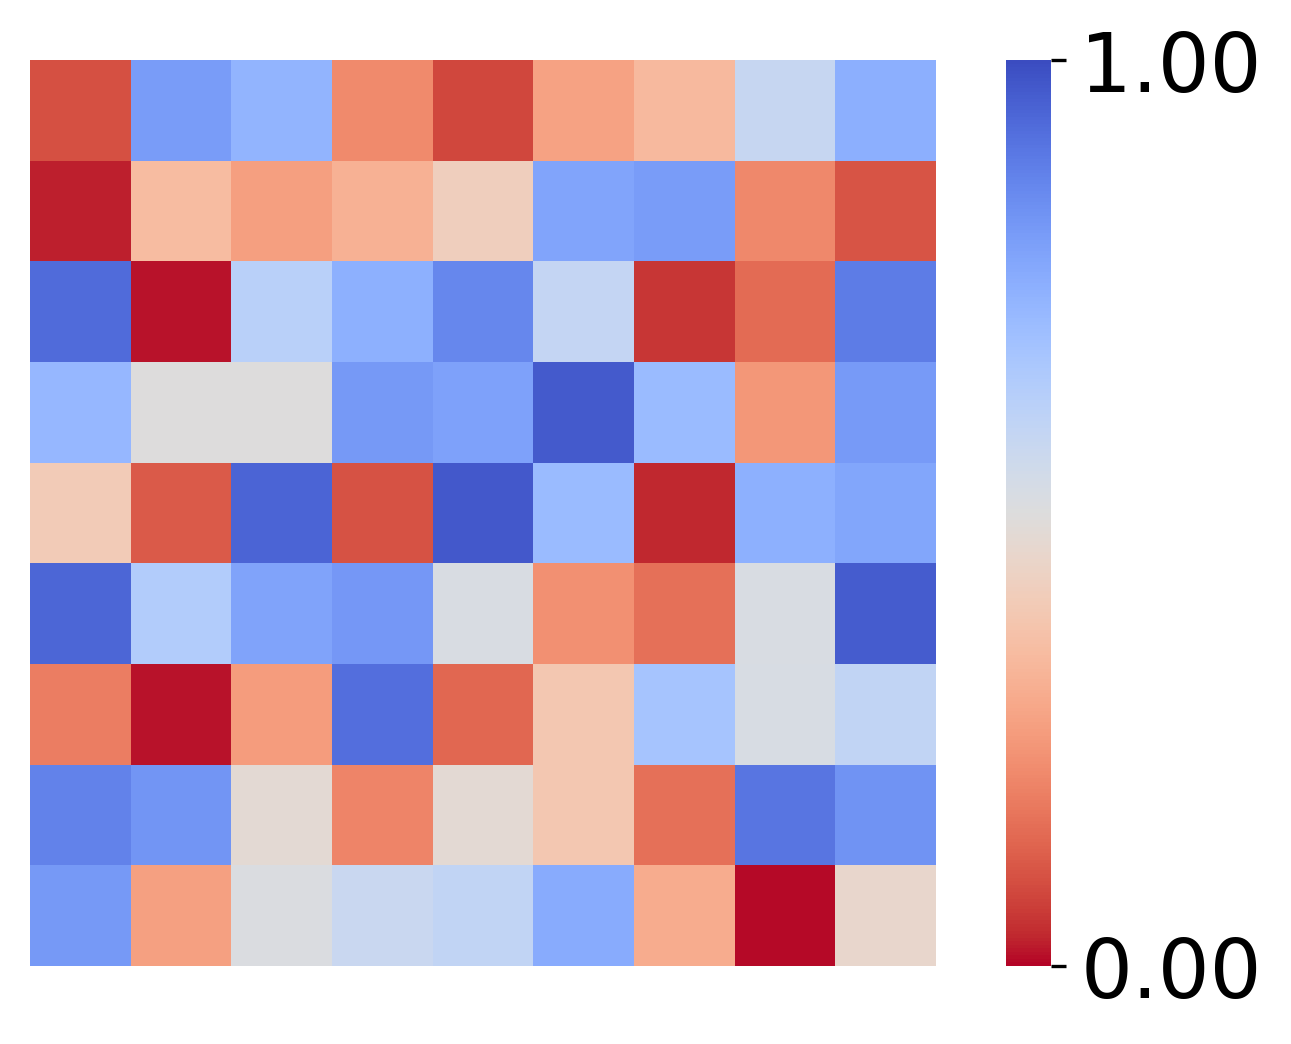

In [339]:
corr_fig, pvs_fig = compute_2D_correlation(random_obss_t1, random_obss_t2, effs_sorted, effs_sorted, "Observations Task 1", "Observations Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [340]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_random.svg'))

### Zeros Perturbations

In [341]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)


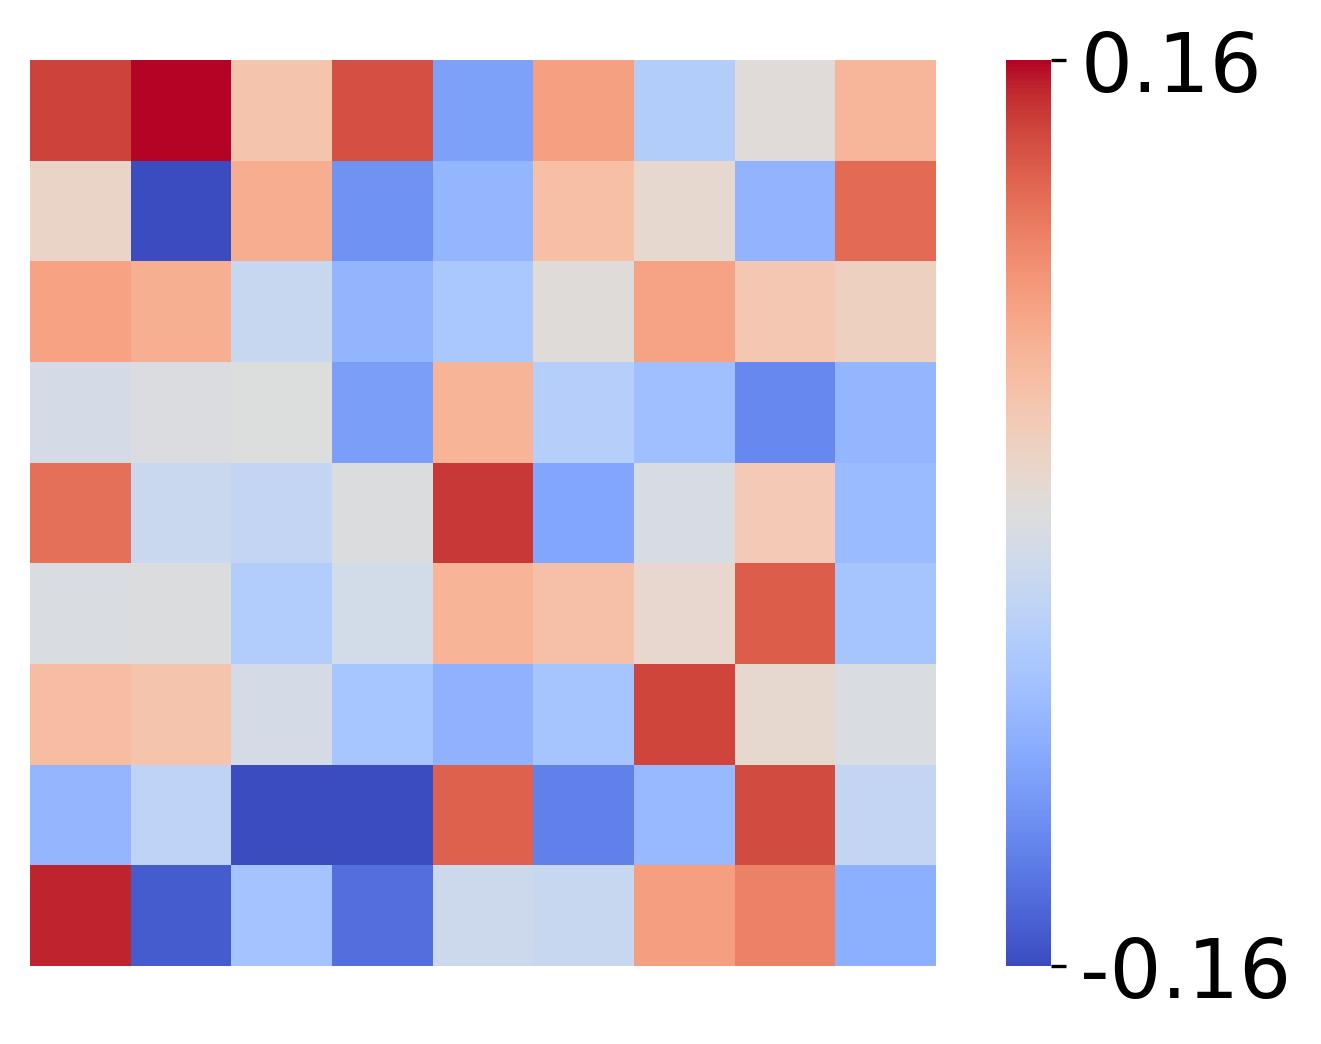

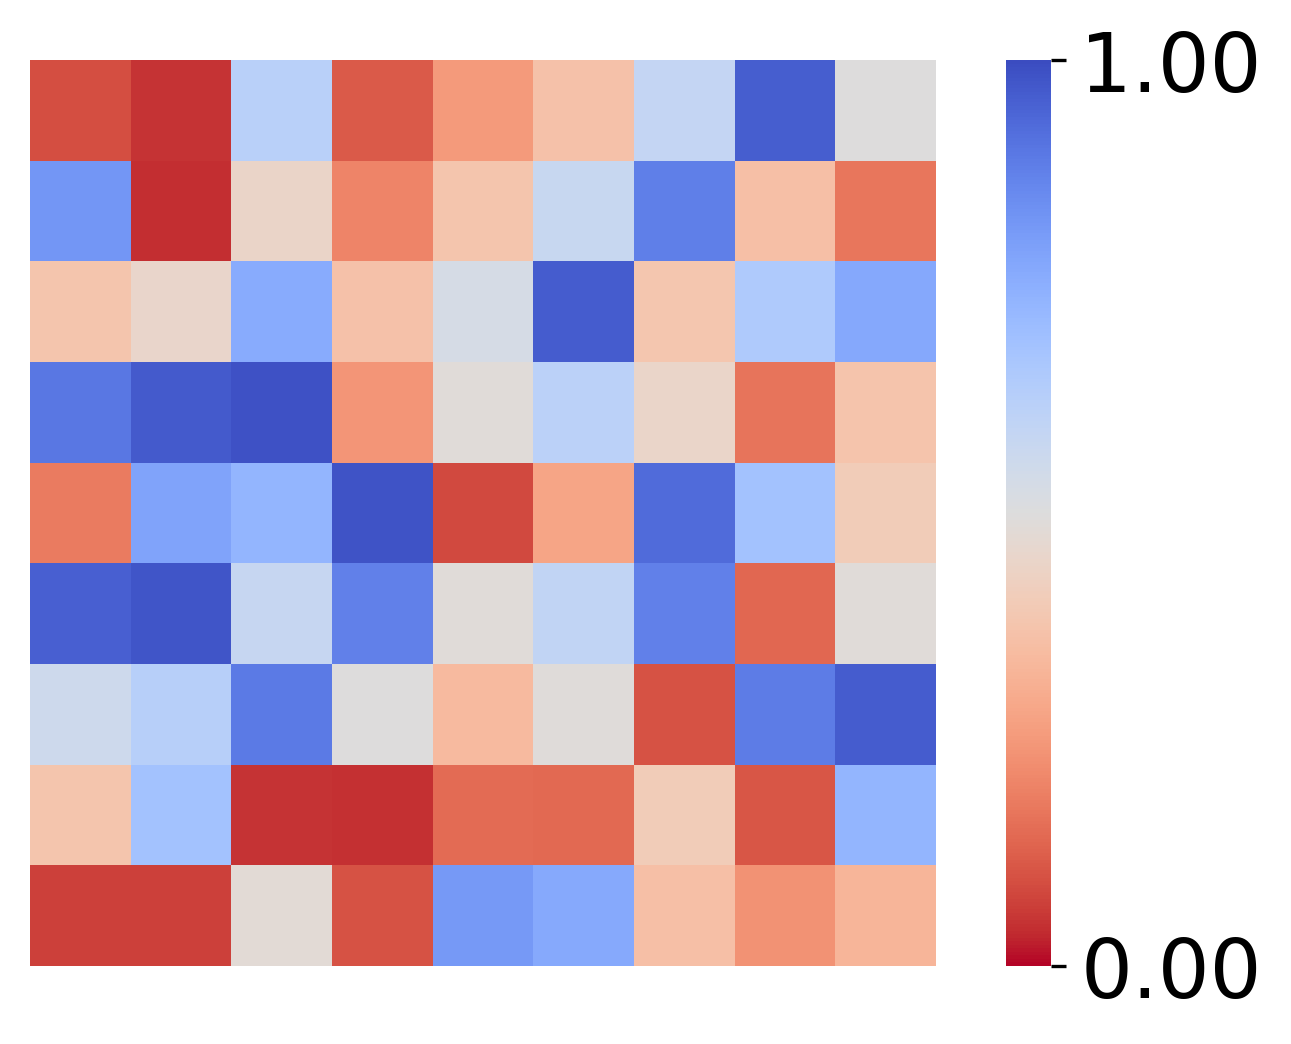

In [342]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_obss_t1, zeros_obss_t2, effs_sorted, effs_sorted, "Observations Task 1", "Observations Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [343]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_observes_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_observes_zeros.svg'))

### Stats 

In [ ]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices

data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[~df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values),)

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_sleeps_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values),)

data_obs_corr = data_obs_corr_g1
data_obs_pvs = data_obs_pvs_g1

data_rews_corr =data_rews_corr_g1
data_rews_pvs =data_rews_pvs_g1

data_sleeps_corr =data_sleeps_corr_g1
data_sleeps_pvs = data_sleeps_pvs_g1


sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss, sim_obss, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss, sim_rewss, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_2D_correlation_matrices(sim_sleepss, sim_sleepss, effs, effs,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss, random_obss, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss, random_rewss, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_2D_correlation_matrices(random_sleepss, random_sleepss, effs, effs,)


(86, 9)
(96, 9)
(86, 9)
(96, 9)
(86, 9)
          n         r          CI95%     p-val
pearson  86  0.032734  [-0.18, 0.24]  0.766157
          n         r          CI95%     p-val
pearson  86  0.052834  [-0.16, 0.26]  0.631064
          n         r         CI95%     p-val
pearson  86 -0.009397  [-0.22, 0.2]  0.931977
          n         r          CI95%     p-val
pearson  86 -0.099528  [-0.31, 0.12]  0.364796
          n         r          CI95%    p-val
pearson  86  0.066204  [-0.15, 0.28]  0.54718
          n         r          CI95%     p-val
pearson  86  0.059924  [-0.16, 0.27]  0.585906
          n        r          CI95%     p-val
pearson  86 -0.07809  [-0.29, 0.14]  0.477468
          n         r          CI95%     p-val
pearson  86  0.026437  [-0.19, 0.24]  0.810197
          n        r          CI95%     p-val
pearson  86 -0.11044  [-0.32, 0.11]  0.314313
          n        r          CI95%    p-val
pearson  86  0.04534  [-0.17, 0.26]  0.68031
          n         r          C

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

          n         r        CI95%     p-val
pearson  86  0.306725  [0.1, 0.49]  0.004301
          n         r          CI95%     p-val
pearson  86  0.083959  [-0.13, 0.29]  0.444898
          n         r         CI95%     p-val
pearson  86  0.090658  [-0.12, 0.3]  0.409284
          n         r         CI95%     p-val
pearson  86  0.226826  [0.01, 0.42]  0.036837
          n         r          CI95%     p-val
pearson  86  0.006776  [-0.21, 0.22]  0.950924
          n         r          CI95%     p-val
pearson  86  0.130755  [-0.08, 0.33]  0.232956
          n         r          CI95%     p-val
pearson  86  0.042519  [-0.17, 0.25]  0.699216
          n         r         CI95%     p-val
pearson  86  0.256328  [0.05, 0.45]  0.017887
          n         r          CI95%     p-val
pearson  86 -0.072264  [-0.28, 0.14]  0.511028
          n        r          CI95%     p-val
pearson  86  0.10495  [-0.11, 0.31]  0.339117
          n         r         CI95%     p-val
pearson  86  0.093472  [-0

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  96 -0.030703  [-0.23, 0.17]  0.767715
          n         r        CI95%     p-val
pearson  96  0.104314  [-0.1, 0.3]  0.314408
          n         r          CI95%     p-val
pearson  96  0.188167  [-0.01, 0.38]  0.067836
          n       r         CI95%     p-val
pearson  96  0.2623  [0.06, 0.44]  0.010232
          n         r        CI95%     p-val
pearson  96  0.202504  [0.0, 0.39]  0.049059
          n         r          CI95%    p-val
pearson  96  0.157177  [-0.05, 0.35]  0.12822
          n         r          CI95%     p-val
pearson  96  0.051484  [-0.15, 0.25]  0.620254
          n         r          CI95%     p-val
pearson  96 -0.018963  [-0.22, 0.18]  0.855274
          n         r          CI95%     p-val
pearson  96  0.113565  [-0.09, 0.31]  0.273169
          n         r        CI95%    p-val
pearson  96 -0.107857  [-0.3, 0.1]  0.29816
          n         r          CI95%     p-val
pearson  96  0.066626  [-0.14, 0.26

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

          n         r          CI95%     p-val
pearson  96 -0.032281  [-0.23, 0.17]  0.756144
          n         r          CI95%     p-val
pearson  96 -0.027118  [-0.23, 0.18]  0.794201
          n         r          CI95%     p-val
pearson  96 -0.082383  [-0.28, 0.12]  0.427378
          n         r          CI95%    p-val
pearson  96 -0.035366  [-0.24, 0.17]  0.73367
          n         r          CI95%     p-val
pearson  96 -0.043526  [-0.24, 0.16]  0.675348
(150, 9)
(150, 9)
(150, 9)
           n         r         CI95%         p-val
pearson  150  0.594518  [0.48, 0.69]  1.310298e-15
           n         r         CI95%         p-val
pearson  150  0.590884  [0.48, 0.69]  2.147276e-15
           n         r         CI95%         p-val
pearson  150  0.541338  [0.42, 0.65]  1.017421e-12
           n         r        CI95%         p-val
pearson  150  0.488879  [0.36, 0.6]  2.518721e-10
           n         r         CI95%         p-val
pearson  150  0.432578  [0.29, 0.55]  3.600805e-

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

           n         r         CI95%         p-val
pearson  150  0.573901  [0.46, 0.67]  1.994453e-14
           n         r         CI95%         p-val
pearson  150  0.512683  [0.38, 0.62]  2.319890e-11
           n         r         CI95%         p-val
pearson  150  0.462976  [0.33, 0.58]  2.762930e-09
           n         r         CI95%         p-val
pearson  150  0.407187  [0.26, 0.53]  2.555319e-07
           n         r         CI95%     p-val
pearson  150  0.318615  [0.17, 0.46]  0.000075
           n       r         CI95%     p-val
pearson  150  0.1438  [-0.02, 0.3]  0.080184
           n         r         CI95%     p-val
pearson  150  0.061875  [-0.1, 0.22]  0.453474
           n         r         CI95%     p-val
pearson  150  0.035636  [-0.13, 0.2]  0.666132
           n         r         CI95%         p-val
pearson  150  0.573203  [0.45, 0.67]  2.179807e-14
           n         r         CI95%         p-val
pearson  150  0.593725  [0.48, 0.69]  1.460256e-15
           n    

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%         p-val
pearson  150 -0.866948  [-0.9, -0.82]  2.644621e-46
           n        r           CI95%         p-val
pearson  150 -0.81967  [-0.87, -0.76]  2.152264e-37
           n         r           CI95%         p-val
pearson  150 -0.802117  [-0.85, -0.74]  9.950104e-35
           n         r           CI95%         p-val
pearson  150 -0.821228  [-0.87, -0.76]  1.209244e-37
           n         r           CI95%         p-val
pearson  150 -0.828507  [-0.87, -0.77]  7.572044e-39
           n        r           CI95%         p-val
pearson  150 -0.83056  [-0.87, -0.77]  3.384100e-39
(150, 9)
(150, 9)
(150, 9)
           n         r         CI95%     p-val
pearson  150 -0.056772  [-0.22, 0.1]  0.491637
           n        r          CI95%    p-val
pearson  150  0.08497  [-0.08, 0.24]  0.30286
           n         r          CI95%     p-val
pearson  150  0.073523  [-0.09, 0.23]  0.372868
           n         r          CI95%     p-val
pearson  150 

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

           n         r         CI95%    p-val
pearson  150 -0.044331  [-0.2, 0.12]  0.59138
           n         r         CI95%     p-val
pearson  150 -0.065689  [-0.22, 0.1]  0.426068
           n       r          CI95%     p-val
pearson  150  0.0088  [-0.15, 0.17]  0.915174
           n         r           CI95%     p-val
pearson  150 -0.178974  [-0.33, -0.02]  0.028968
           n         r          CI95%     p-val
pearson  150  0.008038  [-0.15, 0.17]  0.922491
           n         r          CI95%     p-val
pearson  150  0.013935  [-0.15, 0.17]  0.866054
           n         r        CI95%     p-val
pearson  150  0.165488  [0.0, 0.32]  0.043701
           n         r          CI95%     p-val
pearson  150  0.004951  [-0.16, 0.17]  0.952211
           n         r          CI95%     p-val
pearson  150 -0.095535  [-0.25, 0.07]  0.246464
           n         r          CI95%    p-val
pearson  150 -0.151717  [-0.31, 0.01]  0.06474
           n         r          CI95%     p-val
pearso

/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

           n         r          CI95%     p-val
pearson  150 -0.131954  [-0.29, 0.03]  0.108678
           n         r          CI95%     p-val
pearson  150  0.005507  [-0.16, 0.17]  0.946858
           n        r          CI95%     p-val
pearson  150 -0.08738  [-0.24, 0.07]  0.289302
           n         r          CI95%     p-val
pearson  150  0.081938  [-0.08, 0.24]  0.320498
           n         r          CI95%     p-val
pearson  150  0.023141  [-0.14, 0.18]  0.779379
           n        r          CI95%     p-val
pearson  150 -0.00175  [-0.16, 0.16]  0.983097
           n         r          CI95%     p-val
pearson  150 -0.052103  [-0.21, 0.11]  0.527996


/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pvs_matrix[i, j] = stats['p-val']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:535: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr_matrix[i, j] = stats['r']
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_behavioral_analysis.py:536: FutureWarning: Calling float on a single element Series is deprec

In [ ]:
competitive_corr_regression((data_obs_corr), [(sim_obs_corr), (random_obs_corr)], do_fisher_transform=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     36.96
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           5.12e-12
Time:                        13:05:06   Log-Likelihood:                 68.441
No. Observations:                  81   AIC:                            -130.9
Df Residuals:                      78   BIC:                            -123.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5901      0.059     10.005      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data_obs_corr.reshape((1,-1)), sim_obs_corr.reshape((1,-1)))[0][0])
print(cosine_similarity(data_obs_corr.reshape((1,-1)), random_obs_corr.reshape((1,-1)))[0][0])

0.9988609111081276
0.20657378519007213


## Panel G: Across-Task Rewards
### Humans

In [344]:
from human_utils_project import get_clean_data

group = None

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='outer', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_day3['group'] = False
/home/kai/Documents/Projects/HumanObserveBetEfficacyAnalysis/human_utils_project.py:1281: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

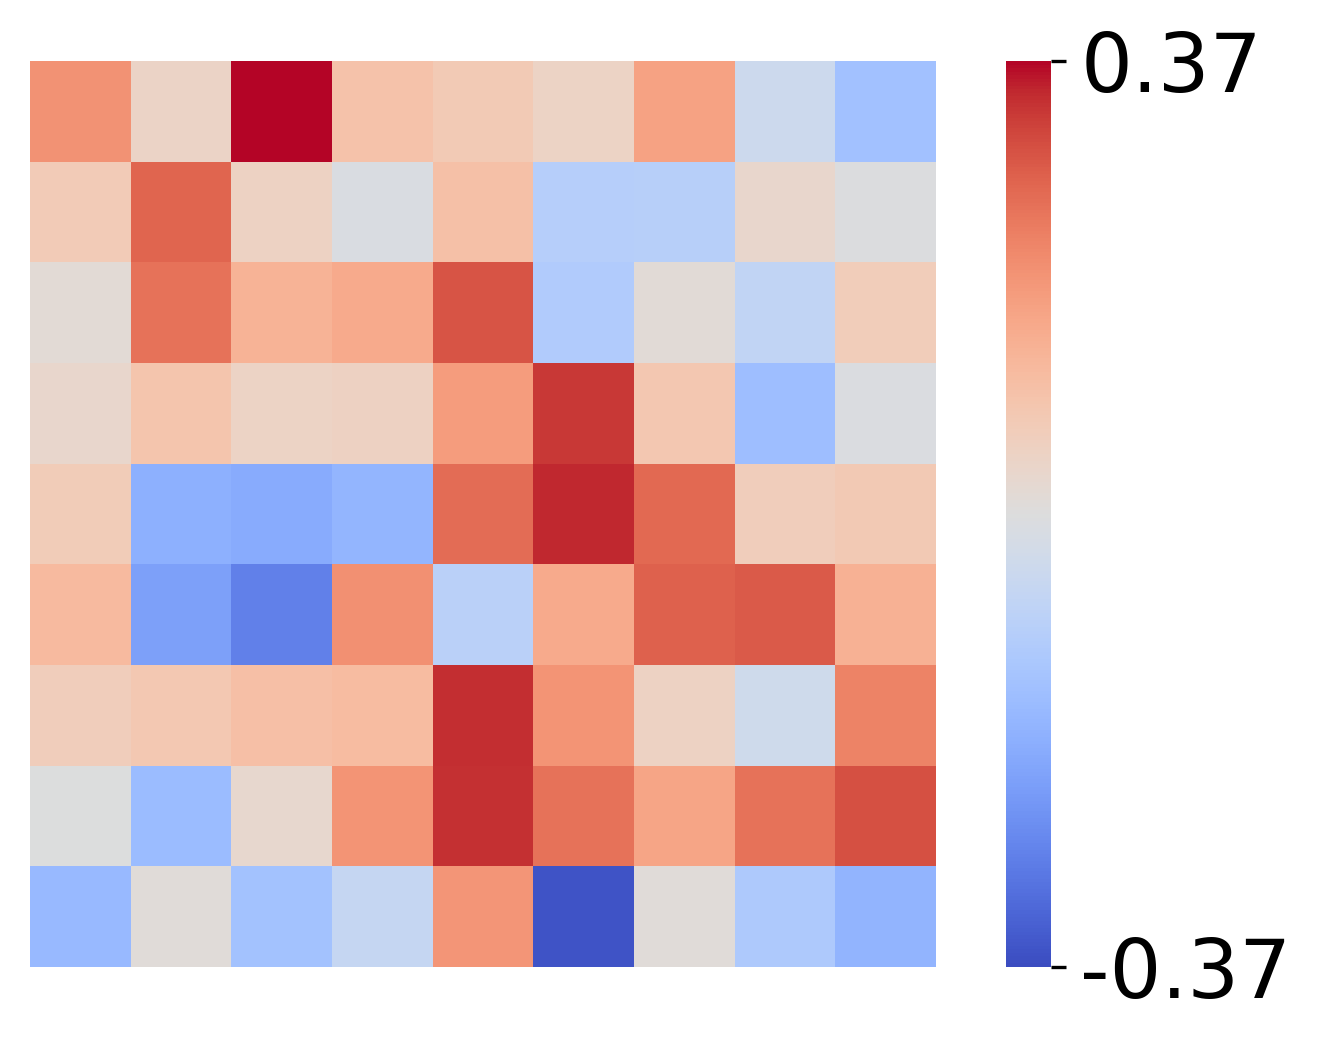

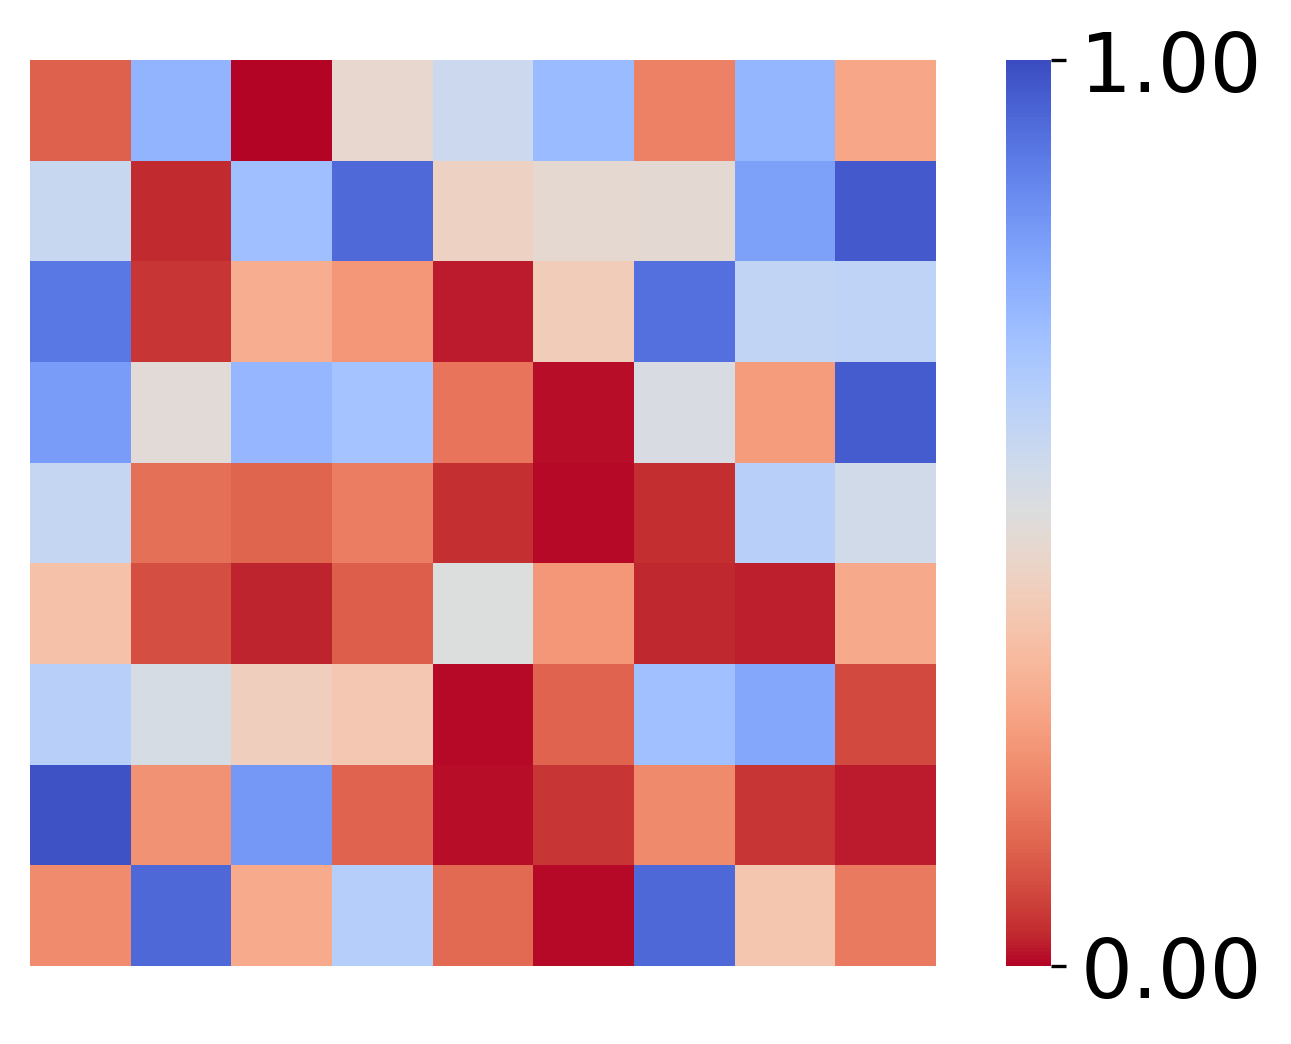

In [345]:
from human_utils_behavioral_analysis import compute_2D_correlation

corr_fig, pvs_fig = compute_2D_correlation(df['rewards_tallies_day2'], df['rewards_tallies_day3'], df['effs_day2'], df['effs_day3'], "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [346]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_humans.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_humans.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_humans.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_humans.svg'))

### Trait-level Perturbations

In [347]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

sim_rewss_t1, sim_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss_t1 = sim_rewss_t1.mean(axis=0)
sim_obss_t1 = sim_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
sim_rewss_t1 = np.flip(sim_rewss_t1.T, axis=1)
sim_obss_t1 = np.flip(sim_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs_sorted = effs = np.arange(0, 1.01, 0.125)

sim_rewss_t2, sim_obss_t2, sim_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss_t2 = sim_rewss_t2.mean(axis=0)
sim_obss_t2 = sim_obss_t2.mean(axis=0)
sim_sleepss_t2 = sim_sleepss_t2.mean(axis=0)


## correcting for switching from tau to efficacy
sim_rewss_t2 = np.flip(sim_rewss_t2.T, axis=1)
sim_obss_t2 = np.flip(sim_obss_t2.T, axis=1)
sim_sleepss_t2 = np.flip(sim_sleepss_t2.T, axis=1)

(150, 9)


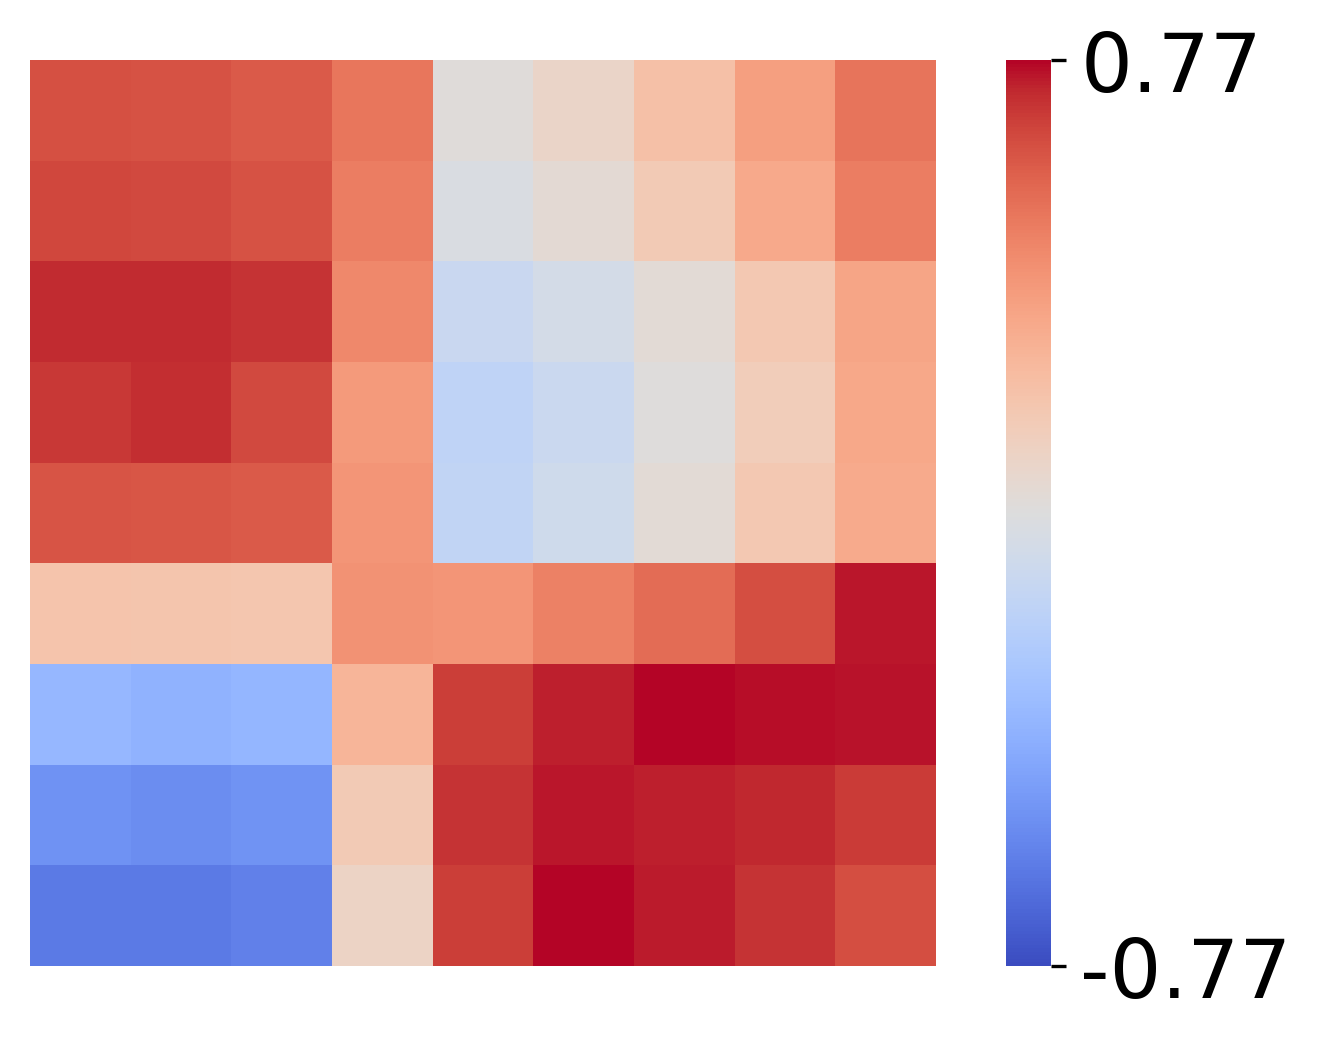

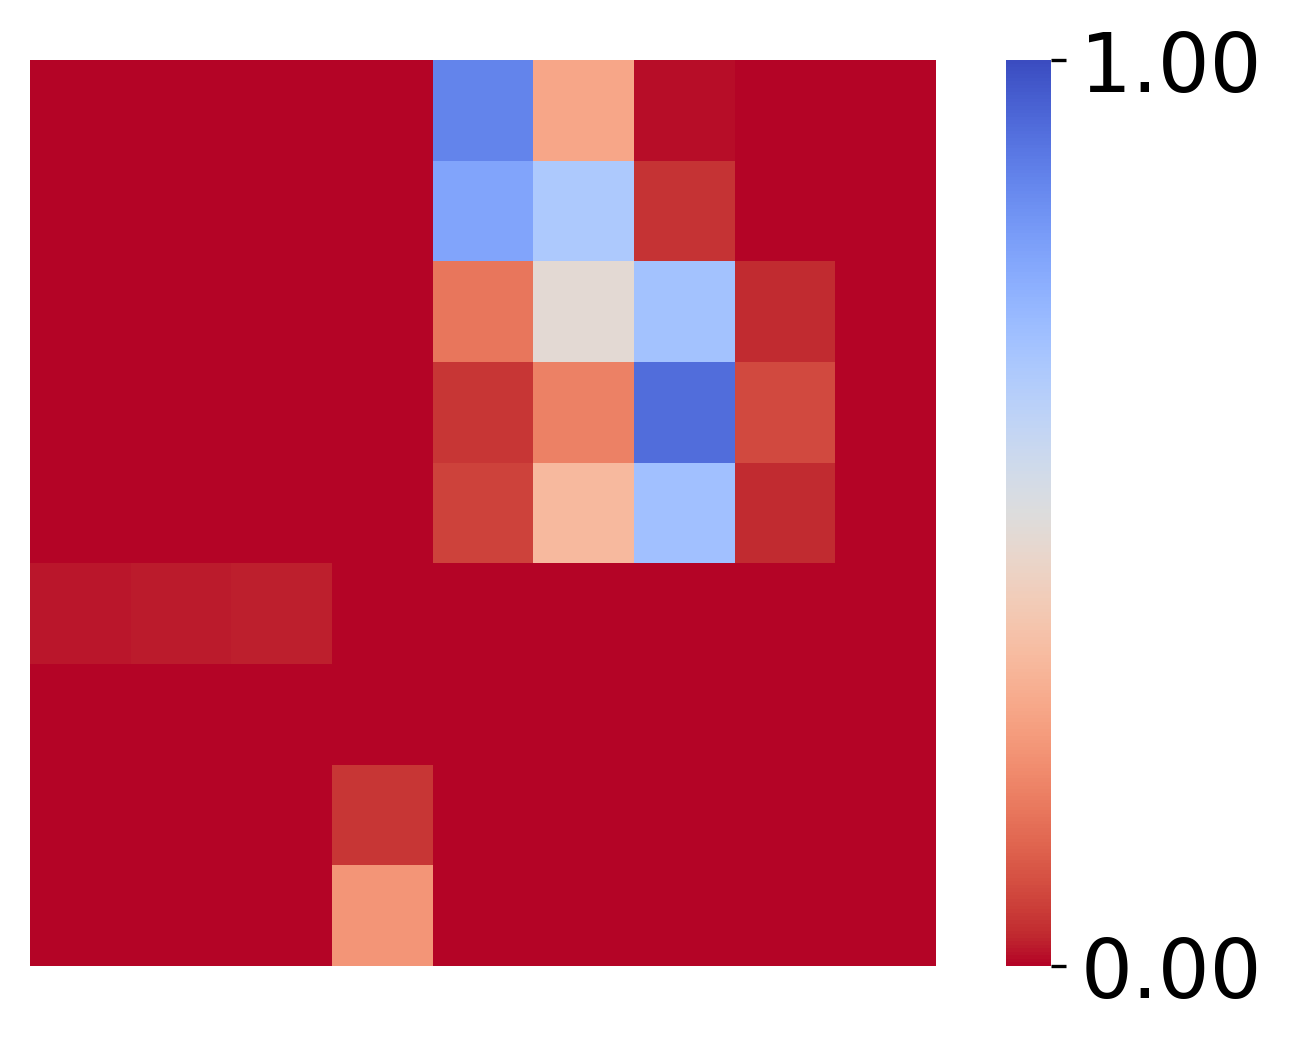

In [348]:
corr_fig, pvs_fig = compute_2D_correlation(sim_rewss_t1, sim_rewss_t2, effs_sorted, effs_sorted, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [349]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_trait.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_trait.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_trait.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_trait.svg'))

### Random Perturbations

In [350]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t1 as sim_timestamp

random_rewss_t1, random_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

random_rewss_t1 = random_rewss_t1.mean(axis=0)
random_obss_t1 = random_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t1 = np.flip(random_rewss_t1.T, axis=1)
random_obss_t1 = np.flip(random_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import random_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import random_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

random_rewss_t2, random_obss_t2, random_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## post-hoc adjustment to get rid of relationship across tasks - TODO: resample cleanly
rng = np.random.default_rng()
random_rewss_t2 = rng.permuted(random_rewss_t2, axis=-1)
random_obss_t2 = rng.permuted(random_obss_t2, axis=-1)
random_sleepss_t2 = rng.permuted(random_sleepss_t2, axis=-1)

random_rewss_t2 = random_rewss_t2.mean(axis=0)
random_obss_t2 = random_obss_t2.mean(axis=0)
random_sleepss_t2 = random_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
random_rewss_t2 = np.flip(random_rewss_t2.T, axis=1)
random_obss_t2 = np.flip(random_obss_t2.T, axis=1)
random_sleepss_t2 = np.flip(random_sleepss_t2.T, axis=1)

(150, 9)


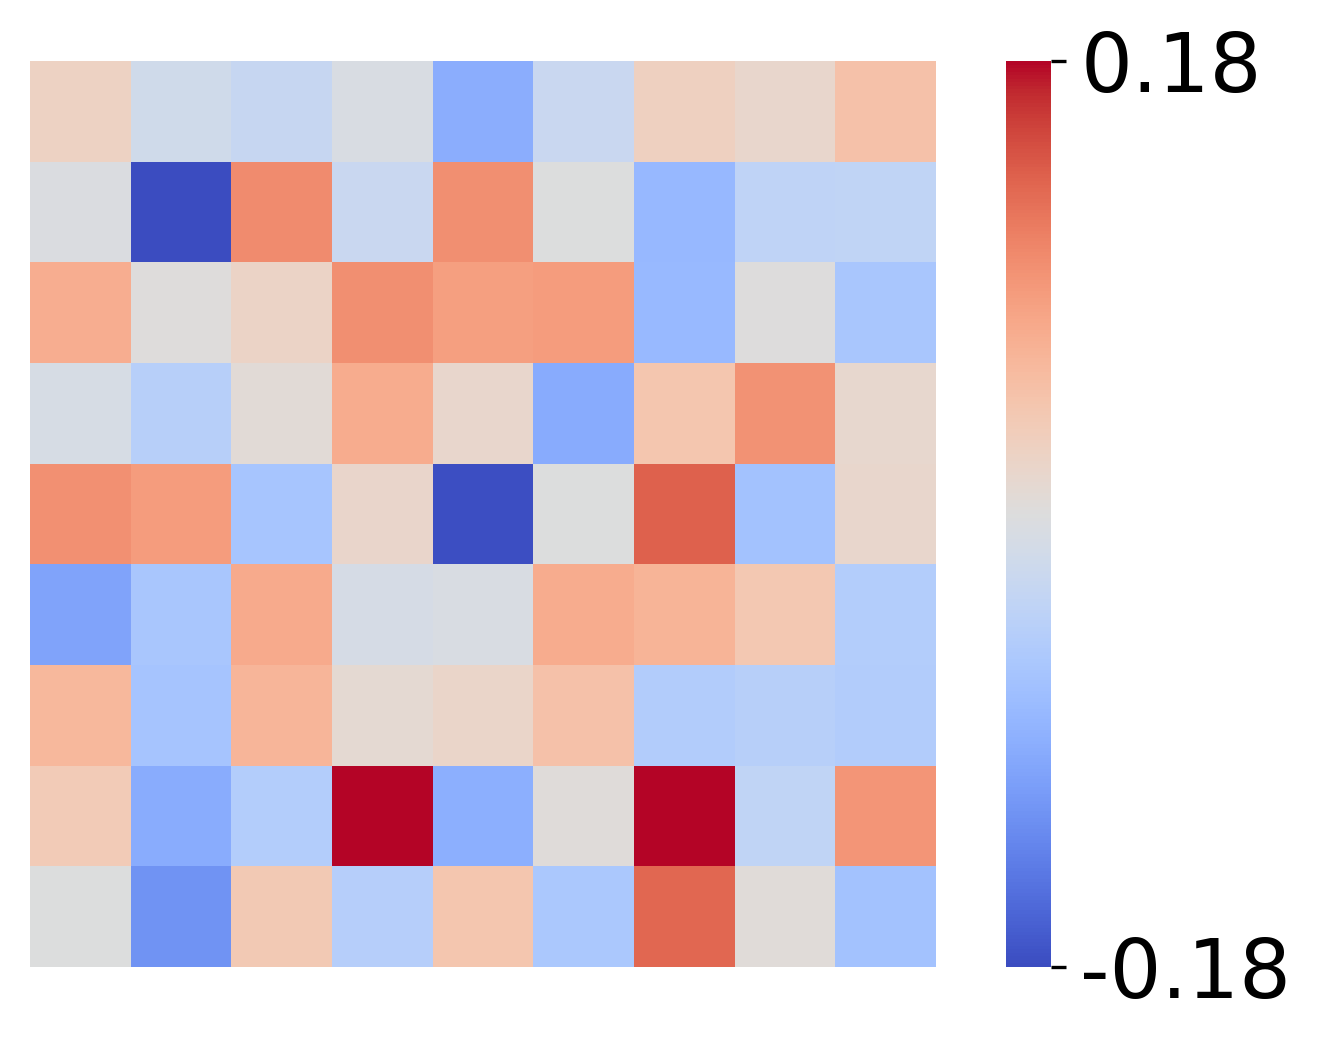

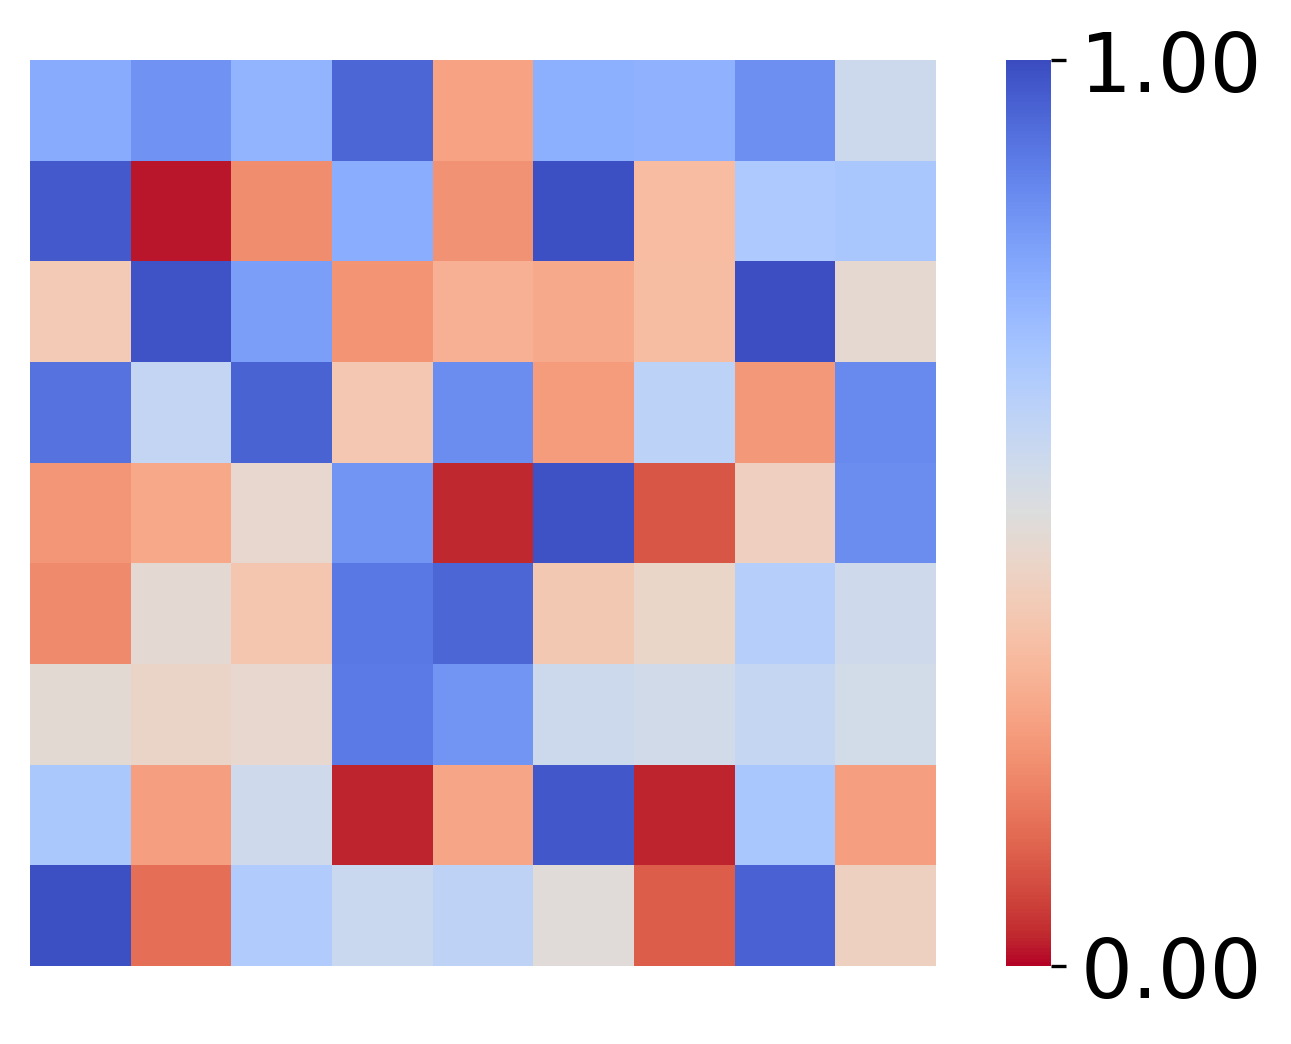

In [351]:
corr_fig, pvs_fig = compute_2D_correlation(random_rewss_t1, random_rewss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [352]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_random.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_random.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_random.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_random.svg'))

### Zeros Perturbation

In [353]:
from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models

from settings_anal import zeros_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t1 as sim_timestamp

zeros_rewss_t1, zeros_obss_t1, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)

zeros_rewss_t1 =zeros_rewss_t1.mean(axis=0)
zeros_obss_t1 = zeros_obss_t1.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t1 = np.flip(zeros_rewss_t1.T, axis=1)
zeros_obss_t1 = np.flip(zeros_obss_t1.T, axis=1)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import zeros_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import zeros_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)
effs_sorted = np.arange(0, 1.01, 0.125)

zeros_rewss_t2, zeros_obss_t2,zeros_sleepss_t2 = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)

## TODO: Check to make sure this is no longer necessary
rng = np.random.default_rng()
zeros_rewss_t2 = rng.permuted(zeros_rewss_t2, axis=-1)
zeros_obss_t2 = rng.permuted(zeros_obss_t2, axis=-1)
zeros_sleepss_t2 = rng.permuted(zeros_sleepss_t2, axis=-1)

zeros_rewss_t2 = zeros_rewss_t2.mean(axis=0)
zeros_obss_t2 = zeros_obss_t2.mean(axis=0)
zeros_sleepss_t2 = zeros_sleepss_t2.mean(axis=0)

## correcting for switching from tau to efficacy
zeros_rewss_t2 = np.flip(zeros_rewss_t2.T, axis=1)
zeros_obss_t2 = np.flip(zeros_obss_t2.T, axis=1)
zeros_sleepss_t2 = np.flip(zeros_sleepss_t2.T, axis=1)

(150, 9)


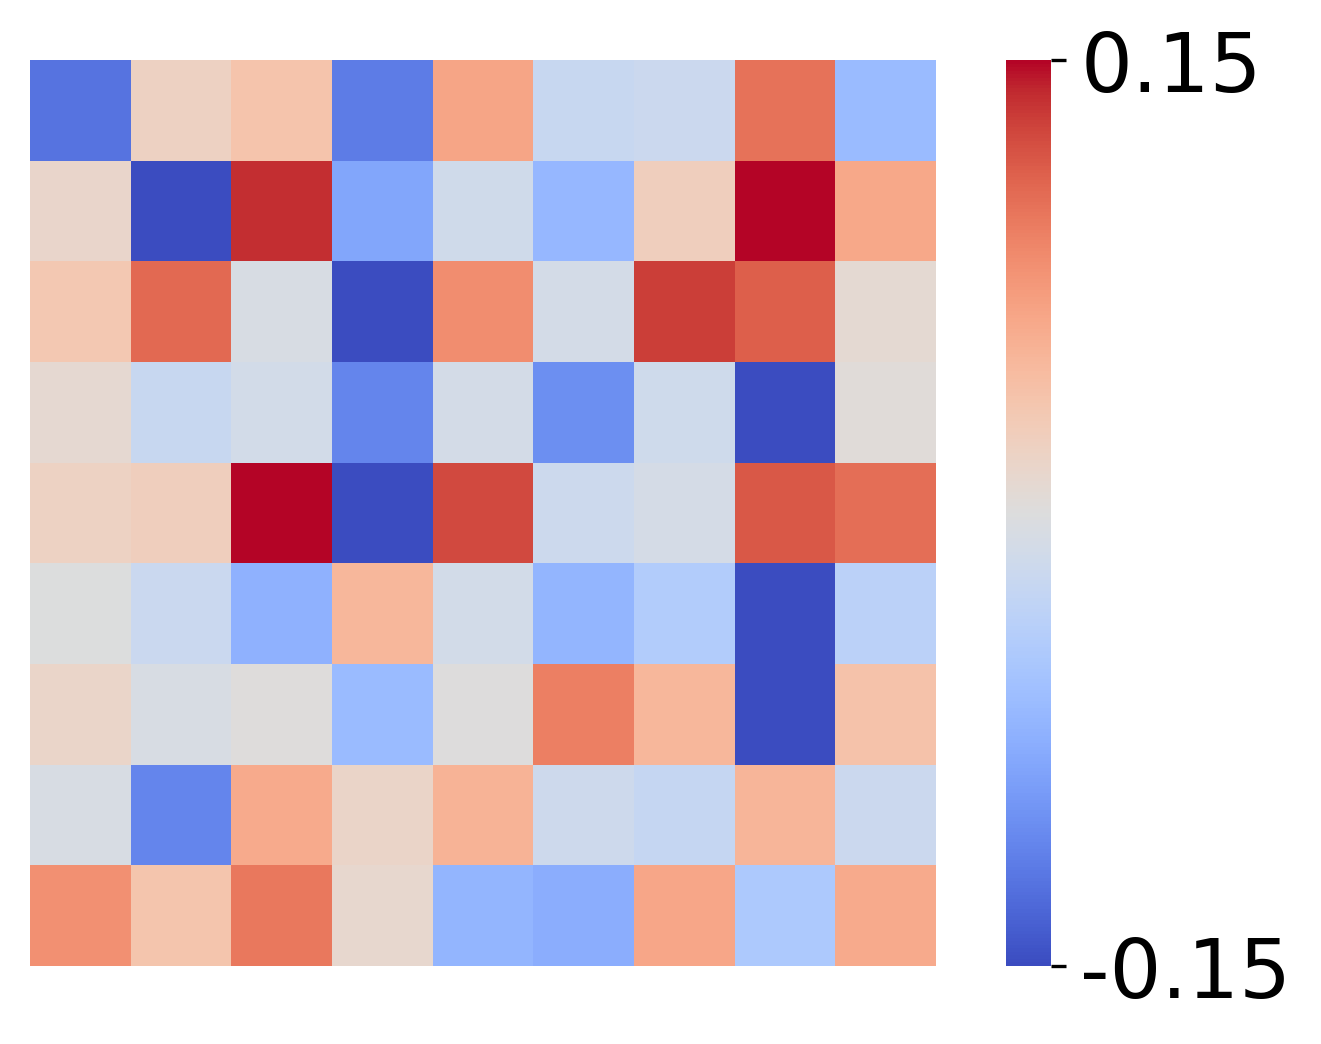

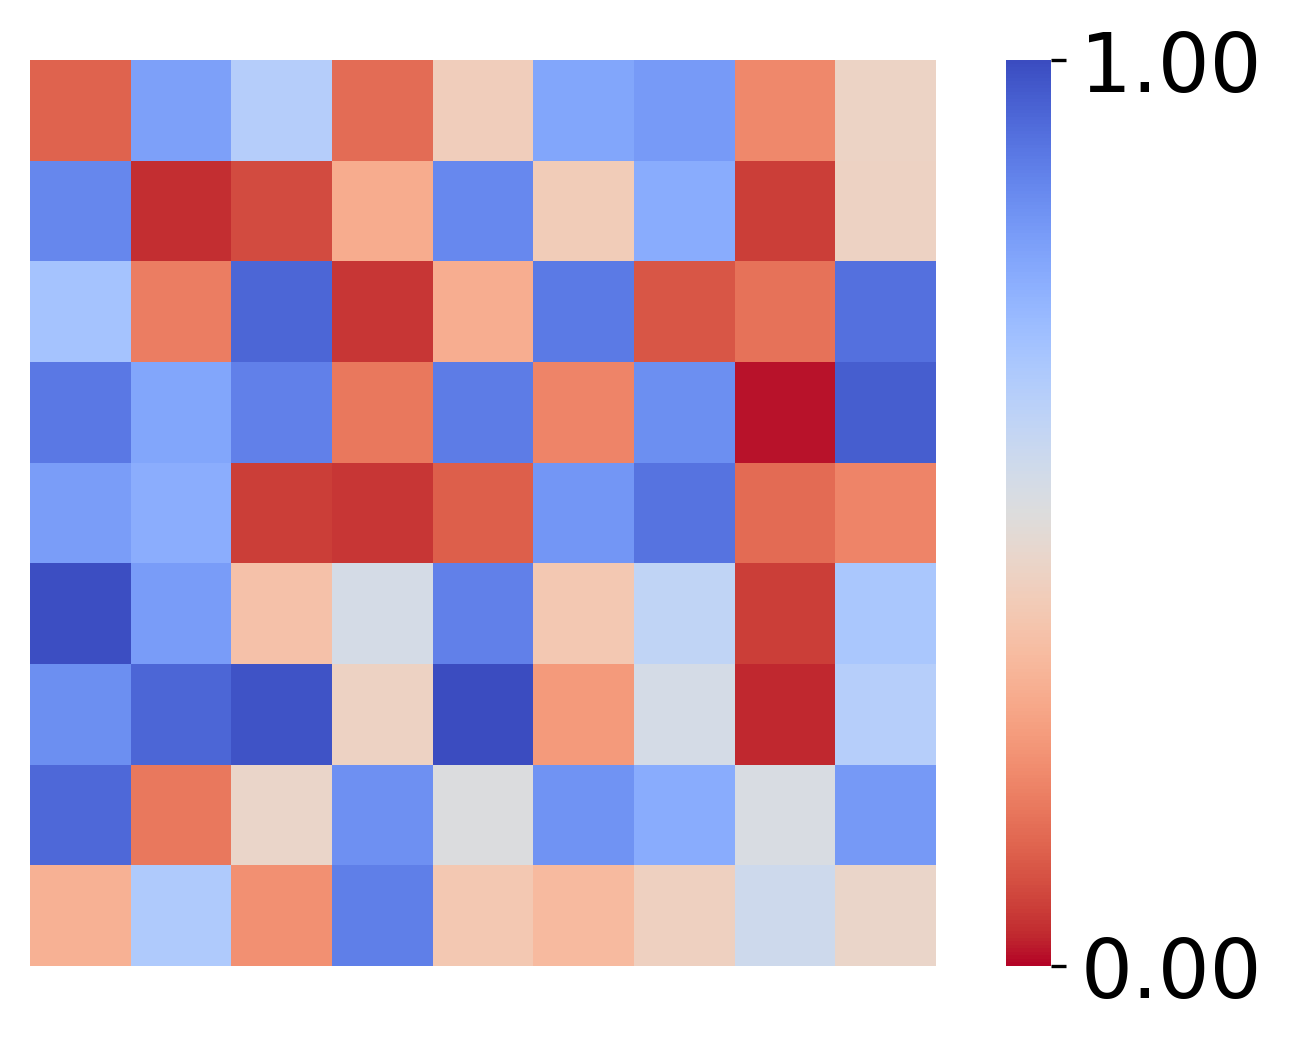

In [354]:
corr_fig, pvs_fig = compute_2D_correlation(zeros_rewss_t1, zeros_rewss_t2, effs, effs, "Rewards Task 1", "Rewards Task 2", annot=False, resize_colorbar=True, square=square, axes_off=axes_off, font_size_multiplier=1.4)

In [355]:
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_zeros.png'))
corr_fig.savefig(os.path.join(analysis_folder, 'corrs_across_rewards_zeros.svg'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_zeros.png'))
pvs_fig.savefig(os.path.join(analysis_folder, 'pvs_across_rewards_zeros.svg'))

### Stats

In [356]:
from human_utils_behavioral_analysis import compute_2D_correlation_matrices, compute_partial_2D_correlation_matrices

## day 2
data_obs_corr_g1, data_obs_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_obs_corr_g2, data_obs_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_rews_corr_g1, data_rews_pvs_g1 = compute_2D_correlation_matrices(np.stack(df[~df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[~df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day3']]['effs_day3'].values),)
data_rews_corr_g2, data_rews_pvs_g2 = compute_2D_correlation_matrices(np.stack(df[df['group_day2']]['rewards_tallies_day2'].values), np.stack(df[df['group_day2']]['rewards_tallies_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day3']]['effs_day3'].values),)

data_obs_corr = (~df['group_day2']).sum() / len(df) * data_obs_corr_g1 + (df['group_day2']).sum() / len(df) * data_obs_corr_g2
data_obs_pvs = (~df['group_day2']).sum() / len(df) * data_obs_pvs_g1 + (df['group_day2']).sum() / len(df) * data_obs_pvs_g2

data_rews_corr = (~df['group_day2']).sum() / len(df) * data_rews_corr_g1 + (df['group_day2']).sum() / len(df) * data_rews_corr_g2
data_rews_pvs = (~df['group_day2']).sum() / len(df) * data_rews_pvs_g1 + (df['group_day2']).sum() / len(df) * data_rews_pvs_g2

data_sleeps_corr_g1, data_sleeps_pvs_g1 = compute_partial_2D_correlation_matrices(np.stack(df[~df['group_day2']]['n_observes_day2'].values), np.stack(df[~df['group_day2']]['n_sleeps_day3'].values), np.stack(df[~df['group_day2']]['n_observes_day3'].values), np.stack(df[~df['group_day2']]['effs_day2'].values), np.stack(df[~df['group_day2']]['effs_day3'].values), np.stack(df[~df['group_day2']]['effs_day3'].values),)
data_sleeps_corr_g2, data_sleeps_pvs_g2 = compute_partial_2D_correlation_matrices(np.stack(df[df['group_day2']]['n_observes_day2'].values), np.stack(df[df['group_day2']]['n_sleeps_day3'].values), np.stack(df[df['group_day2']]['n_observes_day3'].values), np.stack(df[df['group_day2']]['effs_day2'].values), np.stack(df[df['group_day2']]['effs_day3'].values),np.stack(df[df['group_day2']]['effs_day3'].values), )

data_sleeps_corr = (~df['group_day2']).sum() / len(df) * data_sleeps_corr_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_corr_g2
data_sleeps_pvs = (~df['group_day2']).sum() / len(df) * data_sleeps_pvs_g1 + (df['group_day2']).sum() / len(df) * data_sleeps_pvs_g2

sim_obs_corr, sim_obs_pvs = compute_2D_correlation_matrices(sim_obss_t1, sim_obss_t2, effs, effs,)
sim_rews_corr, sim_rews_pvs = compute_2D_correlation_matrices(sim_rewss_t1, sim_rewss_t2, effs, effs,)
sim_sleeps_corr, sim_sleeps_pvs = compute_partial_2D_correlation_matrices(sim_obss_t1, sim_sleepss_t2, sim_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)
random_obs_corr, random_obs_pvs = compute_2D_correlation_matrices(random_obss_t1, random_obss_t2, effs, effs,)
random_rews_corr, random_rews_pvs = compute_2D_correlation_matrices(random_rewss_t1, random_rewss_t2, effs, effs,)
random_sleeps_corr, random_sleeps_pvs = compute_partial_2D_correlation_matrices(random_obss_t1, random_sleepss_t2, random_obss_t2, effs_sorted, effs_sorted, effs_sorted, semi=False,)

(60, 9)


ValueError: need at least one array to stack

In [ ]:
from human_utils_behavioral_analysis import competitive_corr_regression

competitive_corr_regression((data_rews_corr), [(sim_rews_corr), (random_rews_corr)])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     7.586
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           0.000976
Time:                        13:05:15   Log-Likelihood:                 69.305
No. Observations:                  81   AIC:                            -132.6
Df Residuals:                      78   BIC:                            -125.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0623      0.015      4.170      0.0

#### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(data_rews_corr.reshape((1,-1)), sim_rews_corr.reshape((1,-1)))[0][0])
print(cosine_similarity(data_rews_corr.reshape((1,-1)), random_rews_corr.reshape((1,-1)))[0][0])

0.6402540131757728
0.08575682770207425


## Panel H: Aggregated Similarities Bar Plot

In [357]:
from human_utils_behavioral_analysis import upper_tri_masking
from human_utils_behavioral_analysis import compute_2D_correlation_matrices, compute_partial_2D_correlation_matrices
from sklearn.utils import resample

def combine_group_correlation_matrices(values, effs, groups, values2 = None, effs2 = None, covar = None, effs_covar = None):
    if values2 is None:
        values2 = values.copy()
    if effs2 is None:
        effs2 = effs.copy()

    if covar is None:
        data_corr_g1, data_pvs_g1 = compute_2D_correlation_matrices(np.stack(values[~groups].values), np.stack(values2[~groups].values), np.stack(effs[~groups].values), np.stack(effs2[~groups].values),)
        data_corr_g2, data_pvs_g2 = compute_2D_correlation_matrices(np.stack(values[groups].values), np.stack(values2[groups].values), np.stack(effs[groups].values), np.stack(effs[groups].values),)    
    else:
        data_corr_g1, data_pvs_g1 = compute_partial_2D_correlation_matrices(np.stack(values[~groups].values), np.stack(values2[~groups].values), np.stack(covar[~groups].values), np.stack(effs[~groups].values), np.stack(effs2[~groups].values), np.stack(effs_covar[~groups].values))
        data_corr_g2, data_pvs_g2 = compute_partial_2D_correlation_matrices(np.stack(values[groups].values), np.stack(values2[groups].values), np.stack(covar[groups].values), np.stack(effs[groups].values), np.stack(effs[groups].values), np.stack(effs_covar[groups].values))

    data_corr = (~groups).sum() / len(df) * data_corr_g1 + (groups).sum() / len(df) * data_corr_g2
    data_pvs = (~groups).sum() / len(df) * data_pvs_g1 + (groups).sum() / len(df) * data_pvs_g2

    return data_corr, data_pvs

def compute_cosine_similarity(a, b, upper_tri = True):
    from sklearn.metrics.pairwise import cosine_similarity
    if upper_tri:
        a = upper_tri_masking(a)
        b = upper_tri_masking(b)
    return cosine_similarity(a.reshape((1,-1)), b.reshape((1,-1)))[0][0]

def compute_resampled_cosine_similarity(item, groups, item_effs,  comparison, item2=None, item2_effs = None, comparison2 = None, covar=None, effs_covar=None, comparison_covar = None, effs = np.arange(0, 1.01, 0.125), n_iterations = 100, upper_tri = True):

    if comparison2 is None:
        comparison2 = comparison.copy()

    bootstrapped_cos_sims = []
    for _ in range(n_iterations):
        indicesA = item.index
        #indicesB = item.index[np.where(groups == True)[0]]

        bootstrapped_indicesA = resample(indicesA, replace=True, n_samples=len(indicesA))
        #bootstrapped_indicesB = resample(indicesB, replace=False, n_samples=len(indicesB))
        bootstrapped_indices = np.sort(bootstrapped_indicesA)

        #bootstrapped_indices_comparison = resample(np.arange(len(comparison)), replace=True, n_samples=len(comparison))

        if item2 is not None:
            print(item)
            print(item2)
            item2_subindexed = item2.loc[bootstrapped_indices].copy()
        else:
            item2 = item
            item2_subindexed = item2
        if covar is not None:
            covar_subindexed = covar.loc[bootstrapped_indices].copy()
        else:
            covar_subindexed = covar
        if effs_covar is not None:
            effs_covar_subindexed = effs_covar.loc[bootstrapped_indices].copy()
        else:
            effs_covar_subindexed = effs_covar
        if item2_effs is not None:
            item2_effs_subindexed = item2_effs.loc[bootstrapped_indices].copy()
        else:
            item2_effs = item_effs
            item2_effs_subindexed = item2_effs

        #bootstrapped_data_corr, bootstrapped_data_pvs = combine_group_correlation_matrices(item.loc[bootstrapped_indices], df.loc[bootstrapped_indices, 'effs_day2'], df.loc[bootstrapped_indices, 'group_day2'].values)
        #bootstrapped_data_corr, bootstrapped_data_pvs = combine_group_correlation_matrices(item.loc[bootstrapped_indices], item_effs.loc[bootstrapped_indices], groups.loc[bootstrapped_indices], covar=covar_subindexed, effs_covar=effs_covar_subindexed, values2=item2_subindexed, effs2 = item2_effs_subindexed)
        #print(item, item2, effs)
        bootstrapped_data_corr, bootstrapped_data_pvs = compute_2D_correlation_matrices(np.stack(item.loc[bootstrapped_indices].values), np.stack(item2.loc[bootstrapped_indices].values), np.stack(item_effs.loc[bootstrapped_indices].values), np.stack(item2_effs.loc[bootstrapped_indices].values))
        if comparison_covar is None:
            #bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_2D_correlation_matrices(comparison[bootstrapped_indices_comparison], comparison2[bootstrapped_indices_comparison], effs, effs)
            bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_2D_correlation_matrices(comparison, comparison2, effs, effs)
        else:
            #bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_partial_2D_correlation_matrices(comparison[bootstrapped_indices_comparison], comparison2[bootstrapped_indices_comparison], comparison_covar[bootstrapped_indices_comparison], effs, effs, effs)
            bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_partial_2D_correlation_matrices(comparison, comparison2, comparison_covar, effs, effs, effs)

        bootstrapped_cos_sim = compute_cosine_similarity(bootstrapped_data_corr, bootstrapped_comp_corr, upper_tri = upper_tri)
        bootstrapped_cos_sims.append(bootstrapped_cos_sim)
    return bootstrapped_cos_sims


In [358]:

%%capture

n_iterations = 100

rows = []

### TASK 1
#for item_name, item, comparisons in zip(['Obs', 'Rews'], [df['n_observes_day2'], df['rewards_tallies_day2']], [[sim_obss_t1, random_obss_t1], [sim_rewss_t1, random_rewss_t1]]):
for item_name, item, comparisons in zip(['Rews','Obs', ], [df['rewards_tallies_day2'],df['n_observes_day2'], ], [ [sim_rewss_t1, random_rewss_t1],[sim_obss_t1, random_obss_t1],]):
    #data_corr, data_pvs = combine_group_correlation_matrices(item, df['effs_day2'], df['group_day2'].values,)
    data_corr, data_pvs = compute_2D_correlation_matrices(item,item, df['effs_day2'], df['effs_day2'],)
    for comparison_name, comparison in zip(['Trait', 'Random'], comparisons):
        comp_corr, comp_pvs = compute_2D_correlation_matrices(comparison, comparison, effs, effs)
        cos_sim = compute_cosine_similarity(data_corr, comp_corr)

        bootstrapped_cos_sims = compute_resampled_cosine_similarity(item, df['group_day2'], df['effs_day2'], comparison, n_iterations=n_iterations)

        ci =  pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])
        rows.append({"task": "T1", "item": item_name, "Comparison": comparison_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

# ### TASK 2
# # for item_name, item, comparisons in zip(['Sleeps', 'Obs', 'Rews'],
# #                                          [df['n_sleeps_day3'], df['n_observes_day3'], df['rewards_tallies_day3']], 
# #                                          [[sim_sleepss_t2, random_sleepss_t2],
# #                                             [sim_obss_t2, random_obss_t2], 
# #                                             [sim_rewss_t2, random_rewss_t2]]):
# for item_name, item, comparisons in zip([ 'Rews', 'Sleeps', 'Obs',],
#                                          [ df['rewards_tallies_day3'], df['n_sleeps_day3'], df['n_observes_day3'],], 
#                                          [[sim_rewss_t2, random_rewss_t2],
#                                           [sim_sleepss_t2, random_sleepss_t2],
#                                             [sim_obss_t2, random_obss_t2], 
#                                             ]):
#     data_corr, data_pvs = combine_group_correlation_matrices(item, df['effs_day3'], df['group_day2'].values,)
#     for comparison_name, comparison in zip(['Trait', 'Random'], comparisons):
#         comp_corr, comp_pvs = compute_2D_correlation_matrices(comparison, comparison, effs, effs)
#         cos_sim = compute_cosine_similarity(data_corr, comp_corr)
#         bootstrapped_cos_sims = compute_resampled_cosine_similarity(item, df['group_day3'], df['effs_day3'], comparison, n_iterations=n_iterations)
#         ci = pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])
#         rows.append({"task": "T2", "item": item_name, "Comparison": comparison_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

#     # If desired, I can include the observes task 1-observes task 2 similarity matrix here
#     if item_name == 'Observes':
#         data_corr, data_pvs = combine_group_correlation_matrices(item, df['effs_day3'], df['group_day2'].values, partial=False)

# ### ACROSS TASKS
# # for item_name, item_task1, item_task2, comparisons_task1, comparisons_task2, covar, effs_covar, comparisons_covar in zip(#['Task 1 Observes with Sleeps Task 2*', 'Task 1 Observes with Task 2 Observes', 'Task 1 Rewards with Task 2 Rewards'],
# #                                         ['T1 Obs-T2 Sleeps*', 'T1 Obs-T2 Obs', 
# #                                             'T1 Rews-T2 Rews'],
# #                                         [df['n_observes_day2'], df['n_observes_day2'], 
# #                                             df['rewards_tallies_day2'],],
# #                                         [df['n_sleeps_day3'], df['n_observes_day3'], 
# #                                             df['rewards_tallies_day3'],],
# #                                         [[sim_obss_t1, random_obss_t1],
# #                                          [sim_obss_t1, random_obss_t1],
# #                                          [sim_rewss_t1, random_rewss_t1]],
# #                                         [[sim_sleepss_t2, random_sleepss_t2],
# #                                             [sim_obss_t2, random_obss_t2], 
# #                                             [sim_rewss_t2, random_rewss_t2]],
# #                                         [df['n_observes_day3'], None,
# #                                             None],
# #                                         [df['effs_day3'], None, 
# #                                             None],
# #                                         [[sim_obss_t2, random_obss_t2],
# #                                             [None, None],
# #                                             [None, None]]):
# for item_name, item_task1, item_task2, comparisons_task1, comparisons_task2, covar, effs_covar, comparisons_covar in zip(#['Task 1 Observes with Sleeps Task 2*', 'Task 1 Observes with Task 2 Observes', 'Task 1 Rewards with Task 2 Rewards'],
#                                         [  'T1 Rews-T2 Rews', 'T1 Obs-T2 Sleeps*', 'T1 Obs-T2 Obs', 
#                                           ],
#                                         [df['rewards_tallies_day2'],df['n_observes_day2'], df['n_observes_day2'], 
#                                             ],
#                                         [  df['rewards_tallies_day3'],df['n_sleeps_day3'], df['n_observes_day3'], 
#                                           ],
#                                         [[sim_rewss_t1, random_rewss_t1],
#                                         [sim_obss_t1, random_obss_t1],
#                                          [sim_obss_t1, random_obss_t1],
#                                          ],
#                                         [[sim_rewss_t2, random_rewss_t2],
#                                         [sim_sleepss_t2, random_sleepss_t2],
#                                             [sim_obss_t2, random_obss_t2], 
#                                             ],
#                                         [None, df['n_observes_day3'], None,
#                                             ],
#                                         [None, df['effs_day3'], None, 
#                                             ],
#                                         [ [None, None],
#                                         [sim_obss_t2, random_obss_t2],
#                                             [None, None],
#                                            ]):
#     print(item_name)
#     data_corr, data_pvs = combine_group_correlation_matrices(item_task1, df['effs_day2'], df['group_day2'].values, values2 = item_task2, effs2 = df['effs_day3'], covar=covar, effs_covar=effs_covar)
#     for comparison_name, comparison_task1, comparison_task2, comparison_covar in zip(['Trait', 'Random'], comparisons_task1, comparisons_task2, comparisons_covar):
#         print(comparison_name)
#         if comparison_covar is None:
#             comp_corr, comp_pvs = compute_2D_correlation_matrices(comparison_task1, comparison_task2, effs, effs)
#         else:
#             comp_corr, comp_pvs = compute_partial_2D_correlation_matrices(comparison_task1, comparison_task2, comparison_covar, effs, effs, effs)
#         cos_sim = compute_cosine_similarity(data_corr, comp_corr, upper_tri = False)
        
#         print(item_task2)
#         bootstrapped_cos_sims = compute_resampled_cosine_similarity(item_task1, df['group_day2'], df['effs_day2'],comparison_task1, item2=item_task2, item2_effs=df['effs_day3'], comparison2= comparison_task2, covar=covar, effs_covar=effs_covar, comparison_covar=comparison_covar, n_iterations=n_iterations, upper_tri=False)
#         ci = pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])

#         rows.append({"task": "Across Tasks", "item": item_name, "Comparison": comparison_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

### COMBINATION
df_cosim = pd.DataFrame(rows)

df_cosim['Name'] = df_cosim['task'] + ' ' + df_cosim['item']
df_cosim.loc[df_cosim['task'] == "Across Tasks",'Name'] = df_cosim[df_cosim['task'] == "Across Tasks"]['item']

print(df_cosim.head())

df_cosim.to_pickle(os.path.join(analysis_folder, 'df_cosim.pkl'))

In [359]:
df_cosim = pd.read_pickle(os.path.join(analysis_folder, 'df_cosim.pkl'))

In [360]:
df_cosim

task  item Comparison  Cosine Similarity     Lower     Upper     Name
0   T1  Rews      Trait           0.480631 -0.000803  0.513796  T1 Rews
1   T1  Rews     Random           0.034761 -0.236257  0.323352  T1 Rews
2   T1   Obs      Trait           0.980326  0.921521  0.988198   T1 Obs
3   T1   Obs     Random          -0.236731 -0.256903 -0.202359   T1 Obs

/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

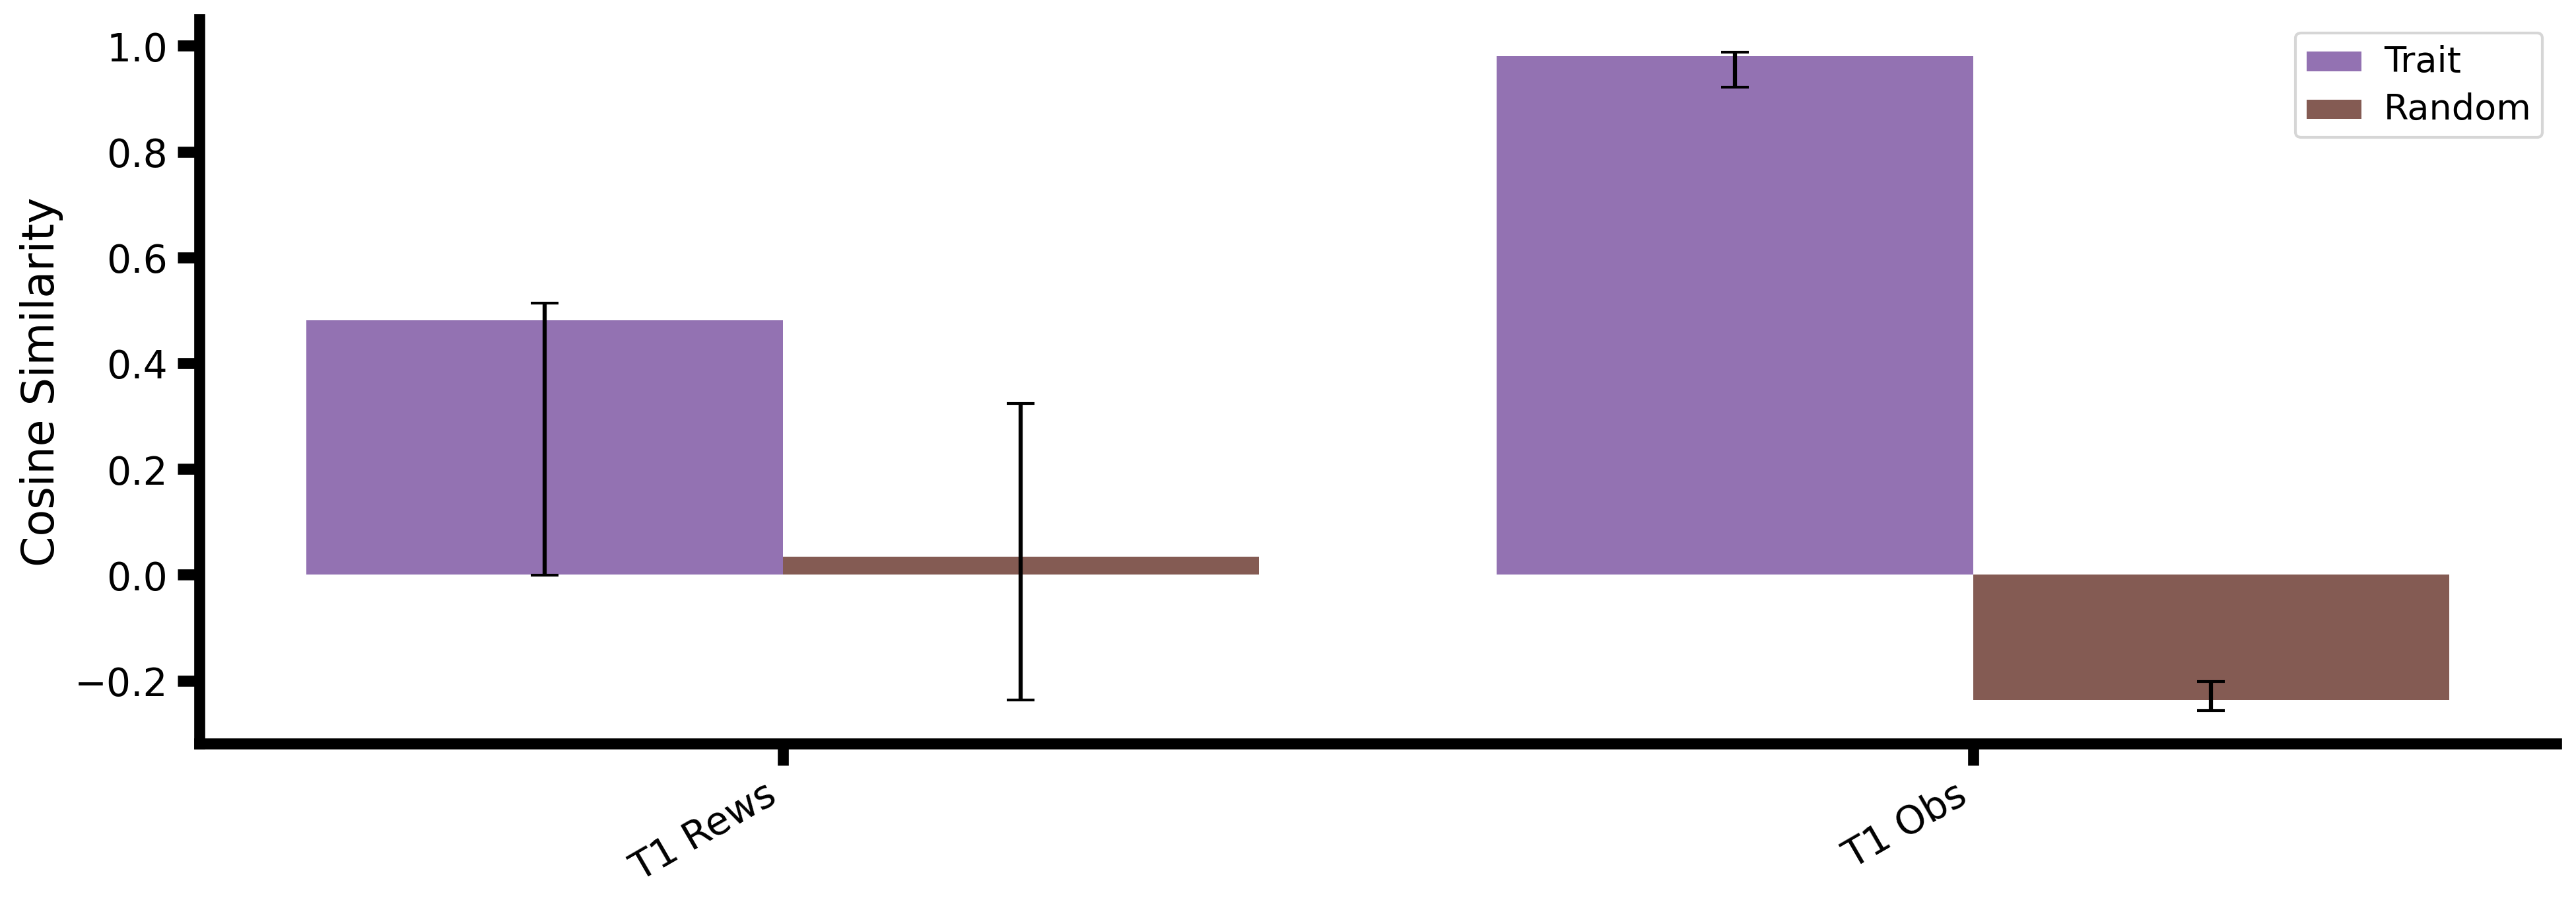

In [361]:
import seaborn as sns

#fig = plt.figure(figsize=(8.5, 4.8), dpi=300)
fig = plt.figure(figsize=(15.3541, 4.8428), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn 
s = sns.barplot(x='Name', y='Cosine Similarity', hue='Comparison', data=df_cosim, ax=ax, palette=['C4', 'C5'])
s.get_legend().set_title(None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel(None)

# Adding error bars

# for i, bar in enumerate(ax.patches):
#     ## find cosine similarity


#     print(i)
#     print(df_cosim.loc[df_cosim.index[i]])
#     lower = df_cosim.loc[df_cosim.index[i], 'Lower']
#     upper = df_cosim.loc[df_cosim.index[i], 'Upper']
#     #mean = bar.get_height()
#     mean = df_cosim.loc[df_cosim.index[i], 'Cosine Similarity']
#     print(bar.get_height(), mean)
#     plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
#                  yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

# Adding error bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Find the index where 'Cosine Similarity' is close to the height of the bar
    index = np.where(np.isclose(df_cosim['Cosine Similarity'], height))[0][0]
    lower = df_cosim.loc[df_cosim.index[index], 'Lower']
    upper = df_cosim.loc[df_cosim.index[index], 'Upper']
    mean = df_cosim.loc[df_cosim.index[index], 'Cosine Similarity']
    plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
                 yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

format_axis(ax)        

In [362]:
# fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.png'))
# fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.svg'))

fig.savefig(os.path.join(analysis_folder, 'similarity_barplot.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot.svg'))

In [363]:
df_cosim = df_cosim[df_cosim['Comparison'] == "Trait"]

/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


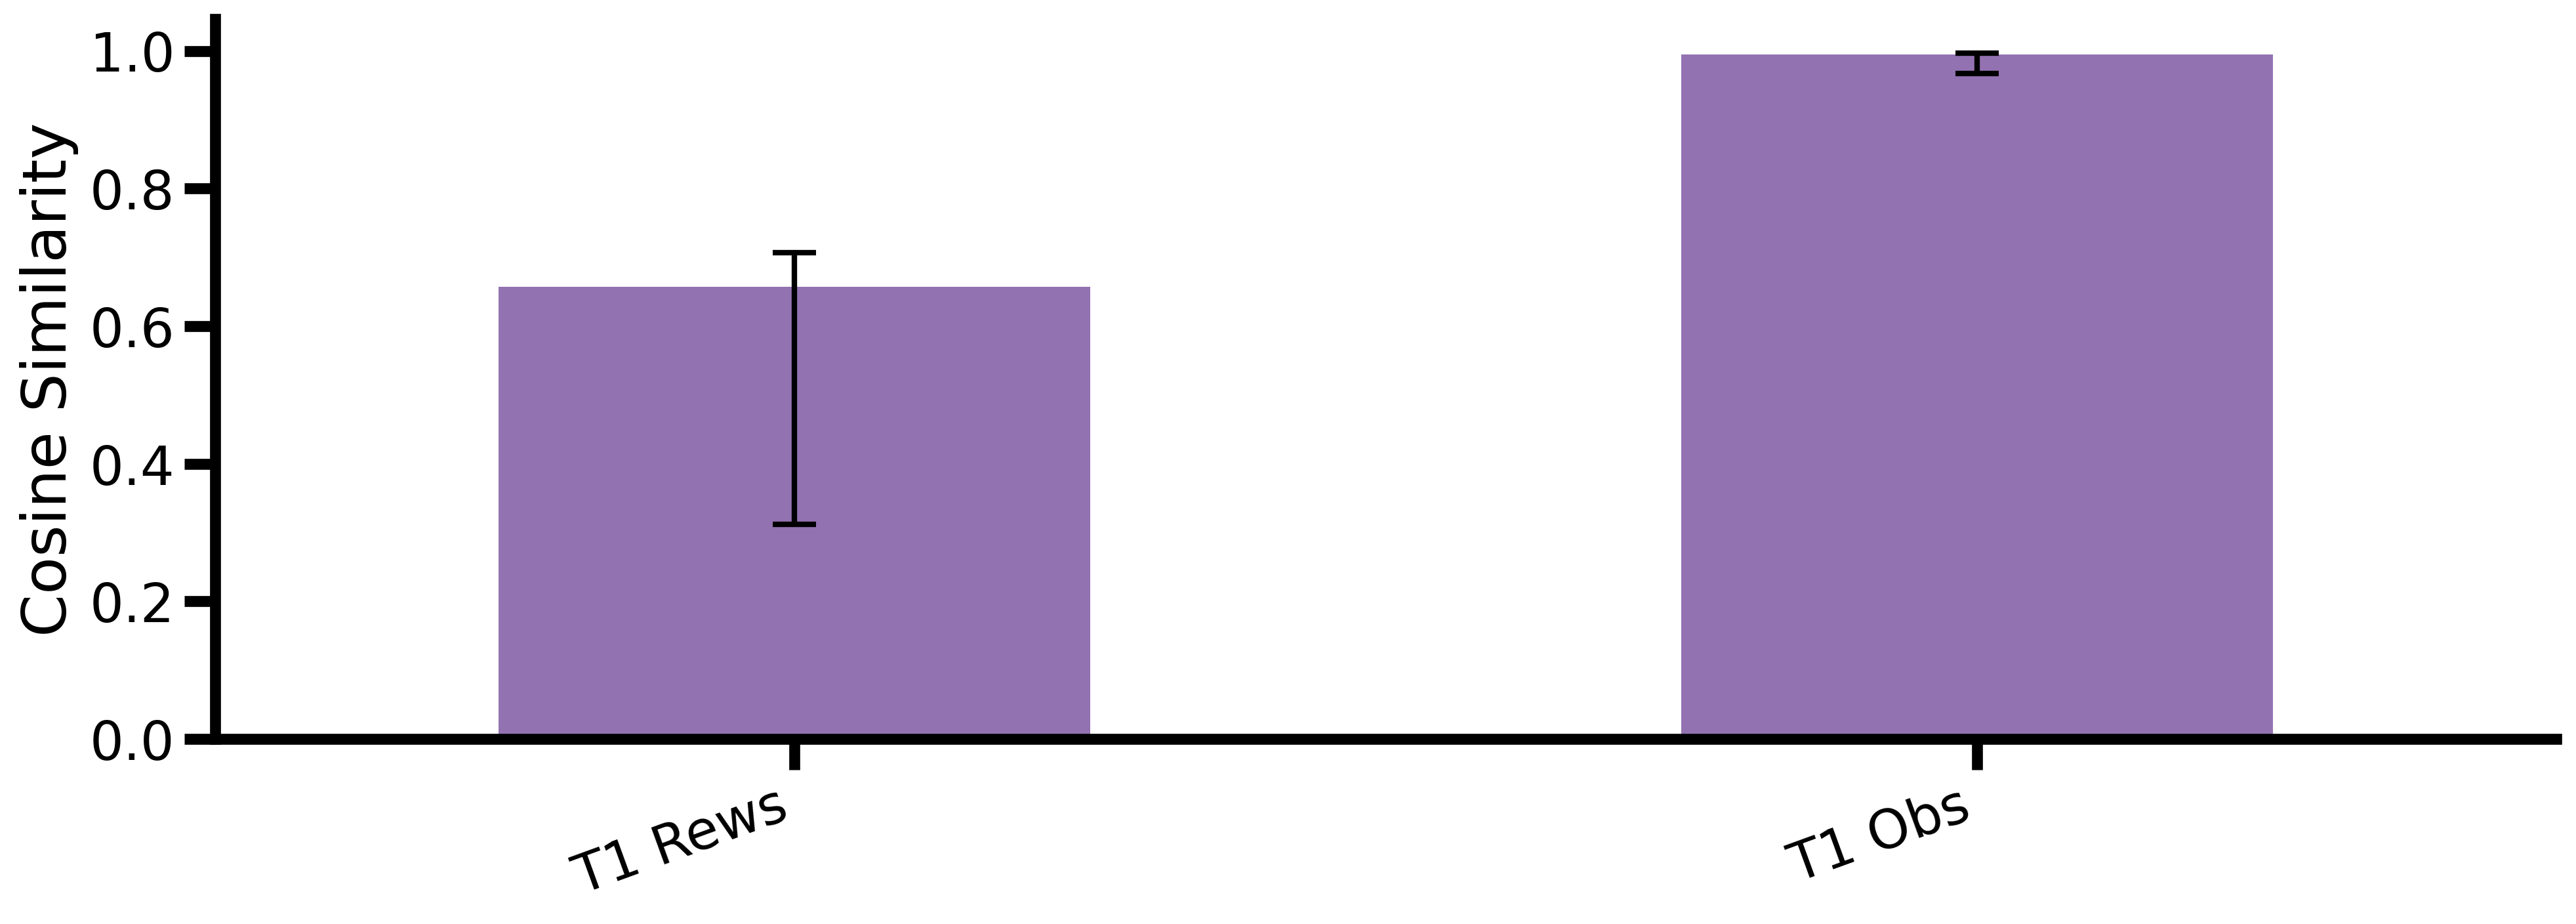

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(15.3541, 4.8428), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn 
s = sns.barplot(x='Name', y='Cosine Similarity', data=df_cosim, ax=ax, palette=['C4'],)

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.set_xlabel(None)

# Adding error bars

# for i, bar in enumerate(ax.patches):
#     ## find cosine similarity


#     print(i)
#     print(df_cosim.loc[df_cosim.index[i]])
#     lower = df_cosim.loc[df_cosim.index[i], 'Lower']
#     upper = df_cosim.loc[df_cosim.index[i], 'Upper']
#     #mean = bar.get_height()
#     mean = df_cosim.loc[df_cosim.index[i], 'Cosine Similarity']
#     print(bar.get_height(), mean)
#     plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
#                  yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

# Adding error bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Find the index where 'Cosine Similarity' is close to the height of the bar
    index = np.where(np.isclose(df_cosim['Cosine Similarity'], height))[0][0]
    lower = df_cosim.loc[df_cosim.index[index], 'Lower']
    upper = df_cosim.loc[df_cosim.index[index], 'Upper']
    mean = df_cosim.loc[df_cosim.index[index], 'Cosine Similarity']
    plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
                 yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=8, elinewidth=2, markeredgewidth=2)
    

new_value = 0.5
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

#ax.set_box_aspect(2) #change 10 to modify the y/x axis ratio

format_axis(ax, font_size_multiplier=1.4)        

In [ ]:
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_trait.svg'))